# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import time

In [2]:
start_time = time.time()

## Opening Datafile ##

In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

Crime Against Category                                      Offense  \
0                       2  Theft of Motor Vehicle Parts or Accessories   
1                       2                                      Robbery   
2                       2     Destruction/Damage/Vandalism of Property   
3                       2                                  Shoplifting   
4                       2     Destruction/Damage/Vandalism of Property   

   Sector  Beat  MCPP  Time  Day  Year  
0      11    22    50   661    0     0  
1      22    50    50  1753    6     0  
2      18    39    33   124    2     0  
3      14    29    16  2005    1     0  
4      11    22    44  1753    1     0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210259 entries, 0 to 210258
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Crime Against Category  210259 non-null  int64 
 1   Offense                 210259 non-null  object
 2   Sector                  210259 non-null  int64 
 3   Beat                    210259 non-null  int64 
 4   MCPP                    210259 non-null  int64 
 5   Time                    210259 non-null  int64 
 6   Day                     210259 non-null  int64 
 7   Year                    210259 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 12.8+ MB


## Setting Up For Initial Model ##

Let's start off by first identifying our target variable

In [5]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [6]:
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [7]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Let's look at the value counts for our dependent variable

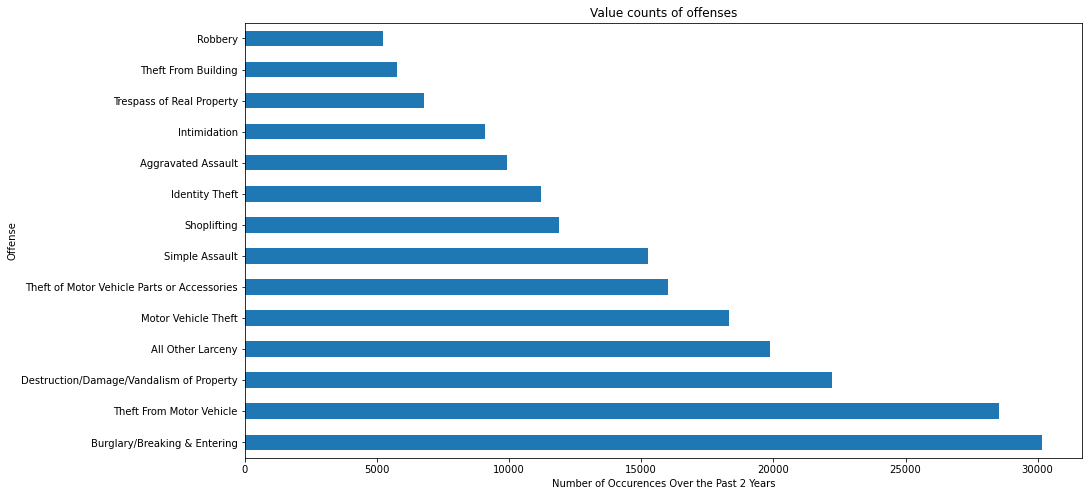

In [8]:
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 2 Years");

We can see that there's an imbalance, so let's use SMOTE to address that

In [9]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

Now it's time to initialize our model

## Random Forest Model ##

In [10]:
#rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)

#rf.fit(X_train, y_train)
#rf_train_pred = rf.predict(X_train)
#rf_test_pred = rf.predict(X_test)

In [11]:
#print(classification_report(y_train, rf_train_pred))

In [12]:
#print(classification_report(y_test, rf_test_pred))

In [13]:
#fig, ax = plt.subplots(figsize=(15,15))
#interp.plot_confusion_matrix(rf, X_test, y_test);

#np.interp.plot_confusion_matrix(figsize=(10,10))

#cm = confusion_matrix(y_test, rf_test_pred);
#cmp = ConfusionMatrixDisplay(cm);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp.plot(ax=ax);
#cmp.ax_.set_title("Confusion Matrix");

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


## Random Forest Tuning ##

In [14]:
#rf2 = RandomForestClassifier()

#param_grid = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [1, 2, 3, 4, 5],
   # 'min_samples_split': [0.2, 0.25, 0.3, 0.35, 0.4 ],
   # 'min_samples_leaf': [0.1, 0.2, 0.3]
#}


#gs_rf = GridSearchCV(rf2, param_grid)
#gs_rf.fit(X_train, y_train)
#gs_rf.best_params_

In [15]:
#gs_forest_train_pred = gs_rf.predict(X_train)
#print(classification_report(y_train, gs_forest_train_pred))

In [16]:
#gs_forest_test_pred = gs_rf.predict(X_test)
#print(classification_report(y_test, gs_forest_test_pred))

In [17]:
#rf3 = RandomForestClassifier()

#param_grid2 = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [2, 3, 4],
    #'min_samples_split': [0.24, 0.25, 0.26],
   # 'min_samples_leaf': [0.1, 0.12, 0.13]
#}


#gs_rf2 = GridSearchCV(rf2, param_grid)
#gs_rf2.fit(X_train, y_train)
#gs_rf2.best_params_

In [18]:
#rf4 = RandomForestClassifier(criterion= "entropy", random_state = 1,  max_depth = 3, min_samples_split= 0.2, min_samples_leaf = 0.1,  )

#rf4.fit(X_train, y_train)
#rf_train_pred2 = rf4.predict(X_train)
#rf_test_pred2 = rf4.predict(X_test)

In [19]:
#cm2 = confusion_matrix(y_test, rf_test_pred2);
#cmp2 = ConfusionMatrixDisplay(cm2);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp2.plot(ax=ax);
#cmp2.ax_.set_title("Confusion Matrix");

In [20]:
#print(classification_report(y_train, rf_train_pred2))

In [21]:
#print(classification_report(y_test, rf_test_pred2))

In [22]:
#print ("My program took", time.time() - start_time, "to run")

## CatBoost Model ##

In [23]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [24]:
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.106154
0:	learn: 2.4152795	total: 443ms	remaining: 7m 22s
1:	learn: 2.2999611	total: 735ms	remaining: 6m 6s
2:	learn: 2.2194601	total: 1.03s	remaining: 5m 43s
3:	learn: 2.1546015	total: 1.32s	remaining: 5m 28s
4:	learn: 2.1023865	total: 1.6s	remaining: 5m 19s
5:	learn: 2.0583486	total: 1.89s	remaining: 5m 12s
6:	learn: 2.0212087	total: 2.14s	remaining: 5m 3s
7:	learn: 1.9898034	total: 2.37s	remaining: 4m 53s
8:	learn: 1.9629609	total: 2.59s	remaining: 4m 44s
9:	learn: 1.9385266	total: 2.82s	remaining: 4m 39s
10:	learn: 1.9170486	total: 3.05s	remaining: 4m 34s
11:	learn: 1.8977704	total: 3.28s	remaining: 4m 29s
12:	learn: 1.8810050	total: 3.49s	remaining: 4m 25s
13:	learn: 1.8659622	total: 3.71s	remaining: 4m 21s
14:	learn: 1.8528057	total: 3.93s	remaining: 4m 18s
15:	learn: 1.8413095	total: 4.16s	remaining: 4m 15s
16:	learn: 1.8304887	total: 4.38s	remaining: 4m 13s
17:	learn: 1.8207193	total: 4.61s	remaining: 4m 11s
18:	learn: 1.8118833	total: 4.82s	remaining: 4m

159:	learn: 1.6246682	total: 35.5s	remaining: 3m 6s
160:	learn: 1.6240814	total: 35.7s	remaining: 3m 6s
161:	learn: 1.6234912	total: 35.9s	remaining: 3m 5s
162:	learn: 1.6227072	total: 36.1s	remaining: 3m 5s
163:	learn: 1.6221519	total: 36.4s	remaining: 3m 5s
164:	learn: 1.6218260	total: 36.6s	remaining: 3m 5s
165:	learn: 1.6211820	total: 36.8s	remaining: 3m 4s
166:	learn: 1.6204335	total: 37s	remaining: 3m 4s
167:	learn: 1.6199455	total: 37.2s	remaining: 3m 4s
168:	learn: 1.6193922	total: 37.4s	remaining: 3m 4s
169:	learn: 1.6187407	total: 37.7s	remaining: 3m 3s
170:	learn: 1.6180585	total: 37.9s	remaining: 3m 3s
171:	learn: 1.6176398	total: 38.1s	remaining: 3m 3s
172:	learn: 1.6170568	total: 38.3s	remaining: 3m 3s
173:	learn: 1.6165132	total: 38.5s	remaining: 3m 2s
174:	learn: 1.6159495	total: 38.7s	remaining: 3m 2s
175:	learn: 1.6153028	total: 39s	remaining: 3m 2s
176:	learn: 1.6146298	total: 39.2s	remaining: 3m 2s
177:	learn: 1.6140325	total: 39.4s	remaining: 3m 1s
178:	learn: 1.61

316:	learn: 1.5645829	total: 1m 9s	remaining: 2m 30s
317:	learn: 1.5642024	total: 1m 9s	remaining: 2m 29s
318:	learn: 1.5640665	total: 1m 10s	remaining: 2m 29s
319:	learn: 1.5637100	total: 1m 10s	remaining: 2m 29s
320:	learn: 1.5633905	total: 1m 10s	remaining: 2m 29s
321:	learn: 1.5631116	total: 1m 10s	remaining: 2m 29s
322:	learn: 1.5627410	total: 1m 11s	remaining: 2m 28s
323:	learn: 1.5624283	total: 1m 11s	remaining: 2m 28s
324:	learn: 1.5621756	total: 1m 11s	remaining: 2m 28s
325:	learn: 1.5618323	total: 1m 11s	remaining: 2m 28s
326:	learn: 1.5616583	total: 1m 11s	remaining: 2m 27s
327:	learn: 1.5613896	total: 1m 12s	remaining: 2m 27s
328:	learn: 1.5609458	total: 1m 12s	remaining: 2m 27s
329:	learn: 1.5606630	total: 1m 12s	remaining: 2m 27s
330:	learn: 1.5603782	total: 1m 12s	remaining: 2m 27s
331:	learn: 1.5601729	total: 1m 12s	remaining: 2m 26s
332:	learn: 1.5598859	total: 1m 13s	remaining: 2m 26s
333:	learn: 1.5595414	total: 1m 13s	remaining: 2m 26s
334:	learn: 1.5592040	total: 1

469:	learn: 1.5302180	total: 1m 42s	remaining: 1m 55s
470:	learn: 1.5299901	total: 1m 43s	remaining: 1m 55s
471:	learn: 1.5297455	total: 1m 43s	remaining: 1m 55s
472:	learn: 1.5295825	total: 1m 43s	remaining: 1m 55s
473:	learn: 1.5294413	total: 1m 43s	remaining: 1m 55s
474:	learn: 1.5292287	total: 1m 43s	remaining: 1m 54s
475:	learn: 1.5289551	total: 1m 44s	remaining: 1m 54s
476:	learn: 1.5286701	total: 1m 44s	remaining: 1m 54s
477:	learn: 1.5285735	total: 1m 44s	remaining: 1m 54s
478:	learn: 1.5283585	total: 1m 44s	remaining: 1m 53s
479:	learn: 1.5281016	total: 1m 44s	remaining: 1m 53s
480:	learn: 1.5279492	total: 1m 45s	remaining: 1m 53s
481:	learn: 1.5278739	total: 1m 45s	remaining: 1m 53s
482:	learn: 1.5277657	total: 1m 45s	remaining: 1m 53s
483:	learn: 1.5276349	total: 1m 45s	remaining: 1m 52s
484:	learn: 1.5274693	total: 1m 46s	remaining: 1m 52s
485:	learn: 1.5272937	total: 1m 46s	remaining: 1m 52s
486:	learn: 1.5271195	total: 1m 46s	remaining: 1m 52s
487:	learn: 1.5268984	total:

622:	learn: 1.5058894	total: 2m 16s	remaining: 1m 22s
623:	learn: 1.5057118	total: 2m 16s	remaining: 1m 22s
624:	learn: 1.5056597	total: 2m 16s	remaining: 1m 21s
625:	learn: 1.5055096	total: 2m 16s	remaining: 1m 21s
626:	learn: 1.5053330	total: 2m 16s	remaining: 1m 21s
627:	learn: 1.5051102	total: 2m 17s	remaining: 1m 21s
628:	learn: 1.5049670	total: 2m 17s	remaining: 1m 21s
629:	learn: 1.5048555	total: 2m 17s	remaining: 1m 20s
630:	learn: 1.5047674	total: 2m 17s	remaining: 1m 20s
631:	learn: 1.5045301	total: 2m 18s	remaining: 1m 20s
632:	learn: 1.5044772	total: 2m 18s	remaining: 1m 20s
633:	learn: 1.5043542	total: 2m 18s	remaining: 1m 19s
634:	learn: 1.5042600	total: 2m 18s	remaining: 1m 19s
635:	learn: 1.5040910	total: 2m 18s	remaining: 1m 19s
636:	learn: 1.5039614	total: 2m 19s	remaining: 1m 19s
637:	learn: 1.5037723	total: 2m 19s	remaining: 1m 19s
638:	learn: 1.5036974	total: 2m 19s	remaining: 1m 18s
639:	learn: 1.5035726	total: 2m 19s	remaining: 1m 18s
640:	learn: 1.5034069	total:

776:	learn: 1.4854434	total: 2m 49s	remaining: 48.7s
777:	learn: 1.4853740	total: 2m 49s	remaining: 48.5s
778:	learn: 1.4852877	total: 2m 50s	remaining: 48.3s
779:	learn: 1.4851963	total: 2m 50s	remaining: 48.1s
780:	learn: 1.4849726	total: 2m 50s	remaining: 47.9s
781:	learn: 1.4849048	total: 2m 50s	remaining: 47.6s
782:	learn: 1.4848062	total: 2m 51s	remaining: 47.4s
783:	learn: 1.4847028	total: 2m 51s	remaining: 47.2s
784:	learn: 1.4846536	total: 2m 51s	remaining: 47s
785:	learn: 1.4843678	total: 2m 51s	remaining: 46.8s
786:	learn: 1.4842474	total: 2m 51s	remaining: 46.5s
787:	learn: 1.4841990	total: 2m 52s	remaining: 46.3s
788:	learn: 1.4840352	total: 2m 52s	remaining: 46.1s
789:	learn: 1.4838728	total: 2m 52s	remaining: 45.9s
790:	learn: 1.4837988	total: 2m 52s	remaining: 45.7s
791:	learn: 1.4836912	total: 2m 53s	remaining: 45.5s
792:	learn: 1.4835674	total: 2m 53s	remaining: 45.2s
793:	learn: 1.4834131	total: 2m 53s	remaining: 45s
794:	learn: 1.4832386	total: 2m 53s	remaining: 44.

933:	learn: 1.4689267	total: 3m 25s	remaining: 14.5s
934:	learn: 1.4688580	total: 3m 25s	remaining: 14.3s
935:	learn: 1.4688009	total: 3m 25s	remaining: 14.1s
936:	learn: 1.4687425	total: 3m 25s	remaining: 13.8s
937:	learn: 1.4686443	total: 3m 26s	remaining: 13.6s
938:	learn: 1.4685779	total: 3m 26s	remaining: 13.4s
939:	learn: 1.4685203	total: 3m 26s	remaining: 13.2s
940:	learn: 1.4683926	total: 3m 26s	remaining: 13s
941:	learn: 1.4682419	total: 3m 27s	remaining: 12.7s
942:	learn: 1.4681218	total: 3m 27s	remaining: 12.5s
943:	learn: 1.4680295	total: 3m 27s	remaining: 12.3s
944:	learn: 1.4679649	total: 3m 27s	remaining: 12.1s
945:	learn: 1.4678936	total: 3m 27s	remaining: 11.9s
946:	learn: 1.4678353	total: 3m 28s	remaining: 11.7s
947:	learn: 1.4677239	total: 3m 28s	remaining: 11.4s
948:	learn: 1.4676501	total: 3m 28s	remaining: 11.2s
949:	learn: 1.4675029	total: 3m 28s	remaining: 11s
950:	learn: 1.4672623	total: 3m 29s	remaining: 10.8s
951:	learn: 1.4671748	total: 3m 29s	remaining: 10.

In [25]:
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)

In [26]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.50      0.52     22703
                          All Other Larceny       0.27      0.13      0.17     22703
               Burglary/Breaking & Entering       0.31      0.35      0.33     22703
   Destruction/Damage/Vandalism of Property       0.28      0.13      0.18     22703
                             Identity Theft       0.51      0.76      0.61     22703
                               Intimidation       0.55      0.58      0.56     22703
                        Motor Vehicle Theft       0.31      0.28      0.29     22703
                                    Robbery       0.44      0.49      0.46     22703
                                Shoplifting       0.43      0.66      0.52     22703
                             Simple Assault       0.52      0.53      0.52     22703
                        Theft From Building       0.40      0.45

In [27]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.10      0.14      4879
               Burglary/Breaking & Entering       0.32      0.33      0.32      7460
   Destruction/Damage/Vandalism of Property       0.22      0.10      0.14      5540
                             Identity Theft       0.36      0.73      0.48      2921
                               Intimidation       0.35      0.32      0.33      2250
                        Motor Vehicle Theft       0.24      0.29      0.26      4563
                                    Robbery       0.12      0.08      0.10      1319
                                Shoplifting       0.32      0.62      0.42      2975
                             Simple Assault       0.47      0.56      0.51      3790
                        Theft From Building       0.09      0.09

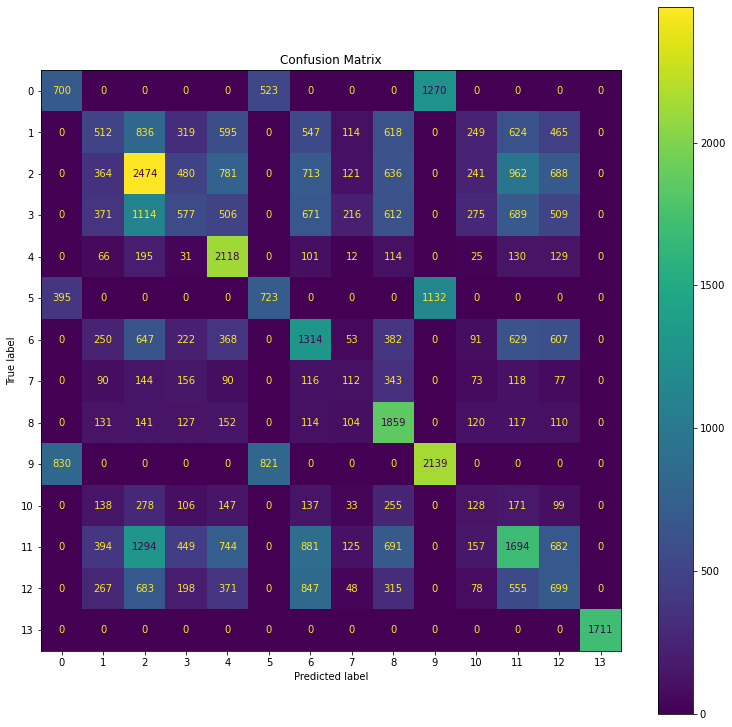

In [28]:
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Identity Theft

5) Intimidation

6) Motor Vehicle Theft

7) Robbery

8) Shoplifting

9) Simple Assault

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property 

### Classification Report ###

Let's take a look at our classification report test results for each crime:

**0) Aggravated Assault**

* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 700 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,793 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,225 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,252 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 512 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,367 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,071 crimes were wrongly predicted as being "All Other Larceny" crimes
* 44,863 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,474 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 4,986 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,332 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 40,973 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 577 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,963 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,088 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,221 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,118 crimes were correctly predicted as being "Identity Theft" crimes
* 803 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,754 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,064 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 723 crimes were correctly predicted as being "Intimidation" crimes
* 1,527 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,344 crimes were wrongly predicted as being "Intimidation" crimes
* 49,889 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,314 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,249 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 4,127 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,531 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 112 crimes were correctly predicted as being "Robbery" crimes
* 1,207 crimes were wrongly predicted as not being "Robbery" crimes
* 826 crimes were wrongly predicted as being "Robbery" crimes
* 51,532 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,859 crimes were correctly predicted as being "Shoplifting" crimes
* 1,116 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,966 crimes were wrongly predicted as being "Shoplifting" crimes
* 49,098 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 2,139 crimes were correctly predicted as being "Simple Assault" crimes
* 1,651 crimes were wrongly predicted as not being "Simple Assault" crimes
* 3,409 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,423 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 128 crimes were correctly predicted as being "Theft From Building" crimes
* 1,364 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,309 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,929 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,694 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 3,995 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,631 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 699 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,362 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,366 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,863 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

In [29]:
params = {'learning_rate': [0.05, 0.1, 0.5],
          'task_type': ['GPU'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [30]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 17.2ms	remaining: 1.7s
1:	learn: 2.4762514	total: 31.7ms	remaining: 1.55s
2:	learn: 2.4237444	total: 45.7ms	remaining: 1.48s
3:	learn: 2.3795726	total: 61.9ms	remaining: 1.49s
4:	learn: 2.3414032	total: 75.1ms	remaining: 1.43s
5:	learn: 2.3078011	total: 89.4ms	remaining: 1.4s
6:	learn: 2.2778569	total: 104ms	remaining: 1.39s
7:	learn: 2.2509267	total: 119ms	remaining: 1.36s
8:	learn: 2.2265149	total: 134ms	remaining: 1.35s
9:	learn: 2.2043153	total: 149ms	remaining: 1.34s
10:	learn: 2.1839448	total: 163ms	remaining: 1.32s
11:	learn: 2.1652505	total: 177ms	remaining: 1.3s
12:	learn: 2.1480046	total: 192ms	remaining: 1.28s
13:	learn: 2.1320227	total: 206ms	remaining: 1.26s
14:	learn: 2.1172350	total: 219ms	remaining: 1.24s
15:	learn: 2.1034803	total: 232ms	remaining: 1.22s
16:	learn: 2.0906594	total: 246ms	remaining: 1.2s
17:	learn: 2.0787237	total: 259ms	remaining: 1.18s
18:	learn: 2.0675539	total: 273ms	remaining: 1.16s
19:	learn: 2.0571035	total: 286ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 15.6ms	remaining: 1.55s
1:	learn: 2.4762573	total: 28.9ms	remaining: 1.42s
2:	learn: 2.4237358	total: 42.2ms	remaining: 1.36s
3:	learn: 2.3795674	total: 56.2ms	remaining: 1.35s
4:	learn: 2.3413907	total: 70.4ms	remaining: 1.34s
5:	learn: 2.3077991	total: 84.3ms	remaining: 1.32s
6:	learn: 2.2778537	total: 98.5ms	remaining: 1.31s
7:	learn: 2.2509244	total: 113ms	remaining: 1.3s
8:	learn: 2.2265174	total: 128ms	remaining: 1.29s
9:	learn: 2.2043126	total: 143ms	remaining: 1.28s
10:	learn: 2.1839418	total: 158ms	remaining: 1.27s
11:	learn: 2.1652518	total: 172ms	remaining: 1.26s
12:	learn: 2.1479991	total: 186ms	remaining: 1.24s
13:	learn: 2.1320212	total: 200ms	remaining: 1.23s
14:	learn: 2.1172271	total: 214ms	remaining: 1.21s
15:	learn: 2.1034693	total: 227ms	remaining: 1.19s
16:	learn: 2.0906572	total: 240ms	remaining: 1.17s
17:	learn: 2.0787215	total: 254ms	remaining: 1.16s
18:	learn: 2.0675514	total: 268ms	remaining: 1.14s
19:	learn: 2.0571039	total: 281ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 15.1ms	remaining: 1.49s
1:	learn: 2.4762640	total: 28.3ms	remaining: 1.38s
2:	learn: 2.4237412	total: 41.5ms	remaining: 1.34s
3:	learn: 2.3795755	total: 55.2ms	remaining: 1.32s
4:	learn: 2.3413935	total: 69.1ms	remaining: 1.31s
5:	learn: 2.3077920	total: 82.3ms	remaining: 1.29s
6:	learn: 2.2778548	total: 95.8ms	remaining: 1.27s
7:	learn: 2.2509156	total: 109ms	remaining: 1.25s
8:	learn: 2.2265216	total: 122ms	remaining: 1.24s
9:	learn: 2.2043303	total: 136ms	remaining: 1.22s
10:	learn: 2.1839470	total: 149ms	remaining: 1.21s
11:	learn: 2.1652460	total: 163ms	remaining: 1.2s
12:	learn: 2.1480037	total: 176ms	remaining: 1.18s
13:	learn: 2.1320178	total: 190ms	remaining: 1.17s
14:	learn: 2.1172225	total: 204ms	remaining: 1.15s
15:	learn: 2.1034706	total: 218ms	remaining: 1.14s
16:	learn: 2.0906616	total: 231ms	remaining: 1.13s
17:	learn: 2.0787261	total: 244ms	remaining: 1.11s
18:	learn: 2.0675760	total: 257ms	remaining: 1.09s
19:	learn: 2.0571256	total: 270ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 16.6ms	remaining: 1.64s
1:	learn: 2.4762685	total: 30.5ms	remaining: 1.49s
2:	learn: 2.4237447	total: 45.2ms	remaining: 1.46s
3:	learn: 2.3795782	total: 59.3ms	remaining: 1.42s
4:	learn: 2.3413953	total: 73.9ms	remaining: 1.4s
5:	learn: 2.3078053	total: 88.3ms	remaining: 1.38s
6:	learn: 2.2778565	total: 103ms	remaining: 1.37s
7:	learn: 2.2509225	total: 117ms	remaining: 1.34s
8:	learn: 2.2265253	total: 131ms	remaining: 1.32s
9:	learn: 2.2043273	total: 145ms	remaining: 1.31s
10:	learn: 2.1839507	total: 160ms	remaining: 1.29s
11:	learn: 2.1652582	total: 173ms	remaining: 1.27s
12:	learn: 2.1480047	total: 188ms	remaining: 1.26s
13:	learn: 2.1320323	total: 202ms	remaining: 1.24s
14:	learn: 2.1172284	total: 217ms	remaining: 1.23s
15:	learn: 2.1034728	total: 236ms	remaining: 1.24s
16:	learn: 2.0906645	total: 250ms	remaining: 1.22s
17:	learn: 2.0787273	total: 265ms	remaining: 1.21s
18:	learn: 2.0675735	total: 279ms	remaining: 1.19s
19:	learn: 2.0571303	total: 293ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 15.4ms	remaining: 1.53s
1:	learn: 2.4762633	total: 29.3ms	remaining: 1.44s
2:	learn: 2.4237496	total: 43.3ms	remaining: 1.4s
3:	learn: 2.3795777	total: 57.5ms	remaining: 1.38s
4:	learn: 2.3413980	total: 76.1ms	remaining: 1.45s
5:	learn: 2.3077957	total: 90.1ms	remaining: 1.41s
6:	learn: 2.2778531	total: 105ms	remaining: 1.39s
7:	learn: 2.2509230	total: 119ms	remaining: 1.37s
8:	learn: 2.2265224	total: 134ms	remaining: 1.35s
9:	learn: 2.2043104	total: 148ms	remaining: 1.33s
10:	learn: 2.1839472	total: 161ms	remaining: 1.31s
11:	learn: 2.1652479	total: 176ms	remaining: 1.29s
12:	learn: 2.1479993	total: 190ms	remaining: 1.27s
13:	learn: 2.1320242	total: 204ms	remaining: 1.25s
14:	learn: 2.1172318	total: 218ms	remaining: 1.24s
15:	learn: 2.1034802	total: 232ms	remaining: 1.22s
16:	learn: 2.0906601	total: 245ms	remaining: 1.19s
17:	learn: 2.0787222	total: 259ms	remaining: 1.18s
18:	learn: 2.0675551	total: 273ms	remaining: 1.16s
19:	learn: 2.0571095	total: 286ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 14.8ms	remaining: 1.47s
1:	learn: 2.3598895	total: 28ms	remaining: 1.37s
2:	learn: 2.2913397	total: 41.2ms	remaining: 1.33s
3:	learn: 2.2369277	total: 54.1ms	remaining: 1.3s
4:	learn: 2.1922569	total: 67.6ms	remaining: 1.28s
5:	learn: 2.1547724	total: 81.4ms	remaining: 1.27s
6:	learn: 2.1228984	total: 94.2ms	remaining: 1.25s
7:	learn: 2.0954139	total: 107ms	remaining: 1.23s
8:	learn: 2.0716177	total: 121ms	remaining: 1.22s
9:	learn: 2.0508296	total: 134ms	remaining: 1.21s
10:	learn: 2.0271507	total: 148ms	remaining: 1.2s
11:	learn: 2.0081885	total: 162ms	remaining: 1.19s
12:	learn: 1.9930108	total: 175ms	remaining: 1.17s
13:	learn: 1.9817102	total: 188ms	remaining: 1.16s
14:	learn: 1.9679397	total: 202ms	remaining: 1.14s
15:	learn: 1.9588124	total: 215ms	remaining: 1.13s
16:	learn: 1.9460533	total: 229ms	remaining: 1.12s
17:	learn: 1.9355643	total: 242ms	remaining: 1.1s
18:	learn: 1.9294894	total: 255ms	remaining: 1.09s
19:	learn: 1.9230233	total: 270ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 15ms	remaining: 1.49s
1:	learn: 2.3598792	total: 28ms	remaining: 1.37s
2:	learn: 2.2913389	total: 40.4ms	remaining: 1.31s
3:	learn: 2.2369233	total: 53.6ms	remaining: 1.29s
4:	learn: 2.1922461	total: 67.5ms	remaining: 1.28s
5:	learn: 2.1547680	total: 81ms	remaining: 1.27s
6:	learn: 2.1228947	total: 94.5ms	remaining: 1.25s
7:	learn: 2.0954127	total: 108ms	remaining: 1.24s
8:	learn: 2.0716164	total: 121ms	remaining: 1.22s
9:	learn: 2.0508223	total: 134ms	remaining: 1.21s
10:	learn: 2.0270751	total: 148ms	remaining: 1.2s
11:	learn: 2.0104777	total: 162ms	remaining: 1.19s
12:	learn: 1.9988608	total: 175ms	remaining: 1.17s
13:	learn: 1.9820011	total: 189ms	remaining: 1.16s
14:	learn: 1.9669211	total: 202ms	remaining: 1.15s
15:	learn: 1.9591943	total: 216ms	remaining: 1.13s
16:	learn: 1.9464717	total: 230ms	remaining: 1.12s
17:	learn: 1.9359811	total: 244ms	remaining: 1.11s
18:	learn: 1.9264026	total: 258ms	remaining: 1.1s
19:	learn: 1.9200553	total: 273ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519377	total: 14.2ms	remaining: 1.41s
1:	learn: 2.3598852	total: 27.5ms	remaining: 1.35s
2:	learn: 2.2913316	total: 40.8ms	remaining: 1.32s
3:	learn: 2.2369272	total: 53.9ms	remaining: 1.29s
4:	learn: 2.1922606	total: 67.4ms	remaining: 1.28s
5:	learn: 2.1547794	total: 81.1ms	remaining: 1.27s
6:	learn: 2.1228896	total: 94.8ms	remaining: 1.26s
7:	learn: 2.0954111	total: 109ms	remaining: 1.26s
8:	learn: 2.0716292	total: 123ms	remaining: 1.24s
9:	learn: 2.0508355	total: 137ms	remaining: 1.23s
10:	learn: 2.0271103	total: 150ms	remaining: 1.21s
11:	learn: 2.0105109	total: 163ms	remaining: 1.2s
12:	learn: 1.9924268	total: 176ms	remaining: 1.18s
13:	learn: 1.9822248	total: 188ms	remaining: 1.16s
14:	learn: 1.9684887	total: 202ms	remaining: 1.15s
15:	learn: 1.9593071	total: 217ms	remaining: 1.14s
16:	learn: 1.9465944	total: 230ms	remaining: 1.13s
17:	learn: 1.9361020	total: 244ms	remaining: 1.11s
18:	learn: 1.9296533	total: 258ms	remaining: 1.1s
19:	learn: 1.9202075	total: 271ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 13.8ms	remaining: 1.37s
1:	learn: 2.3598864	total: 27.1ms	remaining: 1.32s
2:	learn: 2.2913449	total: 39.8ms	remaining: 1.29s
3:	learn: 2.2369312	total: 54ms	remaining: 1.3s
4:	learn: 2.1922601	total: 67.6ms	remaining: 1.28s
5:	learn: 2.1547794	total: 81.3ms	remaining: 1.27s
6:	learn: 2.1229024	total: 94.6ms	remaining: 1.26s
7:	learn: 2.0954266	total: 108ms	remaining: 1.24s
8:	learn: 2.0716272	total: 121ms	remaining: 1.23s
9:	learn: 2.0508480	total: 135ms	remaining: 1.22s
10:	learn: 2.0271347	total: 149ms	remaining: 1.21s
11:	learn: 2.0105356	total: 163ms	remaining: 1.19s
12:	learn: 1.9924692	total: 176ms	remaining: 1.18s
13:	learn: 1.9823053	total: 189ms	remaining: 1.16s
14:	learn: 1.9673156	total: 202ms	remaining: 1.15s
15:	learn: 1.9591125	total: 216ms	remaining: 1.13s
16:	learn: 1.9467489	total: 230ms	remaining: 1.12s
17:	learn: 1.9362571	total: 245ms	remaining: 1.11s
18:	learn: 1.9302153	total: 259ms	remaining: 1.1s
19:	learn: 1.9237625	total: 272ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 15.9ms	remaining: 1.57s
1:	learn: 2.3598854	total: 29.1ms	remaining: 1.42s
2:	learn: 2.2913371	total: 42.3ms	remaining: 1.37s
3:	learn: 2.2369275	total: 55.4ms	remaining: 1.33s
4:	learn: 2.1922648	total: 68.8ms	remaining: 1.31s
5:	learn: 2.1547779	total: 82.3ms	remaining: 1.29s
6:	learn: 2.1228920	total: 95.9ms	remaining: 1.27s
7:	learn: 2.0954175	total: 109ms	remaining: 1.25s
8:	learn: 2.0716159	total: 122ms	remaining: 1.24s
9:	learn: 2.0508376	total: 135ms	remaining: 1.22s
10:	learn: 2.0270727	total: 149ms	remaining: 1.21s
11:	learn: 2.0104721	total: 163ms	remaining: 1.19s
12:	learn: 1.9988460	total: 176ms	remaining: 1.18s
13:	learn: 1.9821267	total: 190ms	remaining: 1.17s
14:	learn: 1.9670319	total: 204ms	remaining: 1.15s
15:	learn: 1.9588431	total: 217ms	remaining: 1.14s
16:	learn: 1.9465870	total: 231ms	remaining: 1.13s
17:	learn: 1.9360986	total: 245ms	remaining: 1.12s
18:	learn: 1.9296690	total: 260ms	remaining: 1.11s
19:	learn: 1.9202300	total: 274ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 16.3ms	remaining: 1.62s
1:	learn: 1.9520626	total: 29.6ms	remaining: 1.45s
2:	learn: 1.8880724	total: 44.1ms	remaining: 1.42s
3:	learn: 1.8521886	total: 58.8ms	remaining: 1.41s
4:	learn: 1.8356851	total: 74.3ms	remaining: 1.41s
5:	learn: 1.8255545	total: 88.6ms	remaining: 1.39s
6:	learn: 1.8101049	total: 102ms	remaining: 1.35s
7:	learn: 1.8011888	total: 116ms	remaining: 1.33s
8:	learn: 1.7935490	total: 130ms	remaining: 1.31s
9:	learn: 1.7872374	total: 144ms	remaining: 1.29s
10:	learn: 1.7818156	total: 158ms	remaining: 1.28s
11:	learn: 1.7774931	total: 172ms	remaining: 1.26s
12:	learn: 1.7720436	total: 187ms	remaining: 1.25s
13:	learn: 1.7672707	total: 201ms	remaining: 1.24s
14:	learn: 1.7647358	total: 215ms	remaining: 1.22s
15:	learn: 1.7584613	total: 230ms	remaining: 1.21s
16:	learn: 1.7548140	total: 245ms	remaining: 1.2s
17:	learn: 1.7523384	total: 259ms	remaining: 1.18s
18:	learn: 1.7449283	total: 272ms	remaining: 1.16s
19:	learn: 1.7430135	total: 285ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 14.4ms	remaining: 1.42s
1:	learn: 1.9517887	total: 27.9ms	remaining: 1.36s
2:	learn: 1.8886576	total: 42.5ms	remaining: 1.37s
3:	learn: 1.8529391	total: 57.6ms	remaining: 1.38s
4:	learn: 1.8330487	total: 72.3ms	remaining: 1.37s
5:	learn: 1.8228299	total: 87ms	remaining: 1.36s
6:	learn: 1.8124495	total: 103ms	remaining: 1.36s
7:	learn: 1.7977722	total: 118ms	remaining: 1.35s
8:	learn: 1.7908950	total: 132ms	remaining: 1.34s
9:	learn: 1.7853127	total: 147ms	remaining: 1.33s
10:	learn: 1.7791104	total: 162ms	remaining: 1.31s
11:	learn: 1.7754519	total: 177ms	remaining: 1.3s
12:	learn: 1.7716683	total: 192ms	remaining: 1.28s
13:	learn: 1.7686968	total: 207ms	remaining: 1.27s
14:	learn: 1.7658100	total: 222ms	remaining: 1.26s
15:	learn: 1.7577361	total: 237ms	remaining: 1.24s
16:	learn: 1.7550340	total: 251ms	remaining: 1.23s
17:	learn: 1.7534943	total: 264ms	remaining: 1.2s
18:	learn: 1.7500031	total: 278ms	remaining: 1.19s
19:	learn: 1.7469650	total: 292ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756957	total: 15.8ms	remaining: 1.56s
1:	learn: 1.9519058	total: 30.2ms	remaining: 1.48s
2:	learn: 1.8888377	total: 44.4ms	remaining: 1.44s
3:	learn: 1.8532653	total: 59.6ms	remaining: 1.43s
4:	learn: 1.8370751	total: 75.1ms	remaining: 1.43s
5:	learn: 1.8272525	total: 89.8ms	remaining: 1.41s
6:	learn: 1.8181762	total: 105ms	remaining: 1.39s
7:	learn: 1.8077453	total: 120ms	remaining: 1.38s
8:	learn: 1.7947342	total: 135ms	remaining: 1.36s
9:	learn: 1.7880574	total: 150ms	remaining: 1.35s
10:	learn: 1.7825849	total: 164ms	remaining: 1.32s
11:	learn: 1.7740262	total: 179ms	remaining: 1.31s
12:	learn: 1.7695076	total: 193ms	remaining: 1.29s
13:	learn: 1.7663958	total: 207ms	remaining: 1.27s
14:	learn: 1.7627023	total: 222ms	remaining: 1.25s
15:	learn: 1.7594748	total: 236ms	remaining: 1.24s
16:	learn: 1.7548249	total: 250ms	remaining: 1.22s
17:	learn: 1.7527022	total: 264ms	remaining: 1.2s
18:	learn: 1.7499505	total: 277ms	remaining: 1.18s
19:	learn: 1.7461351	total: 291ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756969	total: 15.3ms	remaining: 1.51s
1:	learn: 1.9519929	total: 29.5ms	remaining: 1.45s
2:	learn: 1.8889246	total: 44.2ms	remaining: 1.43s
3:	learn: 1.8535366	total: 58.6ms	remaining: 1.41s
4:	learn: 1.8340448	total: 73.4ms	remaining: 1.39s
5:	learn: 1.8238951	total: 88.2ms	remaining: 1.38s
6:	learn: 1.8162297	total: 103ms	remaining: 1.37s
7:	learn: 1.8014081	total: 118ms	remaining: 1.35s
8:	learn: 1.7950082	total: 132ms	remaining: 1.33s
9:	learn: 1.7892780	total: 146ms	remaining: 1.31s
10:	learn: 1.7836331	total: 160ms	remaining: 1.29s
11:	learn: 1.7789925	total: 174ms	remaining: 1.28s
12:	learn: 1.7714939	total: 189ms	remaining: 1.27s
13:	learn: 1.7681402	total: 204ms	remaining: 1.25s
14:	learn: 1.7653015	total: 218ms	remaining: 1.24s
15:	learn: 1.7573028	total: 232ms	remaining: 1.22s
16:	learn: 1.7539600	total: 245ms	remaining: 1.2s
17:	learn: 1.7508533	total: 258ms	remaining: 1.18s
18:	learn: 1.7481670	total: 273ms	remaining: 1.17s
19:	learn: 1.7448731	total: 288ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 13.9ms	remaining: 1.38s
1:	learn: 1.9517453	total: 28.6ms	remaining: 1.4s
2:	learn: 1.8888389	total: 41.9ms	remaining: 1.36s
3:	learn: 1.8531955	total: 56ms	remaining: 1.34s
4:	learn: 1.8335321	total: 69.9ms	remaining: 1.33s
5:	learn: 1.8233264	total: 83.6ms	remaining: 1.31s
6:	learn: 1.8157679	total: 97.2ms	remaining: 1.29s
7:	learn: 1.8008698	total: 111ms	remaining: 1.28s
8:	learn: 1.7944985	total: 126ms	remaining: 1.27s
9:	learn: 1.7897198	total: 141ms	remaining: 1.26s
10:	learn: 1.7810922	total: 154ms	remaining: 1.25s
11:	learn: 1.7755225	total: 169ms	remaining: 1.24s
12:	learn: 1.7681779	total: 184ms	remaining: 1.23s
13:	learn: 1.7640494	total: 198ms	remaining: 1.21s
14:	learn: 1.7611054	total: 212ms	remaining: 1.2s
15:	learn: 1.7569324	total: 226ms	remaining: 1.19s
16:	learn: 1.7515369	total: 239ms	remaining: 1.17s
17:	learn: 1.7484703	total: 253ms	remaining: 1.15s
18:	learn: 1.7450672	total: 267ms	remaining: 1.14s
19:	learn: 1.7421793	total: 281ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 14ms	remaining: 6.98s
1:	learn: 2.4762514	total: 26.9ms	remaining: 6.69s
2:	learn: 2.4237444	total: 40.2ms	remaining: 6.67s
3:	learn: 2.3795726	total: 53.9ms	remaining: 6.68s
4:	learn: 2.3414035	total: 67ms	remaining: 6.63s
5:	learn: 2.3078013	total: 79.8ms	remaining: 6.57s
6:	learn: 2.2778569	total: 93ms	remaining: 6.55s
7:	learn: 2.2509267	total: 106ms	remaining: 6.53s
8:	learn: 2.2265149	total: 120ms	remaining: 6.54s
9:	learn: 2.2043153	total: 133ms	remaining: 6.5s
10:	learn: 2.1839448	total: 145ms	remaining: 6.47s
11:	learn: 2.1652505	total: 159ms	remaining: 6.47s
12:	learn: 2.1480046	total: 172ms	remaining: 6.46s
13:	learn: 2.1320227	total: 186ms	remaining: 6.44s
14:	learn: 2.1172352	total: 199ms	remaining: 6.43s
15:	learn: 2.1034803	total: 212ms	remaining: 6.42s
16:	learn: 2.0906594	total: 226ms	remaining: 6.41s
17:	learn: 2.0787237	total: 240ms	remaining: 6.42s
18:	learn: 2.0675539	total: 252ms	remaining: 6.39s
19:	learn: 2.0571036	total: 267ms	remaini

164:	learn: 1.7717427	total: 2.29s	remaining: 4.65s
165:	learn: 1.7712599	total: 2.3s	remaining: 4.63s
166:	learn: 1.7705514	total: 2.32s	remaining: 4.62s
167:	learn: 1.7701777	total: 2.33s	remaining: 4.6s
168:	learn: 1.7697907	total: 2.34s	remaining: 4.59s
169:	learn: 1.7693402	total: 2.36s	remaining: 4.58s
170:	learn: 1.7689923	total: 2.37s	remaining: 4.57s
171:	learn: 1.7685853	total: 2.39s	remaining: 4.55s
172:	learn: 1.7681788	total: 2.4s	remaining: 4.54s
173:	learn: 1.7678956	total: 2.41s	remaining: 4.52s
174:	learn: 1.7672910	total: 2.43s	remaining: 4.51s
175:	learn: 1.7668746	total: 2.44s	remaining: 4.49s
176:	learn: 1.7659994	total: 2.46s	remaining: 4.48s
177:	learn: 1.7655909	total: 2.47s	remaining: 4.47s
178:	learn: 1.7653113	total: 2.48s	remaining: 4.45s
179:	learn: 1.7649124	total: 2.5s	remaining: 4.44s
180:	learn: 1.7645239	total: 2.51s	remaining: 4.42s
181:	learn: 1.7642734	total: 2.52s	remaining: 4.41s
182:	learn: 1.7639449	total: 2.54s	remaining: 4.39s
183:	learn: 1.76

326:	learn: 1.7197926	total: 4.53s	remaining: 2.4s
327:	learn: 1.7192694	total: 4.55s	remaining: 2.38s
328:	learn: 1.7190726	total: 4.56s	remaining: 2.37s
329:	learn: 1.7189541	total: 4.58s	remaining: 2.36s
330:	learn: 1.7188160	total: 4.59s	remaining: 2.34s
331:	learn: 1.7185502	total: 4.6s	remaining: 2.33s
332:	learn: 1.7183608	total: 4.62s	remaining: 2.32s
333:	learn: 1.7180189	total: 4.63s	remaining: 2.3s
334:	learn: 1.7178440	total: 4.65s	remaining: 2.29s
335:	learn: 1.7176064	total: 4.66s	remaining: 2.27s
336:	learn: 1.7174256	total: 4.67s	remaining: 2.26s
337:	learn: 1.7172929	total: 4.69s	remaining: 2.25s
338:	learn: 1.7171864	total: 4.7s	remaining: 2.23s
339:	learn: 1.7169288	total: 4.71s	remaining: 2.22s
340:	learn: 1.7167703	total: 4.73s	remaining: 2.21s
341:	learn: 1.7165617	total: 4.74s	remaining: 2.19s
342:	learn: 1.7164298	total: 4.76s	remaining: 2.18s
343:	learn: 1.7162823	total: 4.77s	remaining: 2.16s
344:	learn: 1.7160442	total: 4.79s	remaining: 2.15s
345:	learn: 1.71

489:	learn: 1.6881748	total: 6.8s	remaining: 139ms
490:	learn: 1.6880208	total: 6.82s	remaining: 125ms
491:	learn: 1.6878504	total: 6.83s	remaining: 111ms
492:	learn: 1.6877852	total: 6.85s	remaining: 97.2ms
493:	learn: 1.6876845	total: 6.86s	remaining: 83.3ms
494:	learn: 1.6874999	total: 6.87s	remaining: 69.4ms
495:	learn: 1.6873829	total: 6.89s	remaining: 55.6ms
496:	learn: 1.6873187	total: 6.9s	remaining: 41.7ms
497:	learn: 1.6871367	total: 6.92s	remaining: 27.8ms
498:	learn: 1.6869943	total: 6.93s	remaining: 13.9ms
499:	learn: 1.6868302	total: 6.95s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 14.3ms	remaining: 7.14s
1:	learn: 2.4762573	total: 26.8ms	remaining: 6.68s
2:	learn: 2.4237358	total: 39.6ms	remaining: 6.56s
3:	learn: 2.3795674	total: 53.9ms	remaining: 6.68s
4:	learn: 2.3413907	total: 69.1ms	remaining: 6.84s
5:	learn: 2.3077991	total: 83.8ms	remaining: 6.9s
6:	learn: 2.2778537	total: 97.6ms	remaining: 6.87s
7:	learn: 2.2509244	total: 111ms	remaining: 6.81s
8:	learn: 2.2265174	total: 125ms	remaining: 6.8s
9:	learn: 2.2043126	total: 140ms	remaining: 6.84s
10:	learn: 2.1839418	total: 154ms	remaining: 6.86s
11:	learn: 2.1652518	total: 168ms	remaining: 6.85s
12:	learn: 2.1479991	total: 182ms	remaining: 6.82s
13:	learn: 2.1320212	total: 196ms	remaining: 6.8s
14:	learn: 2.1172274	total: 210ms	remaining: 6.78s
15:	learn: 2.1034693	total: 224ms	remaining: 6.78s
16:	learn: 2.0906570	total: 237ms	remaining: 6.74s
17:	learn: 2.0787215	total: 251ms	remaining: 6.72s
18:	learn: 2.0675512	total: 266ms	remaining: 6.72s
19:	learn: 2.0571039	total: 280ms	rem

170:	learn: 1.7715256	total: 2.46s	remaining: 4.74s
171:	learn: 1.7711415	total: 2.48s	remaining: 4.72s
172:	learn: 1.7702934	total: 2.49s	remaining: 4.71s
173:	learn: 1.7699680	total: 2.51s	remaining: 4.7s
174:	learn: 1.7696166	total: 2.52s	remaining: 4.68s
175:	learn: 1.7692865	total: 2.54s	remaining: 4.67s
176:	learn: 1.7688968	total: 2.55s	remaining: 4.65s
177:	learn: 1.7684588	total: 2.56s	remaining: 4.64s
178:	learn: 1.7680451	total: 2.58s	remaining: 4.63s
179:	learn: 1.7677043	total: 2.59s	remaining: 4.61s
180:	learn: 1.7673414	total: 2.61s	remaining: 4.6s
181:	learn: 1.7669492	total: 2.62s	remaining: 4.58s
182:	learn: 1.7663633	total: 2.64s	remaining: 4.57s
183:	learn: 1.7660972	total: 2.65s	remaining: 4.55s
184:	learn: 1.7656891	total: 2.66s	remaining: 4.54s
185:	learn: 1.7654496	total: 2.68s	remaining: 4.52s
186:	learn: 1.7651065	total: 2.69s	remaining: 4.51s
187:	learn: 1.7648898	total: 2.71s	remaining: 4.5s
188:	learn: 1.7643816	total: 2.72s	remaining: 4.48s
189:	learn: 1.7

329:	learn: 1.7274019	total: 4.71s	remaining: 2.43s
330:	learn: 1.7271508	total: 4.72s	remaining: 2.41s
331:	learn: 1.7269705	total: 4.74s	remaining: 2.4s
332:	learn: 1.7267503	total: 4.75s	remaining: 2.38s
333:	learn: 1.7265647	total: 4.77s	remaining: 2.37s
334:	learn: 1.7264052	total: 4.78s	remaining: 2.35s
335:	learn: 1.7259191	total: 4.79s	remaining: 2.34s
336:	learn: 1.7254812	total: 4.81s	remaining: 2.33s
337:	learn: 1.7252266	total: 4.82s	remaining: 2.31s
338:	learn: 1.7249978	total: 4.84s	remaining: 2.3s
339:	learn: 1.7248177	total: 4.85s	remaining: 2.28s
340:	learn: 1.7246847	total: 4.86s	remaining: 2.27s
341:	learn: 1.7245672	total: 4.88s	remaining: 2.25s
342:	learn: 1.7244357	total: 4.89s	remaining: 2.24s
343:	learn: 1.7241501	total: 4.91s	remaining: 2.23s
344:	learn: 1.7240548	total: 4.92s	remaining: 2.21s
345:	learn: 1.7238326	total: 4.93s	remaining: 2.2s
346:	learn: 1.7237444	total: 4.95s	remaining: 2.18s
347:	learn: 1.7235688	total: 4.96s	remaining: 2.17s
348:	learn: 1.7

491:	learn: 1.7006662	total: 6.97s	remaining: 113ms
492:	learn: 1.7004836	total: 6.98s	remaining: 99.2ms
493:	learn: 1.7004219	total: 7s	remaining: 85ms
494:	learn: 1.7001418	total: 7.01s	remaining: 70.8ms
495:	learn: 1.7000609	total: 7.03s	remaining: 56.7ms
496:	learn: 1.6999352	total: 7.04s	remaining: 42.5ms
497:	learn: 1.6997786	total: 7.05s	remaining: 28.3ms
498:	learn: 1.6997183	total: 7.07s	remaining: 14.2ms
499:	learn: 1.6993583	total: 7.08s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 15.8ms	remaining: 7.88s
1:	learn: 2.4762640	total: 30.2ms	remaining: 7.51s
2:	learn: 2.4237412	total: 44.7ms	remaining: 7.4s
3:	learn: 2.3795753	total: 59.3ms	remaining: 7.36s
4:	learn: 2.3413938	total: 73.7ms	remaining: 7.3s
5:	learn: 2.3077920	total: 88.3ms	remaining: 7.27s
6:	learn: 2.2778550	total: 103ms	remaining: 7.22s
7:	learn: 2.2509154	total: 117ms	remaining: 7.19s
8:	learn: 2.2265219	total: 131ms	remaining: 7.16s
9:	learn: 2.2043303	total: 145ms	remaining: 7.1s
10:	learn: 2.1839467	total: 158ms	remaining: 7.02s
11:	learn: 2.1652457	total: 171ms	remaining: 6.95s
12:	learn: 2.1480037	total: 184ms	remaining: 6.89s
13:	learn: 2.1320178	total: 198ms	remaining: 6.86s
14:	learn: 2.1172225	total: 211ms	remaining: 6.83s
15:	learn: 2.1034703	total: 226ms	remaining: 6.83s
16:	learn: 2.0906616	total: 240ms	remaining: 6.82s
17:	learn: 2.0787261	total: 254ms	remaining: 6.8s
18:	learn: 2.0675760	total: 268ms	remaining: 6.78s
19:	learn: 2.0571258	total: 282ms	remai

173:	learn: 1.7705021	total: 2.47s	remaining: 4.63s
174:	learn: 1.7701280	total: 2.49s	remaining: 4.62s
175:	learn: 1.7692789	total: 2.5s	remaining: 4.6s
176:	learn: 1.7689649	total: 2.51s	remaining: 4.58s
177:	learn: 1.7687207	total: 2.53s	remaining: 4.57s
178:	learn: 1.7684491	total: 2.54s	remaining: 4.55s
179:	learn: 1.7680290	total: 2.55s	remaining: 4.54s
180:	learn: 1.7676242	total: 2.57s	remaining: 4.52s
181:	learn: 1.7668321	total: 2.58s	remaining: 4.51s
182:	learn: 1.7664579	total: 2.6s	remaining: 4.5s
183:	learn: 1.7661542	total: 2.61s	remaining: 4.48s
184:	learn: 1.7658440	total: 2.62s	remaining: 4.47s
185:	learn: 1.7654211	total: 2.64s	remaining: 4.45s
186:	learn: 1.7652019	total: 2.65s	remaining: 4.43s
187:	learn: 1.7648604	total: 2.66s	remaining: 4.42s
188:	learn: 1.7645136	total: 2.68s	remaining: 4.42s
189:	learn: 1.7643172	total: 2.7s	remaining: 4.4s
190:	learn: 1.7639161	total: 2.71s	remaining: 4.39s
191:	learn: 1.7636377	total: 2.73s	remaining: 4.37s
192:	learn: 1.7633

338:	learn: 1.7261628	total: 4.83s	remaining: 2.29s
339:	learn: 1.7260437	total: 4.85s	remaining: 2.28s
340:	learn: 1.7258124	total: 4.86s	remaining: 2.27s
341:	learn: 1.7257229	total: 4.88s	remaining: 2.25s
342:	learn: 1.7255732	total: 4.89s	remaining: 2.24s
343:	learn: 1.7254246	total: 4.91s	remaining: 2.23s
344:	learn: 1.7251685	total: 4.92s	remaining: 2.21s
345:	learn: 1.7249526	total: 4.93s	remaining: 2.2s
346:	learn: 1.7247321	total: 4.95s	remaining: 2.18s
347:	learn: 1.7245131	total: 4.96s	remaining: 2.17s
348:	learn: 1.7244126	total: 4.98s	remaining: 2.15s
349:	learn: 1.7239394	total: 4.99s	remaining: 2.14s
350:	learn: 1.7237591	total: 5.01s	remaining: 2.13s
351:	learn: 1.7236531	total: 5.02s	remaining: 2.11s
352:	learn: 1.7232509	total: 5.03s	remaining: 2.1s
353:	learn: 1.7231655	total: 5.05s	remaining: 2.08s
354:	learn: 1.7229576	total: 5.06s	remaining: 2.07s
355:	learn: 1.7228023	total: 5.08s	remaining: 2.05s
356:	learn: 1.7227216	total: 5.09s	remaining: 2.04s
357:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 15.1ms	remaining: 7.55s
1:	learn: 2.4762682	total: 28.3ms	remaining: 7.04s
2:	learn: 2.4237452	total: 41.7ms	remaining: 6.91s
3:	learn: 2.3795785	total: 55.6ms	remaining: 6.9s
4:	learn: 2.3413950	total: 69.1ms	remaining: 6.84s
5:	learn: 2.3078053	total: 82ms	remaining: 6.75s
6:	learn: 2.2778563	total: 95.1ms	remaining: 6.7s
7:	learn: 2.2509227	total: 108ms	remaining: 6.67s
8:	learn: 2.2265251	total: 122ms	remaining: 6.64s
9:	learn: 2.2043273	total: 135ms	remaining: 6.61s
10:	learn: 2.1839504	total: 148ms	remaining: 6.57s
11:	learn: 2.1652580	total: 162ms	remaining: 6.58s
12:	learn: 2.1480047	total: 176ms	remaining: 6.58s
13:	learn: 2.1320320	total: 189ms	remaining: 6.58s
14:	learn: 2.1172286	total: 202ms	remaining: 6.55s
15:	learn: 2.1034728	total: 216ms	remaining: 6.54s
16:	learn: 2.0906645	total: 230ms	remaining: 6.52s
17:	learn: 2.0787273	total: 243ms	remaining: 6.51s
18:	learn: 2.0675735	total: 256ms	remaining: 6.48s
19:	learn: 2.0571301	total: 270ms	rema

164:	learn: 1.7745177	total: 2.32s	remaining: 4.71s
165:	learn: 1.7740509	total: 2.34s	remaining: 4.7s
166:	learn: 1.7736934	total: 2.35s	remaining: 4.69s
167:	learn: 1.7727561	total: 2.36s	remaining: 4.67s
168:	learn: 1.7723058	total: 2.38s	remaining: 4.66s
169:	learn: 1.7720014	total: 2.39s	remaining: 4.64s
170:	learn: 1.7716883	total: 2.41s	remaining: 4.63s
171:	learn: 1.7713318	total: 2.42s	remaining: 4.61s
172:	learn: 1.7707774	total: 2.43s	remaining: 4.6s
173:	learn: 1.7704596	total: 2.45s	remaining: 4.58s
174:	learn: 1.7700673	total: 2.46s	remaining: 4.57s
175:	learn: 1.7697453	total: 2.48s	remaining: 4.56s
176:	learn: 1.7693541	total: 2.49s	remaining: 4.54s
177:	learn: 1.7691082	total: 2.5s	remaining: 4.53s
178:	learn: 1.7687765	total: 2.52s	remaining: 4.51s
179:	learn: 1.7685008	total: 2.53s	remaining: 4.5s
180:	learn: 1.7681098	total: 2.54s	remaining: 4.48s
181:	learn: 1.7677543	total: 2.56s	remaining: 4.47s
182:	learn: 1.7669145	total: 2.57s	remaining: 4.45s
183:	learn: 1.76

326:	learn: 1.7267347	total: 4.6s	remaining: 2.44s
327:	learn: 1.7262101	total: 4.62s	remaining: 2.42s
328:	learn: 1.7260413	total: 4.63s	remaining: 2.41s
329:	learn: 1.7259305	total: 4.64s	remaining: 2.39s
330:	learn: 1.7257395	total: 4.66s	remaining: 2.38s
331:	learn: 1.7255815	total: 4.67s	remaining: 2.36s
332:	learn: 1.7253688	total: 4.69s	remaining: 2.35s
333:	learn: 1.7251811	total: 4.7s	remaining: 2.34s
334:	learn: 1.7250301	total: 4.71s	remaining: 2.32s
335:	learn: 1.7247609	total: 4.73s	remaining: 2.31s
336:	learn: 1.7245758	total: 4.74s	remaining: 2.29s
337:	learn: 1.7244253	total: 4.76s	remaining: 2.28s
338:	learn: 1.7242546	total: 4.77s	remaining: 2.27s
339:	learn: 1.7240798	total: 4.79s	remaining: 2.25s
340:	learn: 1.7235883	total: 4.8s	remaining: 2.24s
341:	learn: 1.7233629	total: 4.81s	remaining: 2.22s
342:	learn: 1.7231854	total: 4.83s	remaining: 2.21s
343:	learn: 1.7227291	total: 4.84s	remaining: 2.19s
344:	learn: 1.7225509	total: 4.86s	remaining: 2.18s
345:	learn: 1.7

486:	learn: 1.6996215	total: 6.84s	remaining: 183ms
487:	learn: 1.6992435	total: 6.86s	remaining: 169ms
488:	learn: 1.6991788	total: 6.87s	remaining: 155ms
489:	learn: 1.6990824	total: 6.88s	remaining: 141ms
490:	learn: 1.6989662	total: 6.9s	remaining: 126ms
491:	learn: 1.6984853	total: 6.91s	remaining: 112ms
492:	learn: 1.6983067	total: 6.93s	remaining: 98.4ms
493:	learn: 1.6982401	total: 6.94s	remaining: 84.3ms
494:	learn: 1.6981448	total: 6.96s	remaining: 70.3ms
495:	learn: 1.6979555	total: 6.97s	remaining: 56.2ms
496:	learn: 1.6978442	total: 6.98s	remaining: 42.2ms
497:	learn: 1.6976742	total: 7s	remaining: 28.1ms
498:	learn: 1.6975128	total: 7.01s	remaining: 14.1ms
499:	learn: 1.6973562	total: 7.03s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 13.9ms	remaining: 6.93s
1:	learn: 2.4762633	total: 27.1ms	remaining: 6.74s
2:	learn: 2.4237493	total: 40.5ms	remaining: 6.71s
3:	learn: 2.3795777	total: 53.9ms	remaining: 6.69s
4:	learn: 2.3413977	total: 68ms	remaining: 6.73s
5:	learn: 2.3077954	total: 82.1ms	remaining: 6.76s
6:	learn: 2.2778528	total: 95.8ms	remaining: 6.74s
7:	learn: 2.2509235	total: 109ms	remaining: 6.71s
8:	learn: 2.2265224	total: 122ms	remaining: 6.67s
9:	learn: 2.2043104	total: 136ms	remaining: 6.66s
10:	learn: 2.1839472	total: 149ms	remaining: 6.64s
11:	learn: 2.1652482	total: 163ms	remaining: 6.65s
12:	learn: 2.1479995	total: 177ms	remaining: 6.62s
13:	learn: 2.1320242	total: 191ms	remaining: 6.63s
14:	learn: 2.1172318	total: 205ms	remaining: 6.63s
15:	learn: 2.1034802	total: 218ms	remaining: 6.61s
16:	learn: 2.0906598	total: 233ms	remaining: 6.62s
17:	learn: 2.0787222	total: 247ms	remaining: 6.6s
18:	learn: 2.0675551	total: 260ms	remaining: 6.58s
19:	learn: 2.0571095	total: 273ms	rem

166:	learn: 1.7740855	total: 2.33s	remaining: 4.65s
167:	learn: 1.7731936	total: 2.34s	remaining: 4.63s
168:	learn: 1.7727706	total: 2.36s	remaining: 4.62s
169:	learn: 1.7723726	total: 2.37s	remaining: 4.61s
170:	learn: 1.7719633	total: 2.39s	remaining: 4.6s
171:	learn: 1.7716732	total: 2.4s	remaining: 4.58s
172:	learn: 1.7713382	total: 2.42s	remaining: 4.57s
173:	learn: 1.7709523	total: 2.43s	remaining: 4.55s
174:	learn: 1.7701136	total: 2.44s	remaining: 4.54s
175:	learn: 1.7693700	total: 2.46s	remaining: 4.53s
176:	learn: 1.7688447	total: 2.47s	remaining: 4.51s
177:	learn: 1.7684078	total: 2.49s	remaining: 4.5s
178:	learn: 1.7680521	total: 2.5s	remaining: 4.49s
179:	learn: 1.7677712	total: 2.52s	remaining: 4.47s
180:	learn: 1.7674185	total: 2.53s	remaining: 4.46s
181:	learn: 1.7670810	total: 2.54s	remaining: 4.44s
182:	learn: 1.7666791	total: 2.56s	remaining: 4.43s
183:	learn: 1.7664473	total: 2.57s	remaining: 4.41s
184:	learn: 1.7660728	total: 2.58s	remaining: 4.4s
185:	learn: 1.765

338:	learn: 1.7243866	total: 4.75s	remaining: 2.26s
339:	learn: 1.7238976	total: 4.77s	remaining: 2.24s
340:	learn: 1.7237973	total: 4.78s	remaining: 2.23s
341:	learn: 1.7236947	total: 4.79s	remaining: 2.21s
342:	learn: 1.7234521	total: 4.81s	remaining: 2.2s
343:	learn: 1.7233017	total: 4.82s	remaining: 2.19s
344:	learn: 1.7230032	total: 4.84s	remaining: 2.17s
345:	learn: 1.7228822	total: 4.85s	remaining: 2.16s
346:	learn: 1.7227550	total: 4.87s	remaining: 2.15s
347:	learn: 1.7225242	total: 4.88s	remaining: 2.13s
348:	learn: 1.7223238	total: 4.9s	remaining: 2.12s
349:	learn: 1.7220893	total: 4.91s	remaining: 2.1s
350:	learn: 1.7219161	total: 4.92s	remaining: 2.09s
351:	learn: 1.7218276	total: 4.94s	remaining: 2.08s
352:	learn: 1.7217368	total: 4.95s	remaining: 2.06s
353:	learn: 1.7215338	total: 4.97s	remaining: 2.05s
354:	learn: 1.7213985	total: 4.98s	remaining: 2.04s
355:	learn: 1.7212591	total: 5s	remaining: 2.02s
356:	learn: 1.7211652	total: 5.01s	remaining: 2.01s
357:	learn: 1.7209

497:	learn: 1.6966307	total: 7.01s	remaining: 28.2ms
498:	learn: 1.6965341	total: 7.03s	remaining: 14.1ms
499:	learn: 1.6963571	total: 7.04s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 15.1ms	remaining: 7.54s
1:	learn: 2.3598895	total: 29ms	remaining: 7.22s
2:	learn: 2.2913397	total: 42.6ms	remaining: 7.06s
3:	learn: 2.2369277	total: 56.7ms	remaining: 7.03s
4:	learn: 2.1922569	total: 71.2ms	remaining: 7.05s
5:	learn: 2.1547724	total: 90.4ms	remaining: 7.44s
6:	learn: 2.1228987	total: 104ms	remaining: 7.33s
7:	learn: 2.0954139	total: 125ms	remaining: 7.71s
8:	learn: 2.0716177	total: 139ms	remaining: 7.59s
9:	learn: 2.0508297	total: 154ms	remaining: 7.53s
10:	learn: 2.0271502	total: 168ms	remaining: 7.46s
11:	learn: 2.0081888	total: 181ms	remaining: 7.37s
12:	learn: 1.9930110	total: 194ms	remaining: 7.28s
13:	learn: 1.9817104	total: 208ms	remaining: 7.2s
14:	learn: 1.9679395	total: 221ms	remaining: 7.14s
15:	learn: 1.9588124	total: 235ms	remaining: 7.1s
16:	learn: 1.9460536	total: 248ms	remaining: 7.05s
17:	learn: 1.9355642	total: 262ms	remaining: 7.02s
18:	learn: 1.9294894	total: 276ms	remaining: 6.98s
19:	learn: 1.9230232	total: 290ms	remai

170:	learn: 1.7159009	total: 2.47s	remaining: 4.75s
171:	learn: 1.7155937	total: 2.48s	remaining: 4.74s
172:	learn: 1.7153973	total: 2.5s	remaining: 4.72s
173:	learn: 1.7150502	total: 2.51s	remaining: 4.71s
174:	learn: 1.7146615	total: 2.53s	remaining: 4.7s
175:	learn: 1.7138391	total: 2.54s	remaining: 4.68s
176:	learn: 1.7133016	total: 2.56s	remaining: 4.67s
177:	learn: 1.7129843	total: 2.57s	remaining: 4.66s
178:	learn: 1.7124140	total: 2.59s	remaining: 4.64s
179:	learn: 1.7119134	total: 2.6s	remaining: 4.63s
180:	learn: 1.7117450	total: 2.62s	remaining: 4.61s
181:	learn: 1.7113049	total: 2.63s	remaining: 4.59s
182:	learn: 1.7109579	total: 2.64s	remaining: 4.58s
183:	learn: 1.7107238	total: 2.66s	remaining: 4.57s
184:	learn: 1.7105027	total: 2.67s	remaining: 4.55s
185:	learn: 1.7100924	total: 2.69s	remaining: 4.53s
186:	learn: 1.7098660	total: 2.7s	remaining: 4.52s
187:	learn: 1.7093655	total: 2.71s	remaining: 4.5s
188:	learn: 1.7086543	total: 2.73s	remaining: 4.49s
189:	learn: 1.708

341:	learn: 1.6592688	total: 4.95s	remaining: 2.29s
342:	learn: 1.6590172	total: 4.96s	remaining: 2.27s
343:	learn: 1.6588410	total: 4.98s	remaining: 2.26s
344:	learn: 1.6586313	total: 4.99s	remaining: 2.24s
345:	learn: 1.6583870	total: 5.01s	remaining: 2.23s
346:	learn: 1.6575278	total: 5.02s	remaining: 2.21s
347:	learn: 1.6574472	total: 5.03s	remaining: 2.2s
348:	learn: 1.6572565	total: 5.05s	remaining: 2.18s
349:	learn: 1.6567302	total: 5.06s	remaining: 2.17s
350:	learn: 1.6566443	total: 5.08s	remaining: 2.15s
351:	learn: 1.6565442	total: 5.09s	remaining: 2.14s
352:	learn: 1.6563209	total: 5.1s	remaining: 2.13s
353:	learn: 1.6562072	total: 5.12s	remaining: 2.11s
354:	learn: 1.6560868	total: 5.13s	remaining: 2.1s
355:	learn: 1.6559313	total: 5.15s	remaining: 2.08s
356:	learn: 1.6556457	total: 5.16s	remaining: 2.07s
357:	learn: 1.6554289	total: 5.17s	remaining: 2.05s
358:	learn: 1.6553519	total: 5.19s	remaining: 2.04s
359:	learn: 1.6552892	total: 5.2s	remaining: 2.02s
360:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 15ms	remaining: 7.47s
1:	learn: 2.3598792	total: 28.8ms	remaining: 7.17s
2:	learn: 2.2913389	total: 42.7ms	remaining: 7.07s
3:	learn: 2.2369233	total: 57.5ms	remaining: 7.13s
4:	learn: 2.1922464	total: 71.8ms	remaining: 7.1s
5:	learn: 2.1547680	total: 86.5ms	remaining: 7.12s
6:	learn: 2.1228947	total: 101ms	remaining: 7.09s
7:	learn: 2.0954127	total: 115ms	remaining: 7.09s
8:	learn: 2.0716164	total: 129ms	remaining: 7.04s
9:	learn: 2.0508223	total: 144ms	remaining: 7.04s
10:	learn: 2.0270750	total: 158ms	remaining: 7.04s
11:	learn: 2.0104777	total: 172ms	remaining: 6.99s
12:	learn: 1.9988608	total: 186ms	remaining: 6.97s
13:	learn: 1.9820011	total: 200ms	remaining: 6.95s
14:	learn: 1.9669211	total: 215ms	remaining: 6.95s
15:	learn: 1.9591942	total: 230ms	remaining: 6.96s
16:	learn: 1.9464718	total: 245ms	remaining: 6.95s
17:	learn: 1.9359811	total: 258ms	remaining: 6.91s
18:	learn: 1.9264024	total: 272ms	remaining: 6.88s
19:	learn: 1.9200552	total: 286ms	rema

162:	learn: 1.7241227	total: 2.32s	remaining: 4.8s
163:	learn: 1.7238930	total: 2.34s	remaining: 4.79s
164:	learn: 1.7234733	total: 2.35s	remaining: 4.77s
165:	learn: 1.7229808	total: 2.36s	remaining: 4.76s
166:	learn: 1.7226356	total: 2.38s	remaining: 4.74s
167:	learn: 1.7223320	total: 2.39s	remaining: 4.73s
168:	learn: 1.7219293	total: 2.41s	remaining: 4.71s
169:	learn: 1.7216966	total: 2.42s	remaining: 4.7s
170:	learn: 1.7215226	total: 2.44s	remaining: 4.69s
171:	learn: 1.7212688	total: 2.45s	remaining: 4.67s
172:	learn: 1.7210345	total: 2.46s	remaining: 4.66s
173:	learn: 1.7207304	total: 2.48s	remaining: 4.64s
174:	learn: 1.7205421	total: 2.49s	remaining: 4.63s
175:	learn: 1.7202877	total: 2.5s	remaining: 4.61s
176:	learn: 1.7200973	total: 2.52s	remaining: 4.59s
177:	learn: 1.7196662	total: 2.53s	remaining: 4.58s
178:	learn: 1.7193971	total: 2.54s	remaining: 4.57s
179:	learn: 1.7190077	total: 2.56s	remaining: 4.55s
180:	learn: 1.7187619	total: 2.57s	remaining: 4.54s
181:	learn: 1.7

323:	learn: 1.6798941	total: 4.6s	remaining: 2.5s
324:	learn: 1.6798300	total: 4.61s	remaining: 2.48s
325:	learn: 1.6796958	total: 4.63s	remaining: 2.47s
326:	learn: 1.6794967	total: 4.64s	remaining: 2.46s
327:	learn: 1.6789315	total: 4.66s	remaining: 2.44s
328:	learn: 1.6786558	total: 4.67s	remaining: 2.43s
329:	learn: 1.6785416	total: 4.68s	remaining: 2.41s
330:	learn: 1.6784606	total: 4.7s	remaining: 2.4s
331:	learn: 1.6782619	total: 4.71s	remaining: 2.38s
332:	learn: 1.6780751	total: 4.73s	remaining: 2.37s
333:	learn: 1.6778388	total: 4.75s	remaining: 2.36s
334:	learn: 1.6775782	total: 4.76s	remaining: 2.35s
335:	learn: 1.6769882	total: 4.78s	remaining: 2.33s
336:	learn: 1.6764732	total: 4.79s	remaining: 2.32s
337:	learn: 1.6762859	total: 4.8s	remaining: 2.3s
338:	learn: 1.6760651	total: 4.82s	remaining: 2.29s
339:	learn: 1.6758198	total: 4.83s	remaining: 2.27s
340:	learn: 1.6756680	total: 4.85s	remaining: 2.26s
341:	learn: 1.6755525	total: 4.86s	remaining: 2.25s
342:	learn: 1.6753

494:	learn: 1.6519656	total: 7.03s	remaining: 71ms
495:	learn: 1.6519062	total: 7.04s	remaining: 56.8ms
496:	learn: 1.6518464	total: 7.06s	remaining: 42.6ms
497:	learn: 1.6516966	total: 7.07s	remaining: 28.4ms
498:	learn: 1.6516316	total: 7.08s	remaining: 14.2ms
499:	learn: 1.6513471	total: 7.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 14.9ms	remaining: 7.44s
1:	learn: 2.3598852	total: 28ms	remaining: 6.98s
2:	learn: 2.2913316	total: 41.9ms	remaining: 6.94s
3:	learn: 2.2369270	total: 56.4ms	remaining: 7s
4:	learn: 2.1922606	total: 71.4ms	remaining: 7.07s
5:	learn: 2.1547796	total: 84.3ms	remaining: 6.94s
6:	learn: 2.1228896	total: 98.8ms	remaining: 6.96s
7:	learn: 2.0954113	total: 112ms	remaining: 6.88s
8:	learn: 2.0716289	total: 126ms	remaining: 6.89s
9:	learn: 2.0508359	total: 140ms	remaining: 6.86s
10:	learn: 2.0271106	total: 154ms	remaining: 6.87s
11:	learn: 2.0105112	total: 168ms	remaining: 6.85s
12:	learn: 1.9924270	total: 183ms	remaining: 6.86s
13:	learn: 1.9822249	total: 198ms	remaining: 6.87s
14:	learn: 1.9684890	total: 212ms	remaining: 6.86s
15:	learn: 1.9593069	total: 227ms	remaining: 6.87s
16:	learn: 1.9465943	total: 242ms	remaining: 6.87s
17:	learn: 1.9361021	total: 255ms	remaining: 6.82s
18:	learn: 1.9296533	total: 268ms	remaining: 6.78s
19:	learn: 1.9202075	total: 281ms	remai

162:	learn: 1.7274874	total: 2.31s	remaining: 4.77s
163:	learn: 1.7272020	total: 2.32s	remaining: 4.76s
164:	learn: 1.7266742	total: 2.33s	remaining: 4.74s
165:	learn: 1.7263905	total: 2.35s	remaining: 4.73s
166:	learn: 1.7259139	total: 2.36s	remaining: 4.71s
167:	learn: 1.7256049	total: 2.38s	remaining: 4.7s
168:	learn: 1.7252554	total: 2.39s	remaining: 4.68s
169:	learn: 1.7247659	total: 2.4s	remaining: 4.67s
170:	learn: 1.7245983	total: 2.42s	remaining: 4.65s
171:	learn: 1.7243724	total: 2.43s	remaining: 4.64s
172:	learn: 1.7235925	total: 2.45s	remaining: 4.63s
173:	learn: 1.7226713	total: 2.46s	remaining: 4.61s
174:	learn: 1.7224598	total: 2.48s	remaining: 4.6s
175:	learn: 1.7222860	total: 2.49s	remaining: 4.58s
176:	learn: 1.7220748	total: 2.5s	remaining: 4.57s
177:	learn: 1.7219105	total: 2.52s	remaining: 4.55s
178:	learn: 1.7215327	total: 2.53s	remaining: 4.54s
179:	learn: 1.7212230	total: 2.55s	remaining: 4.53s
180:	learn: 1.7208164	total: 2.56s	remaining: 4.51s
181:	learn: 1.72

326:	learn: 1.6828698	total: 4.6s	remaining: 2.43s
327:	learn: 1.6827389	total: 4.62s	remaining: 2.42s
328:	learn: 1.6825992	total: 4.63s	remaining: 2.41s
329:	learn: 1.6822963	total: 4.65s	remaining: 2.39s
330:	learn: 1.6820880	total: 4.66s	remaining: 2.38s
331:	learn: 1.6818411	total: 4.67s	remaining: 2.37s
332:	learn: 1.6816280	total: 4.69s	remaining: 2.35s
333:	learn: 1.6815115	total: 4.7s	remaining: 2.34s
334:	learn: 1.6814384	total: 4.72s	remaining: 2.32s
335:	learn: 1.6812435	total: 4.73s	remaining: 2.31s
336:	learn: 1.6810122	total: 4.75s	remaining: 2.3s
337:	learn: 1.6807434	total: 4.76s	remaining: 2.28s
338:	learn: 1.6805970	total: 4.78s	remaining: 2.27s
339:	learn: 1.6804719	total: 4.79s	remaining: 2.25s
340:	learn: 1.6802866	total: 4.81s	remaining: 2.24s
341:	learn: 1.6800378	total: 4.82s	remaining: 2.23s
342:	learn: 1.6798987	total: 4.84s	remaining: 2.21s
343:	learn: 1.6798058	total: 4.85s	remaining: 2.2s
344:	learn: 1.6789724	total: 4.87s	remaining: 2.19s
345:	learn: 1.67

495:	learn: 1.6565044	total: 7.07s	remaining: 57ms
496:	learn: 1.6563948	total: 7.08s	remaining: 42.8ms
497:	learn: 1.6559754	total: 7.1s	remaining: 28.5ms
498:	learn: 1.6557429	total: 7.11s	remaining: 14.3ms
499:	learn: 1.6553360	total: 7.13s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 16.2ms	remaining: 8.1s
1:	learn: 2.3598864	total: 30.4ms	remaining: 7.58s
2:	learn: 2.2913452	total: 45.3ms	remaining: 7.5s
3:	learn: 2.2369312	total: 60.1ms	remaining: 7.45s
4:	learn: 2.1922601	total: 74.3ms	remaining: 7.36s
5:	learn: 2.1547791	total: 89.5ms	remaining: 7.37s
6:	learn: 2.1229024	total: 104ms	remaining: 7.36s
7:	learn: 2.0954266	total: 119ms	remaining: 7.29s
8:	learn: 2.0716275	total: 133ms	remaining: 7.26s
9:	learn: 2.0508478	total: 147ms	remaining: 7.21s
10:	learn: 2.0271347	total: 161ms	remaining: 7.17s
11:	learn: 2.0105356	total: 175ms	remaining: 7.13s
12:	learn: 1.9924692	total: 190ms	remaining: 7.11s
13:	learn: 1.9823056	total: 205ms	remaining: 7.11s
14:	learn: 1.9673158	total: 220ms	remaining: 7.11s
15:	learn: 1.9591124	total: 234ms	remaining: 7.07s
16:	learn: 1.9467486	total: 248ms	remaining: 7.04s
17:	learn: 1.9362571	total: 262ms	remaining: 7.02s
18:	learn: 1.9302154	total: 277ms	remaining: 7.02s
19:	learn: 1.9237625	total: 291ms	rem

170:	learn: 1.7226031	total: 2.44s	remaining: 4.69s
171:	learn: 1.7217336	total: 2.45s	remaining: 4.67s
172:	learn: 1.7212977	total: 2.46s	remaining: 4.66s
173:	learn: 1.7210906	total: 2.48s	remaining: 4.64s
174:	learn: 1.7201573	total: 2.49s	remaining: 4.63s
175:	learn: 1.7198213	total: 2.5s	remaining: 4.61s
176:	learn: 1.7194423	total: 2.52s	remaining: 4.59s
177:	learn: 1.7188316	total: 2.53s	remaining: 4.58s
178:	learn: 1.7185170	total: 2.55s	remaining: 4.57s
179:	learn: 1.7181450	total: 2.56s	remaining: 4.55s
180:	learn: 1.7178308	total: 2.57s	remaining: 4.54s
181:	learn: 1.7174287	total: 2.59s	remaining: 4.52s
182:	learn: 1.7171962	total: 2.6s	remaining: 4.51s
183:	learn: 1.7167641	total: 2.62s	remaining: 4.49s
184:	learn: 1.7165333	total: 2.63s	remaining: 4.48s
185:	learn: 1.7162662	total: 2.64s	remaining: 4.46s
186:	learn: 1.7158661	total: 2.66s	remaining: 4.45s
187:	learn: 1.7155770	total: 2.67s	remaining: 4.43s
188:	learn: 1.7153214	total: 2.68s	remaining: 4.42s
189:	learn: 1.

334:	learn: 1.6746389	total: 4.77s	remaining: 2.35s
335:	learn: 1.6744854	total: 4.78s	remaining: 2.33s
336:	learn: 1.6743959	total: 4.79s	remaining: 2.32s
337:	learn: 1.6741424	total: 4.81s	remaining: 2.31s
338:	learn: 1.6737994	total: 4.82s	remaining: 2.29s
339:	learn: 1.6736574	total: 4.84s	remaining: 2.27s
340:	learn: 1.6735303	total: 4.85s	remaining: 2.26s
341:	learn: 1.6734512	total: 4.87s	remaining: 2.25s
342:	learn: 1.6732512	total: 4.88s	remaining: 2.23s
343:	learn: 1.6731460	total: 4.89s	remaining: 2.22s
344:	learn: 1.6730524	total: 4.91s	remaining: 2.21s
345:	learn: 1.6726683	total: 4.92s	remaining: 2.19s
346:	learn: 1.6725229	total: 4.94s	remaining: 2.18s
347:	learn: 1.6724073	total: 4.95s	remaining: 2.16s
348:	learn: 1.6722124	total: 4.96s	remaining: 2.15s
349:	learn: 1.6720259	total: 4.98s	remaining: 2.13s
350:	learn: 1.6719514	total: 4.99s	remaining: 2.12s
351:	learn: 1.6718147	total: 5.01s	remaining: 2.11s
352:	learn: 1.6716854	total: 5.02s	remaining: 2.09s
353:	learn: 

495:	learn: 1.6476189	total: 7.06s	remaining: 56.9ms
496:	learn: 1.6475039	total: 7.07s	remaining: 42.7ms
497:	learn: 1.6474327	total: 7.08s	remaining: 28.5ms
498:	learn: 1.6473398	total: 7.1s	remaining: 14.2ms
499:	learn: 1.6468920	total: 7.11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 16.2ms	remaining: 8.11s
1:	learn: 2.3598854	total: 30.2ms	remaining: 7.51s
2:	learn: 2.2913371	total: 44.4ms	remaining: 7.36s
3:	learn: 2.2369275	total: 58.1ms	remaining: 7.2s
4:	learn: 2.1922648	total: 72.3ms	remaining: 7.16s
5:	learn: 2.1547782	total: 86.4ms	remaining: 7.11s
6:	learn: 2.1228918	total: 101ms	remaining: 7.14s
7:	learn: 2.0954175	total: 117ms	remaining: 7.17s
8:	learn: 2.0716157	total: 131ms	remaining: 7.16s
9:	learn: 2.0508375	total: 146ms	remaining: 7.13s
10:	learn: 2.0270727	total: 161ms	remaining: 7.14s
11:	learn: 2.0104720	total: 175ms	remaining: 7.11s
12:	learn: 1.9988462	total: 189ms	remaining: 7.08s
13:	learn: 1.9821268	total: 204ms	remaining: 7.07s
14:	learn: 1.9670320	total: 218ms	remaining: 7.05s
15:	learn: 1.9588435	total: 232ms	remaining: 7.03s
16:	learn: 1.9465868	total: 247ms	remaining: 7s
17:	learn: 1.9360986	total: 260ms	remaining: 6.96s
18:	learn: 1.9296690	total: 274ms	remaining: 6.92s
19:	learn: 1.9202300	total: 287ms	remai

174:	learn: 1.7198839	total: 2.48s	remaining: 4.6s
175:	learn: 1.7195342	total: 2.49s	remaining: 4.59s
176:	learn: 1.7192068	total: 2.5s	remaining: 4.57s
177:	learn: 1.7189187	total: 2.52s	remaining: 4.56s
178:	learn: 1.7184166	total: 2.53s	remaining: 4.54s
179:	learn: 1.7181047	total: 2.55s	remaining: 4.53s
180:	learn: 1.7179266	total: 2.56s	remaining: 4.52s
181:	learn: 1.7177288	total: 2.58s	remaining: 4.5s
182:	learn: 1.7167785	total: 2.59s	remaining: 4.49s
183:	learn: 1.7165185	total: 2.6s	remaining: 4.47s
184:	learn: 1.7163106	total: 2.62s	remaining: 4.46s
185:	learn: 1.7160401	total: 2.63s	remaining: 4.44s
186:	learn: 1.7155674	total: 2.65s	remaining: 4.43s
187:	learn: 1.7152321	total: 2.66s	remaining: 4.42s
188:	learn: 1.7147877	total: 2.67s	remaining: 4.4s
189:	learn: 1.7143647	total: 2.69s	remaining: 4.39s
190:	learn: 1.7141886	total: 2.7s	remaining: 4.37s
191:	learn: 1.7132826	total: 2.72s	remaining: 4.36s
192:	learn: 1.7129749	total: 2.73s	remaining: 4.34s
193:	learn: 1.7126

346:	learn: 1.6706303	total: 4.91s	remaining: 2.17s
347:	learn: 1.6705107	total: 4.93s	remaining: 2.15s
348:	learn: 1.6704328	total: 4.95s	remaining: 2.14s
349:	learn: 1.6700914	total: 4.96s	remaining: 2.13s
350:	learn: 1.6700217	total: 4.97s	remaining: 2.11s
351:	learn: 1.6698420	total: 4.99s	remaining: 2.1s
352:	learn: 1.6696709	total: 5s	remaining: 2.08s
353:	learn: 1.6695233	total: 5.01s	remaining: 2.07s
354:	learn: 1.6693746	total: 5.03s	remaining: 2.05s
355:	learn: 1.6692236	total: 5.04s	remaining: 2.04s
356:	learn: 1.6691554	total: 5.06s	remaining: 2.02s
357:	learn: 1.6690448	total: 5.07s	remaining: 2.01s
358:	learn: 1.6687738	total: 5.08s	remaining: 2s
359:	learn: 1.6686353	total: 5.1s	remaining: 1.98s
360:	learn: 1.6685659	total: 5.11s	remaining: 1.97s
361:	learn: 1.6675944	total: 5.13s	remaining: 1.96s
362:	learn: 1.6675270	total: 5.14s	remaining: 1.94s
363:	learn: 1.6674269	total: 5.16s	remaining: 1.93s
364:	learn: 1.6673339	total: 5.17s	remaining: 1.91s
365:	learn: 1.667048

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756886	total: 14.8ms	remaining: 7.36s
1:	learn: 1.9520626	total: 28ms	remaining: 6.96s
2:	learn: 1.8880726	total: 40.9ms	remaining: 6.78s
3:	learn: 1.8521886	total: 54.5ms	remaining: 6.75s
4:	learn: 1.8356852	total: 68.9ms	remaining: 6.83s
5:	learn: 1.8255547	total: 82.5ms	remaining: 6.79s
6:	learn: 1.8101047	total: 96ms	remaining: 6.76s
7:	learn: 1.8011886	total: 110ms	remaining: 6.78s
8:	learn: 1.7935488	total: 123ms	remaining: 6.72s
9:	learn: 1.7872375	total: 137ms	remaining: 6.72s
10:	learn: 1.7818157	total: 151ms	remaining: 6.69s
11:	learn: 1.7774932	total: 165ms	remaining: 6.69s
12:	learn: 1.7720437	total: 179ms	remaining: 6.7s
13:	learn: 1.7672708	total: 193ms	remaining: 6.69s
14:	learn: 1.7647358	total: 206ms	remaining: 6.67s
15:	learn: 1.7584611	total: 220ms	remaining: 6.65s
16:	learn: 1.7548140	total: 234ms	remaining: 6.64s
17:	learn: 1.7523385	total: 248ms	remaining: 6.63s
18:	learn: 1.7449283	total: 262ms	remaining: 6.62s
19:	learn: 1.7430138	total: 275ms	remai

173:	learn: 1.5741339	total: 2.44s	remaining: 4.58s
174:	learn: 1.5734884	total: 2.46s	remaining: 4.56s
175:	learn: 1.5728537	total: 2.47s	remaining: 4.55s
176:	learn: 1.5714617	total: 2.48s	remaining: 4.53s
177:	learn: 1.5712570	total: 2.5s	remaining: 4.52s
178:	learn: 1.5706556	total: 2.51s	remaining: 4.51s
179:	learn: 1.5696051	total: 2.53s	remaining: 4.49s
180:	learn: 1.5692618	total: 2.54s	remaining: 4.48s
181:	learn: 1.5686423	total: 2.55s	remaining: 4.46s
182:	learn: 1.5682369	total: 2.57s	remaining: 4.45s
183:	learn: 1.5677048	total: 2.58s	remaining: 4.43s
184:	learn: 1.5672472	total: 2.6s	remaining: 4.42s
185:	learn: 1.5671509	total: 2.61s	remaining: 4.4s
186:	learn: 1.5667913	total: 2.62s	remaining: 4.39s
187:	learn: 1.5660160	total: 2.64s	remaining: 4.38s
188:	learn: 1.5656064	total: 2.65s	remaining: 4.36s
189:	learn: 1.5654123	total: 2.67s	remaining: 4.35s
190:	learn: 1.5650343	total: 2.68s	remaining: 4.34s
191:	learn: 1.5643640	total: 2.69s	remaining: 4.32s
192:	learn: 1.5

335:	learn: 1.5278400	total: 4.73s	remaining: 2.31s
336:	learn: 1.5277388	total: 4.74s	remaining: 2.29s
337:	learn: 1.5275644	total: 4.76s	remaining: 2.28s
338:	learn: 1.5274898	total: 4.77s	remaining: 2.27s
339:	learn: 1.5273600	total: 4.79s	remaining: 2.25s
340:	learn: 1.5272592	total: 4.8s	remaining: 2.24s
341:	learn: 1.5270816	total: 4.82s	remaining: 2.22s
342:	learn: 1.5269839	total: 4.83s	remaining: 2.21s
343:	learn: 1.5267462	total: 4.84s	remaining: 2.2s
344:	learn: 1.5266049	total: 4.86s	remaining: 2.18s
345:	learn: 1.5265184	total: 4.87s	remaining: 2.17s
346:	learn: 1.5262342	total: 4.89s	remaining: 2.15s
347:	learn: 1.5259546	total: 4.9s	remaining: 2.14s
348:	learn: 1.5256317	total: 4.92s	remaining: 2.13s
349:	learn: 1.5255301	total: 4.93s	remaining: 2.11s
350:	learn: 1.5254434	total: 4.95s	remaining: 2.1s
351:	learn: 1.5253894	total: 4.96s	remaining: 2.08s
352:	learn: 1.5252723	total: 4.97s	remaining: 2.07s
353:	learn: 1.5252030	total: 4.99s	remaining: 2.06s
354:	learn: 1.52

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756834	total: 15.2ms	remaining: 7.6s
1:	learn: 1.9517887	total: 29.5ms	remaining: 7.34s
2:	learn: 1.8886576	total: 43.5ms	remaining: 7.2s
3:	learn: 1.8529389	total: 58ms	remaining: 7.19s
4:	learn: 1.8330485	total: 72.6ms	remaining: 7.19s
5:	learn: 1.8228298	total: 87.7ms	remaining: 7.22s
6:	learn: 1.8124494	total: 103ms	remaining: 7.24s
7:	learn: 1.7977723	total: 118ms	remaining: 7.27s
8:	learn: 1.7908951	total: 134ms	remaining: 7.32s
9:	learn: 1.7853127	total: 149ms	remaining: 7.32s
10:	learn: 1.7791103	total: 164ms	remaining: 7.3s
11:	learn: 1.7754519	total: 179ms	remaining: 7.28s
12:	learn: 1.7716681	total: 194ms	remaining: 7.28s
13:	learn: 1.7686969	total: 209ms	remaining: 7.26s
14:	learn: 1.7658099	total: 224ms	remaining: 7.24s
15:	learn: 1.7577360	total: 238ms	remaining: 7.2s
16:	learn: 1.7550345	total: 252ms	remaining: 7.17s
17:	learn: 1.7534942	total: 266ms	remaining: 7.12s
18:	learn: 1.7500031	total: 280ms	remaining: 7.08s
19:	learn: 1.7469650	total: 293ms	remaini

163:	learn: 1.6118772	total: 2.36s	remaining: 4.83s
164:	learn: 1.6116512	total: 2.37s	remaining: 4.82s
165:	learn: 1.6114972	total: 2.39s	remaining: 4.8s
166:	learn: 1.6113203	total: 2.4s	remaining: 4.79s
167:	learn: 1.6106827	total: 2.42s	remaining: 4.77s
168:	learn: 1.6105293	total: 2.43s	remaining: 4.76s
169:	learn: 1.6099709	total: 2.44s	remaining: 4.74s
170:	learn: 1.6092674	total: 2.46s	remaining: 4.73s
171:	learn: 1.6090180	total: 2.47s	remaining: 4.71s
172:	learn: 1.6087499	total: 2.49s	remaining: 4.7s
173:	learn: 1.6081737	total: 2.5s	remaining: 4.68s
174:	learn: 1.6080462	total: 2.51s	remaining: 4.67s
175:	learn: 1.6078581	total: 2.53s	remaining: 4.65s
176:	learn: 1.6076381	total: 2.54s	remaining: 4.64s
177:	learn: 1.6069633	total: 2.56s	remaining: 4.63s
178:	learn: 1.6066541	total: 2.58s	remaining: 4.62s
179:	learn: 1.6065355	total: 2.59s	remaining: 4.6s
180:	learn: 1.6062220	total: 2.6s	remaining: 4.59s
181:	learn: 1.6060079	total: 2.62s	remaining: 4.58s
182:	learn: 1.6058

333:	learn: 1.5723315	total: 4.77s	remaining: 2.37s
334:	learn: 1.5718973	total: 4.78s	remaining: 2.35s
335:	learn: 1.5717901	total: 4.8s	remaining: 2.34s
336:	learn: 1.5716701	total: 4.81s	remaining: 2.33s
337:	learn: 1.5715755	total: 4.82s	remaining: 2.31s
338:	learn: 1.5714241	total: 4.84s	remaining: 2.3s
339:	learn: 1.5712195	total: 4.85s	remaining: 2.28s
340:	learn: 1.5709073	total: 4.87s	remaining: 2.27s
341:	learn: 1.5707496	total: 4.88s	remaining: 2.25s
342:	learn: 1.5706523	total: 4.89s	remaining: 2.24s
343:	learn: 1.5705771	total: 4.91s	remaining: 2.22s
344:	learn: 1.5703991	total: 4.92s	remaining: 2.21s
345:	learn: 1.5702867	total: 4.93s	remaining: 2.19s
346:	learn: 1.5702259	total: 4.95s	remaining: 2.18s
347:	learn: 1.5700363	total: 4.96s	remaining: 2.17s
348:	learn: 1.5698135	total: 4.97s	remaining: 2.15s
349:	learn: 1.5696091	total: 4.99s	remaining: 2.14s
350:	learn: 1.5694734	total: 5s	remaining: 2.12s
351:	learn: 1.5693803	total: 5.01s	remaining: 2.11s
352:	learn: 1.569

492:	learn: 1.5551343	total: 7.01s	remaining: 99.5ms
493:	learn: 1.5551235	total: 7.02s	remaining: 85.3ms
494:	learn: 1.5550740	total: 7.04s	remaining: 71.1ms
495:	learn: 1.5550055	total: 7.05s	remaining: 56.9ms
496:	learn: 1.5549223	total: 7.06s	remaining: 42.6ms
497:	learn: 1.5547909	total: 7.08s	remaining: 28.4ms
498:	learn: 1.5547298	total: 7.09s	remaining: 14.2ms
499:	learn: 1.5546732	total: 7.11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 16.3ms	remaining: 8.12s
1:	learn: 1.9519060	total: 30.9ms	remaining: 7.7s
2:	learn: 1.8888380	total: 45.3ms	remaining: 7.51s
3:	learn: 1.8532653	total: 60.5ms	remaining: 7.5s
4:	learn: 1.8370752	total: 75.5ms	remaining: 7.47s
5:	learn: 1.8272523	total: 90ms	remaining: 7.41s
6:	learn: 1.8181761	total: 105ms	remaining: 7.38s
7:	learn: 1.8077454	total: 120ms	remaining: 7.38s
8:	learn: 1.7947343	total: 134ms	remaining: 7.31s
9:	learn: 1.7880574	total: 149ms	remaining: 7.31s
10:	learn: 1.7825848	total: 164ms	remaining: 7.28s
11:	learn: 1.7740260	total: 179ms	remaining: 7.27s
12:	learn: 1.7695077	total: 194ms	remaining: 7.26s
13:	learn: 1.7663957	total: 208ms	remaining: 7.21s
14:	learn: 1.7627022	total: 223ms	remaining: 7.19s
15:	learn: 1.7594750	total: 237ms	remaining: 7.16s
16:	learn: 1.7548246	total: 250ms	remaining: 7.11s
17:	learn: 1.7527022	total: 265ms	remaining: 7.09s
18:	learn: 1.7499505	total: 278ms	remaining: 7.04s
19:	learn: 1.7461351	total: 292ms	remai

173:	learn: 1.6126625	total: 2.48s	remaining: 4.66s
174:	learn: 1.6125453	total: 2.5s	remaining: 4.64s
175:	learn: 1.6121853	total: 2.51s	remaining: 4.62s
176:	learn: 1.6115141	total: 2.52s	remaining: 4.61s
177:	learn: 1.6111771	total: 2.54s	remaining: 4.59s
178:	learn: 1.6106516	total: 2.55s	remaining: 4.58s
179:	learn: 1.6101409	total: 2.57s	remaining: 4.56s
180:	learn: 1.6099226	total: 2.58s	remaining: 4.55s
181:	learn: 1.6098248	total: 2.59s	remaining: 4.53s
182:	learn: 1.6096124	total: 2.61s	remaining: 4.52s
183:	learn: 1.6092814	total: 2.62s	remaining: 4.5s
184:	learn: 1.6090152	total: 2.63s	remaining: 4.49s
185:	learn: 1.6088491	total: 2.65s	remaining: 4.47s
186:	learn: 1.6085905	total: 2.66s	remaining: 4.46s
187:	learn: 1.6081783	total: 2.68s	remaining: 4.44s
188:	learn: 1.6079195	total: 2.69s	remaining: 4.43s
189:	learn: 1.6076862	total: 2.71s	remaining: 4.42s
190:	learn: 1.6074472	total: 2.72s	remaining: 4.4s
191:	learn: 1.6067317	total: 2.73s	remaining: 4.39s
192:	learn: 1.6

334:	learn: 1.5789028	total: 4.75s	remaining: 2.34s
335:	learn: 1.5788692	total: 4.77s	remaining: 2.33s
336:	learn: 1.5787624	total: 4.78s	remaining: 2.31s
337:	learn: 1.5786133	total: 4.8s	remaining: 2.3s
338:	learn: 1.5784866	total: 4.81s	remaining: 2.29s
339:	learn: 1.5783922	total: 4.83s	remaining: 2.27s
340:	learn: 1.5783111	total: 4.84s	remaining: 2.26s
341:	learn: 1.5782105	total: 4.85s	remaining: 2.24s
342:	learn: 1.5781082	total: 4.87s	remaining: 2.23s
343:	learn: 1.5778649	total: 4.88s	remaining: 2.21s
344:	learn: 1.5777749	total: 4.9s	remaining: 2.2s
345:	learn: 1.5775385	total: 4.91s	remaining: 2.19s
346:	learn: 1.5769680	total: 4.92s	remaining: 2.17s
347:	learn: 1.5768993	total: 4.94s	remaining: 2.16s
348:	learn: 1.5768314	total: 4.95s	remaining: 2.14s
349:	learn: 1.5767286	total: 4.97s	remaining: 2.13s
350:	learn: 1.5766513	total: 4.98s	remaining: 2.11s
351:	learn: 1.5765434	total: 5s	remaining: 2.1s
352:	learn: 1.5764515	total: 5.01s	remaining: 2.09s
353:	learn: 1.576190

494:	learn: 1.5616960	total: 7.03s	remaining: 71ms
495:	learn: 1.5616345	total: 7.04s	remaining: 56.8ms
496:	learn: 1.5615972	total: 7.05s	remaining: 42.6ms
497:	learn: 1.5615685	total: 7.07s	remaining: 28.4ms
498:	learn: 1.5615191	total: 7.08s	remaining: 14.2ms
499:	learn: 1.5613272	total: 7.09s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 16.3ms	remaining: 8.12s
1:	learn: 1.9519927	total: 31.1ms	remaining: 7.73s
2:	learn: 1.8889247	total: 45ms	remaining: 7.45s
3:	learn: 1.8535363	total: 59.5ms	remaining: 7.38s
4:	learn: 1.8340448	total: 73.7ms	remaining: 7.29s
5:	learn: 1.8238953	total: 88.6ms	remaining: 7.29s
6:	learn: 1.8162297	total: 104ms	remaining: 7.29s
7:	learn: 1.8014081	total: 118ms	remaining: 7.29s
8:	learn: 1.7950083	total: 133ms	remaining: 7.26s
9:	learn: 1.7892779	total: 148ms	remaining: 7.23s
10:	learn: 1.7836333	total: 162ms	remaining: 7.19s
11:	learn: 1.7789926	total: 176ms	remaining: 7.16s
12:	learn: 1.7714940	total: 191ms	remaining: 7.16s
13:	learn: 1.7681402	total: 205ms	remaining: 7.11s
14:	learn: 1.7653014	total: 218ms	remaining: 7.06s
15:	learn: 1.7573029	total: 232ms	remaining: 7.03s
16:	learn: 1.7539603	total: 246ms	remaining: 6.98s
17:	learn: 1.7508533	total: 259ms	remaining: 6.94s
18:	learn: 1.7481670	total: 273ms	remaining: 6.9s
19:	learn: 1.7448729	total: 286ms	rema

173:	learn: 1.6041088	total: 2.5s	remaining: 4.67s
174:	learn: 1.6037327	total: 2.51s	remaining: 4.66s
175:	learn: 1.6035545	total: 2.52s	remaining: 4.64s
176:	learn: 1.6030114	total: 2.54s	remaining: 4.63s
177:	learn: 1.6024799	total: 2.55s	remaining: 4.61s
178:	learn: 1.6022631	total: 2.56s	remaining: 4.6s
179:	learn: 1.6019869	total: 2.58s	remaining: 4.58s
180:	learn: 1.6013801	total: 2.59s	remaining: 4.57s
181:	learn: 1.6011129	total: 2.61s	remaining: 4.55s
182:	learn: 1.6008867	total: 2.62s	remaining: 4.54s
183:	learn: 1.6007514	total: 2.64s	remaining: 4.53s
184:	learn: 1.6002665	total: 2.65s	remaining: 4.51s
185:	learn: 1.6000744	total: 2.66s	remaining: 4.5s
186:	learn: 1.5998249	total: 2.68s	remaining: 4.48s
187:	learn: 1.5996031	total: 2.69s	remaining: 4.47s
188:	learn: 1.5992018	total: 2.71s	remaining: 4.45s
189:	learn: 1.5990712	total: 2.72s	remaining: 4.44s
190:	learn: 1.5989191	total: 2.74s	remaining: 4.43s
191:	learn: 1.5987866	total: 2.75s	remaining: 4.41s
192:	learn: 1.5

333:	learn: 1.5685266	total: 4.76s	remaining: 2.37s
334:	learn: 1.5683320	total: 4.77s	remaining: 2.35s
335:	learn: 1.5681811	total: 4.79s	remaining: 2.34s
336:	learn: 1.5680161	total: 4.8s	remaining: 2.32s
337:	learn: 1.5678878	total: 4.82s	remaining: 2.31s
338:	learn: 1.5677999	total: 4.83s	remaining: 2.29s
339:	learn: 1.5675740	total: 4.84s	remaining: 2.28s
340:	learn: 1.5673654	total: 4.86s	remaining: 2.27s
341:	learn: 1.5672948	total: 4.87s	remaining: 2.25s
342:	learn: 1.5671222	total: 4.89s	remaining: 2.24s
343:	learn: 1.5669643	total: 4.9s	remaining: 2.22s
344:	learn: 1.5668699	total: 4.92s	remaining: 2.21s
345:	learn: 1.5667453	total: 4.93s	remaining: 2.19s
346:	learn: 1.5666127	total: 4.94s	remaining: 2.18s
347:	learn: 1.5663837	total: 4.96s	remaining: 2.17s
348:	learn: 1.5662794	total: 4.97s	remaining: 2.15s
349:	learn: 1.5661295	total: 4.99s	remaining: 2.14s
350:	learn: 1.5660925	total: 5s	remaining: 2.12s
351:	learn: 1.5660517	total: 5.02s	remaining: 2.11s
352:	learn: 1.565

494:	learn: 1.5518872	total: 7.04s	remaining: 71.1ms
495:	learn: 1.5518395	total: 7.06s	remaining: 56.9ms
496:	learn: 1.5517874	total: 7.07s	remaining: 42.7ms
497:	learn: 1.5517268	total: 7.09s	remaining: 28.5ms
498:	learn: 1.5516885	total: 7.1s	remaining: 14.2ms
499:	learn: 1.5516316	total: 7.11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756925	total: 17.4ms	remaining: 8.66s
1:	learn: 1.9517451	total: 31.7ms	remaining: 7.89s
2:	learn: 1.8888390	total: 46.3ms	remaining: 7.66s
3:	learn: 1.8531955	total: 61.7ms	remaining: 7.66s
4:	learn: 1.8335319	total: 76.3ms	remaining: 7.55s
5:	learn: 1.8233262	total: 91ms	remaining: 7.49s
6:	learn: 1.8157680	total: 106ms	remaining: 7.46s
7:	learn: 1.8008695	total: 121ms	remaining: 7.42s
8:	learn: 1.7944986	total: 135ms	remaining: 7.39s
9:	learn: 1.7897201	total: 150ms	remaining: 7.36s
10:	learn: 1.7810921	total: 168ms	remaining: 7.47s
11:	learn: 1.7755224	total: 183ms	remaining: 7.44s
12:	learn: 1.7681779	total: 198ms	remaining: 7.42s
13:	learn: 1.7640496	total: 213ms	remaining: 7.38s
14:	learn: 1.7611055	total: 227ms	remaining: 7.33s
15:	learn: 1.7569325	total: 241ms	remaining: 7.28s
16:	learn: 1.7515369	total: 255ms	remaining: 7.26s
17:	learn: 1.7484704	total: 270ms	remaining: 7.22s
18:	learn: 1.7450672	total: 284ms	remaining: 7.18s
19:	learn: 1.7421793	total: 297ms	rem

163:	learn: 1.5973484	total: 2.34s	remaining: 4.79s
164:	learn: 1.5970878	total: 2.35s	remaining: 4.77s
165:	learn: 1.5969180	total: 2.37s	remaining: 4.76s
166:	learn: 1.5967674	total: 2.38s	remaining: 4.75s
167:	learn: 1.5964038	total: 2.4s	remaining: 4.74s
168:	learn: 1.5957187	total: 2.41s	remaining: 4.73s
169:	learn: 1.5953984	total: 2.43s	remaining: 4.71s
170:	learn: 1.5950336	total: 2.44s	remaining: 4.7s
171:	learn: 1.5947871	total: 2.46s	remaining: 4.68s
172:	learn: 1.5942187	total: 2.47s	remaining: 4.67s
173:	learn: 1.5940952	total: 2.48s	remaining: 4.65s
174:	learn: 1.5938094	total: 2.5s	remaining: 4.64s
175:	learn: 1.5936056	total: 2.51s	remaining: 4.62s
176:	learn: 1.5933142	total: 2.52s	remaining: 4.61s
177:	learn: 1.5932481	total: 2.54s	remaining: 4.59s
178:	learn: 1.5930485	total: 2.55s	remaining: 4.58s
179:	learn: 1.5928355	total: 2.56s	remaining: 4.56s
180:	learn: 1.5925928	total: 2.58s	remaining: 4.54s
181:	learn: 1.5924216	total: 2.59s	remaining: 4.53s
182:	learn: 1.5

327:	learn: 1.5595617	total: 4.62s	remaining: 2.42s
328:	learn: 1.5594000	total: 4.64s	remaining: 2.41s
329:	learn: 1.5589002	total: 4.65s	remaining: 2.4s
330:	learn: 1.5588259	total: 4.67s	remaining: 2.38s
331:	learn: 1.5586805	total: 4.68s	remaining: 2.37s
332:	learn: 1.5586083	total: 4.69s	remaining: 2.35s
333:	learn: 1.5582477	total: 4.71s	remaining: 2.34s
334:	learn: 1.5578897	total: 4.72s	remaining: 2.33s
335:	learn: 1.5576798	total: 4.74s	remaining: 2.31s
336:	learn: 1.5575002	total: 4.75s	remaining: 2.3s
337:	learn: 1.5572004	total: 4.76s	remaining: 2.28s
338:	learn: 1.5570942	total: 4.78s	remaining: 2.27s
339:	learn: 1.5569714	total: 4.79s	remaining: 2.25s
340:	learn: 1.5568801	total: 4.81s	remaining: 2.24s
341:	learn: 1.5567940	total: 4.82s	remaining: 2.23s
342:	learn: 1.5567018	total: 4.83s	remaining: 2.21s
343:	learn: 1.5566190	total: 4.85s	remaining: 2.2s
344:	learn: 1.5564764	total: 4.86s	remaining: 2.18s
345:	learn: 1.5563970	total: 4.87s	remaining: 2.17s
346:	learn: 1.5

490:	learn: 1.5416254	total: 6.9s	remaining: 127ms
491:	learn: 1.5415755	total: 6.92s	remaining: 112ms
492:	learn: 1.5414746	total: 6.93s	remaining: 98.4ms
493:	learn: 1.5414037	total: 6.95s	remaining: 84.4ms
494:	learn: 1.5413300	total: 6.96s	remaining: 70.3ms
495:	learn: 1.5412717	total: 6.97s	remaining: 56.2ms
496:	learn: 1.5412194	total: 6.99s	remaining: 42.2ms
497:	learn: 1.5411607	total: 7s	remaining: 28.1ms
498:	learn: 1.5411211	total: 7.01s	remaining: 14.1ms
499:	learn: 1.5410579	total: 7.03s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419846	total: 16ms	remaining: 16s
1:	learn: 2.4762512	total: 29.5ms	remaining: 14.7s
2:	learn: 2.4237441	total: 43.1ms	remaining: 14.3s
3:	learn: 2.3795726	total: 57.2ms	remaining: 14.2s
4:	learn: 2.3414035	total: 72.2ms	remaining: 14.4s
5:	learn: 2.3078011	total: 86.7ms	remaining: 14.4s
6:	learn: 2.2778566	total: 101ms	remaining: 14.4s
7:	learn: 2.2509267	total: 116ms	remaining: 14.4s
8:	learn: 2.2265149	total: 131ms	remaining: 14.5s
9:	learn: 2.2043153	total: 146ms	remaining: 14.5s
10:	learn: 2.1839448	total: 161ms	remaining: 14.4s
11:	learn: 2.1652505	total: 176ms	remaining: 14.5s
12:	learn: 2.1480046	total: 190ms	remaining: 14.4s
13:	learn: 2.1320227	total: 205ms	remaining: 14.4s
14:	learn: 2.1172352	total: 218ms	remaining: 14.3s
15:	learn: 2.1034803	total: 232ms	remaining: 14.3s
16:	learn: 2.0906594	total: 246ms	remaining: 14.2s
17:	learn: 2.0787237	total: 260ms	remaining: 14.2s
18:	learn: 2.0675536	total: 274ms	remaining: 14.2s
19:	learn: 2.0571036	total: 288ms	remai

164:	learn: 1.7717430	total: 2.34s	remaining: 11.8s
165:	learn: 1.7712599	total: 2.35s	remaining: 11.8s
166:	learn: 1.7705515	total: 2.37s	remaining: 11.8s
167:	learn: 1.7701776	total: 2.38s	remaining: 11.8s
168:	learn: 1.7697905	total: 2.39s	remaining: 11.8s
169:	learn: 1.7693404	total: 2.41s	remaining: 11.8s
170:	learn: 1.7689920	total: 2.42s	remaining: 11.7s
171:	learn: 1.7685851	total: 2.44s	remaining: 11.7s
172:	learn: 1.7681787	total: 2.45s	remaining: 11.7s
173:	learn: 1.7678955	total: 2.46s	remaining: 11.7s
174:	learn: 1.7672911	total: 2.48s	remaining: 11.7s
175:	learn: 1.7668743	total: 2.49s	remaining: 11.7s
176:	learn: 1.7659995	total: 2.5s	remaining: 11.7s
177:	learn: 1.7655906	total: 2.52s	remaining: 11.6s
178:	learn: 1.7653112	total: 2.53s	remaining: 11.6s
179:	learn: 1.7649124	total: 2.55s	remaining: 11.6s
180:	learn: 1.7645240	total: 2.56s	remaining: 11.6s
181:	learn: 1.7642733	total: 2.58s	remaining: 11.6s
182:	learn: 1.7639450	total: 2.59s	remaining: 11.6s
183:	learn: 1

329:	learn: 1.7189545	total: 4.64s	remaining: 9.43s
330:	learn: 1.7188161	total: 4.66s	remaining: 9.42s
331:	learn: 1.7185504	total: 4.67s	remaining: 9.4s
332:	learn: 1.7183608	total: 4.69s	remaining: 9.39s
333:	learn: 1.7180192	total: 4.7s	remaining: 9.38s
334:	learn: 1.7178440	total: 4.72s	remaining: 9.36s
335:	learn: 1.7176064	total: 4.73s	remaining: 9.35s
336:	learn: 1.7174255	total: 4.74s	remaining: 9.33s
337:	learn: 1.7172929	total: 4.76s	remaining: 9.31s
338:	learn: 1.7171861	total: 4.77s	remaining: 9.3s
339:	learn: 1.7169290	total: 4.78s	remaining: 9.29s
340:	learn: 1.7167703	total: 4.8s	remaining: 9.27s
341:	learn: 1.7165617	total: 4.81s	remaining: 9.26s
342:	learn: 1.7164299	total: 4.83s	remaining: 9.24s
343:	learn: 1.7162824	total: 4.84s	remaining: 9.23s
344:	learn: 1.7160444	total: 4.85s	remaining: 9.22s
345:	learn: 1.7155439	total: 4.87s	remaining: 9.2s
346:	learn: 1.7151149	total: 4.88s	remaining: 9.19s
347:	learn: 1.7148386	total: 4.9s	remaining: 9.17s
348:	learn: 1.7146

490:	learn: 1.6880207	total: 6.89s	remaining: 7.14s
491:	learn: 1.6878504	total: 6.9s	remaining: 7.13s
492:	learn: 1.6877851	total: 6.92s	remaining: 7.11s
493:	learn: 1.6876846	total: 6.93s	remaining: 7.1s
494:	learn: 1.6874999	total: 6.94s	remaining: 7.08s
495:	learn: 1.6873828	total: 6.96s	remaining: 7.07s
496:	learn: 1.6873186	total: 6.97s	remaining: 7.05s
497:	learn: 1.6871368	total: 6.98s	remaining: 7.04s
498:	learn: 1.6869941	total: 7s	remaining: 7.03s
499:	learn: 1.6868302	total: 7.01s	remaining: 7.01s
500:	learn: 1.6866140	total: 7.03s	remaining: 7s
501:	learn: 1.6864797	total: 7.04s	remaining: 6.98s
502:	learn: 1.6864056	total: 7.05s	remaining: 6.97s
503:	learn: 1.6863275	total: 7.07s	remaining: 6.96s
504:	learn: 1.6858266	total: 7.08s	remaining: 6.94s
505:	learn: 1.6856099	total: 7.09s	remaining: 6.93s
506:	learn: 1.6855128	total: 7.11s	remaining: 6.91s
507:	learn: 1.6853455	total: 7.12s	remaining: 6.9s
508:	learn: 1.6850677	total: 7.13s	remaining: 6.88s
509:	learn: 1.6849583

652:	learn: 1.6647476	total: 9.14s	remaining: 4.86s
653:	learn: 1.6646014	total: 9.16s	remaining: 4.84s
654:	learn: 1.6644663	total: 9.17s	remaining: 4.83s
655:	learn: 1.6642977	total: 9.19s	remaining: 4.82s
656:	learn: 1.6642076	total: 9.2s	remaining: 4.8s
657:	learn: 1.6640992	total: 9.21s	remaining: 4.79s
658:	learn: 1.6640257	total: 9.23s	remaining: 4.77s
659:	learn: 1.6636001	total: 9.24s	remaining: 4.76s
660:	learn: 1.6635075	total: 9.25s	remaining: 4.75s
661:	learn: 1.6634015	total: 9.28s	remaining: 4.74s
662:	learn: 1.6632782	total: 9.3s	remaining: 4.73s
663:	learn: 1.6632018	total: 9.31s	remaining: 4.71s
664:	learn: 1.6631424	total: 9.32s	remaining: 4.7s
665:	learn: 1.6630444	total: 9.34s	remaining: 4.68s
666:	learn: 1.6629258	total: 9.35s	remaining: 4.67s
667:	learn: 1.6628487	total: 9.37s	remaining: 4.66s
668:	learn: 1.6625456	total: 9.38s	remaining: 4.64s
669:	learn: 1.6622985	total: 9.4s	remaining: 4.63s
670:	learn: 1.6622060	total: 9.41s	remaining: 4.62s
671:	learn: 1.662

816:	learn: 1.6460566	total: 11.5s	remaining: 2.57s
817:	learn: 1.6460256	total: 11.5s	remaining: 2.55s
818:	learn: 1.6459661	total: 11.5s	remaining: 2.54s
819:	learn: 1.6459108	total: 11.5s	remaining: 2.52s
820:	learn: 1.6458595	total: 11.5s	remaining: 2.51s
821:	learn: 1.6457131	total: 11.5s	remaining: 2.5s
822:	learn: 1.6455847	total: 11.5s	remaining: 2.48s
823:	learn: 1.6455291	total: 11.6s	remaining: 2.47s
824:	learn: 1.6454369	total: 11.6s	remaining: 2.46s
825:	learn: 1.6453671	total: 11.6s	remaining: 2.44s
826:	learn: 1.6453158	total: 11.6s	remaining: 2.43s
827:	learn: 1.6452009	total: 11.6s	remaining: 2.41s
828:	learn: 1.6450658	total: 11.6s	remaining: 2.4s
829:	learn: 1.6449504	total: 11.6s	remaining: 2.38s
830:	learn: 1.6448245	total: 11.7s	remaining: 2.37s
831:	learn: 1.6447777	total: 11.7s	remaining: 2.36s
832:	learn: 1.6447156	total: 11.7s	remaining: 2.34s
833:	learn: 1.6444506	total: 11.7s	remaining: 2.33s
834:	learn: 1.6444168	total: 11.7s	remaining: 2.31s
835:	learn: 1.

981:	learn: 1.6313648	total: 13.7s	remaining: 252ms
982:	learn: 1.6312811	total: 13.8s	remaining: 238ms
983:	learn: 1.6312325	total: 13.8s	remaining: 224ms
984:	learn: 1.6311612	total: 13.8s	remaining: 210ms
985:	learn: 1.6310873	total: 13.8s	remaining: 196ms
986:	learn: 1.6309910	total: 13.8s	remaining: 182ms
987:	learn: 1.6309556	total: 13.8s	remaining: 168ms
988:	learn: 1.6308693	total: 13.8s	remaining: 154ms
989:	learn: 1.6308367	total: 13.9s	remaining: 140ms
990:	learn: 1.6307795	total: 13.9s	remaining: 126ms
991:	learn: 1.6306768	total: 13.9s	remaining: 112ms
992:	learn: 1.6306247	total: 13.9s	remaining: 98ms
993:	learn: 1.6305559	total: 13.9s	remaining: 84ms
994:	learn: 1.6303288	total: 13.9s	remaining: 70ms
995:	learn: 1.6302061	total: 13.9s	remaining: 56ms
996:	learn: 1.6301265	total: 14s	remaining: 42ms
997:	learn: 1.6300600	total: 14s	remaining: 28ms
998:	learn: 1.6300305	total: 14s	remaining: 14ms
999:	learn: 1.6298970	total: 14s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 13.4ms	remaining: 13.4s
1:	learn: 2.4762576	total: 26.1ms	remaining: 13s
2:	learn: 2.4237358	total: 38.9ms	remaining: 12.9s
3:	learn: 2.3795672	total: 52.5ms	remaining: 13.1s
4:	learn: 2.3413907	total: 66.4ms	remaining: 13.2s
5:	learn: 2.3077993	total: 80ms	remaining: 13.3s
6:	learn: 2.2778537	total: 93.6ms	remaining: 13.3s
7:	learn: 2.2509244	total: 107ms	remaining: 13.3s
8:	learn: 2.2265174	total: 121ms	remaining: 13.3s
9:	learn: 2.2043126	total: 135ms	remaining: 13.3s
10:	learn: 2.1839418	total: 149ms	remaining: 13.4s
11:	learn: 2.1652518	total: 162ms	remaining: 13.4s
12:	learn: 2.1479989	total: 175ms	remaining: 13.3s
13:	learn: 2.1320212	total: 189ms	remaining: 13.3s
14:	learn: 2.1172271	total: 202ms	remaining: 13.3s
15:	learn: 2.1034695	total: 217ms	remaining: 13.3s
16:	learn: 2.0906572	total: 231ms	remaining: 13.4s
17:	learn: 2.0787215	total: 245ms	remaining: 13.4s
18:	learn: 2.0675512	total: 260ms	remaining: 13.4s
19:	learn: 2.0571039	total: 274ms	rema

173:	learn: 1.7699677	total: 2.48s	remaining: 11.8s
174:	learn: 1.7696166	total: 2.49s	remaining: 11.7s
175:	learn: 1.7692865	total: 2.5s	remaining: 11.7s
176:	learn: 1.7688968	total: 2.52s	remaining: 11.7s
177:	learn: 1.7684585	total: 2.53s	remaining: 11.7s
178:	learn: 1.7680451	total: 2.55s	remaining: 11.7s
179:	learn: 1.7677044	total: 2.56s	remaining: 11.7s
180:	learn: 1.7673412	total: 2.58s	remaining: 11.7s
181:	learn: 1.7669492	total: 2.59s	remaining: 11.7s
182:	learn: 1.7663631	total: 2.6s	remaining: 11.6s
183:	learn: 1.7660972	total: 2.62s	remaining: 11.6s
184:	learn: 1.7656888	total: 2.63s	remaining: 11.6s
185:	learn: 1.7654496	total: 2.65s	remaining: 11.6s
186:	learn: 1.7651064	total: 2.66s	remaining: 11.6s
187:	learn: 1.7648898	total: 2.68s	remaining: 11.6s
188:	learn: 1.7643816	total: 2.69s	remaining: 11.5s
189:	learn: 1.7641048	total: 2.7s	remaining: 11.5s
190:	learn: 1.7638111	total: 2.72s	remaining: 11.5s
191:	learn: 1.7634875	total: 2.73s	remaining: 11.5s
192:	learn: 1.7

337:	learn: 1.7252266	total: 4.78s	remaining: 9.37s
338:	learn: 1.7249980	total: 4.8s	remaining: 9.35s
339:	learn: 1.7248178	total: 4.81s	remaining: 9.34s
340:	learn: 1.7246851	total: 4.83s	remaining: 9.32s
341:	learn: 1.7245673	total: 4.84s	remaining: 9.31s
342:	learn: 1.7244357	total: 4.85s	remaining: 9.29s
343:	learn: 1.7241501	total: 4.87s	remaining: 9.28s
344:	learn: 1.7240548	total: 4.88s	remaining: 9.27s
345:	learn: 1.7238326	total: 4.89s	remaining: 9.25s
346:	learn: 1.7237444	total: 4.91s	remaining: 9.24s
347:	learn: 1.7235689	total: 4.92s	remaining: 9.22s
348:	learn: 1.7234316	total: 4.93s	remaining: 9.21s
349:	learn: 1.7232609	total: 4.95s	remaining: 9.19s
350:	learn: 1.7230722	total: 4.96s	remaining: 9.18s
351:	learn: 1.7229635	total: 4.98s	remaining: 9.16s
352:	learn: 1.7227547	total: 4.99s	remaining: 9.15s
353:	learn: 1.7225902	total: 5s	remaining: 9.13s
354:	learn: 1.7224039	total: 5.02s	remaining: 9.12s
355:	learn: 1.7223061	total: 5.03s	remaining: 9.11s
356:	learn: 1.72

496:	learn: 1.6999353	total: 7.01s	remaining: 7.09s
497:	learn: 1.6997786	total: 7.02s	remaining: 7.08s
498:	learn: 1.6997182	total: 7.04s	remaining: 7.07s
499:	learn: 1.6993582	total: 7.05s	remaining: 7.05s
500:	learn: 1.6993042	total: 7.06s	remaining: 7.04s
501:	learn: 1.6991949	total: 7.08s	remaining: 7.02s
502:	learn: 1.6990586	total: 7.09s	remaining: 7.01s
503:	learn: 1.6988929	total: 7.11s	remaining: 7s
504:	learn: 1.6987128	total: 7.12s	remaining: 6.98s
505:	learn: 1.6986267	total: 7.13s	remaining: 6.97s
506:	learn: 1.6982303	total: 7.15s	remaining: 6.95s
507:	learn: 1.6980620	total: 7.16s	remaining: 6.94s
508:	learn: 1.6980004	total: 7.18s	remaining: 6.92s
509:	learn: 1.6979372	total: 7.19s	remaining: 6.91s
510:	learn: 1.6977841	total: 7.21s	remaining: 6.9s
511:	learn: 1.6976793	total: 7.22s	remaining: 6.88s
512:	learn: 1.6976243	total: 7.24s	remaining: 6.87s
513:	learn: 1.6974450	total: 7.25s	remaining: 6.86s
514:	learn: 1.6973875	total: 7.26s	remaining: 6.84s
515:	learn: 1.69

655:	learn: 1.6811298	total: 9.24s	remaining: 4.84s
656:	learn: 1.6810756	total: 9.25s	remaining: 4.83s
657:	learn: 1.6809838	total: 9.27s	remaining: 4.82s
658:	learn: 1.6809275	total: 9.28s	remaining: 4.8s
659:	learn: 1.6808010	total: 9.29s	remaining: 4.79s
660:	learn: 1.6807212	total: 9.3s	remaining: 4.77s
661:	learn: 1.6806428	total: 9.32s	remaining: 4.76s
662:	learn: 1.6805976	total: 9.33s	remaining: 4.74s
663:	learn: 1.6803205	total: 9.34s	remaining: 4.73s
664:	learn: 1.6801901	total: 9.36s	remaining: 4.71s
665:	learn: 1.6800069	total: 9.37s	remaining: 4.7s
666:	learn: 1.6799212	total: 9.39s	remaining: 4.69s
667:	learn: 1.6798382	total: 9.4s	remaining: 4.67s
668:	learn: 1.6795471	total: 9.41s	remaining: 4.66s
669:	learn: 1.6794975	total: 9.43s	remaining: 4.64s
670:	learn: 1.6793335	total: 9.44s	remaining: 4.63s
671:	learn: 1.6791734	total: 9.46s	remaining: 4.62s
672:	learn: 1.6790947	total: 9.47s	remaining: 4.6s
673:	learn: 1.6789653	total: 9.48s	remaining: 4.59s
674:	learn: 1.678

825:	learn: 1.6652041	total: 11.6s	remaining: 2.45s
826:	learn: 1.6650798	total: 11.7s	remaining: 2.44s
827:	learn: 1.6648071	total: 11.7s	remaining: 2.42s
828:	learn: 1.6647050	total: 11.7s	remaining: 2.41s
829:	learn: 1.6646556	total: 11.7s	remaining: 2.39s
830:	learn: 1.6646224	total: 11.7s	remaining: 2.38s
831:	learn: 1.6645258	total: 11.7s	remaining: 2.37s
832:	learn: 1.6644784	total: 11.7s	remaining: 2.35s
833:	learn: 1.6643768	total: 11.7s	remaining: 2.34s
834:	learn: 1.6643364	total: 11.8s	remaining: 2.32s
835:	learn: 1.6643072	total: 11.8s	remaining: 2.31s
836:	learn: 1.6640664	total: 11.8s	remaining: 2.3s
837:	learn: 1.6639737	total: 11.8s	remaining: 2.28s
838:	learn: 1.6638990	total: 11.8s	remaining: 2.27s
839:	learn: 1.6638341	total: 11.8s	remaining: 2.25s
840:	learn: 1.6638038	total: 11.8s	remaining: 2.24s
841:	learn: 1.6637612	total: 11.9s	remaining: 2.23s
842:	learn: 1.6637244	total: 11.9s	remaining: 2.21s
843:	learn: 1.6636603	total: 11.9s	remaining: 2.2s
844:	learn: 1.

994:	learn: 1.6530024	total: 14s	remaining: 70.5ms
995:	learn: 1.6529326	total: 14s	remaining: 56.4ms
996:	learn: 1.6528976	total: 14.1s	remaining: 42.3ms
997:	learn: 1.6528783	total: 14.1s	remaining: 28.2ms
998:	learn: 1.6528220	total: 14.1s	remaining: 14.1ms
999:	learn: 1.6527766	total: 14.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 14.5ms	remaining: 14.5s
1:	learn: 2.4762643	total: 27.4ms	remaining: 13.6s
2:	learn: 2.4237410	total: 40.1ms	remaining: 13.3s
3:	learn: 2.3795755	total: 53.4ms	remaining: 13.3s
4:	learn: 2.3413938	total: 67ms	remaining: 13.3s
5:	learn: 2.3077917	total: 80.3ms	remaining: 13.3s
6:	learn: 2.2778550	total: 93.5ms	remaining: 13.3s
7:	learn: 2.2509156	total: 106ms	remaining: 13.2s
8:	learn: 2.2265219	total: 120ms	remaining: 13.2s
9:	learn: 2.2043303	total: 134ms	remaining: 13.2s
10:	learn: 2.1839467	total: 147ms	remaining: 13.2s
11:	learn: 2.1652460	total: 162ms	remaining: 13.3s
12:	learn: 2.1480037	total: 175ms	remaining: 13.3s
13:	learn: 2.1320178	total: 189ms	remaining: 13.3s
14:	learn: 2.1172227	total: 203ms	remaining: 13.3s
15:	learn: 2.1034703	total: 217ms	remaining: 13.3s
16:	learn: 2.0906616	total: 235ms	remaining: 13.6s
17:	learn: 2.0787261	total: 248ms	remaining: 13.5s
18:	learn: 2.0675760	total: 262ms	remaining: 13.6s
19:	learn: 2.0571258	total: 276ms	re

166:	learn: 1.7730077	total: 2.33s	remaining: 11.6s
167:	learn: 1.7725897	total: 2.35s	remaining: 11.6s
168:	learn: 1.7721759	total: 2.36s	remaining: 11.6s
169:	learn: 1.7719296	total: 2.37s	remaining: 11.6s
170:	learn: 1.7716180	total: 2.39s	remaining: 11.6s
171:	learn: 1.7712592	total: 2.4s	remaining: 11.6s
172:	learn: 1.7709825	total: 2.42s	remaining: 11.5s
173:	learn: 1.7705022	total: 2.43s	remaining: 11.5s
174:	learn: 1.7701283	total: 2.44s	remaining: 11.5s
175:	learn: 1.7692790	total: 2.46s	remaining: 11.5s
176:	learn: 1.7689648	total: 2.47s	remaining: 11.5s
177:	learn: 1.7687206	total: 2.48s	remaining: 11.5s
178:	learn: 1.7684491	total: 2.5s	remaining: 11.4s
179:	learn: 1.7680290	total: 2.51s	remaining: 11.4s
180:	learn: 1.7676243	total: 2.52s	remaining: 11.4s
181:	learn: 1.7668321	total: 2.54s	remaining: 11.4s
182:	learn: 1.7664579	total: 2.55s	remaining: 11.4s
183:	learn: 1.7661543	total: 2.57s	remaining: 11.4s
184:	learn: 1.7658441	total: 2.58s	remaining: 11.4s
185:	learn: 1.

327:	learn: 1.7283778	total: 4.6s	remaining: 9.43s
328:	learn: 1.7282336	total: 4.62s	remaining: 9.42s
329:	learn: 1.7280372	total: 4.63s	remaining: 9.4s
330:	learn: 1.7278008	total: 4.65s	remaining: 9.39s
331:	learn: 1.7276204	total: 4.66s	remaining: 9.38s
332:	learn: 1.7275034	total: 4.67s	remaining: 9.36s
333:	learn: 1.7272856	total: 4.69s	remaining: 9.35s
334:	learn: 1.7270893	total: 4.7s	remaining: 9.34s
335:	learn: 1.7269901	total: 4.72s	remaining: 9.32s
336:	learn: 1.7268755	total: 4.73s	remaining: 9.31s
337:	learn: 1.7264113	total: 4.74s	remaining: 9.29s
338:	learn: 1.7261628	total: 4.76s	remaining: 9.28s
339:	learn: 1.7260437	total: 4.77s	remaining: 9.26s
340:	learn: 1.7258121	total: 4.79s	remaining: 9.25s
341:	learn: 1.7257230	total: 4.8s	remaining: 9.24s
342:	learn: 1.7255732	total: 4.81s	remaining: 9.22s
343:	learn: 1.7254246	total: 4.83s	remaining: 9.21s
344:	learn: 1.7251685	total: 4.84s	remaining: 9.19s
345:	learn: 1.7249526	total: 4.86s	remaining: 9.18s
346:	learn: 1.72

494:	learn: 1.7016505	total: 6.94s	remaining: 7.08s
495:	learn: 1.7015654	total: 6.95s	remaining: 7.06s
496:	learn: 1.7014661	total: 6.96s	remaining: 7.05s
497:	learn: 1.7011029	total: 6.98s	remaining: 7.03s
498:	learn: 1.7009453	total: 6.99s	remaining: 7.02s
499:	learn: 1.7008672	total: 7.01s	remaining: 7.01s
500:	learn: 1.7008059	total: 7.02s	remaining: 6.99s
501:	learn: 1.7007027	total: 7.03s	remaining: 6.98s
502:	learn: 1.7006380	total: 7.05s	remaining: 6.96s
503:	learn: 1.7004941	total: 7.06s	remaining: 6.95s
504:	learn: 1.7004403	total: 7.07s	remaining: 6.93s
505:	learn: 1.7003332	total: 7.09s	remaining: 6.92s
506:	learn: 1.7002778	total: 7.1s	remaining: 6.91s
507:	learn: 1.7001473	total: 7.12s	remaining: 6.89s
508:	learn: 1.6999704	total: 7.13s	remaining: 6.88s
509:	learn: 1.6998416	total: 7.14s	remaining: 6.86s
510:	learn: 1.6997663	total: 7.16s	remaining: 6.85s
511:	learn: 1.6996755	total: 7.17s	remaining: 6.83s
512:	learn: 1.6995827	total: 7.18s	remaining: 6.82s
513:	learn: 1

657:	learn: 1.6834247	total: 9.21s	remaining: 4.79s
658:	learn: 1.6833527	total: 9.22s	remaining: 4.77s
659:	learn: 1.6832916	total: 9.24s	remaining: 4.76s
660:	learn: 1.6831130	total: 9.25s	remaining: 4.74s
661:	learn: 1.6830420	total: 9.27s	remaining: 4.73s
662:	learn: 1.6829196	total: 9.28s	remaining: 4.72s
663:	learn: 1.6828001	total: 9.29s	remaining: 4.7s
664:	learn: 1.6827519	total: 9.31s	remaining: 4.69s
665:	learn: 1.6826772	total: 9.32s	remaining: 4.67s
666:	learn: 1.6826369	total: 9.34s	remaining: 4.66s
667:	learn: 1.6823477	total: 9.35s	remaining: 4.65s
668:	learn: 1.6822459	total: 9.36s	remaining: 4.63s
669:	learn: 1.6821099	total: 9.38s	remaining: 4.62s
670:	learn: 1.6820160	total: 9.4s	remaining: 4.61s
671:	learn: 1.6819434	total: 9.41s	remaining: 4.59s
672:	learn: 1.6818731	total: 9.43s	remaining: 4.58s
673:	learn: 1.6817719	total: 9.44s	remaining: 4.57s
674:	learn: 1.6817153	total: 9.45s	remaining: 4.55s
675:	learn: 1.6816257	total: 9.47s	remaining: 4.54s
676:	learn: 1.

828:	learn: 1.6684814	total: 11.6s	remaining: 2.4s
829:	learn: 1.6684356	total: 11.6s	remaining: 2.38s
830:	learn: 1.6683378	total: 11.7s	remaining: 2.37s
831:	learn: 1.6682390	total: 11.7s	remaining: 2.36s
832:	learn: 1.6681886	total: 11.7s	remaining: 2.34s
833:	learn: 1.6681206	total: 11.7s	remaining: 2.33s
834:	learn: 1.6680583	total: 11.7s	remaining: 2.31s
835:	learn: 1.6679474	total: 11.7s	remaining: 2.3s
836:	learn: 1.6678322	total: 11.7s	remaining: 2.29s
837:	learn: 1.6678039	total: 11.8s	remaining: 2.27s
838:	learn: 1.6677370	total: 11.8s	remaining: 2.26s
839:	learn: 1.6676755	total: 11.8s	remaining: 2.24s
840:	learn: 1.6676142	total: 11.8s	remaining: 2.23s
841:	learn: 1.6674968	total: 11.8s	remaining: 2.22s
842:	learn: 1.6671312	total: 11.8s	remaining: 2.2s
843:	learn: 1.6670934	total: 11.8s	remaining: 2.19s
844:	learn: 1.6670013	total: 11.8s	remaining: 2.17s
845:	learn: 1.6668923	total: 11.9s	remaining: 2.16s
846:	learn: 1.6668135	total: 11.9s	remaining: 2.15s
847:	learn: 1.6

987:	learn: 1.6573452	total: 13.9s	remaining: 168ms
988:	learn: 1.6573102	total: 13.9s	remaining: 154ms
989:	learn: 1.6572391	total: 13.9s	remaining: 140ms
990:	learn: 1.6571684	total: 13.9s	remaining: 126ms
991:	learn: 1.6570946	total: 13.9s	remaining: 112ms
992:	learn: 1.6570338	total: 13.9s	remaining: 98.2ms
993:	learn: 1.6567593	total: 13.9s	remaining: 84.2ms
994:	learn: 1.6566291	total: 14s	remaining: 70.2ms
995:	learn: 1.6565228	total: 14s	remaining: 56.1ms
996:	learn: 1.6564352	total: 14s	remaining: 42.1ms
997:	learn: 1.6563845	total: 14s	remaining: 28.1ms
998:	learn: 1.6562995	total: 14s	remaining: 14ms
999:	learn: 1.6562259	total: 14s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419928	total: 15.2ms	remaining: 15.1s
1:	learn: 2.4762685	total: 28.6ms	remaining: 14.3s
2:	learn: 2.4237447	total: 41.9ms	remaining: 13.9s
3:	learn: 2.3795782	total: 55.3ms	remaining: 13.8s
4:	learn: 2.3413953	total: 69.1ms	remaining: 13.8s
5:	learn: 2.3078053	total: 82.8ms	remaining: 13.7s
6:	learn: 2.2778565	total: 96.2ms	remaining: 13.6s
7:	learn: 2.2509227	total: 110ms	remaining: 13.6s
8:	learn: 2.2265251	total: 124ms	remaining: 13.7s
9:	learn: 2.2043273	total: 138ms	remaining: 13.7s
10:	learn: 2.1839504	total: 152ms	remaining: 13.7s
11:	learn: 2.1652580	total: 166ms	remaining: 13.7s
12:	learn: 2.1480047	total: 180ms	remaining: 13.7s
13:	learn: 2.1320323	total: 194ms	remaining: 13.6s
14:	learn: 2.1172284	total: 207ms	remaining: 13.6s
15:	learn: 2.1034728	total: 221ms	remaining: 13.6s
16:	learn: 2.0906645	total: 234ms	remaining: 13.6s
17:	learn: 2.0787273	total: 248ms	remaining: 13.5s
18:	learn: 2.0675735	total: 262ms	remaining: 13.5s
19:	learn: 2.0571302	total: 276ms	

164:	learn: 1.7745178	total: 2.32s	remaining: 11.8s
165:	learn: 1.7740511	total: 2.34s	remaining: 11.7s
166:	learn: 1.7736936	total: 2.35s	remaining: 11.7s
167:	learn: 1.7727560	total: 2.37s	remaining: 11.7s
168:	learn: 1.7723055	total: 2.38s	remaining: 11.7s
169:	learn: 1.7720014	total: 2.4s	remaining: 11.7s
170:	learn: 1.7716883	total: 2.41s	remaining: 11.7s
171:	learn: 1.7713317	total: 2.42s	remaining: 11.7s
172:	learn: 1.7707775	total: 2.44s	remaining: 11.6s
173:	learn: 1.7704598	total: 2.45s	remaining: 11.6s
174:	learn: 1.7700673	total: 2.47s	remaining: 11.6s
175:	learn: 1.7697453	total: 2.48s	remaining: 11.6s
176:	learn: 1.7693539	total: 2.49s	remaining: 11.6s
177:	learn: 1.7691082	total: 2.51s	remaining: 11.6s
178:	learn: 1.7687764	total: 2.52s	remaining: 11.6s
179:	learn: 1.7685011	total: 2.54s	remaining: 11.6s
180:	learn: 1.7681098	total: 2.55s	remaining: 11.5s
181:	learn: 1.7677541	total: 2.56s	remaining: 11.5s
182:	learn: 1.7669140	total: 2.58s	remaining: 11.5s
183:	learn: 1

325:	learn: 1.7268885	total: 4.6s	remaining: 9.51s
326:	learn: 1.7267346	total: 4.61s	remaining: 9.49s
327:	learn: 1.7262102	total: 4.63s	remaining: 9.48s
328:	learn: 1.7260413	total: 4.64s	remaining: 9.46s
329:	learn: 1.7259305	total: 4.65s	remaining: 9.45s
330:	learn: 1.7257394	total: 4.67s	remaining: 9.43s
331:	learn: 1.7255815	total: 4.68s	remaining: 9.42s
332:	learn: 1.7253688	total: 4.69s	remaining: 9.4s
333:	learn: 1.7251811	total: 4.71s	remaining: 9.39s
334:	learn: 1.7250301	total: 4.72s	remaining: 9.38s
335:	learn: 1.7247610	total: 4.74s	remaining: 9.36s
336:	learn: 1.7245759	total: 4.75s	remaining: 9.35s
337:	learn: 1.7244253	total: 4.77s	remaining: 9.33s
338:	learn: 1.7242546	total: 4.78s	remaining: 9.32s
339:	learn: 1.7240798	total: 4.79s	remaining: 9.31s
340:	learn: 1.7235884	total: 4.81s	remaining: 9.29s
341:	learn: 1.7233628	total: 4.82s	remaining: 9.28s
342:	learn: 1.7231854	total: 4.83s	remaining: 9.26s
343:	learn: 1.7227291	total: 4.85s	remaining: 9.25s
344:	learn: 1.

486:	learn: 1.6996214	total: 6.87s	remaining: 7.24s
487:	learn: 1.6992435	total: 6.89s	remaining: 7.23s
488:	learn: 1.6991790	total: 6.9s	remaining: 7.21s
489:	learn: 1.6990822	total: 6.92s	remaining: 7.2s
490:	learn: 1.6989661	total: 6.93s	remaining: 7.19s
491:	learn: 1.6984852	total: 6.95s	remaining: 7.17s
492:	learn: 1.6983067	total: 6.96s	remaining: 7.16s
493:	learn: 1.6982400	total: 6.97s	remaining: 7.14s
494:	learn: 1.6981446	total: 6.99s	remaining: 7.13s
495:	learn: 1.6979556	total: 7s	remaining: 7.12s
496:	learn: 1.6978440	total: 7.02s	remaining: 7.1s
497:	learn: 1.6976743	total: 7.03s	remaining: 7.09s
498:	learn: 1.6975126	total: 7.04s	remaining: 7.07s
499:	learn: 1.6973561	total: 7.06s	remaining: 7.06s
500:	learn: 1.6972982	total: 7.08s	remaining: 7.05s
501:	learn: 1.6970549	total: 7.09s	remaining: 7.03s
502:	learn: 1.6968785	total: 7.1s	remaining: 7.02s
503:	learn: 1.6967763	total: 7.12s	remaining: 7s
504:	learn: 1.6966048	total: 7.13s	remaining: 6.99s
505:	learn: 1.6965314	

646:	learn: 1.6787062	total: 9.12s	remaining: 4.98s
647:	learn: 1.6786395	total: 9.13s	remaining: 4.96s
648:	learn: 1.6785994	total: 9.15s	remaining: 4.95s
649:	learn: 1.6785359	total: 9.16s	remaining: 4.93s
650:	learn: 1.6784946	total: 9.18s	remaining: 4.92s
651:	learn: 1.6782924	total: 9.19s	remaining: 4.91s
652:	learn: 1.6781935	total: 9.21s	remaining: 4.89s
653:	learn: 1.6780301	total: 9.22s	remaining: 4.88s
654:	learn: 1.6779295	total: 9.23s	remaining: 4.86s
655:	learn: 1.6777895	total: 9.25s	remaining: 4.85s
656:	learn: 1.6776758	total: 9.26s	remaining: 4.83s
657:	learn: 1.6775301	total: 9.28s	remaining: 4.82s
658:	learn: 1.6774465	total: 9.29s	remaining: 4.81s
659:	learn: 1.6772681	total: 9.31s	remaining: 4.79s
660:	learn: 1.6771912	total: 9.32s	remaining: 4.78s
661:	learn: 1.6771474	total: 9.33s	remaining: 4.76s
662:	learn: 1.6770982	total: 9.35s	remaining: 4.75s
663:	learn: 1.6770204	total: 9.36s	remaining: 4.74s
664:	learn: 1.6768740	total: 9.38s	remaining: 4.72s
665:	learn: 

817:	learn: 1.6620489	total: 11.5s	remaining: 2.57s
818:	learn: 1.6619772	total: 11.5s	remaining: 2.55s
819:	learn: 1.6618590	total: 11.6s	remaining: 2.54s
820:	learn: 1.6618279	total: 11.6s	remaining: 2.52s
821:	learn: 1.6617465	total: 11.6s	remaining: 2.51s
822:	learn: 1.6616770	total: 11.6s	remaining: 2.5s
823:	learn: 1.6616403	total: 11.6s	remaining: 2.48s
824:	learn: 1.6615263	total: 11.6s	remaining: 2.47s
825:	learn: 1.6613977	total: 11.6s	remaining: 2.45s
826:	learn: 1.6613370	total: 11.7s	remaining: 2.44s
827:	learn: 1.6612234	total: 11.7s	remaining: 2.42s
828:	learn: 1.6610844	total: 11.7s	remaining: 2.41s
829:	learn: 1.6609874	total: 11.7s	remaining: 2.4s
830:	learn: 1.6609607	total: 11.7s	remaining: 2.38s
831:	learn: 1.6608564	total: 11.7s	remaining: 2.37s
832:	learn: 1.6607781	total: 11.7s	remaining: 2.35s
833:	learn: 1.6606953	total: 11.8s	remaining: 2.34s
834:	learn: 1.6606211	total: 11.8s	remaining: 2.33s
835:	learn: 1.6605550	total: 11.8s	remaining: 2.31s
836:	learn: 1.

978:	learn: 1.6503281	total: 13.8s	remaining: 297ms
979:	learn: 1.6502674	total: 13.8s	remaining: 282ms
980:	learn: 1.6502008	total: 13.9s	remaining: 268ms
981:	learn: 1.6501171	total: 13.9s	remaining: 254ms
982:	learn: 1.6500757	total: 13.9s	remaining: 240ms
983:	learn: 1.6500103	total: 13.9s	remaining: 226ms
984:	learn: 1.6498573	total: 13.9s	remaining: 212ms
985:	learn: 1.6495531	total: 13.9s	remaining: 198ms
986:	learn: 1.6494402	total: 13.9s	remaining: 184ms
987:	learn: 1.6494094	total: 14s	remaining: 169ms
988:	learn: 1.6493581	total: 14s	remaining: 155ms
989:	learn: 1.6492588	total: 14s	remaining: 141ms
990:	learn: 1.6491813	total: 14s	remaining: 127ms
991:	learn: 1.6491570	total: 14s	remaining: 113ms
992:	learn: 1.6491308	total: 14s	remaining: 98.9ms
993:	learn: 1.6490701	total: 14s	remaining: 84.8ms
994:	learn: 1.6489469	total: 14.1s	remaining: 70.6ms
995:	learn: 1.6488904	total: 14.1s	remaining: 56.5ms
996:	learn: 1.6488172	total: 14.1s	remaining: 42.4ms
997:	learn: 1.6487748

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 14.2ms	remaining: 14.2s
1:	learn: 2.4762635	total: 26.6ms	remaining: 13.2s
2:	learn: 2.4237493	total: 39ms	remaining: 13s
3:	learn: 2.3795777	total: 51.9ms	remaining: 12.9s
4:	learn: 2.3413980	total: 65.1ms	remaining: 13s
5:	learn: 2.3077952	total: 78.7ms	remaining: 13s
6:	learn: 2.2778531	total: 92.4ms	remaining: 13.1s
7:	learn: 2.2509232	total: 106ms	remaining: 13.1s
8:	learn: 2.2265221	total: 120ms	remaining: 13.2s
9:	learn: 2.2043106	total: 134ms	remaining: 13.3s
10:	learn: 2.1839472	total: 147ms	remaining: 13.3s
11:	learn: 2.1652482	total: 162ms	remaining: 13.3s
12:	learn: 2.1479995	total: 175ms	remaining: 13.3s
13:	learn: 2.1320242	total: 190ms	remaining: 13.4s
14:	learn: 2.1172318	total: 203ms	remaining: 13.4s
15:	learn: 2.1034802	total: 217ms	remaining: 13.4s
16:	learn: 2.0906601	total: 231ms	remaining: 13.4s
17:	learn: 2.0787219	total: 245ms	remaining: 13.4s
18:	learn: 2.0675553	total: 259ms	remaining: 13.3s
19:	learn: 2.0571094	total: 272ms	remainin

169:	learn: 1.7723728	total: 2.37s	remaining: 11.6s
170:	learn: 1.7719634	total: 2.38s	remaining: 11.5s
171:	learn: 1.7716733	total: 2.39s	remaining: 11.5s
172:	learn: 1.7713381	total: 2.41s	remaining: 11.5s
173:	learn: 1.7709524	total: 2.42s	remaining: 11.5s
174:	learn: 1.7701136	total: 2.44s	remaining: 11.5s
175:	learn: 1.7693700	total: 2.45s	remaining: 11.5s
176:	learn: 1.7688446	total: 2.46s	remaining: 11.5s
177:	learn: 1.7684079	total: 2.48s	remaining: 11.4s
178:	learn: 1.7680524	total: 2.49s	remaining: 11.4s
179:	learn: 1.7677712	total: 2.5s	remaining: 11.4s
180:	learn: 1.7674183	total: 2.52s	remaining: 11.4s
181:	learn: 1.7670809	total: 2.53s	remaining: 11.4s
182:	learn: 1.7666790	total: 2.55s	remaining: 11.4s
183:	learn: 1.7664473	total: 2.56s	remaining: 11.4s
184:	learn: 1.7660728	total: 2.58s	remaining: 11.4s
185:	learn: 1.7652854	total: 2.59s	remaining: 11.3s
186:	learn: 1.7645466	total: 2.6s	remaining: 11.3s
187:	learn: 1.7642603	total: 2.62s	remaining: 11.3s
188:	learn: 1.

334:	learn: 1.7253397	total: 4.68s	remaining: 9.3s
335:	learn: 1.7251088	total: 4.7s	remaining: 9.29s
336:	learn: 1.7247371	total: 4.71s	remaining: 9.28s
337:	learn: 1.7246042	total: 4.73s	remaining: 9.26s
338:	learn: 1.7243865	total: 4.74s	remaining: 9.25s
339:	learn: 1.7238980	total: 4.76s	remaining: 9.23s
340:	learn: 1.7237972	total: 4.77s	remaining: 9.22s
341:	learn: 1.7236946	total: 4.78s	remaining: 9.2s
342:	learn: 1.7234520	total: 4.8s	remaining: 9.19s
343:	learn: 1.7233017	total: 4.81s	remaining: 9.17s
344:	learn: 1.7230033	total: 4.83s	remaining: 9.16s
345:	learn: 1.7228822	total: 4.84s	remaining: 9.15s
346:	learn: 1.7227550	total: 4.85s	remaining: 9.13s
347:	learn: 1.7225245	total: 4.87s	remaining: 9.12s
348:	learn: 1.7223238	total: 4.88s	remaining: 9.1s
349:	learn: 1.7220890	total: 4.89s	remaining: 9.09s
350:	learn: 1.7219160	total: 4.91s	remaining: 9.08s
351:	learn: 1.7218278	total: 4.92s	remaining: 9.06s
352:	learn: 1.7217371	total: 4.93s	remaining: 9.05s
353:	learn: 1.721

505:	learn: 1.6954555	total: 7.11s	remaining: 6.94s
506:	learn: 1.6953709	total: 7.13s	remaining: 6.93s
507:	learn: 1.6949879	total: 7.14s	remaining: 6.92s
508:	learn: 1.6947984	total: 7.16s	remaining: 6.9s
509:	learn: 1.6947392	total: 7.17s	remaining: 6.89s
510:	learn: 1.6945964	total: 7.18s	remaining: 6.87s
511:	learn: 1.6945077	total: 7.2s	remaining: 6.86s
512:	learn: 1.6944488	total: 7.21s	remaining: 6.84s
513:	learn: 1.6943339	total: 7.23s	remaining: 6.83s
514:	learn: 1.6941649	total: 7.24s	remaining: 6.82s
515:	learn: 1.6938944	total: 7.25s	remaining: 6.8s
516:	learn: 1.6937505	total: 7.27s	remaining: 6.79s
517:	learn: 1.6936907	total: 7.28s	remaining: 6.78s
518:	learn: 1.6936064	total: 7.3s	remaining: 6.76s
519:	learn: 1.6934495	total: 7.31s	remaining: 6.75s
520:	learn: 1.6933690	total: 7.32s	remaining: 6.73s
521:	learn: 1.6931949	total: 7.34s	remaining: 6.72s
522:	learn: 1.6931288	total: 7.35s	remaining: 6.7s
523:	learn: 1.6930512	total: 7.37s	remaining: 6.69s
524:	learn: 1.692

666:	learn: 1.6746466	total: 9.38s	remaining: 4.68s
667:	learn: 1.6746063	total: 9.39s	remaining: 4.67s
668:	learn: 1.6745268	total: 9.41s	remaining: 4.65s
669:	learn: 1.6743920	total: 9.42s	remaining: 4.64s
670:	learn: 1.6743519	total: 9.44s	remaining: 4.63s
671:	learn: 1.6742758	total: 9.45s	remaining: 4.61s
672:	learn: 1.6741779	total: 9.46s	remaining: 4.6s
673:	learn: 1.6741166	total: 9.48s	remaining: 4.58s
674:	learn: 1.6740624	total: 9.49s	remaining: 4.57s
675:	learn: 1.6739649	total: 9.51s	remaining: 4.56s
676:	learn: 1.6738579	total: 9.52s	remaining: 4.54s
677:	learn: 1.6737903	total: 9.54s	remaining: 4.53s
678:	learn: 1.6737248	total: 9.55s	remaining: 4.51s
679:	learn: 1.6735427	total: 9.56s	remaining: 4.5s
680:	learn: 1.6734935	total: 9.58s	remaining: 4.49s
681:	learn: 1.6734272	total: 9.59s	remaining: 4.47s
682:	learn: 1.6733194	total: 9.61s	remaining: 4.46s
683:	learn: 1.6732359	total: 9.62s	remaining: 4.44s
684:	learn: 1.6730637	total: 9.63s	remaining: 4.43s
685:	learn: 1.

827:	learn: 1.6585729	total: 11.6s	remaining: 2.42s
828:	learn: 1.6584511	total: 11.7s	remaining: 2.4s
829:	learn: 1.6583441	total: 11.7s	remaining: 2.39s
830:	learn: 1.6582787	total: 11.7s	remaining: 2.38s
831:	learn: 1.6582428	total: 11.7s	remaining: 2.36s
832:	learn: 1.6581354	total: 11.7s	remaining: 2.35s
833:	learn: 1.6580851	total: 11.7s	remaining: 2.33s
834:	learn: 1.6580124	total: 11.7s	remaining: 2.32s
835:	learn: 1.6579785	total: 11.8s	remaining: 2.31s
836:	learn: 1.6577470	total: 11.8s	remaining: 2.29s
837:	learn: 1.6575030	total: 11.8s	remaining: 2.28s
838:	learn: 1.6573989	total: 11.8s	remaining: 2.26s
839:	learn: 1.6571925	total: 11.8s	remaining: 2.25s
840:	learn: 1.6571634	total: 11.8s	remaining: 2.23s
841:	learn: 1.6570823	total: 11.8s	remaining: 2.22s
842:	learn: 1.6570159	total: 11.9s	remaining: 2.21s
843:	learn: 1.6569663	total: 11.9s	remaining: 2.19s
844:	learn: 1.6569353	total: 11.9s	remaining: 2.18s
845:	learn: 1.6568893	total: 11.9s	remaining: 2.17s
846:	learn: 1

989:	learn: 1.6452475	total: 13.9s	remaining: 140ms
990:	learn: 1.6452099	total: 13.9s	remaining: 126ms
991:	learn: 1.6451613	total: 13.9s	remaining: 112ms
992:	learn: 1.6451189	total: 13.9s	remaining: 98.3ms
993:	learn: 1.6450703	total: 14s	remaining: 84.3ms
994:	learn: 1.6449767	total: 14s	remaining: 70.2ms
995:	learn: 1.6449279	total: 14s	remaining: 56.2ms
996:	learn: 1.6448703	total: 14s	remaining: 42.1ms
997:	learn: 1.6447711	total: 14s	remaining: 28.1ms
998:	learn: 1.6446925	total: 14s	remaining: 14ms
999:	learn: 1.6446669	total: 14s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 15ms	remaining: 15s
1:	learn: 2.3598895	total: 33ms	remaining: 16.5s
2:	learn: 2.2913397	total: 46.9ms	remaining: 15.6s
3:	learn: 2.2369277	total: 61ms	remaining: 15.2s
4:	learn: 2.1922569	total: 75.6ms	remaining: 15s
5:	learn: 2.1547724	total: 89.6ms	remaining: 14.8s
6:	learn: 2.1228987	total: 104ms	remaining: 14.7s
7:	learn: 2.0954139	total: 118ms	remaining: 14.6s
8:	learn: 2.0716174	total: 132ms	remaining: 14.5s
9:	learn: 2.0508297	total: 146ms	remaining: 14.5s
10:	learn: 2.0271503	total: 161ms	remaining: 14.5s
11:	learn: 2.0081884	total: 176ms	remaining: 14.5s
12:	learn: 1.9930108	total: 191ms	remaining: 14.5s
13:	learn: 1.9817105	total: 205ms	remaining: 14.4s
14:	learn: 1.9679395	total: 219ms	remaining: 14.4s
15:	learn: 1.9588122	total: 233ms	remaining: 14.3s
16:	learn: 1.9460536	total: 248ms	remaining: 14.3s
17:	learn: 1.9355643	total: 262ms	remaining: 14.3s
18:	learn: 1.9294894	total: 276ms	remaining: 14.3s
19:	learn: 1.9230232	total: 291ms	remaining: 

161:	learn: 1.7197282	total: 2.28s	remaining: 11.8s
162:	learn: 1.7194240	total: 2.29s	remaining: 11.8s
163:	learn: 1.7191723	total: 2.31s	remaining: 11.8s
164:	learn: 1.7187500	total: 2.32s	remaining: 11.8s
165:	learn: 1.7181770	total: 2.34s	remaining: 11.7s
166:	learn: 1.7177694	total: 2.35s	remaining: 11.7s
167:	learn: 1.7174345	total: 2.36s	remaining: 11.7s
168:	learn: 1.7170584	total: 2.38s	remaining: 11.7s
169:	learn: 1.7168361	total: 2.39s	remaining: 11.7s
170:	learn: 1.7159011	total: 2.4s	remaining: 11.7s
171:	learn: 1.7155936	total: 2.42s	remaining: 11.6s
172:	learn: 1.7153971	total: 2.43s	remaining: 11.6s
173:	learn: 1.7150502	total: 2.45s	remaining: 11.6s
174:	learn: 1.7146615	total: 2.46s	remaining: 11.6s
175:	learn: 1.7138391	total: 2.48s	remaining: 11.6s
176:	learn: 1.7133016	total: 2.49s	remaining: 11.6s
177:	learn: 1.7129843	total: 2.5s	remaining: 11.6s
178:	learn: 1.7124140	total: 2.52s	remaining: 11.5s
179:	learn: 1.7119134	total: 2.53s	remaining: 11.5s
180:	learn: 1.

326:	learn: 1.6634176	total: 4.59s	remaining: 9.44s
327:	learn: 1.6632442	total: 4.6s	remaining: 9.43s
328:	learn: 1.6626012	total: 4.62s	remaining: 9.41s
329:	learn: 1.6622589	total: 4.63s	remaining: 9.4s
330:	learn: 1.6619348	total: 4.64s	remaining: 9.38s
331:	learn: 1.6616602	total: 4.66s	remaining: 9.37s
332:	learn: 1.6615620	total: 4.67s	remaining: 9.35s
333:	learn: 1.6614280	total: 4.68s	remaining: 9.34s
334:	learn: 1.6612658	total: 4.7s	remaining: 9.32s
335:	learn: 1.6609627	total: 4.71s	remaining: 9.31s
336:	learn: 1.6606541	total: 4.72s	remaining: 9.3s
337:	learn: 1.6603121	total: 4.74s	remaining: 9.28s
338:	learn: 1.6600519	total: 4.75s	remaining: 9.27s
339:	learn: 1.6597711	total: 4.77s	remaining: 9.26s
340:	learn: 1.6596044	total: 4.78s	remaining: 9.24s
341:	learn: 1.6592685	total: 4.8s	remaining: 9.23s
342:	learn: 1.6590171	total: 4.81s	remaining: 9.21s
343:	learn: 1.6588411	total: 4.82s	remaining: 9.2s
344:	learn: 1.6586313	total: 4.84s	remaining: 9.19s
345:	learn: 1.6583

488:	learn: 1.6308644	total: 6.86s	remaining: 7.17s
489:	learn: 1.6303836	total: 6.88s	remaining: 7.16s
490:	learn: 1.6302831	total: 6.89s	remaining: 7.14s
491:	learn: 1.6301329	total: 6.9s	remaining: 7.13s
492:	learn: 1.6300686	total: 6.92s	remaining: 7.11s
493:	learn: 1.6298468	total: 6.93s	remaining: 7.1s
494:	learn: 1.6295510	total: 6.94s	remaining: 7.08s
495:	learn: 1.6293664	total: 6.96s	remaining: 7.07s
496:	learn: 1.6291223	total: 6.97s	remaining: 7.06s
497:	learn: 1.6288667	total: 6.99s	remaining: 7.04s
498:	learn: 1.6287192	total: 7s	remaining: 7.03s
499:	learn: 1.6285182	total: 7.01s	remaining: 7.01s
500:	learn: 1.6282517	total: 7.03s	remaining: 7s
501:	learn: 1.6281100	total: 7.04s	remaining: 6.99s
502:	learn: 1.6279824	total: 7.06s	remaining: 6.97s
503:	learn: 1.6279245	total: 7.07s	remaining: 6.96s
504:	learn: 1.6277399	total: 7.08s	remaining: 6.95s
505:	learn: 1.6276444	total: 7.1s	remaining: 6.93s
506:	learn: 1.6275482	total: 7.11s	remaining: 6.92s
507:	learn: 1.6274917

648:	learn: 1.6086688	total: 9.12s	remaining: 4.93s
649:	learn: 1.6083021	total: 9.13s	remaining: 4.92s
650:	learn: 1.6080715	total: 9.15s	remaining: 4.9s
651:	learn: 1.6079751	total: 9.16s	remaining: 4.89s
652:	learn: 1.6078679	total: 9.17s	remaining: 4.88s
653:	learn: 1.6077584	total: 9.19s	remaining: 4.86s
654:	learn: 1.6076610	total: 9.2s	remaining: 4.85s
655:	learn: 1.6074849	total: 9.21s	remaining: 4.83s
656:	learn: 1.6073955	total: 9.23s	remaining: 4.82s
657:	learn: 1.6071559	total: 9.24s	remaining: 4.8s
658:	learn: 1.6070524	total: 9.26s	remaining: 4.79s
659:	learn: 1.6070063	total: 9.27s	remaining: 4.78s
660:	learn: 1.6068560	total: 9.28s	remaining: 4.76s
661:	learn: 1.6067182	total: 9.3s	remaining: 4.75s
662:	learn: 1.6065838	total: 9.31s	remaining: 4.73s
663:	learn: 1.6063870	total: 9.32s	remaining: 4.72s
664:	learn: 1.6062215	total: 9.34s	remaining: 4.71s
665:	learn: 1.6060621	total: 9.35s	remaining: 4.69s
666:	learn: 1.6060112	total: 9.37s	remaining: 4.68s
667:	learn: 1.60

819:	learn: 1.5891309	total: 11.5s	remaining: 2.53s
820:	learn: 1.5891037	total: 11.6s	remaining: 2.52s
821:	learn: 1.5890721	total: 11.6s	remaining: 2.5s
822:	learn: 1.5887749	total: 11.6s	remaining: 2.49s
823:	learn: 1.5887326	total: 11.6s	remaining: 2.48s
824:	learn: 1.5886213	total: 11.6s	remaining: 2.46s
825:	learn: 1.5885461	total: 11.6s	remaining: 2.45s
826:	learn: 1.5884296	total: 11.6s	remaining: 2.43s
827:	learn: 1.5882960	total: 11.7s	remaining: 2.42s
828:	learn: 1.5882156	total: 11.7s	remaining: 2.41s
829:	learn: 1.5880210	total: 11.7s	remaining: 2.39s
830:	learn: 1.5879848	total: 11.7s	remaining: 2.38s
831:	learn: 1.5879146	total: 11.7s	remaining: 2.36s
832:	learn: 1.5877773	total: 11.7s	remaining: 2.35s
833:	learn: 1.5877225	total: 11.7s	remaining: 2.34s
834:	learn: 1.5875945	total: 11.7s	remaining: 2.32s
835:	learn: 1.5873966	total: 11.8s	remaining: 2.31s
836:	learn: 1.5873473	total: 11.8s	remaining: 2.29s
837:	learn: 1.5873130	total: 11.8s	remaining: 2.28s
838:	learn: 1

981:	learn: 1.5741359	total: 13.8s	remaining: 253ms
982:	learn: 1.5739943	total: 13.8s	remaining: 239ms
983:	learn: 1.5739162	total: 13.8s	remaining: 225ms
984:	learn: 1.5738641	total: 13.8s	remaining: 211ms
985:	learn: 1.5737961	total: 13.9s	remaining: 197ms
986:	learn: 1.5736094	total: 13.9s	remaining: 183ms
987:	learn: 1.5735917	total: 13.9s	remaining: 169ms
988:	learn: 1.5735550	total: 13.9s	remaining: 155ms
989:	learn: 1.5734368	total: 13.9s	remaining: 141ms
990:	learn: 1.5733560	total: 13.9s	remaining: 126ms
991:	learn: 1.5732549	total: 13.9s	remaining: 112ms
992:	learn: 1.5732217	total: 14s	remaining: 98.4ms
993:	learn: 1.5731578	total: 14s	remaining: 84.3ms
994:	learn: 1.5730778	total: 14s	remaining: 70.3ms
995:	learn: 1.5730412	total: 14s	remaining: 56.2ms
996:	learn: 1.5730091	total: 14s	remaining: 42.2ms
997:	learn: 1.5729794	total: 14s	remaining: 28.1ms
998:	learn: 1.5728801	total: 14s	remaining: 14.1ms
999:	learn: 1.5727429	total: 14.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 13.6ms	remaining: 13.6s
1:	learn: 2.3598792	total: 25.8ms	remaining: 12.9s
2:	learn: 2.2913389	total: 38.8ms	remaining: 12.9s
3:	learn: 2.2369235	total: 51.7ms	remaining: 12.9s
4:	learn: 2.1922464	total: 65.3ms	remaining: 13s
5:	learn: 2.1547680	total: 78.9ms	remaining: 13.1s
6:	learn: 2.1228947	total: 92.4ms	remaining: 13.1s
7:	learn: 2.0954127	total: 106ms	remaining: 13.2s
8:	learn: 2.0716164	total: 119ms	remaining: 13.2s
9:	learn: 2.0508225	total: 133ms	remaining: 13.2s
10:	learn: 2.0270750	total: 146ms	remaining: 13.1s
11:	learn: 2.0104778	total: 159ms	remaining: 13.1s
12:	learn: 1.9988608	total: 172ms	remaining: 13.1s
13:	learn: 1.9820014	total: 186ms	remaining: 13.1s
14:	learn: 1.9669211	total: 199ms	remaining: 13.1s
15:	learn: 1.9591943	total: 214ms	remaining: 13.2s
16:	learn: 1.9464718	total: 228ms	remaining: 13.2s
17:	learn: 1.9359812	total: 241ms	remaining: 13.2s
18:	learn: 1.9264026	total: 256ms	remaining: 13.2s
19:	learn: 1.9200550	total: 269ms	re

165:	learn: 1.7229809	total: 2.34s	remaining: 11.7s
166:	learn: 1.7226356	total: 2.35s	remaining: 11.7s
167:	learn: 1.7223319	total: 2.37s	remaining: 11.7s
168:	learn: 1.7219290	total: 2.38s	remaining: 11.7s
169:	learn: 1.7216965	total: 2.4s	remaining: 11.7s
170:	learn: 1.7215227	total: 2.41s	remaining: 11.7s
171:	learn: 1.7212687	total: 2.42s	remaining: 11.7s
172:	learn: 1.7210345	total: 2.44s	remaining: 11.7s
173:	learn: 1.7207304	total: 2.45s	remaining: 11.6s
174:	learn: 1.7205422	total: 2.46s	remaining: 11.6s
175:	learn: 1.7202876	total: 2.48s	remaining: 11.6s
176:	learn: 1.7200973	total: 2.49s	remaining: 11.6s
177:	learn: 1.7196662	total: 2.51s	remaining: 11.6s
178:	learn: 1.7193972	total: 2.52s	remaining: 11.6s
179:	learn: 1.7190078	total: 2.54s	remaining: 11.6s
180:	learn: 1.7187617	total: 2.55s	remaining: 11.5s
181:	learn: 1.7182857	total: 2.56s	remaining: 11.5s
182:	learn: 1.7180233	total: 2.58s	remaining: 11.5s
183:	learn: 1.7177863	total: 2.59s	remaining: 11.5s
184:	learn: 1

327:	learn: 1.6789316	total: 4.61s	remaining: 9.45s
328:	learn: 1.6786554	total: 4.63s	remaining: 9.43s
329:	learn: 1.6785417	total: 4.64s	remaining: 9.42s
330:	learn: 1.6784605	total: 4.65s	remaining: 9.4s
331:	learn: 1.6782619	total: 4.67s	remaining: 9.39s
332:	learn: 1.6780752	total: 4.68s	remaining: 9.38s
333:	learn: 1.6778386	total: 4.69s	remaining: 9.36s
334:	learn: 1.6775781	total: 4.71s	remaining: 9.35s
335:	learn: 1.6769880	total: 4.72s	remaining: 9.33s
336:	learn: 1.6764733	total: 4.74s	remaining: 9.32s
337:	learn: 1.6762862	total: 4.75s	remaining: 9.3s
338:	learn: 1.6760651	total: 4.76s	remaining: 9.29s
339:	learn: 1.6758199	total: 4.78s	remaining: 9.27s
340:	learn: 1.6756681	total: 4.79s	remaining: 9.26s
341:	learn: 1.6755525	total: 4.81s	remaining: 9.25s
342:	learn: 1.6753197	total: 4.82s	remaining: 9.23s
343:	learn: 1.6750858	total: 4.83s	remaining: 9.22s
344:	learn: 1.6748447	total: 4.85s	remaining: 9.21s
345:	learn: 1.6746396	total: 4.86s	remaining: 9.19s
346:	learn: 1.

488:	learn: 1.6525129	total: 6.87s	remaining: 7.18s
489:	learn: 1.6524695	total: 6.89s	remaining: 7.17s
490:	learn: 1.6523613	total: 6.9s	remaining: 7.15s
491:	learn: 1.6522972	total: 6.92s	remaining: 7.14s
492:	learn: 1.6520757	total: 6.93s	remaining: 7.13s
493:	learn: 1.6520143	total: 6.94s	remaining: 7.11s
494:	learn: 1.6519657	total: 6.96s	remaining: 7.1s
495:	learn: 1.6519064	total: 6.97s	remaining: 7.08s
496:	learn: 1.6518464	total: 6.98s	remaining: 7.07s
497:	learn: 1.6516963	total: 7s	remaining: 7.05s
498:	learn: 1.6516316	total: 7.01s	remaining: 7.04s
499:	learn: 1.6513469	total: 7.03s	remaining: 7.03s
500:	learn: 1.6511992	total: 7.04s	remaining: 7.01s
501:	learn: 1.6510549	total: 7.05s	remaining: 7s
502:	learn: 1.6509922	total: 7.07s	remaining: 6.98s
503:	learn: 1.6509503	total: 7.08s	remaining: 6.97s
504:	learn: 1.6507909	total: 7.09s	remaining: 6.95s
505:	learn: 1.6507532	total: 7.11s	remaining: 6.94s
506:	learn: 1.6505765	total: 7.12s	remaining: 6.93s
507:	learn: 1.650482

653:	learn: 1.6349343	total: 9.21s	remaining: 4.87s
654:	learn: 1.6348353	total: 9.22s	remaining: 4.86s
655:	learn: 1.6348023	total: 9.24s	remaining: 4.84s
656:	learn: 1.6346812	total: 9.25s	remaining: 4.83s
657:	learn: 1.6345890	total: 9.27s	remaining: 4.82s
658:	learn: 1.6345345	total: 9.28s	remaining: 4.8s
659:	learn: 1.6342017	total: 9.29s	remaining: 4.79s
660:	learn: 1.6341145	total: 9.31s	remaining: 4.78s
661:	learn: 1.6339944	total: 9.34s	remaining: 4.77s
662:	learn: 1.6339006	total: 9.36s	remaining: 4.75s
663:	learn: 1.6335570	total: 9.37s	remaining: 4.74s
664:	learn: 1.6334466	total: 9.38s	remaining: 4.72s
665:	learn: 1.6333076	total: 9.39s	remaining: 4.71s
666:	learn: 1.6332327	total: 9.41s	remaining: 4.7s
667:	learn: 1.6331475	total: 9.42s	remaining: 4.68s
668:	learn: 1.6331149	total: 9.44s	remaining: 4.67s
669:	learn: 1.6330180	total: 9.45s	remaining: 4.65s
670:	learn: 1.6329478	total: 9.46s	remaining: 4.64s
671:	learn: 1.6328926	total: 9.48s	remaining: 4.63s
672:	learn: 1.

815:	learn: 1.6200801	total: 11.5s	remaining: 2.59s
816:	learn: 1.6198632	total: 11.5s	remaining: 2.58s
817:	learn: 1.6198286	total: 11.5s	remaining: 2.56s
818:	learn: 1.6197389	total: 11.5s	remaining: 2.55s
819:	learn: 1.6196953	total: 11.5s	remaining: 2.53s
820:	learn: 1.6196023	total: 11.6s	remaining: 2.52s
821:	learn: 1.6195063	total: 11.6s	remaining: 2.5s
822:	learn: 1.6193520	total: 11.6s	remaining: 2.49s
823:	learn: 1.6193164	total: 11.6s	remaining: 2.48s
824:	learn: 1.6192805	total: 11.6s	remaining: 2.46s
825:	learn: 1.6191838	total: 11.6s	remaining: 2.45s
826:	learn: 1.6190551	total: 11.6s	remaining: 2.43s
827:	learn: 1.6189584	total: 11.7s	remaining: 2.42s
828:	learn: 1.6188670	total: 11.7s	remaining: 2.41s
829:	learn: 1.6188330	total: 11.7s	remaining: 2.39s
830:	learn: 1.6188059	total: 11.7s	remaining: 2.38s
831:	learn: 1.6187189	total: 11.7s	remaining: 2.36s
832:	learn: 1.6186774	total: 11.7s	remaining: 2.35s
833:	learn: 1.6185438	total: 11.7s	remaining: 2.34s
834:	learn: 1

986:	learn: 1.6080367	total: 13.9s	remaining: 183ms
987:	learn: 1.6079521	total: 13.9s	remaining: 169ms
988:	learn: 1.6078854	total: 13.9s	remaining: 155ms
989:	learn: 1.6078546	total: 13.9s	remaining: 141ms
990:	learn: 1.6077975	total: 13.9s	remaining: 127ms
991:	learn: 1.6077040	total: 13.9s	remaining: 113ms
992:	learn: 1.6076657	total: 14s	remaining: 98.4ms
993:	learn: 1.6076166	total: 14s	remaining: 84.4ms
994:	learn: 1.6075866	total: 14s	remaining: 70.3ms
995:	learn: 1.6075038	total: 14s	remaining: 56.3ms
996:	learn: 1.6073893	total: 14s	remaining: 42.2ms
997:	learn: 1.6073177	total: 14s	remaining: 28.1ms
998:	learn: 1.6072590	total: 14.1s	remaining: 14.1ms
999:	learn: 1.6072188	total: 14.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519377	total: 13.8ms	remaining: 13.7s
1:	learn: 2.3598852	total: 26.8ms	remaining: 13.4s
2:	learn: 2.2913316	total: 40.9ms	remaining: 13.6s
3:	learn: 2.2369270	total: 55.2ms	remaining: 13.7s
4:	learn: 2.1922606	total: 70.2ms	remaining: 14s
5:	learn: 2.1547794	total: 84.6ms	remaining: 14s
6:	learn: 2.1228893	total: 99.2ms	remaining: 14.1s
7:	learn: 2.0954111	total: 114ms	remaining: 14.1s
8:	learn: 2.0716289	total: 128ms	remaining: 14.1s
9:	learn: 2.0508357	total: 142ms	remaining: 14.1s
10:	learn: 2.0271105	total: 157ms	remaining: 14.1s
11:	learn: 2.0105111	total: 171ms	remaining: 14.1s
12:	learn: 1.9924268	total: 186ms	remaining: 14.1s
13:	learn: 1.9822250	total: 201ms	remaining: 14.2s
14:	learn: 1.9684888	total: 215ms	remaining: 14.1s
15:	learn: 1.9593071	total: 230ms	remaining: 14.1s
16:	learn: 1.9465944	total: 244ms	remaining: 14.1s
17:	learn: 1.9361023	total: 258ms	remaining: 14.1s
18:	learn: 1.9296531	total: 272ms	remaining: 14.1s
19:	learn: 1.9202075	total: 287ms	rema

175:	learn: 1.7222860	total: 2.51s	remaining: 11.8s
176:	learn: 1.7220747	total: 2.53s	remaining: 11.8s
177:	learn: 1.7219105	total: 2.54s	remaining: 11.7s
178:	learn: 1.7215327	total: 2.56s	remaining: 11.7s
179:	learn: 1.7212228	total: 2.57s	remaining: 11.7s
180:	learn: 1.7208165	total: 2.58s	remaining: 11.7s
181:	learn: 1.7202947	total: 2.6s	remaining: 11.7s
182:	learn: 1.7199875	total: 2.61s	remaining: 11.7s
183:	learn: 1.7197919	total: 2.63s	remaining: 11.7s
184:	learn: 1.7194715	total: 2.64s	remaining: 11.6s
185:	learn: 1.7191846	total: 2.65s	remaining: 11.6s
186:	learn: 1.7187767	total: 2.67s	remaining: 11.6s
187:	learn: 1.7183973	total: 2.68s	remaining: 11.6s
188:	learn: 1.7181718	total: 2.7s	remaining: 11.6s
189:	learn: 1.7178886	total: 2.71s	remaining: 11.6s
190:	learn: 1.7175317	total: 2.72s	remaining: 11.5s
191:	learn: 1.7172868	total: 2.74s	remaining: 11.5s
192:	learn: 1.7170595	total: 2.75s	remaining: 11.5s
193:	learn: 1.7168844	total: 2.77s	remaining: 11.5s
194:	learn: 1.

338:	learn: 1.6805970	total: 4.81s	remaining: 9.37s
339:	learn: 1.6804719	total: 4.82s	remaining: 9.36s
340:	learn: 1.6802864	total: 4.83s	remaining: 9.35s
341:	learn: 1.6800383	total: 4.85s	remaining: 9.33s
342:	learn: 1.6798988	total: 4.86s	remaining: 9.32s
343:	learn: 1.6798057	total: 4.88s	remaining: 9.3s
344:	learn: 1.6789722	total: 4.89s	remaining: 9.29s
345:	learn: 1.6787044	total: 4.91s	remaining: 9.28s
346:	learn: 1.6781585	total: 4.92s	remaining: 9.27s
347:	learn: 1.6780088	total: 4.94s	remaining: 9.25s
348:	learn: 1.6779393	total: 4.95s	remaining: 9.24s
349:	learn: 1.6776862	total: 4.96s	remaining: 9.22s
350:	learn: 1.6775527	total: 4.98s	remaining: 9.21s
351:	learn: 1.6774716	total: 4.99s	remaining: 9.19s
352:	learn: 1.6773572	total: 5.01s	remaining: 9.18s
353:	learn: 1.6772083	total: 5.02s	remaining: 9.17s
354:	learn: 1.6767379	total: 5.04s	remaining: 9.15s
355:	learn: 1.6766758	total: 5.05s	remaining: 9.14s
356:	learn: 1.6765212	total: 5.07s	remaining: 9.13s
357:	learn: 1

509:	learn: 1.6543102	total: 7.22s	remaining: 6.94s
510:	learn: 1.6541576	total: 7.24s	remaining: 6.93s
511:	learn: 1.6540431	total: 7.25s	remaining: 6.91s
512:	learn: 1.6539014	total: 7.27s	remaining: 6.9s
513:	learn: 1.6537274	total: 7.28s	remaining: 6.88s
514:	learn: 1.6535754	total: 7.29s	remaining: 6.87s
515:	learn: 1.6534971	total: 7.31s	remaining: 6.86s
516:	learn: 1.6534593	total: 7.32s	remaining: 6.84s
517:	learn: 1.6533652	total: 7.33s	remaining: 6.83s
518:	learn: 1.6531988	total: 7.35s	remaining: 6.81s
519:	learn: 1.6529477	total: 7.36s	remaining: 6.8s
520:	learn: 1.6528887	total: 7.38s	remaining: 6.78s
521:	learn: 1.6528434	total: 7.39s	remaining: 6.77s
522:	learn: 1.6526932	total: 7.4s	remaining: 6.75s
523:	learn: 1.6525887	total: 7.42s	remaining: 6.74s
524:	learn: 1.6524358	total: 7.43s	remaining: 6.72s
525:	learn: 1.6523069	total: 7.45s	remaining: 6.71s
526:	learn: 1.6522667	total: 7.46s	remaining: 6.7s
527:	learn: 1.6521474	total: 7.47s	remaining: 6.68s
528:	learn: 1.65

670:	learn: 1.6367700	total: 9.48s	remaining: 4.65s
671:	learn: 1.6367145	total: 9.49s	remaining: 4.63s
672:	learn: 1.6366557	total: 9.51s	remaining: 4.62s
673:	learn: 1.6365293	total: 9.52s	remaining: 4.61s
674:	learn: 1.6364214	total: 9.54s	remaining: 4.59s
675:	learn: 1.6363654	total: 9.55s	remaining: 4.58s
676:	learn: 1.6362831	total: 9.57s	remaining: 4.56s
677:	learn: 1.6362113	total: 9.58s	remaining: 4.55s
678:	learn: 1.6361399	total: 9.59s	remaining: 4.54s
679:	learn: 1.6360201	total: 9.61s	remaining: 4.52s
680:	learn: 1.6359441	total: 9.62s	remaining: 4.51s
681:	learn: 1.6358901	total: 9.64s	remaining: 4.49s
682:	learn: 1.6357754	total: 9.65s	remaining: 4.48s
683:	learn: 1.6357162	total: 9.67s	remaining: 4.47s
684:	learn: 1.6356255	total: 9.68s	remaining: 4.45s
685:	learn: 1.6355689	total: 9.7s	remaining: 4.44s
686:	learn: 1.6354872	total: 9.71s	remaining: 4.42s
687:	learn: 1.6354047	total: 9.72s	remaining: 4.41s
688:	learn: 1.6353547	total: 9.74s	remaining: 4.39s
689:	learn: 1

833:	learn: 1.6232515	total: 11.8s	remaining: 2.35s
834:	learn: 1.6231742	total: 11.8s	remaining: 2.33s
835:	learn: 1.6230868	total: 11.8s	remaining: 2.32s
836:	learn: 1.6229586	total: 11.8s	remaining: 2.31s
837:	learn: 1.6229230	total: 11.9s	remaining: 2.29s
838:	learn: 1.6228750	total: 11.9s	remaining: 2.28s
839:	learn: 1.6228359	total: 11.9s	remaining: 2.26s
840:	learn: 1.6227278	total: 11.9s	remaining: 2.25s
841:	learn: 1.6225859	total: 11.9s	remaining: 2.23s
842:	learn: 1.6224710	total: 11.9s	remaining: 2.22s
843:	learn: 1.6224017	total: 11.9s	remaining: 2.21s
844:	learn: 1.6223138	total: 12s	remaining: 2.19s
845:	learn: 1.6221742	total: 12s	remaining: 2.18s
846:	learn: 1.6220965	total: 12s	remaining: 2.16s
847:	learn: 1.6220176	total: 12s	remaining: 2.15s
848:	learn: 1.6219183	total: 12s	remaining: 2.14s
849:	learn: 1.6218790	total: 12s	remaining: 2.12s
850:	learn: 1.6215854	total: 12s	remaining: 2.11s
851:	learn: 1.6215341	total: 12.1s	remaining: 2.09s
852:	learn: 1.6214726	tota

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 15.4ms	remaining: 15.4s
1:	learn: 2.3598864	total: 29.7ms	remaining: 14.8s
2:	learn: 2.2913449	total: 43.9ms	remaining: 14.6s
3:	learn: 2.2369312	total: 57.4ms	remaining: 14.3s
4:	learn: 2.1922601	total: 72ms	remaining: 14.3s
5:	learn: 2.1547791	total: 85.8ms	remaining: 14.2s
6:	learn: 2.1229021	total: 100ms	remaining: 14.2s
7:	learn: 2.0954266	total: 114ms	remaining: 14.2s
8:	learn: 2.0716272	total: 128ms	remaining: 14.1s
9:	learn: 2.0508480	total: 142ms	remaining: 14s
10:	learn: 2.0271347	total: 155ms	remaining: 14s
11:	learn: 2.0105356	total: 169ms	remaining: 13.9s
12:	learn: 1.9924692	total: 185ms	remaining: 14s
13:	learn: 1.9823054	total: 199ms	remaining: 14s
14:	learn: 1.9673155	total: 214ms	remaining: 14s
15:	learn: 1.9591125	total: 227ms	remaining: 14s
16:	learn: 1.9467488	total: 241ms	remaining: 13.9s
17:	learn: 1.9362571	total: 255ms	remaining: 13.9s
18:	learn: 1.9302152	total: 269ms	remaining: 13.9s
19:	learn: 1.9237624	total: 282ms	remaining: 13.8

166:	learn: 1.7245984	total: 2.34s	remaining: 11.7s
167:	learn: 1.7241209	total: 2.35s	remaining: 11.7s
168:	learn: 1.7231384	total: 2.37s	remaining: 11.6s
169:	learn: 1.7229275	total: 2.38s	remaining: 11.6s
170:	learn: 1.7226029	total: 2.4s	remaining: 11.6s
171:	learn: 1.7217335	total: 2.41s	remaining: 11.6s
172:	learn: 1.7212977	total: 2.42s	remaining: 11.6s
173:	learn: 1.7210906	total: 2.44s	remaining: 11.6s
174:	learn: 1.7201572	total: 2.45s	remaining: 11.6s
175:	learn: 1.7198213	total: 2.47s	remaining: 11.5s
176:	learn: 1.7194423	total: 2.48s	remaining: 11.5s
177:	learn: 1.7188316	total: 2.49s	remaining: 11.5s
178:	learn: 1.7185171	total: 2.51s	remaining: 11.5s
179:	learn: 1.7181450	total: 2.52s	remaining: 11.5s
180:	learn: 1.7178308	total: 2.54s	remaining: 11.5s
181:	learn: 1.7174286	total: 2.55s	remaining: 11.5s
182:	learn: 1.7171962	total: 2.56s	remaining: 11.4s
183:	learn: 1.7167638	total: 2.58s	remaining: 11.4s
184:	learn: 1.7165333	total: 2.59s	remaining: 11.4s
185:	learn: 1

325:	learn: 1.6764024	total: 4.58s	remaining: 9.47s
326:	learn: 1.6762103	total: 4.6s	remaining: 9.46s
327:	learn: 1.6758031	total: 4.61s	remaining: 9.45s
328:	learn: 1.6755483	total: 4.63s	remaining: 9.44s
329:	learn: 1.6754440	total: 4.64s	remaining: 9.42s
330:	learn: 1.6753029	total: 4.66s	remaining: 9.41s
331:	learn: 1.6751344	total: 4.67s	remaining: 9.39s
332:	learn: 1.6749313	total: 4.68s	remaining: 9.38s
333:	learn: 1.6747642	total: 4.7s	remaining: 9.36s
334:	learn: 1.6746388	total: 4.71s	remaining: 9.35s
335:	learn: 1.6744855	total: 4.72s	remaining: 9.33s
336:	learn: 1.6743960	total: 4.74s	remaining: 9.32s
337:	learn: 1.6741425	total: 4.75s	remaining: 9.3s
338:	learn: 1.6737994	total: 4.76s	remaining: 9.29s
339:	learn: 1.6736574	total: 4.78s	remaining: 9.28s
340:	learn: 1.6735303	total: 4.79s	remaining: 9.26s
341:	learn: 1.6734511	total: 4.81s	remaining: 9.25s
342:	learn: 1.6732515	total: 4.82s	remaining: 9.24s
343:	learn: 1.6731459	total: 4.84s	remaining: 9.22s
344:	learn: 1.6

484:	learn: 1.6491297	total: 6.84s	remaining: 7.26s
485:	learn: 1.6490170	total: 6.85s	remaining: 7.25s
486:	learn: 1.6489320	total: 6.87s	remaining: 7.23s
487:	learn: 1.6488877	total: 6.88s	remaining: 7.22s
488:	learn: 1.6487309	total: 6.89s	remaining: 7.2s
489:	learn: 1.6486106	total: 6.91s	remaining: 7.19s
490:	learn: 1.6483536	total: 6.92s	remaining: 7.17s
491:	learn: 1.6479413	total: 6.93s	remaining: 7.16s
492:	learn: 1.6478351	total: 6.95s	remaining: 7.15s
493:	learn: 1.6477743	total: 6.96s	remaining: 7.13s
494:	learn: 1.6476690	total: 6.98s	remaining: 7.12s
495:	learn: 1.6476191	total: 6.99s	remaining: 7.1s
496:	learn: 1.6475037	total: 7s	remaining: 7.09s
497:	learn: 1.6474329	total: 7.02s	remaining: 7.08s
498:	learn: 1.6473400	total: 7.03s	remaining: 7.06s
499:	learn: 1.6468920	total: 7.05s	remaining: 7.05s
500:	learn: 1.6467785	total: 7.06s	remaining: 7.03s
501:	learn: 1.6465356	total: 7.08s	remaining: 7.02s
502:	learn: 1.6463627	total: 7.09s	remaining: 7.01s
503:	learn: 1.646

647:	learn: 1.6294078	total: 9.11s	remaining: 4.95s
648:	learn: 1.6293034	total: 9.12s	remaining: 4.93s
649:	learn: 1.6291669	total: 9.13s	remaining: 4.92s
650:	learn: 1.6291294	total: 9.15s	remaining: 4.91s
651:	learn: 1.6290249	total: 9.16s	remaining: 4.89s
652:	learn: 1.6289452	total: 9.18s	remaining: 4.88s
653:	learn: 1.6287790	total: 9.19s	remaining: 4.86s
654:	learn: 1.6287086	total: 9.21s	remaining: 4.85s
655:	learn: 1.6286325	total: 9.22s	remaining: 4.83s
656:	learn: 1.6285637	total: 9.23s	remaining: 4.82s
657:	learn: 1.6284233	total: 9.24s	remaining: 4.8s
658:	learn: 1.6283446	total: 9.26s	remaining: 4.79s
659:	learn: 1.6281939	total: 9.27s	remaining: 4.78s
660:	learn: 1.6281363	total: 9.29s	remaining: 4.76s
661:	learn: 1.6280912	total: 9.3s	remaining: 4.75s
662:	learn: 1.6280636	total: 9.31s	remaining: 4.73s
663:	learn: 1.6280225	total: 9.33s	remaining: 4.72s
664:	learn: 1.6278010	total: 9.34s	remaining: 4.71s
665:	learn: 1.6277225	total: 9.36s	remaining: 4.69s
666:	learn: 1.

817:	learn: 1.6143631	total: 11.5s	remaining: 2.56s
818:	learn: 1.6143137	total: 11.5s	remaining: 2.54s
819:	learn: 1.6142209	total: 11.5s	remaining: 2.53s
820:	learn: 1.6141662	total: 11.5s	remaining: 2.52s
821:	learn: 1.6140791	total: 11.6s	remaining: 2.5s
822:	learn: 1.6140227	total: 11.6s	remaining: 2.49s
823:	learn: 1.6140001	total: 11.6s	remaining: 2.47s
824:	learn: 1.6139118	total: 11.6s	remaining: 2.46s
825:	learn: 1.6137545	total: 11.6s	remaining: 2.45s
826:	learn: 1.6136215	total: 11.6s	remaining: 2.43s
827:	learn: 1.6135137	total: 11.6s	remaining: 2.42s
828:	learn: 1.6133570	total: 11.7s	remaining: 2.4s
829:	learn: 1.6133021	total: 11.7s	remaining: 2.39s
830:	learn: 1.6132725	total: 11.7s	remaining: 2.38s
831:	learn: 1.6132265	total: 11.7s	remaining: 2.36s
832:	learn: 1.6131860	total: 11.7s	remaining: 2.35s
833:	learn: 1.6131549	total: 11.7s	remaining: 2.33s
834:	learn: 1.6130847	total: 11.7s	remaining: 2.32s
835:	learn: 1.6130698	total: 11.8s	remaining: 2.31s
836:	learn: 1.

977:	learn: 1.6035299	total: 13.7s	remaining: 309ms
978:	learn: 1.6034376	total: 13.8s	remaining: 295ms
979:	learn: 1.6033860	total: 13.8s	remaining: 281ms
980:	learn: 1.6032514	total: 13.8s	remaining: 267ms
981:	learn: 1.6032254	total: 13.8s	remaining: 253ms
982:	learn: 1.6032024	total: 13.8s	remaining: 239ms
983:	learn: 1.6030843	total: 13.8s	remaining: 225ms
984:	learn: 1.6030076	total: 13.8s	remaining: 211ms
985:	learn: 1.6028724	total: 13.9s	remaining: 197ms
986:	learn: 1.6028163	total: 13.9s	remaining: 183ms
987:	learn: 1.6027886	total: 13.9s	remaining: 169ms
988:	learn: 1.6027484	total: 13.9s	remaining: 155ms
989:	learn: 1.6027133	total: 13.9s	remaining: 141ms
990:	learn: 1.6025776	total: 13.9s	remaining: 126ms
991:	learn: 1.6025552	total: 13.9s	remaining: 112ms
992:	learn: 1.6025179	total: 14s	remaining: 98.4ms
993:	learn: 1.6022773	total: 14s	remaining: 84.3ms
994:	learn: 1.6021841	total: 14s	remaining: 70.3ms
995:	learn: 1.6021431	total: 14s	remaining: 56.2ms
996:	learn: 1.60

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 15.3ms	remaining: 15.3s
1:	learn: 2.3598852	total: 28.8ms	remaining: 14.4s
2:	learn: 2.2913373	total: 42.4ms	remaining: 14.1s
3:	learn: 2.2369277	total: 56.8ms	remaining: 14.1s
4:	learn: 2.1922648	total: 71.3ms	remaining: 14.2s
5:	learn: 2.1547782	total: 85.5ms	remaining: 14.2s
6:	learn: 2.1228920	total: 99.9ms	remaining: 14.2s
7:	learn: 2.0954177	total: 114ms	remaining: 14.2s
8:	learn: 2.0716157	total: 129ms	remaining: 14.2s
9:	learn: 2.0508375	total: 143ms	remaining: 14.2s
10:	learn: 2.0270727	total: 158ms	remaining: 14.2s
11:	learn: 2.0104720	total: 173ms	remaining: 14.2s
12:	learn: 1.9988462	total: 187ms	remaining: 14.2s
13:	learn: 1.9821267	total: 201ms	remaining: 14.2s
14:	learn: 1.9670318	total: 216ms	remaining: 14.2s
15:	learn: 1.9588434	total: 231ms	remaining: 14.2s
16:	learn: 1.9465870	total: 247ms	remaining: 14.3s
17:	learn: 1.9360987	total: 262ms	remaining: 14.3s
18:	learn: 1.9296690	total: 276ms	remaining: 14.3s
19:	learn: 1.9202301	total: 291ms	

172:	learn: 1.7205868	total: 2.46s	remaining: 11.8s
173:	learn: 1.7203054	total: 2.48s	remaining: 11.8s
174:	learn: 1.7198842	total: 2.49s	remaining: 11.8s
175:	learn: 1.7195343	total: 2.51s	remaining: 11.7s
176:	learn: 1.7192069	total: 2.52s	remaining: 11.7s
177:	learn: 1.7189189	total: 2.54s	remaining: 11.7s
178:	learn: 1.7184167	total: 2.55s	remaining: 11.7s
179:	learn: 1.7181047	total: 2.56s	remaining: 11.7s
180:	learn: 1.7179265	total: 2.58s	remaining: 11.7s
181:	learn: 1.7177288	total: 2.59s	remaining: 11.6s
182:	learn: 1.7167785	total: 2.6s	remaining: 11.6s
183:	learn: 1.7165183	total: 2.62s	remaining: 11.6s
184:	learn: 1.7163107	total: 2.63s	remaining: 11.6s
185:	learn: 1.7160402	total: 2.65s	remaining: 11.6s
186:	learn: 1.7155674	total: 2.66s	remaining: 11.6s
187:	learn: 1.7152321	total: 2.67s	remaining: 11.6s
188:	learn: 1.7147880	total: 2.69s	remaining: 11.5s
189:	learn: 1.7143648	total: 2.7s	remaining: 11.5s
190:	learn: 1.7141887	total: 2.72s	remaining: 11.5s
191:	learn: 1.

333:	learn: 1.6737772	total: 4.74s	remaining: 9.45s
334:	learn: 1.6735432	total: 4.75s	remaining: 9.43s
335:	learn: 1.6733166	total: 4.76s	remaining: 9.42s
336:	learn: 1.6731765	total: 4.78s	remaining: 9.4s
337:	learn: 1.6729069	total: 4.79s	remaining: 9.39s
338:	learn: 1.6726500	total: 4.81s	remaining: 9.37s
339:	learn: 1.6724730	total: 4.82s	remaining: 9.36s
340:	learn: 1.6719863	total: 4.84s	remaining: 9.35s
341:	learn: 1.6718518	total: 4.85s	remaining: 9.34s
342:	learn: 1.6716500	total: 4.87s	remaining: 9.32s
343:	learn: 1.6715671	total: 4.88s	remaining: 9.31s
344:	learn: 1.6713151	total: 4.89s	remaining: 9.29s
345:	learn: 1.6710733	total: 4.91s	remaining: 9.28s
346:	learn: 1.6706303	total: 4.92s	remaining: 9.27s
347:	learn: 1.6705107	total: 4.94s	remaining: 9.25s
348:	learn: 1.6704327	total: 4.95s	remaining: 9.24s
349:	learn: 1.6700912	total: 4.97s	remaining: 9.23s
350:	learn: 1.6700217	total: 4.98s	remaining: 9.21s
351:	learn: 1.6698420	total: 5s	remaining: 9.2s
352:	learn: 1.669

493:	learn: 1.6448659	total: 6.99s	remaining: 7.16s
494:	learn: 1.6445830	total: 7s	remaining: 7.14s
495:	learn: 1.6443397	total: 7.02s	remaining: 7.13s
496:	learn: 1.6442917	total: 7.03s	remaining: 7.12s
497:	learn: 1.6442155	total: 7.04s	remaining: 7.1s
498:	learn: 1.6440082	total: 7.06s	remaining: 7.09s
499:	learn: 1.6439186	total: 7.07s	remaining: 7.07s
500:	learn: 1.6438802	total: 7.09s	remaining: 7.06s
501:	learn: 1.6437472	total: 7.1s	remaining: 7.04s
502:	learn: 1.6436691	total: 7.11s	remaining: 7.03s
503:	learn: 1.6435882	total: 7.13s	remaining: 7.01s
504:	learn: 1.6431780	total: 7.14s	remaining: 7s
505:	learn: 1.6431030	total: 7.16s	remaining: 6.99s
506:	learn: 1.6430092	total: 7.17s	remaining: 6.97s
507:	learn: 1.6428642	total: 7.18s	remaining: 6.96s
508:	learn: 1.6427079	total: 7.2s	remaining: 6.94s
509:	learn: 1.6426692	total: 7.21s	remaining: 6.93s
510:	learn: 1.6426177	total: 7.22s	remaining: 6.91s
511:	learn: 1.6424437	total: 7.24s	remaining: 6.9s
512:	learn: 1.6423430	

655:	learn: 1.6241887	total: 9.26s	remaining: 4.86s
656:	learn: 1.6241112	total: 9.28s	remaining: 4.84s
657:	learn: 1.6239849	total: 9.29s	remaining: 4.83s
658:	learn: 1.6238816	total: 9.31s	remaining: 4.82s
659:	learn: 1.6237463	total: 9.32s	remaining: 4.8s
660:	learn: 1.6236543	total: 9.34s	remaining: 4.79s
661:	learn: 1.6233174	total: 9.35s	remaining: 4.77s
662:	learn: 1.6231994	total: 9.36s	remaining: 4.76s
663:	learn: 1.6231431	total: 9.38s	remaining: 4.75s
664:	learn: 1.6230298	total: 9.39s	remaining: 4.73s
665:	learn: 1.6229342	total: 9.4s	remaining: 4.72s
666:	learn: 1.6228727	total: 9.42s	remaining: 4.7s
667:	learn: 1.6228343	total: 9.43s	remaining: 4.69s
668:	learn: 1.6226079	total: 9.45s	remaining: 4.67s
669:	learn: 1.6224685	total: 9.46s	remaining: 4.66s
670:	learn: 1.6224401	total: 9.48s	remaining: 4.65s
671:	learn: 1.6223674	total: 9.49s	remaining: 4.63s
672:	learn: 1.6222818	total: 9.51s	remaining: 4.62s
673:	learn: 1.6221626	total: 9.52s	remaining: 4.6s
674:	learn: 1.62

824:	learn: 1.6091331	total: 11.7s	remaining: 2.47s
825:	learn: 1.6091072	total: 11.7s	remaining: 2.46s
826:	learn: 1.6089924	total: 11.7s	remaining: 2.44s
827:	learn: 1.6088576	total: 11.7s	remaining: 2.43s
828:	learn: 1.6086764	total: 11.7s	remaining: 2.42s
829:	learn: 1.6086029	total: 11.7s	remaining: 2.4s
830:	learn: 1.6085331	total: 11.7s	remaining: 2.39s
831:	learn: 1.6084679	total: 11.8s	remaining: 2.37s
832:	learn: 1.6083640	total: 11.8s	remaining: 2.36s
833:	learn: 1.6083173	total: 11.8s	remaining: 2.35s
834:	learn: 1.6082631	total: 11.8s	remaining: 2.33s
835:	learn: 1.6082293	total: 11.8s	remaining: 2.32s
836:	learn: 1.6080605	total: 11.8s	remaining: 2.3s
837:	learn: 1.6079936	total: 11.8s	remaining: 2.29s
838:	learn: 1.6079617	total: 11.9s	remaining: 2.27s
839:	learn: 1.6078405	total: 11.9s	remaining: 2.26s
840:	learn: 1.6077318	total: 11.9s	remaining: 2.25s
841:	learn: 1.6075724	total: 11.9s	remaining: 2.23s
842:	learn: 1.6075003	total: 11.9s	remaining: 2.22s
843:	learn: 1.

986:	learn: 1.5959826	total: 13.9s	remaining: 184ms
987:	learn: 1.5958763	total: 14s	remaining: 169ms
988:	learn: 1.5958334	total: 14s	remaining: 155ms
989:	learn: 1.5957800	total: 14s	remaining: 141ms
990:	learn: 1.5957553	total: 14s	remaining: 127ms
991:	learn: 1.5957156	total: 14s	remaining: 113ms
992:	learn: 1.5956836	total: 14s	remaining: 98.8ms
993:	learn: 1.5956354	total: 14s	remaining: 84.7ms
994:	learn: 1.5956134	total: 14.1s	remaining: 70.6ms
995:	learn: 1.5955813	total: 14.1s	remaining: 56.5ms
996:	learn: 1.5955309	total: 14.1s	remaining: 42.4ms
997:	learn: 1.5954938	total: 14.1s	remaining: 28.2ms
998:	learn: 1.5954465	total: 14.1s	remaining: 14.1ms
999:	learn: 1.5954220	total: 14.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756886	total: 15ms	remaining: 14.9s
1:	learn: 1.9520625	total: 28.5ms	remaining: 14.2s
2:	learn: 1.8880726	total: 42.1ms	remaining: 14s
3:	learn: 1.8521888	total: 56.4ms	remaining: 14.1s
4:	learn: 1.8356852	total: 71.1ms	remaining: 14.2s
5:	learn: 1.8255547	total: 86.1ms	remaining: 14.3s
6:	learn: 1.8101048	total: 101ms	remaining: 14.3s
7:	learn: 1.8011887	total: 116ms	remaining: 14.4s
8:	learn: 1.7935488	total: 131ms	remaining: 14.4s
9:	learn: 1.7872373	total: 146ms	remaining: 14.4s
10:	learn: 1.7818156	total: 160ms	remaining: 14.4s
11:	learn: 1.7774933	total: 175ms	remaining: 14.4s
12:	learn: 1.7720437	total: 190ms	remaining: 14.4s
13:	learn: 1.7672707	total: 205ms	remaining: 14.4s
14:	learn: 1.7647360	total: 218ms	remaining: 14.3s
15:	learn: 1.7584613	total: 233ms	remaining: 14.3s
16:	learn: 1.7548140	total: 248ms	remaining: 14.3s
17:	learn: 1.7523388	total: 262ms	remaining: 14.3s
18:	learn: 1.7449284	total: 275ms	remaining: 14.2s
19:	learn: 1.7430137	total: 289ms	remai

165:	learn: 1.5783001	total: 2.33s	remaining: 11.7s
166:	learn: 1.5774336	total: 2.34s	remaining: 11.7s
167:	learn: 1.5768193	total: 2.35s	remaining: 11.7s
168:	learn: 1.5766274	total: 2.37s	remaining: 11.6s
169:	learn: 1.5760376	total: 2.38s	remaining: 11.6s
170:	learn: 1.5751504	total: 2.4s	remaining: 11.6s
171:	learn: 1.5748935	total: 2.41s	remaining: 11.6s
172:	learn: 1.5743549	total: 2.42s	remaining: 11.6s
173:	learn: 1.5741339	total: 2.44s	remaining: 11.6s
174:	learn: 1.5734888	total: 2.45s	remaining: 11.6s
175:	learn: 1.5728537	total: 2.46s	remaining: 11.5s
176:	learn: 1.5714615	total: 2.48s	remaining: 11.5s
177:	learn: 1.5712570	total: 2.49s	remaining: 11.5s
178:	learn: 1.5706556	total: 2.51s	remaining: 11.5s
179:	learn: 1.5696049	total: 2.52s	remaining: 11.5s
180:	learn: 1.5692619	total: 2.54s	remaining: 11.5s
181:	learn: 1.5686423	total: 2.55s	remaining: 11.5s
182:	learn: 1.5682368	total: 2.57s	remaining: 11.5s
183:	learn: 1.5677049	total: 2.58s	remaining: 11.4s
184:	learn: 1

336:	learn: 1.5277388	total: 4.79s	remaining: 9.42s
337:	learn: 1.5275644	total: 4.8s	remaining: 9.4s
338:	learn: 1.5274898	total: 4.82s	remaining: 9.39s
339:	learn: 1.5273597	total: 4.83s	remaining: 9.37s
340:	learn: 1.5272593	total: 4.84s	remaining: 9.36s
341:	learn: 1.5270815	total: 4.86s	remaining: 9.35s
342:	learn: 1.5269838	total: 4.87s	remaining: 9.33s
343:	learn: 1.5267462	total: 4.88s	remaining: 9.32s
344:	learn: 1.5266050	total: 4.9s	remaining: 9.3s
345:	learn: 1.5265185	total: 4.91s	remaining: 9.29s
346:	learn: 1.5262342	total: 4.93s	remaining: 9.28s
347:	learn: 1.5259545	total: 4.94s	remaining: 9.26s
348:	learn: 1.5256318	total: 4.96s	remaining: 9.25s
349:	learn: 1.5255301	total: 4.97s	remaining: 9.23s
350:	learn: 1.5254434	total: 4.99s	remaining: 9.22s
351:	learn: 1.5253894	total: 5s	remaining: 9.2s
352:	learn: 1.5252724	total: 5.01s	remaining: 9.19s
353:	learn: 1.5252031	total: 5.03s	remaining: 9.17s
354:	learn: 1.5251650	total: 5.04s	remaining: 9.16s
355:	learn: 1.525057

500:	learn: 1.5082141	total: 7.09s	remaining: 7.06s
501:	learn: 1.5081407	total: 7.1s	remaining: 7.05s
502:	learn: 1.5080618	total: 7.12s	remaining: 7.04s
503:	learn: 1.5078254	total: 7.13s	remaining: 7.02s
504:	learn: 1.5077529	total: 7.15s	remaining: 7.01s
505:	learn: 1.5076749	total: 7.16s	remaining: 6.99s
506:	learn: 1.5074073	total: 7.18s	remaining: 6.98s
507:	learn: 1.5073574	total: 7.19s	remaining: 6.96s
508:	learn: 1.5073152	total: 7.2s	remaining: 6.95s
509:	learn: 1.5072104	total: 7.22s	remaining: 6.94s
510:	learn: 1.5071229	total: 7.24s	remaining: 6.92s
511:	learn: 1.5070735	total: 7.25s	remaining: 6.91s
512:	learn: 1.5069449	total: 7.27s	remaining: 6.9s
513:	learn: 1.5068714	total: 7.28s	remaining: 6.88s
514:	learn: 1.5067982	total: 7.3s	remaining: 6.87s
515:	learn: 1.5067204	total: 7.31s	remaining: 6.86s
516:	learn: 1.5065370	total: 7.32s	remaining: 6.84s
517:	learn: 1.5063835	total: 7.34s	remaining: 6.83s
518:	learn: 1.5063242	total: 7.35s	remaining: 6.81s
519:	learn: 1.50

662:	learn: 1.4962074	total: 9.36s	remaining: 4.76s
663:	learn: 1.4961941	total: 9.38s	remaining: 4.75s
664:	learn: 1.4961512	total: 9.39s	remaining: 4.73s
665:	learn: 1.4961123	total: 9.41s	remaining: 4.72s
666:	learn: 1.4959218	total: 9.42s	remaining: 4.7s
667:	learn: 1.4958873	total: 9.44s	remaining: 4.69s
668:	learn: 1.4958546	total: 9.45s	remaining: 4.67s
669:	learn: 1.4958041	total: 9.47s	remaining: 4.66s
670:	learn: 1.4957474	total: 9.48s	remaining: 4.65s
671:	learn: 1.4957001	total: 9.5s	remaining: 4.63s
672:	learn: 1.4956424	total: 9.51s	remaining: 4.62s
673:	learn: 1.4956120	total: 9.53s	remaining: 4.61s
674:	learn: 1.4955848	total: 9.54s	remaining: 4.59s
675:	learn: 1.4955485	total: 9.55s	remaining: 4.58s
676:	learn: 1.4955018	total: 9.57s	remaining: 4.56s
677:	learn: 1.4954639	total: 9.58s	remaining: 4.55s
678:	learn: 1.4954321	total: 9.59s	remaining: 4.54s
679:	learn: 1.4954021	total: 9.61s	remaining: 4.52s
680:	learn: 1.4953542	total: 9.62s	remaining: 4.51s
681:	learn: 1.

823:	learn: 1.4880201	total: 11.6s	remaining: 2.48s
824:	learn: 1.4879857	total: 11.7s	remaining: 2.47s
825:	learn: 1.4878885	total: 11.7s	remaining: 2.46s
826:	learn: 1.4878280	total: 11.7s	remaining: 2.44s
827:	learn: 1.4877768	total: 11.7s	remaining: 2.43s
828:	learn: 1.4877505	total: 11.7s	remaining: 2.42s
829:	learn: 1.4876487	total: 11.7s	remaining: 2.4s
830:	learn: 1.4876164	total: 11.7s	remaining: 2.39s
831:	learn: 1.4875821	total: 11.8s	remaining: 2.37s
832:	learn: 1.4875239	total: 11.8s	remaining: 2.36s
833:	learn: 1.4874795	total: 11.8s	remaining: 2.34s
834:	learn: 1.4874445	total: 11.8s	remaining: 2.33s
835:	learn: 1.4874220	total: 11.8s	remaining: 2.32s
836:	learn: 1.4874160	total: 11.8s	remaining: 2.3s
837:	learn: 1.4873897	total: 11.8s	remaining: 2.29s
838:	learn: 1.4873471	total: 11.9s	remaining: 2.27s
839:	learn: 1.4872899	total: 11.9s	remaining: 2.26s
840:	learn: 1.4872591	total: 11.9s	remaining: 2.25s
841:	learn: 1.4871947	total: 11.9s	remaining: 2.23s
842:	learn: 1.

994:	learn: 1.4801715	total: 14.1s	remaining: 70.7ms
995:	learn: 1.4801396	total: 14.1s	remaining: 56.5ms
996:	learn: 1.4801021	total: 14.1s	remaining: 42.4ms
997:	learn: 1.4800705	total: 14.1s	remaining: 28.3ms
998:	learn: 1.4800393	total: 14.1s	remaining: 14.1ms
999:	learn: 1.4799538	total: 14.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 13.5ms	remaining: 13.5s
1:	learn: 1.9517887	total: 25.9ms	remaining: 12.9s
2:	learn: 1.8886576	total: 38.7ms	remaining: 12.9s
3:	learn: 1.8529391	total: 52.5ms	remaining: 13.1s
4:	learn: 1.8330487	total: 66.5ms	remaining: 13.2s
5:	learn: 1.8228297	total: 80.4ms	remaining: 13.3s
6:	learn: 1.8124496	total: 94.7ms	remaining: 13.4s
7:	learn: 1.7977723	total: 108ms	remaining: 13.4s
8:	learn: 1.7908950	total: 122ms	remaining: 13.4s
9:	learn: 1.7853127	total: 135ms	remaining: 13.4s
10:	learn: 1.7791102	total: 150ms	remaining: 13.4s
11:	learn: 1.7754520	total: 164ms	remaining: 13.5s
12:	learn: 1.7716681	total: 179ms	remaining: 13.6s
13:	learn: 1.7686969	total: 193ms	remaining: 13.6s
14:	learn: 1.7658100	total: 209ms	remaining: 13.7s
15:	learn: 1.7577359	total: 222ms	remaining: 13.7s
16:	learn: 1.7550342	total: 236ms	remaining: 13.6s
17:	learn: 1.7534943	total: 250ms	remaining: 13.6s
18:	learn: 1.7500033	total: 264ms	remaining: 13.7s
19:	learn: 1.7469652	total: 278ms	

164:	learn: 1.6116510	total: 2.31s	remaining: 11.7s
165:	learn: 1.6114972	total: 2.33s	remaining: 11.7s
166:	learn: 1.6113204	total: 2.34s	remaining: 11.7s
167:	learn: 1.6106827	total: 2.36s	remaining: 11.7s
168:	learn: 1.6105293	total: 2.37s	remaining: 11.7s
169:	learn: 1.6099708	total: 2.39s	remaining: 11.7s
170:	learn: 1.6092675	total: 2.4s	remaining: 11.6s
171:	learn: 1.6090179	total: 2.42s	remaining: 11.6s
172:	learn: 1.6087499	total: 2.43s	remaining: 11.6s
173:	learn: 1.6081737	total: 2.44s	remaining: 11.6s
174:	learn: 1.6080462	total: 2.46s	remaining: 11.6s
175:	learn: 1.6078580	total: 2.47s	remaining: 11.6s
176:	learn: 1.6076381	total: 2.49s	remaining: 11.6s
177:	learn: 1.6069633	total: 2.5s	remaining: 11.5s
178:	learn: 1.6066541	total: 2.52s	remaining: 11.5s
179:	learn: 1.6065353	total: 2.53s	remaining: 11.5s
180:	learn: 1.6062220	total: 2.54s	remaining: 11.5s
181:	learn: 1.6060081	total: 2.56s	remaining: 11.5s
182:	learn: 1.6058206	total: 2.58s	remaining: 11.5s
183:	learn: 1.

324:	learn: 1.5729929	total: 4.6s	remaining: 9.55s
325:	learn: 1.5729120	total: 4.61s	remaining: 9.53s
326:	learn: 1.5728352	total: 4.62s	remaining: 9.52s
327:	learn: 1.5727578	total: 4.64s	remaining: 9.5s
328:	learn: 1.5727074	total: 4.65s	remaining: 9.49s
329:	learn: 1.5726669	total: 4.66s	remaining: 9.47s
330:	learn: 1.5725871	total: 4.68s	remaining: 9.46s
331:	learn: 1.5724819	total: 4.69s	remaining: 9.44s
332:	learn: 1.5724202	total: 4.71s	remaining: 9.43s
333:	learn: 1.5723315	total: 4.72s	remaining: 9.41s
334:	learn: 1.5718974	total: 4.74s	remaining: 9.4s
335:	learn: 1.5717900	total: 4.75s	remaining: 9.39s
336:	learn: 1.5716701	total: 4.76s	remaining: 9.37s
337:	learn: 1.5715755	total: 4.78s	remaining: 9.36s
338:	learn: 1.5714238	total: 4.79s	remaining: 9.35s
339:	learn: 1.5712195	total: 4.81s	remaining: 9.33s
340:	learn: 1.5709074	total: 4.82s	remaining: 9.32s
341:	learn: 1.5707494	total: 4.83s	remaining: 9.3s
342:	learn: 1.5706522	total: 4.85s	remaining: 9.29s
343:	learn: 1.57

483:	learn: 1.5560714	total: 6.84s	remaining: 7.3s
484:	learn: 1.5559723	total: 6.86s	remaining: 7.29s
485:	learn: 1.5558278	total: 6.88s	remaining: 7.27s
486:	learn: 1.5557199	total: 6.89s	remaining: 7.26s
487:	learn: 1.5556834	total: 6.9s	remaining: 7.24s
488:	learn: 1.5556033	total: 6.92s	remaining: 7.23s
489:	learn: 1.5555096	total: 6.93s	remaining: 7.21s
490:	learn: 1.5553234	total: 6.95s	remaining: 7.2s
491:	learn: 1.5552687	total: 6.96s	remaining: 7.18s
492:	learn: 1.5551341	total: 6.97s	remaining: 7.17s
493:	learn: 1.5551237	total: 6.99s	remaining: 7.16s
494:	learn: 1.5550739	total: 7s	remaining: 7.15s
495:	learn: 1.5550055	total: 7.02s	remaining: 7.13s
496:	learn: 1.5549221	total: 7.03s	remaining: 7.12s
497:	learn: 1.5547909	total: 7.05s	remaining: 7.11s
498:	learn: 1.5547297	total: 7.06s	remaining: 7.09s
499:	learn: 1.5546730	total: 7.08s	remaining: 7.08s
500:	learn: 1.5545049	total: 7.09s	remaining: 7.06s
501:	learn: 1.5544324	total: 7.1s	remaining: 7.05s
502:	learn: 1.55438

648:	learn: 1.5441788	total: 9.17s	remaining: 4.96s
649:	learn: 1.5441378	total: 9.19s	remaining: 4.95s
650:	learn: 1.5440970	total: 9.2s	remaining: 4.93s
651:	learn: 1.5440703	total: 9.22s	remaining: 4.92s
652:	learn: 1.5440103	total: 9.23s	remaining: 4.91s
653:	learn: 1.5438699	total: 9.25s	remaining: 4.89s
654:	learn: 1.5437215	total: 9.26s	remaining: 4.88s
655:	learn: 1.5436853	total: 9.27s	remaining: 4.86s
656:	learn: 1.5436242	total: 9.29s	remaining: 4.85s
657:	learn: 1.5435817	total: 9.3s	remaining: 4.83s
658:	learn: 1.5434409	total: 9.32s	remaining: 4.82s
659:	learn: 1.5434073	total: 9.33s	remaining: 4.81s
660:	learn: 1.5433647	total: 9.34s	remaining: 4.79s
661:	learn: 1.5433041	total: 9.36s	remaining: 4.78s
662:	learn: 1.5432241	total: 9.37s	remaining: 4.76s
663:	learn: 1.5431744	total: 9.38s	remaining: 4.75s
664:	learn: 1.5430721	total: 9.4s	remaining: 4.73s
665:	learn: 1.5430278	total: 9.41s	remaining: 4.72s
666:	learn: 1.5429693	total: 9.43s	remaining: 4.71s
667:	learn: 1.5

807:	learn: 1.5365208	total: 11.4s	remaining: 2.72s
808:	learn: 1.5364952	total: 11.4s	remaining: 2.7s
809:	learn: 1.5364609	total: 11.5s	remaining: 2.69s
810:	learn: 1.5364134	total: 11.5s	remaining: 2.67s
811:	learn: 1.5363868	total: 11.5s	remaining: 2.66s
812:	learn: 1.5363260	total: 11.5s	remaining: 2.65s
813:	learn: 1.5363001	total: 11.5s	remaining: 2.63s
814:	learn: 1.5362570	total: 11.5s	remaining: 2.62s
815:	learn: 1.5362225	total: 11.5s	remaining: 2.6s
816:	learn: 1.5361727	total: 11.6s	remaining: 2.59s
817:	learn: 1.5361419	total: 11.6s	remaining: 2.58s
818:	learn: 1.5361096	total: 11.6s	remaining: 2.56s
819:	learn: 1.5360834	total: 11.6s	remaining: 2.55s
820:	learn: 1.5360607	total: 11.6s	remaining: 2.53s
821:	learn: 1.5360175	total: 11.6s	remaining: 2.52s
822:	learn: 1.5359488	total: 11.6s	remaining: 2.5s
823:	learn: 1.5359149	total: 11.7s	remaining: 2.49s
824:	learn: 1.5358883	total: 11.7s	remaining: 2.48s
825:	learn: 1.5358483	total: 11.7s	remaining: 2.46s
826:	learn: 1.5

969:	learn: 1.5305464	total: 13.7s	remaining: 424ms
970:	learn: 1.5305176	total: 13.7s	remaining: 410ms
971:	learn: 1.5304921	total: 13.7s	remaining: 396ms
972:	learn: 1.5304759	total: 13.8s	remaining: 382ms
973:	learn: 1.5304508	total: 13.8s	remaining: 368ms
974:	learn: 1.5304263	total: 13.8s	remaining: 353ms
975:	learn: 1.5303409	total: 13.8s	remaining: 339ms
976:	learn: 1.5303271	total: 13.8s	remaining: 325ms
977:	learn: 1.5302941	total: 13.8s	remaining: 311ms
978:	learn: 1.5302648	total: 13.8s	remaining: 297ms
979:	learn: 1.5302453	total: 13.9s	remaining: 283ms
980:	learn: 1.5302172	total: 13.9s	remaining: 269ms
981:	learn: 1.5301950	total: 13.9s	remaining: 254ms
982:	learn: 1.5301797	total: 13.9s	remaining: 240ms
983:	learn: 1.5301720	total: 13.9s	remaining: 226ms
984:	learn: 1.5301407	total: 13.9s	remaining: 212ms
985:	learn: 1.5301367	total: 13.9s	remaining: 198ms
986:	learn: 1.5301123	total: 14s	remaining: 184ms
987:	learn: 1.5300860	total: 14s	remaining: 170ms
988:	learn: 1.53

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 15.8ms	remaining: 15.8s
1:	learn: 1.9519060	total: 30.9ms	remaining: 15.4s
2:	learn: 1.8888378	total: 44.1ms	remaining: 14.7s
3:	learn: 1.8532654	total: 57.9ms	remaining: 14.4s
4:	learn: 1.8370752	total: 71.8ms	remaining: 14.3s
5:	learn: 1.8272524	total: 85.6ms	remaining: 14.2s
6:	learn: 1.8181761	total: 99.9ms	remaining: 14.2s
7:	learn: 1.8077452	total: 114ms	remaining: 14.1s
8:	learn: 1.7947340	total: 128ms	remaining: 14s
9:	learn: 1.7880574	total: 142ms	remaining: 14.1s
10:	learn: 1.7825849	total: 156ms	remaining: 14.1s
11:	learn: 1.7740259	total: 170ms	remaining: 14s
12:	learn: 1.7695077	total: 183ms	remaining: 13.9s
13:	learn: 1.7663959	total: 197ms	remaining: 13.9s
14:	learn: 1.7627023	total: 212ms	remaining: 13.9s
15:	learn: 1.7594749	total: 225ms	remaining: 13.9s
16:	learn: 1.7548249	total: 239ms	remaining: 13.8s
17:	learn: 1.7527022	total: 252ms	remaining: 13.8s
18:	learn: 1.7499503	total: 266ms	remaining: 13.7s
19:	learn: 1.7461350	total: 280ms	rema

169:	learn: 1.6140028	total: 2.41s	remaining: 11.8s
170:	learn: 1.6135858	total: 2.42s	remaining: 11.7s
171:	learn: 1.6134222	total: 2.44s	remaining: 11.7s
172:	learn: 1.6130379	total: 2.45s	remaining: 11.7s
173:	learn: 1.6126623	total: 2.46s	remaining: 11.7s
174:	learn: 1.6125452	total: 2.48s	remaining: 11.7s
175:	learn: 1.6121852	total: 2.49s	remaining: 11.7s
176:	learn: 1.6115139	total: 2.51s	remaining: 11.7s
177:	learn: 1.6111773	total: 2.52s	remaining: 11.6s
178:	learn: 1.6106513	total: 2.54s	remaining: 11.6s
179:	learn: 1.6101407	total: 2.55s	remaining: 11.6s
180:	learn: 1.6099225	total: 2.56s	remaining: 11.6s
181:	learn: 1.6098248	total: 2.58s	remaining: 11.6s
182:	learn: 1.6096123	total: 2.59s	remaining: 11.6s
183:	learn: 1.6092810	total: 2.61s	remaining: 11.6s
184:	learn: 1.6090153	total: 2.62s	remaining: 11.5s
185:	learn: 1.6088491	total: 2.63s	remaining: 11.5s
186:	learn: 1.6085908	total: 2.65s	remaining: 11.5s
187:	learn: 1.6081783	total: 2.66s	remaining: 11.5s
188:	learn: 

332:	learn: 1.5792902	total: 4.7s	remaining: 9.41s
333:	learn: 1.5791705	total: 4.71s	remaining: 9.4s
334:	learn: 1.5789031	total: 4.73s	remaining: 9.38s
335:	learn: 1.5788693	total: 4.74s	remaining: 9.37s
336:	learn: 1.5787622	total: 4.76s	remaining: 9.36s
337:	learn: 1.5786134	total: 4.77s	remaining: 9.34s
338:	learn: 1.5784867	total: 4.78s	remaining: 9.33s
339:	learn: 1.5783922	total: 4.8s	remaining: 9.31s
340:	learn: 1.5783108	total: 4.81s	remaining: 9.3s
341:	learn: 1.5782107	total: 4.83s	remaining: 9.28s
342:	learn: 1.5781082	total: 4.84s	remaining: 9.27s
343:	learn: 1.5778648	total: 4.85s	remaining: 9.26s
344:	learn: 1.5777749	total: 4.87s	remaining: 9.24s
345:	learn: 1.5775384	total: 4.88s	remaining: 9.22s
346:	learn: 1.5769680	total: 4.89s	remaining: 9.21s
347:	learn: 1.5768991	total: 4.91s	remaining: 9.2s
348:	learn: 1.5768312	total: 4.92s	remaining: 9.18s
349:	learn: 1.5767286	total: 4.94s	remaining: 9.17s
350:	learn: 1.5766512	total: 4.95s	remaining: 9.16s
351:	learn: 1.576

505:	learn: 1.5610278	total: 7.13s	remaining: 6.97s
506:	learn: 1.5609614	total: 7.15s	remaining: 6.95s
507:	learn: 1.5609210	total: 7.16s	remaining: 6.94s
508:	learn: 1.5608004	total: 7.18s	remaining: 6.92s
509:	learn: 1.5607079	total: 7.19s	remaining: 6.91s
510:	learn: 1.5604480	total: 7.21s	remaining: 6.89s
511:	learn: 1.5604138	total: 7.22s	remaining: 6.88s
512:	learn: 1.5603564	total: 7.24s	remaining: 6.87s
513:	learn: 1.5602716	total: 7.25s	remaining: 6.86s
514:	learn: 1.5602401	total: 7.27s	remaining: 6.85s
515:	learn: 1.5600584	total: 7.28s	remaining: 6.83s
516:	learn: 1.5599690	total: 7.3s	remaining: 6.82s
517:	learn: 1.5598906	total: 7.31s	remaining: 6.8s
518:	learn: 1.5598348	total: 7.32s	remaining: 6.79s
519:	learn: 1.5597783	total: 7.34s	remaining: 6.77s
520:	learn: 1.5597365	total: 7.35s	remaining: 6.76s
521:	learn: 1.5596734	total: 7.37s	remaining: 6.75s
522:	learn: 1.5596298	total: 7.38s	remaining: 6.73s
523:	learn: 1.5595657	total: 7.39s	remaining: 6.72s
524:	learn: 1.

673:	learn: 1.5506106	total: 9.53s	remaining: 4.61s
674:	learn: 1.5505706	total: 9.54s	remaining: 4.59s
675:	learn: 1.5505391	total: 9.56s	remaining: 4.58s
676:	learn: 1.5504904	total: 9.57s	remaining: 4.57s
677:	learn: 1.5504537	total: 9.59s	remaining: 4.55s
678:	learn: 1.5504238	total: 9.6s	remaining: 4.54s
679:	learn: 1.5503867	total: 9.61s	remaining: 4.52s
680:	learn: 1.5503560	total: 9.63s	remaining: 4.51s
681:	learn: 1.5503108	total: 9.64s	remaining: 4.5s
682:	learn: 1.5502837	total: 9.65s	remaining: 4.48s
683:	learn: 1.5501516	total: 9.67s	remaining: 4.47s
684:	learn: 1.5501106	total: 9.68s	remaining: 4.45s
685:	learn: 1.5500063	total: 9.7s	remaining: 4.44s
686:	learn: 1.5499752	total: 9.71s	remaining: 4.42s
687:	learn: 1.5499378	total: 9.73s	remaining: 4.41s
688:	learn: 1.5498900	total: 9.74s	remaining: 4.4s
689:	learn: 1.5498514	total: 9.76s	remaining: 4.38s
690:	learn: 1.5497862	total: 9.77s	remaining: 4.37s
691:	learn: 1.5497623	total: 9.78s	remaining: 4.35s
692:	learn: 1.54

832:	learn: 1.5436581	total: 11.8s	remaining: 2.36s
833:	learn: 1.5435540	total: 11.8s	remaining: 2.35s
834:	learn: 1.5435061	total: 11.8s	remaining: 2.33s
835:	learn: 1.5434695	total: 11.8s	remaining: 2.32s
836:	learn: 1.5434048	total: 11.8s	remaining: 2.3s
837:	learn: 1.5433914	total: 11.8s	remaining: 2.29s
838:	learn: 1.5433447	total: 11.9s	remaining: 2.27s
839:	learn: 1.5433124	total: 11.9s	remaining: 2.26s
840:	learn: 1.5432548	total: 11.9s	remaining: 2.25s
841:	learn: 1.5432066	total: 11.9s	remaining: 2.23s
842:	learn: 1.5431861	total: 11.9s	remaining: 2.22s
843:	learn: 1.5431578	total: 11.9s	remaining: 2.21s
844:	learn: 1.5431256	total: 11.9s	remaining: 2.19s
845:	learn: 1.5430911	total: 12s	remaining: 2.18s
846:	learn: 1.5430630	total: 12s	remaining: 2.16s
847:	learn: 1.5429832	total: 12s	remaining: 2.15s
848:	learn: 1.5429453	total: 12s	remaining: 2.13s
849:	learn: 1.5429215	total: 12s	remaining: 2.12s
850:	learn: 1.5428932	total: 12s	remaining: 2.11s
851:	learn: 1.5428542	tot

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 13.5ms	remaining: 13.5s
1:	learn: 1.9519927	total: 26.1ms	remaining: 13s
2:	learn: 1.8889244	total: 38.5ms	remaining: 12.8s
3:	learn: 1.8535364	total: 52.6ms	remaining: 13.1s
4:	learn: 1.8340448	total: 66.1ms	remaining: 13.2s
5:	learn: 1.8238951	total: 79.7ms	remaining: 13.2s
6:	learn: 1.8162299	total: 93.4ms	remaining: 13.3s
7:	learn: 1.8014086	total: 107ms	remaining: 13.2s
8:	learn: 1.7950082	total: 121ms	remaining: 13.4s
9:	learn: 1.7892778	total: 135ms	remaining: 13.4s
10:	learn: 1.7836331	total: 149ms	remaining: 13.4s
11:	learn: 1.7789925	total: 162ms	remaining: 13.4s
12:	learn: 1.7714939	total: 177ms	remaining: 13.4s
13:	learn: 1.7681402	total: 190ms	remaining: 13.4s
14:	learn: 1.7653014	total: 204ms	remaining: 13.4s
15:	learn: 1.7573030	total: 218ms	remaining: 13.4s
16:	learn: 1.7539602	total: 232ms	remaining: 13.4s
17:	learn: 1.7508533	total: 246ms	remaining: 13.4s
18:	learn: 1.7481672	total: 259ms	remaining: 13.4s
19:	learn: 1.7448731	total: 273ms	re

165:	learn: 1.6067253	total: 2.32s	remaining: 11.7s
166:	learn: 1.6063184	total: 2.33s	remaining: 11.6s
167:	learn: 1.6056641	total: 2.35s	remaining: 11.6s
168:	learn: 1.6053531	total: 2.36s	remaining: 11.6s
169:	learn: 1.6051773	total: 2.38s	remaining: 11.6s
170:	learn: 1.6046310	total: 2.39s	remaining: 11.6s
171:	learn: 1.6044790	total: 2.4s	remaining: 11.6s
172:	learn: 1.6042823	total: 2.42s	remaining: 11.6s
173:	learn: 1.6041089	total: 2.43s	remaining: 11.5s
174:	learn: 1.6037325	total: 2.44s	remaining: 11.5s
175:	learn: 1.6035544	total: 2.46s	remaining: 11.5s
176:	learn: 1.6030114	total: 2.47s	remaining: 11.5s
177:	learn: 1.6024802	total: 2.49s	remaining: 11.5s
178:	learn: 1.6022628	total: 2.5s	remaining: 11.5s
179:	learn: 1.6019869	total: 2.52s	remaining: 11.5s
180:	learn: 1.6013801	total: 2.53s	remaining: 11.4s
181:	learn: 1.6011129	total: 2.54s	remaining: 11.4s
182:	learn: 1.6008869	total: 2.56s	remaining: 11.4s
183:	learn: 1.6007516	total: 2.57s	remaining: 11.4s
184:	learn: 1.

327:	learn: 1.5693025	total: 4.61s	remaining: 9.44s
328:	learn: 1.5691619	total: 4.62s	remaining: 9.43s
329:	learn: 1.5690780	total: 4.64s	remaining: 9.41s
330:	learn: 1.5690536	total: 4.65s	remaining: 9.4s
331:	learn: 1.5687783	total: 4.66s	remaining: 9.38s
332:	learn: 1.5686333	total: 4.68s	remaining: 9.37s
333:	learn: 1.5685265	total: 4.69s	remaining: 9.36s
334:	learn: 1.5683323	total: 4.71s	remaining: 9.34s
335:	learn: 1.5681809	total: 4.72s	remaining: 9.33s
336:	learn: 1.5680162	total: 4.74s	remaining: 9.31s
337:	learn: 1.5678878	total: 4.75s	remaining: 9.3s
338:	learn: 1.5677999	total: 4.76s	remaining: 9.29s
339:	learn: 1.5675739	total: 4.78s	remaining: 9.27s
340:	learn: 1.5673654	total: 4.79s	remaining: 9.26s
341:	learn: 1.5672948	total: 4.8s	remaining: 9.24s
342:	learn: 1.5671224	total: 4.82s	remaining: 9.23s
343:	learn: 1.5669645	total: 4.83s	remaining: 9.22s
344:	learn: 1.5668698	total: 4.85s	remaining: 9.2s
345:	learn: 1.5667453	total: 4.86s	remaining: 9.19s
346:	learn: 1.56

487:	learn: 1.5523457	total: 6.87s	remaining: 7.21s
488:	learn: 1.5522454	total: 6.88s	remaining: 7.19s
489:	learn: 1.5521252	total: 6.9s	remaining: 7.18s
490:	learn: 1.5520616	total: 6.91s	remaining: 7.16s
491:	learn: 1.5519987	total: 6.93s	remaining: 7.15s
492:	learn: 1.5519606	total: 6.94s	remaining: 7.14s
493:	learn: 1.5519227	total: 6.95s	remaining: 7.12s
494:	learn: 1.5518872	total: 6.97s	remaining: 7.11s
495:	learn: 1.5518396	total: 6.98s	remaining: 7.09s
496:	learn: 1.5517874	total: 6.99s	remaining: 7.08s
497:	learn: 1.5517269	total: 7.01s	remaining: 7.06s
498:	learn: 1.5516885	total: 7.02s	remaining: 7.05s
499:	learn: 1.5516317	total: 7.04s	remaining: 7.04s
500:	learn: 1.5515243	total: 7.05s	remaining: 7.02s
501:	learn: 1.5514776	total: 7.07s	remaining: 7.01s
502:	learn: 1.5514126	total: 7.08s	remaining: 7s
503:	learn: 1.5513688	total: 7.1s	remaining: 6.98s
504:	learn: 1.5513404	total: 7.11s	remaining: 6.97s
505:	learn: 1.5512979	total: 7.13s	remaining: 6.96s
506:	learn: 1.551

646:	learn: 1.5424264	total: 9.13s	remaining: 4.98s
647:	learn: 1.5423506	total: 9.15s	remaining: 4.97s
648:	learn: 1.5423195	total: 9.16s	remaining: 4.96s
649:	learn: 1.5421180	total: 9.18s	remaining: 4.94s
650:	learn: 1.5420424	total: 9.19s	remaining: 4.93s
651:	learn: 1.5420084	total: 9.2s	remaining: 4.91s
652:	learn: 1.5419305	total: 9.22s	remaining: 4.9s
653:	learn: 1.5418956	total: 9.23s	remaining: 4.88s
654:	learn: 1.5418656	total: 9.25s	remaining: 4.87s
655:	learn: 1.5417909	total: 9.26s	remaining: 4.86s
656:	learn: 1.5417486	total: 9.27s	remaining: 4.84s
657:	learn: 1.5416570	total: 9.29s	remaining: 4.83s
658:	learn: 1.5416180	total: 9.3s	remaining: 4.81s
659:	learn: 1.5415685	total: 9.31s	remaining: 4.8s
660:	learn: 1.5415312	total: 9.33s	remaining: 4.78s
661:	learn: 1.5414962	total: 9.34s	remaining: 4.77s
662:	learn: 1.5414801	total: 9.36s	remaining: 4.76s
663:	learn: 1.5414362	total: 9.37s	remaining: 4.74s
664:	learn: 1.5413250	total: 9.38s	remaining: 4.73s
665:	learn: 1.54

806:	learn: 1.5355563	total: 11.4s	remaining: 2.72s
807:	learn: 1.5354621	total: 11.4s	remaining: 2.71s
808:	learn: 1.5354282	total: 11.4s	remaining: 2.69s
809:	learn: 1.5353599	total: 11.4s	remaining: 2.68s
810:	learn: 1.5353440	total: 11.4s	remaining: 2.66s
811:	learn: 1.5352939	total: 11.4s	remaining: 2.65s
812:	learn: 1.5352714	total: 11.5s	remaining: 2.64s
813:	learn: 1.5352284	total: 11.5s	remaining: 2.62s
814:	learn: 1.5351906	total: 11.5s	remaining: 2.61s
815:	learn: 1.5351598	total: 11.5s	remaining: 2.59s
816:	learn: 1.5351319	total: 11.5s	remaining: 2.58s
817:	learn: 1.5351181	total: 11.5s	remaining: 2.56s
818:	learn: 1.5350900	total: 11.5s	remaining: 2.55s
819:	learn: 1.5350386	total: 11.6s	remaining: 2.54s
820:	learn: 1.5350203	total: 11.6s	remaining: 2.52s
821:	learn: 1.5349807	total: 11.6s	remaining: 2.51s
822:	learn: 1.5349467	total: 11.6s	remaining: 2.5s
823:	learn: 1.5348928	total: 11.6s	remaining: 2.48s
824:	learn: 1.5348155	total: 11.6s	remaining: 2.47s
825:	learn: 1

966:	learn: 1.5297492	total: 13.6s	remaining: 465ms
967:	learn: 1.5297179	total: 13.6s	remaining: 451ms
968:	learn: 1.5296887	total: 13.7s	remaining: 437ms
969:	learn: 1.5296721	total: 13.7s	remaining: 423ms
970:	learn: 1.5296283	total: 13.7s	remaining: 409ms
971:	learn: 1.5295968	total: 13.7s	remaining: 394ms
972:	learn: 1.5295706	total: 13.7s	remaining: 380ms
973:	learn: 1.5295367	total: 13.7s	remaining: 366ms
974:	learn: 1.5294683	total: 13.7s	remaining: 352ms
975:	learn: 1.5294510	total: 13.8s	remaining: 338ms
976:	learn: 1.5294064	total: 13.8s	remaining: 324ms
977:	learn: 1.5293220	total: 13.8s	remaining: 310ms
978:	learn: 1.5292832	total: 13.8s	remaining: 296ms
979:	learn: 1.5292522	total: 13.8s	remaining: 282ms
980:	learn: 1.5292224	total: 13.8s	remaining: 268ms
981:	learn: 1.5292030	total: 13.8s	remaining: 254ms
982:	learn: 1.5291830	total: 13.9s	remaining: 240ms
983:	learn: 1.5291522	total: 13.9s	remaining: 225ms
984:	learn: 1.5291062	total: 13.9s	remaining: 211ms
985:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 15ms	remaining: 15s
1:	learn: 1.9517451	total: 28.7ms	remaining: 14.3s
2:	learn: 1.8888390	total: 42.6ms	remaining: 14.1s
3:	learn: 1.8531955	total: 57.7ms	remaining: 14.4s
4:	learn: 1.8335321	total: 73ms	remaining: 14.5s
5:	learn: 1.8233263	total: 87.7ms	remaining: 14.5s
6:	learn: 1.8157680	total: 103ms	remaining: 14.7s
7:	learn: 1.8008700	total: 118ms	remaining: 14.6s
8:	learn: 1.7944984	total: 133ms	remaining: 14.7s
9:	learn: 1.7897203	total: 148ms	remaining: 14.6s
10:	learn: 1.7810922	total: 163ms	remaining: 14.6s
11:	learn: 1.7755224	total: 177ms	remaining: 14.6s
12:	learn: 1.7681777	total: 192ms	remaining: 14.6s
13:	learn: 1.7640496	total: 206ms	remaining: 14.5s
14:	learn: 1.7611051	total: 221ms	remaining: 14.5s
15:	learn: 1.7569325	total: 237ms	remaining: 14.6s
16:	learn: 1.7515370	total: 251ms	remaining: 14.5s
17:	learn: 1.7484703	total: 266ms	remaining: 14.5s
18:	learn: 1.7450673	total: 281ms	remaining: 14.5s
19:	learn: 1.7421793	total: 296ms	remaini

162:	learn: 1.5975449	total: 2.33s	remaining: 11.9s
163:	learn: 1.5973484	total: 2.34s	remaining: 11.9s
164:	learn: 1.5970877	total: 2.36s	remaining: 11.9s
165:	learn: 1.5969181	total: 2.37s	remaining: 11.9s
166:	learn: 1.5967677	total: 2.38s	remaining: 11.9s
167:	learn: 1.5964036	total: 2.4s	remaining: 11.9s
168:	learn: 1.5957186	total: 2.41s	remaining: 11.9s
169:	learn: 1.5953983	total: 2.43s	remaining: 11.8s
170:	learn: 1.5950336	total: 2.44s	remaining: 11.8s
171:	learn: 1.5947871	total: 2.45s	remaining: 11.8s
172:	learn: 1.5942186	total: 2.47s	remaining: 11.8s
173:	learn: 1.5940955	total: 2.48s	remaining: 11.8s
174:	learn: 1.5938095	total: 2.49s	remaining: 11.8s
175:	learn: 1.5936055	total: 2.51s	remaining: 11.8s
176:	learn: 1.5933141	total: 2.52s	remaining: 11.7s
177:	learn: 1.5932481	total: 2.54s	remaining: 11.7s
178:	learn: 1.5930484	total: 2.55s	remaining: 11.7s
179:	learn: 1.5928354	total: 2.56s	remaining: 11.7s
180:	learn: 1.5925929	total: 2.58s	remaining: 11.7s
181:	learn: 1

332:	learn: 1.5586083	total: 4.74s	remaining: 9.5s
333:	learn: 1.5582475	total: 4.76s	remaining: 9.49s
334:	learn: 1.5578897	total: 4.77s	remaining: 9.47s
335:	learn: 1.5576799	total: 4.79s	remaining: 9.46s
336:	learn: 1.5575003	total: 4.8s	remaining: 9.44s
337:	learn: 1.5572004	total: 4.81s	remaining: 9.43s
338:	learn: 1.5570940	total: 4.83s	remaining: 9.42s
339:	learn: 1.5569711	total: 4.84s	remaining: 9.4s
340:	learn: 1.5568798	total: 4.86s	remaining: 9.39s
341:	learn: 1.5567939	total: 4.87s	remaining: 9.37s
342:	learn: 1.5567018	total: 4.88s	remaining: 9.36s
343:	learn: 1.5566190	total: 4.9s	remaining: 9.34s
344:	learn: 1.5564765	total: 4.91s	remaining: 9.33s
345:	learn: 1.5563968	total: 4.93s	remaining: 9.31s
346:	learn: 1.5562675	total: 4.94s	remaining: 9.3s
347:	learn: 1.5560393	total: 4.96s	remaining: 9.28s
348:	learn: 1.5559492	total: 4.97s	remaining: 9.27s
349:	learn: 1.5558708	total: 4.98s	remaining: 9.25s
350:	learn: 1.5558118	total: 5s	remaining: 9.24s
351:	learn: 1.555723

496:	learn: 1.5412193	total: 7.06s	remaining: 7.14s
497:	learn: 1.5411608	total: 7.07s	remaining: 7.13s
498:	learn: 1.5411212	total: 7.09s	remaining: 7.11s
499:	learn: 1.5410582	total: 7.1s	remaining: 7.1s
500:	learn: 1.5410146	total: 7.12s	remaining: 7.09s
501:	learn: 1.5409806	total: 7.13s	remaining: 7.07s
502:	learn: 1.5409284	total: 7.14s	remaining: 7.06s
503:	learn: 1.5408876	total: 7.16s	remaining: 7.04s
504:	learn: 1.5408185	total: 7.17s	remaining: 7.03s
505:	learn: 1.5407613	total: 7.18s	remaining: 7.01s
506:	learn: 1.5406850	total: 7.2s	remaining: 7s
507:	learn: 1.5406260	total: 7.21s	remaining: 6.98s
508:	learn: 1.5405257	total: 7.22s	remaining: 6.97s
509:	learn: 1.5404441	total: 7.24s	remaining: 6.96s
510:	learn: 1.5403818	total: 7.25s	remaining: 6.94s
511:	learn: 1.5403121	total: 7.27s	remaining: 6.93s
512:	learn: 1.5402762	total: 7.28s	remaining: 6.91s
513:	learn: 1.5402128	total: 7.29s	remaining: 6.9s
514:	learn: 1.5400721	total: 7.31s	remaining: 6.88s
515:	learn: 1.54003

655:	learn: 1.5307355	total: 9.27s	remaining: 4.86s
656:	learn: 1.5306654	total: 9.29s	remaining: 4.85s
657:	learn: 1.5306040	total: 9.3s	remaining: 4.83s
658:	learn: 1.5305170	total: 9.31s	remaining: 4.82s
659:	learn: 1.5304800	total: 9.33s	remaining: 4.8s
660:	learn: 1.5303877	total: 9.34s	remaining: 4.79s
661:	learn: 1.5303463	total: 9.36s	remaining: 4.78s
662:	learn: 1.5303374	total: 9.37s	remaining: 4.76s
663:	learn: 1.5303050	total: 9.38s	remaining: 4.75s
664:	learn: 1.5302694	total: 9.39s	remaining: 4.73s
665:	learn: 1.5302382	total: 9.41s	remaining: 4.72s
666:	learn: 1.5302031	total: 9.42s	remaining: 4.7s
667:	learn: 1.5301591	total: 9.44s	remaining: 4.69s
668:	learn: 1.5301380	total: 9.45s	remaining: 4.67s
669:	learn: 1.5301204	total: 9.46s	remaining: 4.66s
670:	learn: 1.5300585	total: 9.48s	remaining: 4.65s
671:	learn: 1.5300258	total: 9.49s	remaining: 4.63s
672:	learn: 1.5299460	total: 9.51s	remaining: 4.62s
673:	learn: 1.5299301	total: 9.52s	remaining: 4.61s
674:	learn: 1.5

820:	learn: 1.5236354	total: 11.6s	remaining: 2.53s
821:	learn: 1.5236170	total: 11.6s	remaining: 2.51s
822:	learn: 1.5235099	total: 11.6s	remaining: 2.5s
823:	learn: 1.5234918	total: 11.6s	remaining: 2.48s
824:	learn: 1.5234637	total: 11.6s	remaining: 2.47s
825:	learn: 1.5234415	total: 11.7s	remaining: 2.46s
826:	learn: 1.5234149	total: 11.7s	remaining: 2.44s
827:	learn: 1.5233942	total: 11.7s	remaining: 2.43s
828:	learn: 1.5233379	total: 11.7s	remaining: 2.41s
829:	learn: 1.5233201	total: 11.7s	remaining: 2.4s
830:	learn: 1.5232853	total: 11.7s	remaining: 2.38s
831:	learn: 1.5232638	total: 11.7s	remaining: 2.37s
832:	learn: 1.5232483	total: 11.8s	remaining: 2.36s
833:	learn: 1.5232146	total: 11.8s	remaining: 2.34s
834:	learn: 1.5231893	total: 11.8s	remaining: 2.33s
835:	learn: 1.5231594	total: 11.8s	remaining: 2.31s
836:	learn: 1.5231066	total: 11.8s	remaining: 2.3s
837:	learn: 1.5230917	total: 11.8s	remaining: 2.29s
838:	learn: 1.5230718	total: 11.8s	remaining: 2.27s
839:	learn: 1.5

984:	learn: 1.5177096	total: 13.9s	remaining: 212ms
985:	learn: 1.5176881	total: 13.9s	remaining: 198ms
986:	learn: 1.5176576	total: 13.9s	remaining: 184ms
987:	learn: 1.5176011	total: 13.9s	remaining: 169ms
988:	learn: 1.5175475	total: 14s	remaining: 155ms
989:	learn: 1.5175187	total: 14s	remaining: 141ms
990:	learn: 1.5174891	total: 14s	remaining: 127ms
991:	learn: 1.5174605	total: 14s	remaining: 113ms
992:	learn: 1.5174383	total: 14s	remaining: 98.8ms
993:	learn: 1.5174262	total: 14s	remaining: 84.7ms
994:	learn: 1.5174106	total: 14s	remaining: 70.6ms
995:	learn: 1.5173794	total: 14.1s	remaining: 56.5ms
996:	learn: 1.5173643	total: 14.1s	remaining: 42.3ms
997:	learn: 1.5173474	total: 14.1s	remaining: 28.2ms
998:	learn: 1.5173144	total: 14.1s	remaining: 14.1ms
999:	learn: 1.5173050	total: 14.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303198	total: 21.9ms	remaining: 2.17s
1:	learn: 2.4562844	total: 42.2ms	remaining: 2.06s
2:	learn: 2.3972989	total: 61.6ms	remaining: 1.99s
3:	learn: 2.3478724	total: 80.9ms	remaining: 1.94s
4:	learn: 2.3040733	total: 101ms	remaining: 1.92s
5:	learn: 2.2666563	total: 120ms	remaining: 1.89s
6:	learn: 2.2324942	total: 141ms	remaining: 1.87s
7:	learn: 2.2019527	total: 161ms	remaining: 1.85s
8:	learn: 2.1749564	total: 180ms	remaining: 1.82s
9:	learn: 2.1497025	total: 199ms	remaining: 1.79s
10:	learn: 2.1267530	total: 220ms	remaining: 1.78s
11:	learn: 2.1056674	total: 239ms	remaining: 1.75s
12:	learn: 2.0860448	total: 258ms	remaining: 1.73s
13:	learn: 2.0679459	total: 277ms	remaining: 1.7s
14:	learn: 2.0505102	total: 297ms	remaining: 1.68s
15:	learn: 2.0349634	total: 317ms	remaining: 1.66s
16:	learn: 2.0202661	total: 335ms	remaining: 1.64s
17:	learn: 2.0065539	total: 355ms	remaining: 1.62s
18:	learn: 1.9938838	total: 374ms	remaining: 1.59s
19:	learn: 1.9818820	total: 392ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305194	total: 21.7ms	remaining: 2.15s
1:	learn: 2.4565826	total: 41.1ms	remaining: 2.02s
2:	learn: 2.3976668	total: 61.5ms	remaining: 1.99s
3:	learn: 2.3470342	total: 81.2ms	remaining: 1.95s
4:	learn: 2.3043793	total: 101ms	remaining: 1.92s
5:	learn: 2.2660258	total: 122ms	remaining: 1.91s
6:	learn: 2.2320469	total: 143ms	remaining: 1.89s
7:	learn: 2.2021624	total: 163ms	remaining: 1.87s
8:	learn: 2.1746258	total: 183ms	remaining: 1.85s
9:	learn: 2.1494464	total: 202ms	remaining: 1.82s
10:	learn: 2.1269836	total: 221ms	remaining: 1.79s
11:	learn: 2.1059105	total: 242ms	remaining: 1.77s
12:	learn: 2.0862882	total: 261ms	remaining: 1.74s
13:	learn: 2.0681544	total: 278ms	remaining: 1.71s
14:	learn: 2.0513775	total: 297ms	remaining: 1.68s
15:	learn: 2.0357309	total: 315ms	remaining: 1.65s
16:	learn: 2.0211826	total: 334ms	remaining: 1.63s
17:	learn: 2.0070176	total: 353ms	remaining: 1.61s
18:	learn: 1.9943710	total: 371ms	remaining: 1.58s
19:	learn: 1.9819536	total: 390ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 18.4ms	remaining: 1.82s
1:	learn: 2.4566781	total: 35.1ms	remaining: 1.72s
2:	learn: 2.3977766	total: 53.1ms	remaining: 1.72s
3:	learn: 2.3472219	total: 71.1ms	remaining: 1.71s
4:	learn: 2.3045816	total: 90.2ms	remaining: 1.71s
5:	learn: 2.2662848	total: 109ms	remaining: 1.7s
6:	learn: 2.2330245	total: 127ms	remaining: 1.69s
7:	learn: 2.2024976	total: 146ms	remaining: 1.67s
8:	learn: 2.1748783	total: 164ms	remaining: 1.66s
9:	learn: 2.1503250	total: 184ms	remaining: 1.66s
10:	learn: 2.1274155	total: 204ms	remaining: 1.65s
11:	learn: 2.1063341	total: 224ms	remaining: 1.64s
12:	learn: 2.0867376	total: 245ms	remaining: 1.64s
13:	learn: 2.0688290	total: 263ms	remaining: 1.62s
14:	learn: 2.0519056	total: 281ms	remaining: 1.59s
15:	learn: 2.0364040	total: 300ms	remaining: 1.57s
16:	learn: 2.0213113	total: 318ms	remaining: 1.55s
17:	learn: 2.0076262	total: 336ms	remaining: 1.53s
18:	learn: 1.9950021	total: 356ms	remaining: 1.52s
19:	learn: 1.9827156	total: 374ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306271	total: 20.9ms	remaining: 2.07s
1:	learn: 2.4567283	total: 40ms	remaining: 1.96s
2:	learn: 2.3978292	total: 59.3ms	remaining: 1.92s
3:	learn: 2.3472765	total: 79ms	remaining: 1.9s
4:	learn: 2.3046268	total: 99.4ms	remaining: 1.89s
5:	learn: 2.2663374	total: 120ms	remaining: 1.89s
6:	learn: 2.2324119	total: 141ms	remaining: 1.87s
7:	learn: 2.2025286	total: 161ms	remaining: 1.85s
8:	learn: 2.1749255	total: 181ms	remaining: 1.83s
9:	learn: 2.1498937	total: 201ms	remaining: 1.81s
10:	learn: 2.1274312	total: 221ms	remaining: 1.78s
11:	learn: 2.1063776	total: 240ms	remaining: 1.76s
12:	learn: 2.0867846	total: 259ms	remaining: 1.73s
13:	learn: 2.0686774	total: 277ms	remaining: 1.7s
14:	learn: 2.0519172	total: 296ms	remaining: 1.68s
15:	learn: 2.0364270	total: 315ms	remaining: 1.65s
16:	learn: 2.0213302	total: 333ms	remaining: 1.63s
17:	learn: 2.0076466	total: 351ms	remaining: 1.6s
18:	learn: 1.9950180	total: 370ms	remaining: 1.58s
19:	learn: 1.9830493	total: 388ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306625	total: 18.1ms	remaining: 1.79s
1:	learn: 2.4567575	total: 35ms	remaining: 1.72s
2:	learn: 2.3978400	total: 53.6ms	remaining: 1.73s
3:	learn: 2.3472076	total: 72.6ms	remaining: 1.74s
4:	learn: 2.3036606	total: 91.2ms	remaining: 1.73s
5:	learn: 2.2661553	total: 109ms	remaining: 1.71s
6:	learn: 2.2321907	total: 128ms	remaining: 1.69s
7:	learn: 2.2017890	total: 150ms	remaining: 1.72s
8:	learn: 2.1747347	total: 168ms	remaining: 1.7s
9:	learn: 2.1495881	total: 186ms	remaining: 1.67s
10:	learn: 2.1271075	total: 206ms	remaining: 1.67s
11:	learn: 2.1061296	total: 225ms	remaining: 1.65s
12:	learn: 2.0866587	total: 244ms	remaining: 1.63s
13:	learn: 2.0683886	total: 263ms	remaining: 1.61s
14:	learn: 2.0515244	total: 283ms	remaining: 1.6s
15:	learn: 2.0359409	total: 302ms	remaining: 1.59s
16:	learn: 2.0208108	total: 321ms	remaining: 1.56s
17:	learn: 2.0071726	total: 338ms	remaining: 1.54s
18:	learn: 1.9944852	total: 357ms	remaining: 1.52s
19:	learn: 1.9825551	total: 376ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293137	total: 18.1ms	remaining: 1.79s
1:	learn: 2.3258511	total: 35.5ms	remaining: 1.74s
2:	learn: 2.2470015	total: 55ms	remaining: 1.78s
3:	learn: 2.1853075	total: 73.6ms	remaining: 1.77s
4:	learn: 2.1347169	total: 92.9ms	remaining: 1.76s
5:	learn: 2.0933340	total: 113ms	remaining: 1.76s
6:	learn: 2.0558547	total: 131ms	remaining: 1.74s
7:	learn: 2.0254798	total: 150ms	remaining: 1.73s
8:	learn: 1.9975361	total: 169ms	remaining: 1.71s
9:	learn: 1.9737894	total: 189ms	remaining: 1.7s
10:	learn: 1.9525963	total: 208ms	remaining: 1.68s
11:	learn: 1.9340378	total: 226ms	remaining: 1.66s
12:	learn: 1.9173720	total: 244ms	remaining: 1.64s
13:	learn: 1.9025378	total: 262ms	remaining: 1.61s
14:	learn: 1.8893984	total: 282ms	remaining: 1.59s
15:	learn: 1.8769073	total: 301ms	remaining: 1.58s
16:	learn: 1.8664317	total: 319ms	remaining: 1.56s
17:	learn: 1.8563979	total: 338ms	remaining: 1.54s
18:	learn: 1.8463904	total: 356ms	remaining: 1.52s
19:	learn: 1.8385488	total: 374ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296969	total: 21.1ms	remaining: 2.09s
1:	learn: 2.3263203	total: 42.1ms	remaining: 2.06s
2:	learn: 2.2473299	total: 61.8ms	remaining: 2s
3:	learn: 2.1855447	total: 81.5ms	remaining: 1.96s
4:	learn: 2.1349792	total: 101ms	remaining: 1.92s
5:	learn: 2.0924425	total: 121ms	remaining: 1.9s
6:	learn: 2.0564180	total: 141ms	remaining: 1.88s
7:	learn: 2.0251397	total: 160ms	remaining: 1.84s
8:	learn: 1.9982156	total: 178ms	remaining: 1.8s
9:	learn: 1.9744556	total: 196ms	remaining: 1.76s
10:	learn: 1.9527457	total: 214ms	remaining: 1.73s
11:	learn: 1.9341611	total: 234ms	remaining: 1.72s
12:	learn: 1.9178276	total: 255ms	remaining: 1.71s
13:	learn: 1.9027479	total: 275ms	remaining: 1.69s
14:	learn: 1.8896486	total: 294ms	remaining: 1.67s
15:	learn: 1.8776323	total: 312ms	remaining: 1.64s
16:	learn: 1.8658059	total: 331ms	remaining: 1.61s
17:	learn: 1.8563992	total: 356ms	remaining: 1.62s
18:	learn: 1.8474762	total: 375ms	remaining: 1.6s
19:	learn: 1.8397645	total: 397ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298117	total: 21.8ms	remaining: 2.15s
1:	learn: 2.3264675	total: 41.4ms	remaining: 2.03s
2:	learn: 2.2476076	total: 60.3ms	remaining: 1.95s
3:	learn: 2.1859072	total: 80.6ms	remaining: 1.94s
4:	learn: 2.1354179	total: 102ms	remaining: 1.93s
5:	learn: 2.0941236	total: 122ms	remaining: 1.91s
6:	learn: 2.0579113	total: 142ms	remaining: 1.89s
7:	learn: 2.0267533	total: 160ms	remaining: 1.84s
8:	learn: 1.9995694	total: 180ms	remaining: 1.82s
9:	learn: 1.9748509	total: 201ms	remaining: 1.81s
10:	learn: 1.9540667	total: 222ms	remaining: 1.79s
11:	learn: 1.9354829	total: 242ms	remaining: 1.77s
12:	learn: 1.9185163	total: 262ms	remaining: 1.75s
13:	learn: 1.9038894	total: 281ms	remaining: 1.73s
14:	learn: 1.8909631	total: 300ms	remaining: 1.7s
15:	learn: 1.8790525	total: 318ms	remaining: 1.67s
16:	learn: 1.8684523	total: 337ms	remaining: 1.65s
17:	learn: 1.8574237	total: 357ms	remaining: 1.63s
18:	learn: 1.8488212	total: 375ms	remaining: 1.6s
19:	learn: 1.8406446	total: 397ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298967	total: 18.3ms	remaining: 1.81s
1:	learn: 2.3265299	total: 35.2ms	remaining: 1.72s
2:	learn: 2.2476760	total: 53.7ms	remaining: 1.74s
3:	learn: 2.1859824	total: 72.5ms	remaining: 1.74s
4:	learn: 2.1355430	total: 91.4ms	remaining: 1.74s
5:	learn: 2.0930679	total: 110ms	remaining: 1.72s
6:	learn: 2.0572828	total: 128ms	remaining: 1.7s
7:	learn: 2.0258474	total: 145ms	remaining: 1.67s
8:	learn: 1.9990656	total: 164ms	remaining: 1.66s
9:	learn: 1.9745844	total: 182ms	remaining: 1.64s
10:	learn: 1.9536236	total: 200ms	remaining: 1.62s
11:	learn: 1.9350693	total: 225ms	remaining: 1.65s
12:	learn: 1.9187151	total: 243ms	remaining: 1.63s
13:	learn: 1.9037376	total: 261ms	remaining: 1.6s
14:	learn: 1.8906638	total: 279ms	remaining: 1.58s
15:	learn: 1.8787302	total: 297ms	remaining: 1.56s
16:	learn: 1.8678097	total: 315ms	remaining: 1.54s
17:	learn: 1.8582787	total: 334ms	remaining: 1.52s
18:	learn: 1.8497203	total: 351ms	remaining: 1.5s
19:	learn: 1.8416092	total: 369ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299636	total: 20.4ms	remaining: 2.02s
1:	learn: 2.3241312	total: 38.9ms	remaining: 1.91s
2:	learn: 2.2473714	total: 57.3ms	remaining: 1.85s
3:	learn: 2.1857121	total: 76.2ms	remaining: 1.83s
4:	learn: 2.1362949	total: 94.9ms	remaining: 1.8s
5:	learn: 2.0939068	total: 114ms	remaining: 1.78s
6:	learn: 2.0573335	total: 132ms	remaining: 1.75s
7:	learn: 2.0261931	total: 150ms	remaining: 1.73s
8:	learn: 1.9989980	total: 171ms	remaining: 1.73s
9:	learn: 1.9742761	total: 190ms	remaining: 1.71s
10:	learn: 1.9534931	total: 208ms	remaining: 1.68s
11:	learn: 1.9343097	total: 226ms	remaining: 1.66s
12:	learn: 1.9178788	total: 244ms	remaining: 1.63s
13:	learn: 1.9033696	total: 263ms	remaining: 1.61s
14:	learn: 1.8898704	total: 280ms	remaining: 1.59s
15:	learn: 1.8782905	total: 300ms	remaining: 1.57s
16:	learn: 1.8677880	total: 318ms	remaining: 1.55s
17:	learn: 1.8568808	total: 337ms	remaining: 1.53s
18:	learn: 1.8483446	total: 357ms	remaining: 1.52s
19:	learn: 1.8401107	total: 375ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166427	total: 22.4ms	remaining: 2.21s
1:	learn: 1.8971945	total: 42.7ms	remaining: 2.09s
2:	learn: 1.8405350	total: 62.9ms	remaining: 2.03s
3:	learn: 1.8095939	total: 83.8ms	remaining: 2.01s
4:	learn: 1.7843729	total: 104ms	remaining: 1.97s
5:	learn: 1.7693144	total: 124ms	remaining: 1.94s
6:	learn: 1.7588221	total: 143ms	remaining: 1.9s
7:	learn: 1.7476881	total: 162ms	remaining: 1.87s
8:	learn: 1.7428613	total: 182ms	remaining: 1.84s
9:	learn: 1.7335524	total: 202ms	remaining: 1.82s
10:	learn: 1.7280725	total: 221ms	remaining: 1.79s
11:	learn: 1.7217204	total: 240ms	remaining: 1.76s
12:	learn: 1.7156234	total: 258ms	remaining: 1.73s
13:	learn: 1.7098956	total: 275ms	remaining: 1.69s
14:	learn: 1.7008771	total: 295ms	remaining: 1.67s
15:	learn: 1.6934728	total: 313ms	remaining: 1.64s
16:	learn: 1.6889275	total: 331ms	remaining: 1.61s
17:	learn: 1.6864584	total: 348ms	remaining: 1.58s
18:	learn: 1.6836068	total: 366ms	remaining: 1.56s
19:	learn: 1.6774890	total: 383ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173084	total: 20ms	remaining: 1.98s
1:	learn: 1.8982344	total: 39.3ms	remaining: 1.92s
2:	learn: 1.8417920	total: 57.4ms	remaining: 1.86s
3:	learn: 1.8100386	total: 76.2ms	remaining: 1.83s
4:	learn: 1.7845430	total: 94ms	remaining: 1.78s
5:	learn: 1.7738719	total: 112ms	remaining: 1.76s
6:	learn: 1.7625486	total: 131ms	remaining: 1.75s
7:	learn: 1.7566739	total: 151ms	remaining: 1.73s
8:	learn: 1.7442422	total: 169ms	remaining: 1.71s
9:	learn: 1.7369535	total: 187ms	remaining: 1.69s
10:	learn: 1.7290766	total: 205ms	remaining: 1.66s
11:	learn: 1.7240157	total: 224ms	remaining: 1.65s
12:	learn: 1.7172610	total: 243ms	remaining: 1.63s
13:	learn: 1.7132215	total: 262ms	remaining: 1.61s
14:	learn: 1.7095538	total: 281ms	remaining: 1.59s
15:	learn: 1.7062855	total: 298ms	remaining: 1.56s
16:	learn: 1.7002798	total: 317ms	remaining: 1.54s
17:	learn: 1.6958944	total: 335ms	remaining: 1.52s
18:	learn: 1.6924444	total: 353ms	remaining: 1.51s
19:	learn: 1.6891435	total: 371ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 18.5ms	remaining: 1.83s
1:	learn: 1.8991136	total: 37.9ms	remaining: 1.86s
2:	learn: 1.8433432	total: 57.1ms	remaining: 1.85s
3:	learn: 1.8095394	total: 76.3ms	remaining: 1.83s
4:	learn: 1.7904899	total: 95.3ms	remaining: 1.81s
5:	learn: 1.7772649	total: 114ms	remaining: 1.78s
6:	learn: 1.7659848	total: 132ms	remaining: 1.76s
7:	learn: 1.7544432	total: 151ms	remaining: 1.74s
8:	learn: 1.7456169	total: 169ms	remaining: 1.71s
9:	learn: 1.7383371	total: 188ms	remaining: 1.69s
10:	learn: 1.7337894	total: 211ms	remaining: 1.71s
11:	learn: 1.7274070	total: 231ms	remaining: 1.69s
12:	learn: 1.7232547	total: 251ms	remaining: 1.68s
13:	learn: 1.7160644	total: 268ms	remaining: 1.65s
14:	learn: 1.7128988	total: 286ms	remaining: 1.62s
15:	learn: 1.7092160	total: 303ms	remaining: 1.59s
16:	learn: 1.7050905	total: 323ms	remaining: 1.57s
17:	learn: 1.7015939	total: 343ms	remaining: 1.56s
18:	learn: 1.6981912	total: 361ms	remaining: 1.54s
19:	learn: 1.6957324	total: 380ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173875	total: 22.3ms	remaining: 2.21s
1:	learn: 1.8990865	total: 43.2ms	remaining: 2.12s
2:	learn: 1.8427792	total: 63.1ms	remaining: 2.04s
3:	learn: 1.8100233	total: 83.1ms	remaining: 2s
4:	learn: 1.7888048	total: 104ms	remaining: 1.97s
5:	learn: 1.7784544	total: 124ms	remaining: 1.94s
6:	learn: 1.7666588	total: 143ms	remaining: 1.91s
7:	learn: 1.7567306	total: 163ms	remaining: 1.87s
8:	learn: 1.7487322	total: 182ms	remaining: 1.84s
9:	learn: 1.7398992	total: 201ms	remaining: 1.81s
10:	learn: 1.7339682	total: 219ms	remaining: 1.77s
11:	learn: 1.7264043	total: 238ms	remaining: 1.75s
12:	learn: 1.7204152	total: 258ms	remaining: 1.73s
13:	learn: 1.7146020	total: 279ms	remaining: 1.71s
14:	learn: 1.7104041	total: 298ms	remaining: 1.69s
15:	learn: 1.7063071	total: 316ms	remaining: 1.66s
16:	learn: 1.7008382	total: 334ms	remaining: 1.63s
17:	learn: 1.6961126	total: 353ms	remaining: 1.61s
18:	learn: 1.6926339	total: 373ms	remaining: 1.59s
19:	learn: 1.6891531	total: 392ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 20.8ms	remaining: 2.06s
1:	learn: 1.8984888	total: 40.8ms	remaining: 2s
2:	learn: 1.8422449	total: 61.2ms	remaining: 1.98s
3:	learn: 1.8106934	total: 81.3ms	remaining: 1.95s
4:	learn: 1.7868682	total: 101ms	remaining: 1.92s
5:	learn: 1.7728923	total: 121ms	remaining: 1.9s
6:	learn: 1.7582345	total: 140ms	remaining: 1.87s
7:	learn: 1.7486310	total: 161ms	remaining: 1.85s
8:	learn: 1.7412543	total: 181ms	remaining: 1.83s
9:	learn: 1.7294085	total: 201ms	remaining: 1.8s
10:	learn: 1.7245406	total: 219ms	remaining: 1.77s
11:	learn: 1.7201540	total: 238ms	remaining: 1.74s
12:	learn: 1.7129048	total: 256ms	remaining: 1.71s
13:	learn: 1.7090669	total: 279ms	remaining: 1.72s
14:	learn: 1.7053254	total: 296ms	remaining: 1.68s
15:	learn: 1.7028704	total: 313ms	remaining: 1.64s
16:	learn: 1.6982403	total: 331ms	remaining: 1.61s
17:	learn: 1.6937226	total: 349ms	remaining: 1.59s
18:	learn: 1.6884859	total: 367ms	remaining: 1.57s
19:	learn: 1.6835202	total: 385ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303193	total: 21.1ms	remaining: 10.5s
1:	learn: 2.4562847	total: 39.2ms	remaining: 9.77s
2:	learn: 2.3972986	total: 58.3ms	remaining: 9.65s
3:	learn: 2.3478724	total: 78.8ms	remaining: 9.78s
4:	learn: 2.3040738	total: 99.1ms	remaining: 9.81s
5:	learn: 2.2666561	total: 119ms	remaining: 9.8s
6:	learn: 2.2324942	total: 139ms	remaining: 9.82s
7:	learn: 2.2019527	total: 159ms	remaining: 9.77s
8:	learn: 2.1749564	total: 178ms	remaining: 9.72s
9:	learn: 2.1497025	total: 198ms	remaining: 9.7s
10:	learn: 2.1267528	total: 218ms	remaining: 9.7s
11:	learn: 2.1056674	total: 237ms	remaining: 9.63s
12:	learn: 2.0860451	total: 257ms	remaining: 9.62s
13:	learn: 2.0679459	total: 275ms	remaining: 9.55s
14:	learn: 2.0505101	total: 294ms	remaining: 9.5s
15:	learn: 2.0349632	total: 313ms	remaining: 9.46s
16:	learn: 2.0202660	total: 330ms	remaining: 9.39s
17:	learn: 2.0065539	total: 349ms	remaining: 9.35s
18:	learn: 1.9938835	total: 368ms	remaining: 9.32s
19:	learn: 1.9818823	total: 386ms	remain

168:	learn: 1.7006427	total: 3.15s	remaining: 6.17s
169:	learn: 1.7003549	total: 3.17s	remaining: 6.15s
170:	learn: 1.7000292	total: 3.19s	remaining: 6.13s
171:	learn: 1.6995264	total: 3.2s	remaining: 6.11s
172:	learn: 1.6988432	total: 3.22s	remaining: 6.09s
173:	learn: 1.6979428	total: 3.24s	remaining: 6.07s
174:	learn: 1.6972411	total: 3.26s	remaining: 6.05s
175:	learn: 1.6965142	total: 3.28s	remaining: 6.03s
176:	learn: 1.6961240	total: 3.3s	remaining: 6.01s
177:	learn: 1.6956679	total: 3.31s	remaining: 6s
178:	learn: 1.6953471	total: 3.33s	remaining: 5.97s
179:	learn: 1.6949625	total: 3.35s	remaining: 5.96s
180:	learn: 1.6947414	total: 3.37s	remaining: 5.94s
181:	learn: 1.6942484	total: 3.38s	remaining: 5.92s
182:	learn: 1.6938431	total: 3.4s	remaining: 5.89s
183:	learn: 1.6933214	total: 3.42s	remaining: 5.87s
184:	learn: 1.6928227	total: 3.44s	remaining: 5.86s
185:	learn: 1.6924355	total: 3.46s	remaining: 5.84s
186:	learn: 1.6919298	total: 3.48s	remaining: 5.82s
187:	learn: 1.6913

327:	learn: 1.6423060	total: 6.05s	remaining: 3.17s
328:	learn: 1.6419129	total: 6.07s	remaining: 3.16s
329:	learn: 1.6416099	total: 6.09s	remaining: 3.14s
330:	learn: 1.6412992	total: 6.11s	remaining: 3.12s
331:	learn: 1.6411233	total: 6.13s	remaining: 3.1s
332:	learn: 1.6409271	total: 6.14s	remaining: 3.08s
333:	learn: 1.6407336	total: 6.16s	remaining: 3.06s
334:	learn: 1.6405453	total: 6.18s	remaining: 3.04s
335:	learn: 1.6402018	total: 6.2s	remaining: 3.02s
336:	learn: 1.6399097	total: 6.22s	remaining: 3.01s
337:	learn: 1.6394600	total: 6.24s	remaining: 2.99s
338:	learn: 1.6391002	total: 6.25s	remaining: 2.97s
339:	learn: 1.6388612	total: 6.27s	remaining: 2.95s
340:	learn: 1.6385800	total: 6.29s	remaining: 2.93s
341:	learn: 1.6383459	total: 6.31s	remaining: 2.92s
342:	learn: 1.6381870	total: 6.33s	remaining: 2.9s
343:	learn: 1.6377214	total: 6.35s	remaining: 2.88s
344:	learn: 1.6374225	total: 6.36s	remaining: 2.86s
345:	learn: 1.6370097	total: 6.38s	remaining: 2.84s
346:	learn: 1.6

493:	learn: 1.6061952	total: 9.13s	remaining: 111ms
494:	learn: 1.6059625	total: 9.15s	remaining: 92.4ms
495:	learn: 1.6055855	total: 9.17s	remaining: 73.9ms
496:	learn: 1.6054548	total: 9.19s	remaining: 55.5ms
497:	learn: 1.6052375	total: 9.2s	remaining: 37ms
498:	learn: 1.6050964	total: 9.22s	remaining: 18.5ms
499:	learn: 1.6049275	total: 9.24s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305199	total: 17.9ms	remaining: 8.95s
1:	learn: 2.4565821	total: 35.5ms	remaining: 8.84s
2:	learn: 2.3976666	total: 53.6ms	remaining: 8.88s
3:	learn: 2.3470340	total: 72.2ms	remaining: 8.95s
4:	learn: 2.3043795	total: 90.5ms	remaining: 8.96s
5:	learn: 2.2660258	total: 109ms	remaining: 8.99s
6:	learn: 2.2320464	total: 129ms	remaining: 9.11s
7:	learn: 2.2021624	total: 148ms	remaining: 9.09s
8:	learn: 2.1746258	total: 166ms	remaining: 9.05s
9:	learn: 2.1494464	total: 185ms	remaining: 9.07s
10:	learn: 2.1269834	total: 204ms	remaining: 9.05s
11:	learn: 2.1059108	total: 223ms	remaining: 9.05s
12:	learn: 2.0862882	total: 242ms	remaining: 9.06s
13:	learn: 2.0681546	total: 261ms	remaining: 9.06s
14:	learn: 2.0513778	total: 279ms	remaining: 9.04s
15:	learn: 2.0357309	total: 297ms	remaining: 8.99s
16:	learn: 2.0211826	total: 316ms	remaining: 8.98s
17:	learn: 2.0070173	total: 335ms	remaining: 8.96s
18:	learn: 1.9943710	total: 353ms	remaining: 8.94s
19:	learn: 1.9819537	total: 371ms	re

162:	learn: 1.7124552	total: 3.05s	remaining: 6.31s
163:	learn: 1.7121540	total: 3.07s	remaining: 6.29s
164:	learn: 1.7118728	total: 3.09s	remaining: 6.27s
165:	learn: 1.7113446	total: 3.11s	remaining: 6.25s
166:	learn: 1.7107121	total: 3.13s	remaining: 6.23s
167:	learn: 1.7102200	total: 3.15s	remaining: 6.21s
168:	learn: 1.7098821	total: 3.16s	remaining: 6.2s
169:	learn: 1.7092719	total: 3.18s	remaining: 6.17s
170:	learn: 1.7088775	total: 3.2s	remaining: 6.16s
171:	learn: 1.7085693	total: 3.22s	remaining: 6.14s
172:	learn: 1.7079255	total: 3.24s	remaining: 6.12s
173:	learn: 1.7076666	total: 3.26s	remaining: 6.11s
174:	learn: 1.7072120	total: 3.28s	remaining: 6.09s
175:	learn: 1.7066942	total: 3.3s	remaining: 6.07s
176:	learn: 1.7061812	total: 3.31s	remaining: 6.05s
177:	learn: 1.7056306	total: 3.33s	remaining: 6.03s
178:	learn: 1.7052817	total: 3.35s	remaining: 6.01s
179:	learn: 1.7048888	total: 3.37s	remaining: 5.99s
180:	learn: 1.7044224	total: 3.39s	remaining: 5.97s
181:	learn: 1.7

329:	learn: 1.6592147	total: 6.13s	remaining: 3.16s
330:	learn: 1.6589308	total: 6.15s	remaining: 3.14s
331:	learn: 1.6587879	total: 6.17s	remaining: 3.12s
332:	learn: 1.6585032	total: 6.18s	remaining: 3.1s
333:	learn: 1.6583784	total: 6.2s	remaining: 3.08s
334:	learn: 1.6581411	total: 6.22s	remaining: 3.06s
335:	learn: 1.6576542	total: 6.24s	remaining: 3.04s
336:	learn: 1.6575525	total: 6.26s	remaining: 3.03s
337:	learn: 1.6574146	total: 6.27s	remaining: 3.01s
338:	learn: 1.6572240	total: 6.29s	remaining: 2.99s
339:	learn: 1.6570282	total: 6.31s	remaining: 2.97s
340:	learn: 1.6567208	total: 6.33s	remaining: 2.95s
341:	learn: 1.6564449	total: 6.35s	remaining: 2.93s
342:	learn: 1.6560655	total: 6.37s	remaining: 2.91s
343:	learn: 1.6557836	total: 6.39s	remaining: 2.9s
344:	learn: 1.6555851	total: 6.4s	remaining: 2.88s
345:	learn: 1.6553930	total: 6.42s	remaining: 2.86s
346:	learn: 1.6552544	total: 6.44s	remaining: 2.84s
347:	learn: 1.6549137	total: 6.46s	remaining: 2.82s
348:	learn: 1.65

497:	learn: 1.6282706	total: 9.22s	remaining: 37ms
498:	learn: 1.6281341	total: 9.24s	remaining: 18.5ms
499:	learn: 1.6279528	total: 9.26s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 19.7ms	remaining: 9.84s
1:	learn: 2.4566784	total: 36.7ms	remaining: 9.13s
2:	learn: 2.3977769	total: 54.7ms	remaining: 9.06s
3:	learn: 2.3472219	total: 73.6ms	remaining: 9.12s
4:	learn: 2.3045816	total: 91.9ms	remaining: 9.09s
5:	learn: 2.2662846	total: 113ms	remaining: 9.28s
6:	learn: 2.2330247	total: 131ms	remaining: 9.21s
7:	learn: 2.2024976	total: 150ms	remaining: 9.21s
8:	learn: 2.1748780	total: 169ms	remaining: 9.21s
9:	learn: 2.1503248	total: 187ms	remaining: 9.18s
10:	learn: 2.1274157	total: 206ms	remaining: 9.16s
11:	learn: 2.1063344	total: 226ms	remaining: 9.17s
12:	learn: 2.0867374	total: 245ms	remaining: 9.18s
13:	learn: 2.0688288	total: 264ms	remaining: 9.16s
14:	learn: 2.0519057	total: 282ms	remaining: 9.11s
15:	learn: 2.0364039	total: 300ms	remaining: 9.09s
16:	learn: 2.0213113	total: 319ms	remaining: 9.05s
17:	learn: 2.0076264	total: 338ms	remaining: 9.06s
18:	learn: 1.9950019	total: 357ms	remaining: 9.04s
19:	learn: 1.9827156	total: 376ms	re

168:	learn: 1.7108632	total: 3.16s	remaining: 6.2s
169:	learn: 1.7106023	total: 3.18s	remaining: 6.18s
170:	learn: 1.7102874	total: 3.2s	remaining: 6.16s
171:	learn: 1.7100363	total: 3.22s	remaining: 6.14s
172:	learn: 1.7092140	total: 3.23s	remaining: 6.12s
173:	learn: 1.7088001	total: 3.25s	remaining: 6.1s
174:	learn: 1.7084552	total: 3.27s	remaining: 6.08s
175:	learn: 1.7081314	total: 3.29s	remaining: 6.06s
176:	learn: 1.7077890	total: 3.31s	remaining: 6.04s
177:	learn: 1.7074233	total: 3.33s	remaining: 6.02s
178:	learn: 1.7070200	total: 3.35s	remaining: 6s
179:	learn: 1.7067622	total: 3.4s	remaining: 6.04s
180:	learn: 1.7063126	total: 3.42s	remaining: 6.03s
181:	learn: 1.7058782	total: 3.44s	remaining: 6.01s
182:	learn: 1.7054268	total: 3.46s	remaining: 5.99s
183:	learn: 1.7051480	total: 3.47s	remaining: 5.96s
184:	learn: 1.7047506	total: 3.49s	remaining: 5.94s
185:	learn: 1.7040370	total: 3.51s	remaining: 5.92s
186:	learn: 1.7037488	total: 3.53s	remaining: 5.9s
187:	learn: 1.703099

327:	learn: 1.6637621	total: 6.13s	remaining: 3.21s
328:	learn: 1.6635589	total: 6.15s	remaining: 3.2s
329:	learn: 1.6633749	total: 6.17s	remaining: 3.18s
330:	learn: 1.6630607	total: 6.19s	remaining: 3.16s
331:	learn: 1.6628148	total: 6.21s	remaining: 3.14s
332:	learn: 1.6624598	total: 6.22s	remaining: 3.12s
333:	learn: 1.6621450	total: 6.24s	remaining: 3.1s
334:	learn: 1.6618564	total: 6.26s	remaining: 3.08s
335:	learn: 1.6617357	total: 6.28s	remaining: 3.07s
336:	learn: 1.6615933	total: 6.3s	remaining: 3.05s
337:	learn: 1.6613095	total: 6.32s	remaining: 3.03s
338:	learn: 1.6610996	total: 6.34s	remaining: 3.01s
339:	learn: 1.6609294	total: 6.36s	remaining: 2.99s
340:	learn: 1.6607858	total: 6.37s	remaining: 2.97s
341:	learn: 1.6606411	total: 6.39s	remaining: 2.95s
342:	learn: 1.6604432	total: 6.41s	remaining: 2.93s
343:	learn: 1.6601343	total: 6.43s	remaining: 2.92s
344:	learn: 1.6599112	total: 6.45s	remaining: 2.9s
345:	learn: 1.6596588	total: 6.46s	remaining: 2.88s
346:	learn: 1.65

492:	learn: 1.6334620	total: 9.21s	remaining: 131ms
493:	learn: 1.6333312	total: 9.23s	remaining: 112ms
494:	learn: 1.6332112	total: 9.25s	remaining: 93.5ms
495:	learn: 1.6330576	total: 9.27s	remaining: 74.8ms
496:	learn: 1.6328843	total: 9.29s	remaining: 56.1ms
497:	learn: 1.6326587	total: 9.31s	remaining: 37.4ms
498:	learn: 1.6324933	total: 9.33s	remaining: 18.7ms
499:	learn: 1.6323425	total: 9.34s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 18.2ms	remaining: 9.06s
1:	learn: 2.4567285	total: 35.9ms	remaining: 8.93s
2:	learn: 2.3978292	total: 54.4ms	remaining: 9.02s
3:	learn: 2.3472765	total: 72.9ms	remaining: 9.04s
4:	learn: 2.3046268	total: 91.5ms	remaining: 9.06s
5:	learn: 2.2663372	total: 110ms	remaining: 9.09s
6:	learn: 2.2324117	total: 129ms	remaining: 9.08s
7:	learn: 2.2025286	total: 147ms	remaining: 9.04s
8:	learn: 2.1749252	total: 169ms	remaining: 9.21s
9:	learn: 2.1498929	total: 189ms	remaining: 9.26s
10:	learn: 2.1274312	total: 208ms	remaining: 9.23s
11:	learn: 2.1063779	total: 227ms	remaining: 9.24s
12:	learn: 2.0867846	total: 247ms	remaining: 9.24s
13:	learn: 2.0686771	total: 266ms	remaining: 9.25s
14:	learn: 2.0519169	total: 285ms	remaining: 9.21s
15:	learn: 2.0364269	total: 303ms	remaining: 9.18s
16:	learn: 2.0213301	total: 322ms	remaining: 9.14s
17:	learn: 2.0076465	total: 341ms	remaining: 9.12s
18:	learn: 1.9950183	total: 361ms	remaining: 9.13s
19:	learn: 1.9830494	total: 379ms	re

166:	learn: 1.7086381	total: 3.14s	remaining: 6.25s
167:	learn: 1.7082709	total: 3.16s	remaining: 6.24s
168:	learn: 1.7075975	total: 3.17s	remaining: 6.22s
169:	learn: 1.7073129	total: 3.19s	remaining: 6.2s
170:	learn: 1.7066969	total: 3.21s	remaining: 6.18s
171:	learn: 1.7058438	total: 3.23s	remaining: 6.16s
172:	learn: 1.7054248	total: 3.25s	remaining: 6.14s
173:	learn: 1.7051051	total: 3.29s	remaining: 6.17s
174:	learn: 1.7046150	total: 3.31s	remaining: 6.15s
175:	learn: 1.7041280	total: 3.33s	remaining: 6.13s
176:	learn: 1.7037801	total: 3.35s	remaining: 6.11s
177:	learn: 1.7035029	total: 3.37s	remaining: 6.09s
178:	learn: 1.7030912	total: 3.39s	remaining: 6.07s
179:	learn: 1.7028600	total: 3.4s	remaining: 6.05s
180:	learn: 1.7024819	total: 3.42s	remaining: 6.04s
181:	learn: 1.7021543	total: 3.44s	remaining: 6.02s
182:	learn: 1.7018476	total: 3.46s	remaining: 6s
183:	learn: 1.7015478	total: 3.48s	remaining: 5.98s
184:	learn: 1.7007920	total: 3.5s	remaining: 5.96s
185:	learn: 1.7004

326:	learn: 1.6573153	total: 6.12s	remaining: 3.24s
327:	learn: 1.6570158	total: 6.14s	remaining: 3.22s
328:	learn: 1.6568034	total: 6.16s	remaining: 3.2s
329:	learn: 1.6566996	total: 6.18s	remaining: 3.18s
330:	learn: 1.6565128	total: 6.2s	remaining: 3.16s
331:	learn: 1.6563589	total: 6.21s	remaining: 3.14s
332:	learn: 1.6562035	total: 6.23s	remaining: 3.13s
333:	learn: 1.6558148	total: 6.25s	remaining: 3.11s
334:	learn: 1.6556435	total: 6.27s	remaining: 3.09s
335:	learn: 1.6553853	total: 6.29s	remaining: 3.07s
336:	learn: 1.6551448	total: 6.31s	remaining: 3.05s
337:	learn: 1.6548737	total: 6.33s	remaining: 3.03s
338:	learn: 1.6546130	total: 6.34s	remaining: 3.01s
339:	learn: 1.6543671	total: 6.36s	remaining: 2.99s
340:	learn: 1.6540040	total: 6.38s	remaining: 2.97s
341:	learn: 1.6537485	total: 6.4s	remaining: 2.96s
342:	learn: 1.6534894	total: 6.42s	remaining: 2.94s
343:	learn: 1.6533002	total: 6.43s	remaining: 2.92s
344:	learn: 1.6529016	total: 6.45s	remaining: 2.9s
345:	learn: 1.65

486:	learn: 1.6268485	total: 9.05s	remaining: 242ms
487:	learn: 1.6267328	total: 9.07s	remaining: 223ms
488:	learn: 1.6265607	total: 9.09s	remaining: 205ms
489:	learn: 1.6264764	total: 9.11s	remaining: 186ms
490:	learn: 1.6262655	total: 9.13s	remaining: 167ms
491:	learn: 1.6260712	total: 9.15s	remaining: 149ms
492:	learn: 1.6256917	total: 9.17s	remaining: 130ms
493:	learn: 1.6255122	total: 9.19s	remaining: 112ms
494:	learn: 1.6253772	total: 9.21s	remaining: 93ms
495:	learn: 1.6252689	total: 9.23s	remaining: 74.4ms
496:	learn: 1.6251405	total: 9.25s	remaining: 55.8ms
497:	learn: 1.6249864	total: 9.27s	remaining: 37.2ms
498:	learn: 1.6248757	total: 9.28s	remaining: 18.6ms
499:	learn: 1.6245626	total: 9.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 18.5ms	remaining: 9.25s
1:	learn: 2.4567575	total: 35.3ms	remaining: 8.79s
2:	learn: 2.3978395	total: 52.2ms	remaining: 8.65s
3:	learn: 2.3472074	total: 69.5ms	remaining: 8.61s
4:	learn: 2.3036606	total: 88.3ms	remaining: 8.74s
5:	learn: 2.2661553	total: 107ms	remaining: 8.77s
6:	learn: 2.2321907	total: 125ms	remaining: 8.8s
7:	learn: 2.2017892	total: 143ms	remaining: 8.79s
8:	learn: 2.1747347	total: 161ms	remaining: 8.78s
9:	learn: 2.1495884	total: 179ms	remaining: 8.79s
10:	learn: 2.1271075	total: 198ms	remaining: 8.79s
11:	learn: 2.1061299	total: 217ms	remaining: 8.81s
12:	learn: 2.0866587	total: 236ms	remaining: 8.83s
13:	learn: 2.0683886	total: 254ms	remaining: 8.83s
14:	learn: 2.0515245	total: 273ms	remaining: 8.81s
15:	learn: 2.0359409	total: 291ms	remaining: 8.8s
16:	learn: 2.0208110	total: 309ms	remaining: 8.78s
17:	learn: 2.0071725	total: 327ms	remaining: 8.74s
18:	learn: 1.9944848	total: 345ms	remaining: 8.73s
19:	learn: 1.9825550	total: 363ms	rema

170:	learn: 1.7066685	total: 3.17s	remaining: 6.09s
171:	learn: 1.7063006	total: 3.19s	remaining: 6.08s
172:	learn: 1.7058527	total: 3.2s	remaining: 6.06s
173:	learn: 1.7055575	total: 3.22s	remaining: 6.04s
174:	learn: 1.7050887	total: 3.24s	remaining: 6.02s
175:	learn: 1.7043397	total: 3.26s	remaining: 6s
176:	learn: 1.7038150	total: 3.28s	remaining: 5.98s
177:	learn: 1.7033874	total: 3.29s	remaining: 5.96s
178:	learn: 1.7024595	total: 3.31s	remaining: 5.94s
179:	learn: 1.7021368	total: 3.33s	remaining: 5.92s
180:	learn: 1.7017802	total: 3.35s	remaining: 5.9s
181:	learn: 1.7013532	total: 3.37s	remaining: 5.89s
182:	learn: 1.7005219	total: 3.39s	remaining: 5.87s
183:	learn: 1.7002264	total: 3.41s	remaining: 5.85s
184:	learn: 1.6998923	total: 3.42s	remaining: 5.83s
185:	learn: 1.6994423	total: 3.44s	remaining: 5.81s
186:	learn: 1.6990425	total: 3.46s	remaining: 5.79s
187:	learn: 1.6987593	total: 3.48s	remaining: 5.77s
188:	learn: 1.6983167	total: 3.5s	remaining: 5.75s
189:	learn: 1.6978

338:	learn: 1.6516472	total: 6.3s	remaining: 2.99s
339:	learn: 1.6514351	total: 6.32s	remaining: 2.98s
340:	learn: 1.6513205	total: 6.34s	remaining: 2.96s
341:	learn: 1.6511247	total: 6.36s	remaining: 2.94s
342:	learn: 1.6510209	total: 6.38s	remaining: 2.92s
343:	learn: 1.6507884	total: 6.39s	remaining: 2.9s
344:	learn: 1.6504545	total: 6.41s	remaining: 2.88s
345:	learn: 1.6503118	total: 6.43s	remaining: 2.86s
346:	learn: 1.6498770	total: 6.45s	remaining: 2.84s
347:	learn: 1.6496763	total: 6.47s	remaining: 2.83s
348:	learn: 1.6494242	total: 6.49s	remaining: 2.81s
349:	learn: 1.6492873	total: 6.5s	remaining: 2.79s
350:	learn: 1.6491353	total: 6.52s	remaining: 2.77s
351:	learn: 1.6489690	total: 6.54s	remaining: 2.75s
352:	learn: 1.6488353	total: 6.56s	remaining: 2.73s
353:	learn: 1.6486958	total: 6.58s	remaining: 2.71s
354:	learn: 1.6484899	total: 6.6s	remaining: 2.69s
355:	learn: 1.6481650	total: 6.62s	remaining: 2.67s
356:	learn: 1.6480499	total: 6.63s	remaining: 2.66s
357:	learn: 1.64

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293142	total: 19.5ms	remaining: 9.74s
1:	learn: 2.3258511	total: 37.1ms	remaining: 9.24s
2:	learn: 2.2470015	total: 54.2ms	remaining: 8.98s
3:	learn: 2.1853075	total: 72.4ms	remaining: 8.97s
4:	learn: 2.1347167	total: 90.4ms	remaining: 8.94s
5:	learn: 2.0933340	total: 108ms	remaining: 8.92s
6:	learn: 2.0558545	total: 127ms	remaining: 8.95s
7:	learn: 2.0254800	total: 145ms	remaining: 8.93s
8:	learn: 1.9975359	total: 163ms	remaining: 8.89s
9:	learn: 1.9737895	total: 181ms	remaining: 8.87s
10:	learn: 1.9525965	total: 199ms	remaining: 8.84s
11:	learn: 1.9340377	total: 218ms	remaining: 8.86s
12:	learn: 1.9173718	total: 238ms	remaining: 8.9s
13:	learn: 1.9025378	total: 256ms	remaining: 8.88s
14:	learn: 1.8893984	total: 274ms	remaining: 8.85s
15:	learn: 1.8769073	total: 292ms	remaining: 8.83s
16:	learn: 1.8664317	total: 310ms	remaining: 8.8s
17:	learn: 1.8563978	total: 329ms	remaining: 8.8s
18:	learn: 1.8463902	total: 348ms	remaining: 8.8s
19:	learn: 1.8385489	total: 366ms	remain

165:	learn: 1.6410794	total: 3.07s	remaining: 6.18s
166:	learn: 1.6406660	total: 3.09s	remaining: 6.17s
167:	learn: 1.6400265	total: 3.11s	remaining: 6.15s
168:	learn: 1.6395524	total: 3.13s	remaining: 6.13s
169:	learn: 1.6392798	total: 3.15s	remaining: 6.11s
170:	learn: 1.6387136	total: 3.17s	remaining: 6.09s
171:	learn: 1.6383348	total: 3.19s	remaining: 6.08s
172:	learn: 1.6370990	total: 3.2s	remaining: 6.06s
173:	learn: 1.6366774	total: 3.22s	remaining: 6.04s
174:	learn: 1.6362303	total: 3.24s	remaining: 6.02s
175:	learn: 1.6357888	total: 3.26s	remaining: 6s
176:	learn: 1.6354610	total: 3.28s	remaining: 5.98s
177:	learn: 1.6351406	total: 3.3s	remaining: 5.96s
178:	learn: 1.6349024	total: 3.31s	remaining: 5.94s
179:	learn: 1.6342755	total: 3.33s	remaining: 5.93s
180:	learn: 1.6340604	total: 3.35s	remaining: 5.91s
181:	learn: 1.6336751	total: 3.37s	remaining: 5.88s
182:	learn: 1.6335048	total: 3.38s	remaining: 5.87s
183:	learn: 1.6329110	total: 3.4s	remaining: 5.84s
184:	learn: 1.6323

332:	learn: 1.5775972	total: 6.17s	remaining: 3.09s
333:	learn: 1.5771532	total: 6.18s	remaining: 3.07s
334:	learn: 1.5767873	total: 6.2s	remaining: 3.06s
335:	learn: 1.5766372	total: 6.22s	remaining: 3.04s
336:	learn: 1.5763305	total: 6.24s	remaining: 3.02s
337:	learn: 1.5759067	total: 6.26s	remaining: 3s
338:	learn: 1.5756393	total: 6.28s	remaining: 2.98s
339:	learn: 1.5754535	total: 6.3s	remaining: 2.96s
340:	learn: 1.5751923	total: 6.31s	remaining: 2.94s
341:	learn: 1.5750078	total: 6.33s	remaining: 2.92s
342:	learn: 1.5746994	total: 6.35s	remaining: 2.91s
343:	learn: 1.5744855	total: 6.37s	remaining: 2.89s
344:	learn: 1.5741984	total: 6.39s	remaining: 2.87s
345:	learn: 1.5739433	total: 6.41s	remaining: 2.85s
346:	learn: 1.5735394	total: 6.43s	remaining: 2.83s
347:	learn: 1.5733353	total: 6.44s	remaining: 2.81s
348:	learn: 1.5730042	total: 6.46s	remaining: 2.8s
349:	learn: 1.5728464	total: 6.48s	remaining: 2.78s
350:	learn: 1.5725864	total: 6.5s	remaining: 2.76s
351:	learn: 1.57224

496:	learn: 1.5416964	total: 9.21s	remaining: 55.6ms
497:	learn: 1.5413265	total: 9.23s	remaining: 37.1ms
498:	learn: 1.5411730	total: 9.25s	remaining: 18.5ms
499:	learn: 1.5409384	total: 9.27s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296964	total: 21.3ms	remaining: 10.6s
1:	learn: 2.3263203	total: 40ms	remaining: 9.96s
2:	learn: 2.2473304	total: 58.7ms	remaining: 9.72s
3:	learn: 2.1855449	total: 76.7ms	remaining: 9.52s
4:	learn: 2.1349792	total: 95.4ms	remaining: 9.45s
5:	learn: 2.0924427	total: 114ms	remaining: 9.42s
6:	learn: 2.0564180	total: 132ms	remaining: 9.29s
7:	learn: 2.0251397	total: 150ms	remaining: 9.25s
8:	learn: 1.9982155	total: 169ms	remaining: 9.24s
9:	learn: 1.9744555	total: 190ms	remaining: 9.3s
10:	learn: 1.9527455	total: 208ms	remaining: 9.27s
11:	learn: 1.9341612	total: 228ms	remaining: 9.28s
12:	learn: 1.9178279	total: 246ms	remaining: 9.22s
13:	learn: 1.9027479	total: 265ms	remaining: 9.18s
14:	learn: 1.8896486	total: 283ms	remaining: 9.15s
15:	learn: 1.8776321	total: 301ms	remaining: 9.1s
16:	learn: 1.8658061	total: 321ms	remaining: 9.12s
17:	learn: 1.8563992	total: 340ms	remaining: 9.09s
18:	learn: 1.8474762	total: 357ms	remaining: 9.05s
19:	learn: 1.8397642	total: 376ms	remain

167:	learn: 1.6561954	total: 3.13s	remaining: 6.18s
168:	learn: 1.6559913	total: 3.15s	remaining: 6.16s
169:	learn: 1.6553251	total: 3.16s	remaining: 6.14s
170:	learn: 1.6548068	total: 3.18s	remaining: 6.12s
171:	learn: 1.6545053	total: 3.2s	remaining: 6.1s
172:	learn: 1.6539555	total: 3.22s	remaining: 6.08s
173:	learn: 1.6535997	total: 3.24s	remaining: 6.06s
174:	learn: 1.6531226	total: 3.25s	remaining: 6.04s
175:	learn: 1.6528838	total: 3.27s	remaining: 6.03s
176:	learn: 1.6525502	total: 3.29s	remaining: 6.01s
177:	learn: 1.6522759	total: 3.31s	remaining: 5.99s
178:	learn: 1.6519861	total: 3.33s	remaining: 5.97s
179:	learn: 1.6515212	total: 3.35s	remaining: 5.95s
180:	learn: 1.6509758	total: 3.37s	remaining: 5.93s
181:	learn: 1.6506278	total: 3.38s	remaining: 5.91s
182:	learn: 1.6500790	total: 3.4s	remaining: 5.89s
183:	learn: 1.6496444	total: 3.42s	remaining: 5.87s
184:	learn: 1.6491957	total: 3.44s	remaining: 5.85s
185:	learn: 1.6489079	total: 3.45s	remaining: 5.83s
186:	learn: 1.6

334:	learn: 1.6065383	total: 6.22s	remaining: 3.06s
335:	learn: 1.6063708	total: 6.24s	remaining: 3.05s
336:	learn: 1.6060741	total: 6.26s	remaining: 3.03s
337:	learn: 1.6057858	total: 6.28s	remaining: 3.01s
338:	learn: 1.6056330	total: 6.3s	remaining: 2.99s
339:	learn: 1.6053741	total: 6.32s	remaining: 2.97s
340:	learn: 1.6050521	total: 6.33s	remaining: 2.95s
341:	learn: 1.6048140	total: 6.35s	remaining: 2.94s
342:	learn: 1.6045749	total: 6.37s	remaining: 2.92s
343:	learn: 1.6042744	total: 6.39s	remaining: 2.9s
344:	learn: 1.6041008	total: 6.41s	remaining: 2.88s
345:	learn: 1.6038436	total: 6.43s	remaining: 2.86s
346:	learn: 1.6036899	total: 6.45s	remaining: 2.84s
347:	learn: 1.6032625	total: 6.46s	remaining: 2.82s
348:	learn: 1.6031041	total: 6.48s	remaining: 2.81s
349:	learn: 1.6029357	total: 6.5s	remaining: 2.79s
350:	learn: 1.6027645	total: 6.52s	remaining: 2.77s
351:	learn: 1.6024504	total: 6.54s	remaining: 2.75s
352:	learn: 1.6022127	total: 6.56s	remaining: 2.73s
353:	learn: 1.6

499:	learn: 1.5760248	total: 9.29s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298124	total: 19.7ms	remaining: 9.85s
1:	learn: 2.3264672	total: 36.8ms	remaining: 9.16s
2:	learn: 2.2476079	total: 55.5ms	remaining: 9.2s
3:	learn: 2.1859067	total: 74.9ms	remaining: 9.28s
4:	learn: 2.1354179	total: 93.5ms	remaining: 9.26s
5:	learn: 2.0941234	total: 112ms	remaining: 9.21s
6:	learn: 2.0579113	total: 131ms	remaining: 9.19s
7:	learn: 2.0267534	total: 148ms	remaining: 9.11s
8:	learn: 1.9995695	total: 167ms	remaining: 9.09s
9:	learn: 1.9748508	total: 185ms	remaining: 9.06s
10:	learn: 1.9540665	total: 203ms	remaining: 9.03s
11:	learn: 1.9354830	total: 223ms	remaining: 9.07s
12:	learn: 1.9185160	total: 241ms	remaining: 9.04s
13:	learn: 1.9038894	total: 261ms	remaining: 9.07s
14:	learn: 1.8909630	total: 279ms	remaining: 9.02s
15:	learn: 1.8790525	total: 297ms	remaining: 8.99s
16:	learn: 1.8684524	total: 316ms	remaining: 8.98s
17:	learn: 1.8574237	total: 334ms	remaining: 8.95s
18:	learn: 1.8488213	total: 352ms	remaining: 8.92s
19:	learn: 1.8406446	total: 370ms	rem

169:	learn: 1.6582455	total: 3.15s	remaining: 6.13s
170:	learn: 1.6579136	total: 3.18s	remaining: 6.11s
171:	learn: 1.6576072	total: 3.19s	remaining: 6.09s
172:	learn: 1.6570395	total: 3.21s	remaining: 6.07s
173:	learn: 1.6567486	total: 3.23s	remaining: 6.05s
174:	learn: 1.6563745	total: 3.25s	remaining: 6.03s
175:	learn: 1.6560598	total: 3.27s	remaining: 6.01s
176:	learn: 1.6556472	total: 3.29s	remaining: 6s
177:	learn: 1.6547659	total: 3.31s	remaining: 5.98s
178:	learn: 1.6541730	total: 3.32s	remaining: 5.96s
179:	learn: 1.6538981	total: 3.34s	remaining: 5.94s
180:	learn: 1.6535062	total: 3.36s	remaining: 5.93s
181:	learn: 1.6532650	total: 3.38s	remaining: 5.91s
182:	learn: 1.6529483	total: 3.4s	remaining: 5.89s
183:	learn: 1.6523395	total: 3.42s	remaining: 5.87s
184:	learn: 1.6519982	total: 3.44s	remaining: 5.85s
185:	learn: 1.6518377	total: 3.46s	remaining: 5.83s
186:	learn: 1.6516107	total: 3.47s	remaining: 5.81s
187:	learn: 1.6513624	total: 3.49s	remaining: 5.79s
188:	learn: 1.65

336:	learn: 1.6092460	total: 6.28s	remaining: 3.04s
337:	learn: 1.6090732	total: 6.3s	remaining: 3.02s
338:	learn: 1.6087826	total: 6.32s	remaining: 3s
339:	learn: 1.6085197	total: 6.34s	remaining: 2.98s
340:	learn: 1.6083300	total: 6.35s	remaining: 2.96s
341:	learn: 1.6081750	total: 6.37s	remaining: 2.94s
342:	learn: 1.6078330	total: 6.39s	remaining: 2.92s
343:	learn: 1.6076069	total: 6.41s	remaining: 2.91s
344:	learn: 1.6074487	total: 6.43s	remaining: 2.89s
345:	learn: 1.6070855	total: 6.44s	remaining: 2.87s
346:	learn: 1.6066371	total: 6.46s	remaining: 2.85s
347:	learn: 1.6065491	total: 6.48s	remaining: 2.83s
348:	learn: 1.6063884	total: 6.5s	remaining: 2.81s
349:	learn: 1.6062228	total: 6.52s	remaining: 2.79s
350:	learn: 1.6060414	total: 6.54s	remaining: 2.77s
351:	learn: 1.6059352	total: 6.55s	remaining: 2.76s
352:	learn: 1.6056242	total: 6.57s	remaining: 2.74s
353:	learn: 1.6054935	total: 6.59s	remaining: 2.72s
354:	learn: 1.6053404	total: 6.61s	remaining: 2.7s
355:	learn: 1.6051

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298967	total: 19.6ms	remaining: 9.79s
1:	learn: 2.3265296	total: 39.2ms	remaining: 9.75s
2:	learn: 2.2476755	total: 59.2ms	remaining: 9.8s
3:	learn: 2.1859822	total: 78.7ms	remaining: 9.75s
4:	learn: 2.1355433	total: 99.2ms	remaining: 9.82s
5:	learn: 2.0930679	total: 119ms	remaining: 9.84s
6:	learn: 2.0572828	total: 140ms	remaining: 9.85s
7:	learn: 2.0258472	total: 160ms	remaining: 9.81s
8:	learn: 1.9990657	total: 179ms	remaining: 9.78s
9:	learn: 1.9745844	total: 199ms	remaining: 9.73s
10:	learn: 1.9536236	total: 218ms	remaining: 9.67s
11:	learn: 1.9350693	total: 237ms	remaining: 9.62s
12:	learn: 1.9187151	total: 256ms	remaining: 9.58s
13:	learn: 1.9037376	total: 274ms	remaining: 9.53s
14:	learn: 1.8906638	total: 294ms	remaining: 9.52s
15:	learn: 1.8787302	total: 313ms	remaining: 9.47s
16:	learn: 1.8678094	total: 332ms	remaining: 9.44s
17:	learn: 1.8582787	total: 352ms	remaining: 9.42s
18:	learn: 1.8497202	total: 371ms	remaining: 9.4s
19:	learn: 1.8416095	total: 392ms	rema

168:	learn: 1.6538631	total: 3.18s	remaining: 6.23s
169:	learn: 1.6535832	total: 3.2s	remaining: 6.21s
170:	learn: 1.6530022	total: 3.21s	remaining: 6.19s
171:	learn: 1.6524264	total: 3.23s	remaining: 6.17s
172:	learn: 1.6518673	total: 3.25s	remaining: 6.15s
173:	learn: 1.6515537	total: 3.27s	remaining: 6.13s
174:	learn: 1.6511406	total: 3.29s	remaining: 6.11s
175:	learn: 1.6505765	total: 3.31s	remaining: 6.09s
176:	learn: 1.6500801	total: 3.33s	remaining: 6.07s
177:	learn: 1.6497284	total: 3.35s	remaining: 6.05s
178:	learn: 1.6490877	total: 3.36s	remaining: 6.03s
179:	learn: 1.6483702	total: 3.38s	remaining: 6.01s
180:	learn: 1.6480522	total: 3.4s	remaining: 6s
181:	learn: 1.6477083	total: 3.42s	remaining: 5.98s
182:	learn: 1.6470980	total: 3.44s	remaining: 5.96s
183:	learn: 1.6466483	total: 3.46s	remaining: 5.94s
184:	learn: 1.6460189	total: 3.48s	remaining: 5.92s
185:	learn: 1.6456164	total: 3.5s	remaining: 5.9s
186:	learn: 1.6453629	total: 3.52s	remaining: 5.88s
187:	learn: 1.64504

335:	learn: 1.6029857	total: 6.42s	remaining: 3.13s
336:	learn: 1.6027435	total: 6.43s	remaining: 3.11s
337:	learn: 1.6025065	total: 6.45s	remaining: 3.09s
338:	learn: 1.6023162	total: 6.47s	remaining: 3.08s
339:	learn: 1.6020668	total: 6.49s	remaining: 3.06s
340:	learn: 1.6018439	total: 6.51s	remaining: 3.04s
341:	learn: 1.6017775	total: 6.53s	remaining: 3.02s
342:	learn: 1.6013508	total: 6.55s	remaining: 3s
343:	learn: 1.6011427	total: 6.57s	remaining: 2.98s
344:	learn: 1.6009739	total: 6.59s	remaining: 2.96s
345:	learn: 1.6007797	total: 6.61s	remaining: 2.94s
346:	learn: 1.6006133	total: 6.63s	remaining: 2.92s
347:	learn: 1.6004621	total: 6.65s	remaining: 2.9s
348:	learn: 1.6003521	total: 6.67s	remaining: 2.88s
349:	learn: 1.6001780	total: 6.69s	remaining: 2.87s
350:	learn: 1.6000321	total: 6.71s	remaining: 2.85s
351:	learn: 1.5999353	total: 6.73s	remaining: 2.83s
352:	learn: 1.5997457	total: 6.75s	remaining: 2.81s
353:	learn: 1.5995061	total: 6.77s	remaining: 2.79s
354:	learn: 1.59

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299636	total: 20.6ms	remaining: 10.3s
1:	learn: 2.3241314	total: 40.8ms	remaining: 10.2s
2:	learn: 2.2473712	total: 60.4ms	remaining: 10s
3:	learn: 2.1857121	total: 80.6ms	remaining: 9.99s
4:	learn: 2.1362947	total: 101ms	remaining: 9.99s
5:	learn: 2.0939066	total: 120ms	remaining: 9.88s
6:	learn: 2.0573335	total: 140ms	remaining: 9.85s
7:	learn: 2.0261931	total: 159ms	remaining: 9.79s
8:	learn: 1.9989981	total: 179ms	remaining: 9.78s
9:	learn: 1.9742761	total: 199ms	remaining: 9.73s
10:	learn: 1.9534931	total: 217ms	remaining: 9.65s
11:	learn: 1.9343098	total: 236ms	remaining: 9.61s
12:	learn: 1.9178788	total: 255ms	remaining: 9.54s
13:	learn: 1.9033697	total: 273ms	remaining: 9.48s
14:	learn: 1.8898704	total: 292ms	remaining: 9.43s
15:	learn: 1.8782905	total: 309ms	remaining: 9.36s
16:	learn: 1.8677880	total: 328ms	remaining: 9.32s
17:	learn: 1.8568806	total: 347ms	remaining: 9.3s
18:	learn: 1.8483443	total: 367ms	remaining: 9.28s
19:	learn: 1.8401112	total: 385ms	remain

166:	learn: 1.6503967	total: 3.13s	remaining: 6.25s
167:	learn: 1.6497967	total: 3.15s	remaining: 6.23s
168:	learn: 1.6494727	total: 3.17s	remaining: 6.21s
169:	learn: 1.6489242	total: 3.19s	remaining: 6.2s
170:	learn: 1.6485627	total: 3.21s	remaining: 6.18s
171:	learn: 1.6481398	total: 3.23s	remaining: 6.16s
172:	learn: 1.6477622	total: 3.25s	remaining: 6.14s
173:	learn: 1.6473638	total: 3.27s	remaining: 6.12s
174:	learn: 1.6471755	total: 3.28s	remaining: 6.1s
175:	learn: 1.6469635	total: 3.3s	remaining: 6.08s
176:	learn: 1.6464593	total: 3.32s	remaining: 6.06s
177:	learn: 1.6459650	total: 3.34s	remaining: 6.04s
178:	learn: 1.6455821	total: 3.36s	remaining: 6.02s
179:	learn: 1.6453009	total: 3.37s	remaining: 6s
180:	learn: 1.6450066	total: 3.39s	remaining: 5.98s
181:	learn: 1.6445401	total: 3.41s	remaining: 5.96s
182:	learn: 1.6440672	total: 3.43s	remaining: 5.94s
183:	learn: 1.6435662	total: 3.45s	remaining: 5.92s
184:	learn: 1.6432972	total: 3.46s	remaining: 5.9s
185:	learn: 1.64297

328:	learn: 1.5984359	total: 6.13s	remaining: 3.19s
329:	learn: 1.5981365	total: 6.15s	remaining: 3.17s
330:	learn: 1.5978477	total: 6.17s	remaining: 3.15s
331:	learn: 1.5976088	total: 6.2s	remaining: 3.13s
332:	learn: 1.5973133	total: 6.21s	remaining: 3.12s
333:	learn: 1.5970345	total: 6.23s	remaining: 3.1s
334:	learn: 1.5969014	total: 6.25s	remaining: 3.08s
335:	learn: 1.5966762	total: 6.27s	remaining: 3.06s
336:	learn: 1.5964416	total: 6.29s	remaining: 3.04s
337:	learn: 1.5962458	total: 6.31s	remaining: 3.02s
338:	learn: 1.5960027	total: 6.33s	remaining: 3s
339:	learn: 1.5958502	total: 6.34s	remaining: 2.99s
340:	learn: 1.5957343	total: 6.36s	remaining: 2.97s
341:	learn: 1.5955571	total: 6.38s	remaining: 2.95s
342:	learn: 1.5952082	total: 6.4s	remaining: 2.93s
343:	learn: 1.5950655	total: 6.42s	remaining: 2.91s
344:	learn: 1.5948804	total: 6.43s	remaining: 2.89s
345:	learn: 1.5945717	total: 6.45s	remaining: 2.87s
346:	learn: 1.5943147	total: 6.47s	remaining: 2.85s
347:	learn: 1.5939

487:	learn: 1.5698770	total: 9.06s	remaining: 223ms
488:	learn: 1.5697541	total: 9.08s	remaining: 204ms
489:	learn: 1.5694727	total: 9.1s	remaining: 186ms
490:	learn: 1.5693560	total: 9.12s	remaining: 167ms
491:	learn: 1.5691874	total: 9.14s	remaining: 149ms
492:	learn: 1.5690151	total: 9.16s	remaining: 130ms
493:	learn: 1.5688692	total: 9.18s	remaining: 111ms
494:	learn: 1.5687299	total: 9.2s	remaining: 92.9ms
495:	learn: 1.5684992	total: 9.22s	remaining: 74.3ms
496:	learn: 1.5683828	total: 9.24s	remaining: 55.8ms
497:	learn: 1.5682672	total: 9.26s	remaining: 37.2ms
498:	learn: 1.5681347	total: 9.27s	remaining: 18.6ms
499:	learn: 1.5679463	total: 9.29s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166427	total: 20.9ms	remaining: 10.4s
1:	learn: 1.8971944	total: 39.4ms	remaining: 9.8s
2:	learn: 1.8405346	total: 59.4ms	remaining: 9.84s
3:	learn: 1.8095938	total: 77.8ms	remaining: 9.65s
4:	learn: 1.7843729	total: 98.1ms	remaining: 9.71s
5:	learn: 1.7693145	total: 118ms	remaining: 9.73s
6:	learn: 1.7588217	total: 137ms	remaining: 9.68s
7:	learn: 1.7476884	total: 155ms	remaining: 9.54s
8:	learn: 1.7428613	total: 174ms	remaining: 9.47s
9:	learn: 1.7335522	total: 192ms	remaining: 9.4s
10:	learn: 1.7280724	total: 213ms	remaining: 9.45s
11:	learn: 1.7217204	total: 231ms	remaining: 9.41s
12:	learn: 1.7156232	total: 250ms	remaining: 9.36s
13:	learn: 1.7098956	total: 269ms	remaining: 9.34s
14:	learn: 1.7008771	total: 288ms	remaining: 9.3s
15:	learn: 1.6934727	total: 306ms	remaining: 9.25s
16:	learn: 1.6889275	total: 325ms	remaining: 9.23s
17:	learn: 1.6864586	total: 342ms	remaining: 9.16s
18:	learn: 1.6836068	total: 361ms	remaining: 9.14s
19:	learn: 1.6774887	total: 379ms	remai

166:	learn: 1.4936427	total: 3.13s	remaining: 6.24s
167:	learn: 1.4930295	total: 3.15s	remaining: 6.22s
168:	learn: 1.4927044	total: 3.17s	remaining: 6.2s
169:	learn: 1.4923668	total: 3.18s	remaining: 6.18s
170:	learn: 1.4919803	total: 3.2s	remaining: 6.16s
171:	learn: 1.4916130	total: 3.22s	remaining: 6.14s
172:	learn: 1.4912745	total: 3.24s	remaining: 6.12s
173:	learn: 1.4905766	total: 3.26s	remaining: 6.11s
174:	learn: 1.4902643	total: 3.28s	remaining: 6.09s
175:	learn: 1.4897984	total: 3.3s	remaining: 6.07s
176:	learn: 1.4894629	total: 3.31s	remaining: 6.05s
177:	learn: 1.4891098	total: 3.33s	remaining: 6.03s
178:	learn: 1.4886482	total: 3.35s	remaining: 6.01s
179:	learn: 1.4883196	total: 3.37s	remaining: 6s
180:	learn: 1.4880242	total: 3.39s	remaining: 5.98s
181:	learn: 1.4876442	total: 3.41s	remaining: 5.96s
182:	learn: 1.4871774	total: 3.43s	remaining: 5.94s
183:	learn: 1.4865458	total: 3.45s	remaining: 5.92s
184:	learn: 1.4863107	total: 3.46s	remaining: 5.9s
185:	learn: 1.48576

332:	learn: 1.4444900	total: 6.29s	remaining: 3.15s
333:	learn: 1.4443229	total: 6.31s	remaining: 3.14s
334:	learn: 1.4440594	total: 6.33s	remaining: 3.12s
335:	learn: 1.4439129	total: 6.35s	remaining: 3.1s
336:	learn: 1.4435947	total: 6.37s	remaining: 3.08s
337:	learn: 1.4433071	total: 6.38s	remaining: 3.06s
338:	learn: 1.4430901	total: 6.4s	remaining: 3.04s
339:	learn: 1.4429079	total: 6.42s	remaining: 3.02s
340:	learn: 1.4427457	total: 6.44s	remaining: 3s
341:	learn: 1.4426528	total: 6.46s	remaining: 2.98s
342:	learn: 1.4423464	total: 6.48s	remaining: 2.96s
343:	learn: 1.4421408	total: 6.5s	remaining: 2.95s
344:	learn: 1.4419090	total: 6.51s	remaining: 2.93s
345:	learn: 1.4417201	total: 6.53s	remaining: 2.91s
346:	learn: 1.4415095	total: 6.55s	remaining: 2.89s
347:	learn: 1.4413036	total: 6.57s	remaining: 2.87s
348:	learn: 1.4410648	total: 6.59s	remaining: 2.85s
349:	learn: 1.4407652	total: 6.61s	remaining: 2.83s
350:	learn: 1.4406139	total: 6.63s	remaining: 2.81s
351:	learn: 1.4402

496:	learn: 1.4143045	total: 9.39s	remaining: 56.7ms
497:	learn: 1.4141175	total: 9.41s	remaining: 37.8ms
498:	learn: 1.4139885	total: 9.43s	remaining: 18.9ms
499:	learn: 1.4138287	total: 9.45s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173087	total: 21.7ms	remaining: 10.8s
1:	learn: 1.8982345	total: 42.8ms	remaining: 10.6s
2:	learn: 1.8417920	total: 61ms	remaining: 10.1s
3:	learn: 1.8100383	total: 80.8ms	remaining: 10s
4:	learn: 1.7845432	total: 99.9ms	remaining: 9.89s
5:	learn: 1.7738719	total: 119ms	remaining: 9.77s
6:	learn: 1.7625488	total: 139ms	remaining: 9.76s
7:	learn: 1.7566741	total: 158ms	remaining: 9.71s
8:	learn: 1.7442420	total: 178ms	remaining: 9.7s
9:	learn: 1.7369536	total: 197ms	remaining: 9.64s
10:	learn: 1.7290766	total: 216ms	remaining: 9.62s
11:	learn: 1.7240156	total: 235ms	remaining: 9.55s
12:	learn: 1.7172610	total: 253ms	remaining: 9.48s
13:	learn: 1.7132216	total: 272ms	remaining: 9.44s
14:	learn: 1.7095534	total: 290ms	remaining: 9.39s
15:	learn: 1.7062854	total: 309ms	remaining: 9.34s
16:	learn: 1.7002796	total: 327ms	remaining: 9.3s
17:	learn: 1.6958945	total: 346ms	remaining: 9.27s
18:	learn: 1.6924444	total: 365ms	remaining: 9.23s
19:	learn: 1.6891438	total: 382ms	remainin

169:	learn: 1.5374981	total: 3.17s	remaining: 6.15s
170:	learn: 1.5373807	total: 3.19s	remaining: 6.13s
171:	learn: 1.5371336	total: 3.2s	remaining: 6.11s
172:	learn: 1.5365728	total: 3.22s	remaining: 6.09s
173:	learn: 1.5361609	total: 3.24s	remaining: 6.07s
174:	learn: 1.5360126	total: 3.26s	remaining: 6.05s
175:	learn: 1.5353869	total: 3.28s	remaining: 6.03s
176:	learn: 1.5351394	total: 3.29s	remaining: 6.01s
177:	learn: 1.5347963	total: 3.31s	remaining: 5.99s
178:	learn: 1.5345126	total: 3.33s	remaining: 5.97s
179:	learn: 1.5341079	total: 3.35s	remaining: 5.95s
180:	learn: 1.5338638	total: 3.37s	remaining: 5.94s
181:	learn: 1.5333935	total: 3.39s	remaining: 5.92s
182:	learn: 1.5329906	total: 3.41s	remaining: 5.9s
183:	learn: 1.5325585	total: 3.43s	remaining: 5.88s
184:	learn: 1.5322795	total: 3.44s	remaining: 5.86s
185:	learn: 1.5317112	total: 3.46s	remaining: 5.84s
186:	learn: 1.5316026	total: 3.48s	remaining: 5.83s
187:	learn: 1.5312633	total: 3.5s	remaining: 5.81s
188:	learn: 1.5

328:	learn: 1.4942270	total: 6.18s	remaining: 3.21s
329:	learn: 1.4941055	total: 6.2s	remaining: 3.19s
330:	learn: 1.4938216	total: 6.22s	remaining: 3.18s
331:	learn: 1.4936294	total: 6.24s	remaining: 3.16s
332:	learn: 1.4933869	total: 6.26s	remaining: 3.14s
333:	learn: 1.4931550	total: 6.28s	remaining: 3.12s
334:	learn: 1.4930586	total: 6.29s	remaining: 3.1s
335:	learn: 1.4929655	total: 6.32s	remaining: 3.08s
336:	learn: 1.4928017	total: 6.33s	remaining: 3.06s
337:	learn: 1.4924971	total: 6.35s	remaining: 3.04s
338:	learn: 1.4923640	total: 6.37s	remaining: 3.03s
339:	learn: 1.4921918	total: 6.39s	remaining: 3.01s
340:	learn: 1.4919393	total: 6.41s	remaining: 2.99s
341:	learn: 1.4917149	total: 6.43s	remaining: 2.97s
342:	learn: 1.4916255	total: 6.45s	remaining: 2.95s
343:	learn: 1.4915297	total: 6.47s	remaining: 2.93s
344:	learn: 1.4913534	total: 6.49s	remaining: 2.92s
345:	learn: 1.4910598	total: 6.51s	remaining: 2.9s
346:	learn: 1.4908321	total: 6.53s	remaining: 2.88s
347:	learn: 1.4

489:	learn: 1.4657895	total: 9.23s	remaining: 188ms
490:	learn: 1.4656649	total: 9.25s	remaining: 170ms
491:	learn: 1.4655863	total: 9.27s	remaining: 151ms
492:	learn: 1.4654286	total: 9.29s	remaining: 132ms
493:	learn: 1.4653490	total: 9.33s	remaining: 113ms
494:	learn: 1.4651531	total: 9.35s	remaining: 94.4ms
495:	learn: 1.4650194	total: 9.37s	remaining: 75.5ms
496:	learn: 1.4648645	total: 9.38s	remaining: 56.7ms
497:	learn: 1.4647971	total: 9.4s	remaining: 37.8ms
498:	learn: 1.4646461	total: 9.42s	remaining: 18.9ms
499:	learn: 1.4644844	total: 9.44s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174963	total: 21.7ms	remaining: 10.8s
1:	learn: 1.8991136	total: 42.1ms	remaining: 10.5s
2:	learn: 1.8433431	total: 62.6ms	remaining: 10.4s
3:	learn: 1.8095395	total: 83.6ms	remaining: 10.4s
4:	learn: 1.7904900	total: 105ms	remaining: 10.4s
5:	learn: 1.7772648	total: 123ms	remaining: 10.2s
6:	learn: 1.7659848	total: 144ms	remaining: 10.1s
7:	learn: 1.7544433	total: 164ms	remaining: 10.1s
8:	learn: 1.7456168	total: 183ms	remaining: 10s
9:	learn: 1.7383370	total: 202ms	remaining: 9.92s
10:	learn: 1.7337894	total: 221ms	remaining: 9.84s
11:	learn: 1.7274069	total: 241ms	remaining: 9.79s
12:	learn: 1.7232546	total: 259ms	remaining: 9.7s
13:	learn: 1.7160645	total: 278ms	remaining: 9.64s
14:	learn: 1.7128988	total: 298ms	remaining: 9.62s
15:	learn: 1.7092160	total: 315ms	remaining: 9.52s
16:	learn: 1.7050906	total: 334ms	remaining: 9.49s
17:	learn: 1.7015939	total: 353ms	remaining: 9.46s
18:	learn: 1.6981913	total: 372ms	remaining: 9.41s
19:	learn: 1.6957325	total: 390ms	remain

167:	learn: 1.5462311	total: 3.16s	remaining: 6.24s
168:	learn: 1.5458631	total: 3.18s	remaining: 6.22s
169:	learn: 1.5456493	total: 3.2s	remaining: 6.21s
170:	learn: 1.5449546	total: 3.21s	remaining: 6.19s
171:	learn: 1.5444958	total: 3.23s	remaining: 6.17s
172:	learn: 1.5440240	total: 3.25s	remaining: 6.15s
173:	learn: 1.5436976	total: 3.27s	remaining: 6.13s
174:	learn: 1.5433566	total: 3.29s	remaining: 6.11s
175:	learn: 1.5429720	total: 3.31s	remaining: 6.09s
176:	learn: 1.5427195	total: 3.33s	remaining: 6.08s
177:	learn: 1.5423097	total: 3.35s	remaining: 6.06s
178:	learn: 1.5417885	total: 3.37s	remaining: 6.04s
179:	learn: 1.5413198	total: 3.39s	remaining: 6.02s
180:	learn: 1.5409237	total: 3.4s	remaining: 6s
181:	learn: 1.5405415	total: 3.42s	remaining: 5.98s
182:	learn: 1.5403456	total: 3.44s	remaining: 5.96s
183:	learn: 1.5400273	total: 3.46s	remaining: 5.94s
184:	learn: 1.5396675	total: 3.48s	remaining: 5.92s
185:	learn: 1.5392674	total: 3.5s	remaining: 5.91s
186:	learn: 1.5389

332:	learn: 1.5031114	total: 6.28s	remaining: 3.15s
333:	learn: 1.5029949	total: 6.29s	remaining: 3.13s
334:	learn: 1.5029127	total: 6.31s	remaining: 3.11s
335:	learn: 1.5026978	total: 6.33s	remaining: 3.09s
336:	learn: 1.5025927	total: 6.35s	remaining: 3.07s
337:	learn: 1.5024150	total: 6.37s	remaining: 3.05s
338:	learn: 1.5022606	total: 6.39s	remaining: 3.03s
339:	learn: 1.5020594	total: 6.41s	remaining: 3.02s
340:	learn: 1.5018897	total: 6.43s	remaining: 3s
341:	learn: 1.5016523	total: 6.45s	remaining: 2.98s
342:	learn: 1.5015321	total: 6.46s	remaining: 2.96s
343:	learn: 1.5014802	total: 6.48s	remaining: 2.94s
344:	learn: 1.5011926	total: 6.5s	remaining: 2.92s
345:	learn: 1.5008646	total: 6.52s	remaining: 2.9s
346:	learn: 1.5006220	total: 6.54s	remaining: 2.88s
347:	learn: 1.5004380	total: 6.56s	remaining: 2.86s
348:	learn: 1.5002802	total: 6.58s	remaining: 2.85s
349:	learn: 1.5000865	total: 6.6s	remaining: 2.83s
350:	learn: 1.4998959	total: 6.62s	remaining: 2.81s
351:	learn: 1.4997

493:	learn: 1.4778895	total: 9.33s	remaining: 113ms
494:	learn: 1.4778244	total: 9.35s	remaining: 94.5ms
495:	learn: 1.4776658	total: 9.37s	remaining: 75.6ms
496:	learn: 1.4774530	total: 9.39s	remaining: 56.7ms
497:	learn: 1.4773865	total: 9.4s	remaining: 37.8ms
498:	learn: 1.4773389	total: 9.42s	remaining: 18.9ms
499:	learn: 1.4772794	total: 9.44s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173874	total: 19.2ms	remaining: 9.6s
1:	learn: 1.8990866	total: 37.1ms	remaining: 9.23s
2:	learn: 1.8427792	total: 54.9ms	remaining: 9.1s
3:	learn: 1.8100232	total: 74ms	remaining: 9.18s
4:	learn: 1.7888050	total: 93.1ms	remaining: 9.21s
5:	learn: 1.7784544	total: 112ms	remaining: 9.19s
6:	learn: 1.7666589	total: 130ms	remaining: 9.12s
7:	learn: 1.7567306	total: 147ms	remaining: 9.05s
8:	learn: 1.7487322	total: 164ms	remaining: 8.96s
9:	learn: 1.7398992	total: 182ms	remaining: 8.92s
10:	learn: 1.7339681	total: 200ms	remaining: 8.87s
11:	learn: 1.7264043	total: 218ms	remaining: 8.87s
12:	learn: 1.7204153	total: 236ms	remaining: 8.84s
13:	learn: 1.7146020	total: 255ms	remaining: 8.83s
14:	learn: 1.7104041	total: 273ms	remaining: 8.82s
15:	learn: 1.7063071	total: 291ms	remaining: 8.8s
16:	learn: 1.7008382	total: 309ms	remaining: 8.77s
17:	learn: 1.6961125	total: 326ms	remaining: 8.74s
18:	learn: 1.6926339	total: 346ms	remaining: 8.75s
19:	learn: 1.6891532	total: 363ms	remaini

166:	learn: 1.5409196	total: 3.14s	remaining: 6.25s
167:	learn: 1.5407153	total: 3.15s	remaining: 6.24s
168:	learn: 1.5404503	total: 3.17s	remaining: 6.22s
169:	learn: 1.5403083	total: 3.19s	remaining: 6.2s
170:	learn: 1.5400417	total: 3.21s	remaining: 6.18s
171:	learn: 1.5396338	total: 3.23s	remaining: 6.16s
172:	learn: 1.5393038	total: 3.25s	remaining: 6.14s
173:	learn: 1.5388378	total: 3.27s	remaining: 6.12s
174:	learn: 1.5386034	total: 3.29s	remaining: 6.1s
175:	learn: 1.5381441	total: 3.3s	remaining: 6.08s
176:	learn: 1.5377736	total: 3.32s	remaining: 6.06s
177:	learn: 1.5373234	total: 3.34s	remaining: 6.05s
178:	learn: 1.5368318	total: 3.36s	remaining: 6.03s
179:	learn: 1.5366365	total: 3.38s	remaining: 6.01s
180:	learn: 1.5361440	total: 3.4s	remaining: 5.99s
181:	learn: 1.5358151	total: 3.42s	remaining: 5.97s
182:	learn: 1.5352998	total: 3.44s	remaining: 5.95s
183:	learn: 1.5350714	total: 3.45s	remaining: 5.93s
184:	learn: 1.5347304	total: 3.47s	remaining: 5.91s
185:	learn: 1.53

329:	learn: 1.5011758	total: 6.21s	remaining: 3.2s
330:	learn: 1.5010496	total: 6.24s	remaining: 3.19s
331:	learn: 1.5008292	total: 6.26s	remaining: 3.17s
332:	learn: 1.5005952	total: 6.28s	remaining: 3.15s
333:	learn: 1.5004542	total: 6.3s	remaining: 3.13s
334:	learn: 1.5002588	total: 6.32s	remaining: 3.11s
335:	learn: 1.5001138	total: 6.33s	remaining: 3.09s
336:	learn: 1.4997801	total: 6.35s	remaining: 3.07s
337:	learn: 1.4995346	total: 6.37s	remaining: 3.05s
338:	learn: 1.4993540	total: 6.39s	remaining: 3.03s
339:	learn: 1.4991816	total: 6.41s	remaining: 3.02s
340:	learn: 1.4989839	total: 6.43s	remaining: 3s
341:	learn: 1.4988189	total: 6.45s	remaining: 2.98s
342:	learn: 1.4986522	total: 6.46s	remaining: 2.96s
343:	learn: 1.4984109	total: 6.49s	remaining: 2.94s
344:	learn: 1.4983575	total: 6.5s	remaining: 2.92s
345:	learn: 1.4981623	total: 6.52s	remaining: 2.9s
346:	learn: 1.4979512	total: 6.54s	remaining: 2.88s
347:	learn: 1.4977935	total: 6.56s	remaining: 2.87s
348:	learn: 1.49762

493:	learn: 1.4755056	total: 9.33s	remaining: 113ms
494:	learn: 1.4754121	total: 9.35s	remaining: 94.5ms
495:	learn: 1.4753467	total: 9.37s	remaining: 75.6ms
496:	learn: 1.4751937	total: 9.39s	remaining: 56.7ms
497:	learn: 1.4750579	total: 9.41s	remaining: 37.8ms
498:	learn: 1.4749097	total: 9.43s	remaining: 18.9ms
499:	learn: 1.4747394	total: 9.45s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 19ms	remaining: 9.49s
1:	learn: 1.8984892	total: 37.6ms	remaining: 9.36s
2:	learn: 1.8422450	total: 57.2ms	remaining: 9.48s
3:	learn: 1.8106935	total: 77.9ms	remaining: 9.65s
4:	learn: 1.7868684	total: 98.2ms	remaining: 9.72s
5:	learn: 1.7728923	total: 119ms	remaining: 9.79s
6:	learn: 1.7582344	total: 139ms	remaining: 9.77s
7:	learn: 1.7486310	total: 158ms	remaining: 9.74s
8:	learn: 1.7412544	total: 178ms	remaining: 9.7s
9:	learn: 1.7294087	total: 197ms	remaining: 9.65s
10:	learn: 1.7245405	total: 215ms	remaining: 9.57s
11:	learn: 1.7201540	total: 234ms	remaining: 9.5s
12:	learn: 1.7129048	total: 251ms	remaining: 9.42s
13:	learn: 1.7090669	total: 270ms	remaining: 9.36s
14:	learn: 1.7053254	total: 287ms	remaining: 9.28s
15:	learn: 1.7028702	total: 304ms	remaining: 9.21s
16:	learn: 1.6982401	total: 323ms	remaining: 9.17s
17:	learn: 1.6937227	total: 341ms	remaining: 9.13s
18:	learn: 1.6884864	total: 385ms	remaining: 9.75s
19:	learn: 1.6835202	total: 403ms	remain

164:	learn: 1.5330666	total: 3.12s	remaining: 6.33s
165:	learn: 1.5327213	total: 3.14s	remaining: 6.31s
166:	learn: 1.5322209	total: 3.15s	remaining: 6.29s
167:	learn: 1.5317627	total: 3.17s	remaining: 6.27s
168:	learn: 1.5314791	total: 3.19s	remaining: 6.25s
169:	learn: 1.5311218	total: 3.21s	remaining: 6.23s
170:	learn: 1.5308376	total: 3.23s	remaining: 6.21s
171:	learn: 1.5304531	total: 3.24s	remaining: 6.18s
172:	learn: 1.5300751	total: 3.26s	remaining: 6.17s
173:	learn: 1.5299093	total: 3.28s	remaining: 6.15s
174:	learn: 1.5297540	total: 3.3s	remaining: 6.13s
175:	learn: 1.5294735	total: 3.32s	remaining: 6.12s
176:	learn: 1.5289906	total: 3.34s	remaining: 6.1s
177:	learn: 1.5286475	total: 3.36s	remaining: 6.08s
178:	learn: 1.5283192	total: 3.41s	remaining: 6.11s
179:	learn: 1.5279615	total: 3.43s	remaining: 6.09s
180:	learn: 1.5275573	total: 3.45s	remaining: 6.07s
181:	learn: 1.5273267	total: 3.46s	remaining: 6.05s
182:	learn: 1.5270909	total: 3.48s	remaining: 6.03s
183:	learn: 1.

329:	learn: 1.4903747	total: 6.29s	remaining: 3.24s
330:	learn: 1.4901546	total: 6.31s	remaining: 3.22s
331:	learn: 1.4899550	total: 6.33s	remaining: 3.2s
332:	learn: 1.4897103	total: 6.35s	remaining: 3.18s
333:	learn: 1.4894790	total: 6.37s	remaining: 3.16s
334:	learn: 1.4893433	total: 6.38s	remaining: 3.14s
335:	learn: 1.4890938	total: 6.4s	remaining: 3.13s
336:	learn: 1.4888452	total: 6.42s	remaining: 3.11s
337:	learn: 1.4885415	total: 6.44s	remaining: 3.09s
338:	learn: 1.4882472	total: 6.46s	remaining: 3.07s
339:	learn: 1.4881003	total: 6.48s	remaining: 3.05s
340:	learn: 1.4880246	total: 6.5s	remaining: 3.03s
341:	learn: 1.4878631	total: 6.51s	remaining: 3.01s
342:	learn: 1.4876560	total: 6.53s	remaining: 2.99s
343:	learn: 1.4875560	total: 6.55s	remaining: 2.97s
344:	learn: 1.4873929	total: 6.57s	remaining: 2.95s
345:	learn: 1.4871276	total: 6.59s	remaining: 2.93s
346:	learn: 1.4869413	total: 6.61s	remaining: 2.91s
347:	learn: 1.4867265	total: 6.63s	remaining: 2.89s
348:	learn: 1.4

494:	learn: 1.4655959	total: 9.41s	remaining: 95.1ms
495:	learn: 1.4654926	total: 9.43s	remaining: 76.1ms
496:	learn: 1.4653624	total: 9.45s	remaining: 57ms
497:	learn: 1.4651873	total: 9.47s	remaining: 38ms
498:	learn: 1.4650656	total: 9.49s	remaining: 19ms
499:	learn: 1.4649532	total: 9.51s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 18ms	remaining: 18s
1:	learn: 2.4562844	total: 34.7ms	remaining: 17.3s
2:	learn: 2.3972986	total: 52.6ms	remaining: 17.5s
3:	learn: 2.3478724	total: 70.8ms	remaining: 17.6s
4:	learn: 2.3040738	total: 88.6ms	remaining: 17.6s
5:	learn: 2.2666561	total: 108ms	remaining: 17.9s
6:	learn: 2.2324940	total: 126ms	remaining: 17.9s
7:	learn: 2.2019527	total: 144ms	remaining: 17.9s
8:	learn: 2.1749566	total: 162ms	remaining: 17.9s
9:	learn: 2.1497025	total: 180ms	remaining: 17.9s
10:	learn: 2.1267528	total: 199ms	remaining: 17.9s
11:	learn: 2.1056674	total: 218ms	remaining: 17.9s
12:	learn: 2.0860451	total: 236ms	remaining: 17.9s
13:	learn: 2.0679459	total: 254ms	remaining: 17.9s
14:	learn: 2.0505101	total: 271ms	remaining: 17.8s
15:	learn: 2.0349634	total: 290ms	remaining: 17.8s
16:	learn: 2.0202661	total: 307ms	remaining: 17.8s
17:	learn: 2.0065540	total: 326ms	remaining: 17.8s
18:	learn: 1.9938837	total: 344ms	remaining: 17.7s
19:	learn: 1.9818823	total: 361ms	remain

168:	learn: 1.7006425	total: 3.13s	remaining: 15.4s
169:	learn: 1.7003549	total: 3.15s	remaining: 15.4s
170:	learn: 1.7000292	total: 3.17s	remaining: 15.4s
171:	learn: 1.6995266	total: 3.19s	remaining: 15.4s
172:	learn: 1.6988434	total: 3.21s	remaining: 15.3s
173:	learn: 1.6979429	total: 3.23s	remaining: 15.3s
174:	learn: 1.6972413	total: 3.25s	remaining: 15.3s
175:	learn: 1.6965142	total: 3.26s	remaining: 15.3s
176:	learn: 1.6961240	total: 3.28s	remaining: 15.3s
177:	learn: 1.6956683	total: 3.3s	remaining: 15.3s
178:	learn: 1.6953470	total: 3.32s	remaining: 15.2s
179:	learn: 1.6949622	total: 3.34s	remaining: 15.2s
180:	learn: 1.6947411	total: 3.36s	remaining: 15.2s
181:	learn: 1.6942485	total: 3.38s	remaining: 15.2s
182:	learn: 1.6938431	total: 3.39s	remaining: 15.1s
183:	learn: 1.6933216	total: 3.41s	remaining: 15.1s
184:	learn: 1.6928227	total: 3.43s	remaining: 15.1s
185:	learn: 1.6924358	total: 3.45s	remaining: 15.1s
186:	learn: 1.6919298	total: 3.46s	remaining: 15.1s
187:	learn: 1

335:	learn: 1.6402016	total: 6.19s	remaining: 12.2s
336:	learn: 1.6399097	total: 6.21s	remaining: 12.2s
337:	learn: 1.6394602	total: 6.23s	remaining: 12.2s
338:	learn: 1.6391002	total: 6.25s	remaining: 12.2s
339:	learn: 1.6388612	total: 6.27s	remaining: 12.2s
340:	learn: 1.6385801	total: 6.29s	remaining: 12.1s
341:	learn: 1.6383458	total: 6.3s	remaining: 12.1s
342:	learn: 1.6381869	total: 6.33s	remaining: 12.1s
343:	learn: 1.6377216	total: 6.34s	remaining: 12.1s
344:	learn: 1.6374225	total: 6.36s	remaining: 12.1s
345:	learn: 1.6370097	total: 6.38s	remaining: 12.1s
346:	learn: 1.6367605	total: 6.4s	remaining: 12s
347:	learn: 1.6366113	total: 6.42s	remaining: 12s
348:	learn: 1.6363978	total: 6.44s	remaining: 12s
349:	learn: 1.6359981	total: 6.45s	remaining: 12s
350:	learn: 1.6357360	total: 6.47s	remaining: 12s
351:	learn: 1.6354959	total: 6.49s	remaining: 11.9s
352:	learn: 1.6352786	total: 6.51s	remaining: 11.9s
353:	learn: 1.6351535	total: 6.53s	remaining: 11.9s
354:	learn: 1.6349727	to

494:	learn: 1.6059624	total: 9.14s	remaining: 9.32s
495:	learn: 1.6055855	total: 9.16s	remaining: 9.31s
496:	learn: 1.6054547	total: 9.18s	remaining: 9.29s
497:	learn: 1.6052375	total: 9.2s	remaining: 9.27s
498:	learn: 1.6050964	total: 9.21s	remaining: 9.25s
499:	learn: 1.6049273	total: 9.23s	remaining: 9.23s
500:	learn: 1.6046018	total: 9.26s	remaining: 9.22s
501:	learn: 1.6044622	total: 9.27s	remaining: 9.2s
502:	learn: 1.6043887	total: 9.29s	remaining: 9.18s
503:	learn: 1.6042138	total: 9.31s	remaining: 9.16s
504:	learn: 1.6040652	total: 9.33s	remaining: 9.14s
505:	learn: 1.6038542	total: 9.34s	remaining: 9.12s
506:	learn: 1.6037239	total: 9.36s	remaining: 9.11s
507:	learn: 1.6035467	total: 9.38s	remaining: 9.09s
508:	learn: 1.6033433	total: 9.4s	remaining: 9.07s
509:	learn: 1.6032085	total: 9.42s	remaining: 9.05s
510:	learn: 1.6030390	total: 9.44s	remaining: 9.03s
511:	learn: 1.6028496	total: 9.46s	remaining: 9.02s
512:	learn: 1.6025696	total: 9.48s	remaining: 9s
513:	learn: 1.6021

659:	learn: 1.5792141	total: 12.2s	remaining: 6.28s
660:	learn: 1.5790853	total: 12.2s	remaining: 6.26s
661:	learn: 1.5789755	total: 12.2s	remaining: 6.24s
662:	learn: 1.5788234	total: 12.2s	remaining: 6.22s
663:	learn: 1.5787306	total: 12.3s	remaining: 6.21s
664:	learn: 1.5786031	total: 12.3s	remaining: 6.19s
665:	learn: 1.5784741	total: 12.3s	remaining: 6.17s
666:	learn: 1.5783630	total: 12.3s	remaining: 6.15s
667:	learn: 1.5783072	total: 12.3s	remaining: 6.13s
668:	learn: 1.5781812	total: 12.4s	remaining: 6.11s
669:	learn: 1.5779829	total: 12.4s	remaining: 6.09s
670:	learn: 1.5777802	total: 12.4s	remaining: 6.08s
671:	learn: 1.5775842	total: 12.4s	remaining: 6.06s
672:	learn: 1.5774401	total: 12.4s	remaining: 6.04s
673:	learn: 1.5772307	total: 12.5s	remaining: 6.02s
674:	learn: 1.5771025	total: 12.5s	remaining: 6s
675:	learn: 1.5770131	total: 12.5s	remaining: 5.99s
676:	learn: 1.5768812	total: 12.5s	remaining: 5.97s
677:	learn: 1.5768341	total: 12.5s	remaining: 5.95s
678:	learn: 1.5

827:	learn: 1.5583305	total: 15.3s	remaining: 3.17s
828:	learn: 1.5582122	total: 15.3s	remaining: 3.15s
829:	learn: 1.5580975	total: 15.3s	remaining: 3.14s
830:	learn: 1.5579952	total: 15.3s	remaining: 3.12s
831:	learn: 1.5579047	total: 15.3s	remaining: 3.1s
832:	learn: 1.5577816	total: 15.4s	remaining: 3.08s
833:	learn: 1.5577191	total: 15.4s	remaining: 3.06s
834:	learn: 1.5576198	total: 15.4s	remaining: 3.04s
835:	learn: 1.5575087	total: 15.4s	remaining: 3.02s
836:	learn: 1.5574367	total: 15.4s	remaining: 3.01s
837:	learn: 1.5573165	total: 15.5s	remaining: 2.99s
838:	learn: 1.5572338	total: 15.5s	remaining: 2.97s
839:	learn: 1.5571132	total: 15.5s	remaining: 2.95s
840:	learn: 1.5569977	total: 15.5s	remaining: 2.93s
841:	learn: 1.5569355	total: 15.5s	remaining: 2.91s
842:	learn: 1.5568734	total: 15.5s	remaining: 2.9s
843:	learn: 1.5567949	total: 15.6s	remaining: 2.88s
844:	learn: 1.5566967	total: 15.6s	remaining: 2.86s
845:	learn: 1.5566216	total: 15.6s	remaining: 2.84s
846:	learn: 1.

990:	learn: 1.5418401	total: 18.3s	remaining: 166ms
991:	learn: 1.5417664	total: 18.3s	remaining: 148ms
992:	learn: 1.5416776	total: 18.3s	remaining: 129ms
993:	learn: 1.5415938	total: 18.3s	remaining: 111ms
994:	learn: 1.5414907	total: 18.4s	remaining: 92.3ms
995:	learn: 1.5414252	total: 18.4s	remaining: 73.8ms
996:	learn: 1.5413614	total: 18.4s	remaining: 55.4ms
997:	learn: 1.5412632	total: 18.4s	remaining: 36.9ms
998:	learn: 1.5411537	total: 18.4s	remaining: 18.4ms
999:	learn: 1.5410555	total: 18.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305199	total: 22.1ms	remaining: 22.1s
1:	learn: 2.4565826	total: 41.6ms	remaining: 20.7s
2:	learn: 2.3976668	total: 62ms	remaining: 20.6s
3:	learn: 2.3470342	total: 82ms	remaining: 20.4s
4:	learn: 2.3043791	total: 101ms	remaining: 20.2s
5:	learn: 2.2660258	total: 121ms	remaining: 20s
6:	learn: 2.2320466	total: 142ms	remaining: 20.1s
7:	learn: 2.2021624	total: 161ms	remaining: 20s
8:	learn: 2.1746258	total: 182ms	remaining: 20s
9:	learn: 2.1494459	total: 202ms	remaining: 20s
10:	learn: 2.1269836	total: 222ms	remaining: 19.9s
11:	learn: 2.1059108	total: 242ms	remaining: 19.9s
12:	learn: 2.0862882	total: 262ms	remaining: 19.9s
13:	learn: 2.0681546	total: 281ms	remaining: 19.8s
14:	learn: 2.0513780	total: 300ms	remaining: 19.7s
15:	learn: 2.0357312	total: 319ms	remaining: 19.6s
16:	learn: 2.0211826	total: 337ms	remaining: 19.5s
17:	learn: 2.0070178	total: 355ms	remaining: 19.4s
18:	learn: 1.9943710	total: 374ms	remaining: 19.3s
19:	learn: 1.9819538	total: 392ms	remaining: 19.2

167:	learn: 1.7102198	total: 3.17s	remaining: 15.7s
168:	learn: 1.7098822	total: 3.19s	remaining: 15.7s
169:	learn: 1.7092716	total: 3.21s	remaining: 15.7s
170:	learn: 1.7088774	total: 3.22s	remaining: 15.6s
171:	learn: 1.7085691	total: 3.24s	remaining: 15.6s
172:	learn: 1.7079258	total: 3.26s	remaining: 15.6s
173:	learn: 1.7076667	total: 3.28s	remaining: 15.6s
174:	learn: 1.7072121	total: 3.3s	remaining: 15.6s
175:	learn: 1.7066941	total: 3.32s	remaining: 15.5s
176:	learn: 1.7061811	total: 3.34s	remaining: 15.5s
177:	learn: 1.7056309	total: 3.35s	remaining: 15.5s
178:	learn: 1.7052818	total: 3.37s	remaining: 15.5s
179:	learn: 1.7048885	total: 3.39s	remaining: 15.5s
180:	learn: 1.7044225	total: 3.41s	remaining: 15.4s
181:	learn: 1.7038811	total: 3.43s	remaining: 15.4s
182:	learn: 1.7033154	total: 3.45s	remaining: 15.4s
183:	learn: 1.7028632	total: 3.47s	remaining: 15.4s
184:	learn: 1.7025968	total: 3.49s	remaining: 15.4s
185:	learn: 1.7023255	total: 3.51s	remaining: 15.3s
186:	learn: 1

326:	learn: 1.6597584	total: 6.13s	remaining: 12.6s
327:	learn: 1.6596614	total: 6.15s	remaining: 12.6s
328:	learn: 1.6594136	total: 6.17s	remaining: 12.6s
329:	learn: 1.6592146	total: 6.18s	remaining: 12.6s
330:	learn: 1.6589309	total: 6.2s	remaining: 12.5s
331:	learn: 1.6587880	total: 6.22s	remaining: 12.5s
332:	learn: 1.6585032	total: 6.24s	remaining: 12.5s
333:	learn: 1.6583785	total: 6.26s	remaining: 12.5s
334:	learn: 1.6581411	total: 6.28s	remaining: 12.5s
335:	learn: 1.6576545	total: 6.3s	remaining: 12.4s
336:	learn: 1.6575525	total: 6.32s	remaining: 12.4s
337:	learn: 1.6574145	total: 6.33s	remaining: 12.4s
338:	learn: 1.6572239	total: 6.36s	remaining: 12.4s
339:	learn: 1.6570282	total: 6.37s	remaining: 12.4s
340:	learn: 1.6567206	total: 6.39s	remaining: 12.4s
341:	learn: 1.6564447	total: 6.41s	remaining: 12.3s
342:	learn: 1.6560655	total: 6.43s	remaining: 12.3s
343:	learn: 1.6557835	total: 6.45s	remaining: 12.3s
344:	learn: 1.6555852	total: 6.47s	remaining: 12.3s
345:	learn: 1.

493:	learn: 1.6287419	total: 9.24s	remaining: 9.46s
494:	learn: 1.6285851	total: 9.26s	remaining: 9.44s
495:	learn: 1.6285162	total: 9.28s	remaining: 9.42s
496:	learn: 1.6284066	total: 9.29s	remaining: 9.41s
497:	learn: 1.6282706	total: 9.32s	remaining: 9.39s
498:	learn: 1.6281339	total: 9.33s	remaining: 9.37s
499:	learn: 1.6279527	total: 9.35s	remaining: 9.35s
500:	learn: 1.6278504	total: 9.37s	remaining: 9.33s
501:	learn: 1.6276975	total: 9.39s	remaining: 9.31s
502:	learn: 1.6276228	total: 9.41s	remaining: 9.3s
503:	learn: 1.6275407	total: 9.43s	remaining: 9.28s
504:	learn: 1.6273739	total: 9.45s	remaining: 9.26s
505:	learn: 1.6272845	total: 9.46s	remaining: 9.24s
506:	learn: 1.6270954	total: 9.48s	remaining: 9.22s
507:	learn: 1.6269314	total: 9.5s	remaining: 9.2s
508:	learn: 1.6268252	total: 9.52s	remaining: 9.18s
509:	learn: 1.6266441	total: 9.54s	remaining: 9.16s
510:	learn: 1.6264103	total: 9.55s	remaining: 9.14s
511:	learn: 1.6262417	total: 9.57s	remaining: 9.12s
512:	learn: 1.6

657:	learn: 1.6081893	total: 12.3s	remaining: 6.38s
658:	learn: 1.6080931	total: 12.3s	remaining: 6.37s
659:	learn: 1.6080082	total: 12.3s	remaining: 6.35s
660:	learn: 1.6079210	total: 12.4s	remaining: 6.34s
661:	learn: 1.6077521	total: 12.4s	remaining: 6.33s
662:	learn: 1.6075389	total: 12.4s	remaining: 6.31s
663:	learn: 1.6074543	total: 12.4s	remaining: 6.29s
664:	learn: 1.6073037	total: 12.4s	remaining: 6.27s
665:	learn: 1.6071303	total: 12.5s	remaining: 6.25s
666:	learn: 1.6068965	total: 12.5s	remaining: 6.23s
667:	learn: 1.6067738	total: 12.5s	remaining: 6.21s
668:	learn: 1.6066687	total: 12.5s	remaining: 6.2s
669:	learn: 1.6065501	total: 12.5s	remaining: 6.17s
670:	learn: 1.6064512	total: 12.6s	remaining: 6.16s
671:	learn: 1.6063467	total: 12.6s	remaining: 6.14s
672:	learn: 1.6062362	total: 12.6s	remaining: 6.12s
673:	learn: 1.6061293	total: 12.6s	remaining: 6.1s
674:	learn: 1.6060431	total: 12.6s	remaining: 6.08s
675:	learn: 1.6059341	total: 12.6s	remaining: 6.06s
676:	learn: 1.

822:	learn: 1.5909827	total: 15.4s	remaining: 3.3s
823:	learn: 1.5908890	total: 15.4s	remaining: 3.29s
824:	learn: 1.5908609	total: 15.4s	remaining: 3.27s
825:	learn: 1.5907361	total: 15.4s	remaining: 3.25s
826:	learn: 1.5906115	total: 15.4s	remaining: 3.23s
827:	learn: 1.5905282	total: 15.5s	remaining: 3.21s
828:	learn: 1.5904665	total: 15.5s	remaining: 3.19s
829:	learn: 1.5903771	total: 15.5s	remaining: 3.17s
830:	learn: 1.5902804	total: 15.5s	remaining: 3.15s
831:	learn: 1.5901597	total: 15.5s	remaining: 3.14s
832:	learn: 1.5901080	total: 15.6s	remaining: 3.12s
833:	learn: 1.5900360	total: 15.6s	remaining: 3.1s
834:	learn: 1.5899334	total: 15.6s	remaining: 3.08s
835:	learn: 1.5898236	total: 15.6s	remaining: 3.06s
836:	learn: 1.5897011	total: 15.6s	remaining: 3.04s
837:	learn: 1.5895974	total: 15.6s	remaining: 3.02s
838:	learn: 1.5895003	total: 15.7s	remaining: 3s
839:	learn: 1.5894424	total: 15.7s	remaining: 2.99s
840:	learn: 1.5893906	total: 15.7s	remaining: 2.97s
841:	learn: 1.589

988:	learn: 1.5776046	total: 18.4s	remaining: 205ms
989:	learn: 1.5775377	total: 18.5s	remaining: 186ms
990:	learn: 1.5774490	total: 18.5s	remaining: 168ms
991:	learn: 1.5773780	total: 18.5s	remaining: 149ms
992:	learn: 1.5773073	total: 18.5s	remaining: 131ms
993:	learn: 1.5772821	total: 18.5s	remaining: 112ms
994:	learn: 1.5771764	total: 18.6s	remaining: 93.2ms
995:	learn: 1.5771027	total: 18.6s	remaining: 74.6ms
996:	learn: 1.5769907	total: 18.6s	remaining: 55.9ms
997:	learn: 1.5769070	total: 18.6s	remaining: 37.3ms
998:	learn: 1.5768346	total: 18.6s	remaining: 18.6ms
999:	learn: 1.5767624	total: 18.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 21ms	remaining: 21s
1:	learn: 2.4566781	total: 39.2ms	remaining: 19.6s
2:	learn: 2.3977769	total: 57.6ms	remaining: 19.2s
3:	learn: 2.3472221	total: 76.1ms	remaining: 18.9s
4:	learn: 2.3045816	total: 94.8ms	remaining: 18.9s
5:	learn: 2.2662848	total: 113ms	remaining: 18.7s
6:	learn: 2.2330245	total: 131ms	remaining: 18.6s
7:	learn: 2.2024978	total: 150ms	remaining: 18.5s
8:	learn: 2.1748783	total: 168ms	remaining: 18.5s
9:	learn: 2.1503253	total: 187ms	remaining: 18.5s
10:	learn: 2.1274157	total: 208ms	remaining: 18.7s
11:	learn: 2.1063344	total: 226ms	remaining: 18.6s
12:	learn: 2.0867374	total: 244ms	remaining: 18.6s
13:	learn: 2.0688290	total: 263ms	remaining: 18.5s
14:	learn: 2.0519056	total: 281ms	remaining: 18.5s
15:	learn: 2.0364041	total: 300ms	remaining: 18.4s
16:	learn: 2.0213114	total: 318ms	remaining: 18.4s
17:	learn: 2.0076264	total: 336ms	remaining: 18.3s
18:	learn: 1.9950021	total: 355ms	remaining: 18.3s
19:	learn: 1.9827156	total: 374ms	remain

161:	learn: 1.7142493	total: 3.04s	remaining: 15.7s
162:	learn: 1.7137808	total: 3.06s	remaining: 15.7s
163:	learn: 1.7134281	total: 3.08s	remaining: 15.7s
164:	learn: 1.7129216	total: 3.1s	remaining: 15.7s
165:	learn: 1.7125553	total: 3.12s	remaining: 15.7s
166:	learn: 1.7118717	total: 3.13s	remaining: 15.6s
167:	learn: 1.7112695	total: 3.15s	remaining: 15.6s
168:	learn: 1.7108632	total: 3.17s	remaining: 15.6s
169:	learn: 1.7106022	total: 3.19s	remaining: 15.6s
170:	learn: 1.7102875	total: 3.21s	remaining: 15.6s
171:	learn: 1.7100365	total: 3.23s	remaining: 15.5s
172:	learn: 1.7092138	total: 3.24s	remaining: 15.5s
173:	learn: 1.7087996	total: 3.26s	remaining: 15.5s
174:	learn: 1.7084552	total: 3.28s	remaining: 15.5s
175:	learn: 1.7081313	total: 3.3s	remaining: 15.5s
176:	learn: 1.7077893	total: 3.32s	remaining: 15.4s
177:	learn: 1.7074229	total: 3.34s	remaining: 15.4s
178:	learn: 1.7070199	total: 3.35s	remaining: 15.4s
179:	learn: 1.7067622	total: 3.37s	remaining: 15.4s
180:	learn: 1.

321:	learn: 1.6649048	total: 5.99s	remaining: 12.6s
322:	learn: 1.6646458	total: 6.01s	remaining: 12.6s
323:	learn: 1.6644136	total: 6.03s	remaining: 12.6s
324:	learn: 1.6641407	total: 6.05s	remaining: 12.6s
325:	learn: 1.6640081	total: 6.06s	remaining: 12.5s
326:	learn: 1.6638968	total: 6.08s	remaining: 12.5s
327:	learn: 1.6637620	total: 6.1s	remaining: 12.5s
328:	learn: 1.6635590	total: 6.12s	remaining: 12.5s
329:	learn: 1.6633747	total: 6.14s	remaining: 12.5s
330:	learn: 1.6630606	total: 6.15s	remaining: 12.4s
331:	learn: 1.6628146	total: 6.17s	remaining: 12.4s
332:	learn: 1.6624598	total: 6.19s	remaining: 12.4s
333:	learn: 1.6621451	total: 6.21s	remaining: 12.4s
334:	learn: 1.6618565	total: 6.23s	remaining: 12.4s
335:	learn: 1.6617356	total: 6.25s	remaining: 12.3s
336:	learn: 1.6615930	total: 6.27s	remaining: 12.3s
337:	learn: 1.6613096	total: 6.29s	remaining: 12.3s
338:	learn: 1.6610997	total: 6.3s	remaining: 12.3s
339:	learn: 1.6609291	total: 6.32s	remaining: 12.3s
340:	learn: 1.

486:	learn: 1.6342481	total: 9.03s	remaining: 9.51s
487:	learn: 1.6341456	total: 9.05s	remaining: 9.49s
488:	learn: 1.6340452	total: 9.06s	remaining: 9.47s
489:	learn: 1.6338911	total: 9.09s	remaining: 9.46s
490:	learn: 1.6337591	total: 9.1s	remaining: 9.44s
491:	learn: 1.6336038	total: 9.12s	remaining: 9.42s
492:	learn: 1.6334621	total: 9.14s	remaining: 9.4s
493:	learn: 1.6333314	total: 9.16s	remaining: 9.38s
494:	learn: 1.6332115	total: 9.17s	remaining: 9.36s
495:	learn: 1.6330576	total: 9.19s	remaining: 9.34s
496:	learn: 1.6328842	total: 9.21s	remaining: 9.32s
497:	learn: 1.6326587	total: 9.23s	remaining: 9.3s
498:	learn: 1.6324933	total: 9.25s	remaining: 9.29s
499:	learn: 1.6323426	total: 9.27s	remaining: 9.27s
500:	learn: 1.6321767	total: 9.28s	remaining: 9.25s
501:	learn: 1.6320382	total: 9.3s	remaining: 9.23s
502:	learn: 1.6318224	total: 9.32s	remaining: 9.21s
503:	learn: 1.6316930	total: 9.34s	remaining: 9.19s
504:	learn: 1.6315509	total: 9.36s	remaining: 9.18s
505:	learn: 1.63

655:	learn: 1.6122400	total: 12.2s	remaining: 6.38s
656:	learn: 1.6121427	total: 12.2s	remaining: 6.36s
657:	learn: 1.6120869	total: 12.2s	remaining: 6.34s
658:	learn: 1.6120206	total: 12.2s	remaining: 6.32s
659:	learn: 1.6119519	total: 12.2s	remaining: 6.3s
660:	learn: 1.6118161	total: 12.3s	remaining: 6.29s
661:	learn: 1.6117049	total: 12.3s	remaining: 6.27s
662:	learn: 1.6115778	total: 12.3s	remaining: 6.25s
663:	learn: 1.6114780	total: 12.3s	remaining: 6.23s
664:	learn: 1.6113899	total: 12.3s	remaining: 6.21s
665:	learn: 1.6112286	total: 12.3s	remaining: 6.19s
666:	learn: 1.6111568	total: 12.4s	remaining: 6.17s
667:	learn: 1.6110746	total: 12.4s	remaining: 6.16s
668:	learn: 1.6109307	total: 12.4s	remaining: 6.14s
669:	learn: 1.6108258	total: 12.4s	remaining: 6.12s
670:	learn: 1.6106997	total: 12.4s	remaining: 6.1s
671:	learn: 1.6105267	total: 12.5s	remaining: 6.08s
672:	learn: 1.6104319	total: 12.5s	remaining: 6.06s
673:	learn: 1.6103364	total: 12.5s	remaining: 6.04s
674:	learn: 1.

817:	learn: 1.5968005	total: 15.2s	remaining: 3.38s
818:	learn: 1.5966670	total: 15.2s	remaining: 3.36s
819:	learn: 1.5965243	total: 15.2s	remaining: 3.34s
820:	learn: 1.5964502	total: 15.2s	remaining: 3.32s
821:	learn: 1.5963830	total: 15.2s	remaining: 3.3s
822:	learn: 1.5963063	total: 15.3s	remaining: 3.28s
823:	learn: 1.5961786	total: 15.3s	remaining: 3.26s
824:	learn: 1.5960805	total: 15.3s	remaining: 3.25s
825:	learn: 1.5959708	total: 15.3s	remaining: 3.23s
826:	learn: 1.5958766	total: 15.3s	remaining: 3.21s
827:	learn: 1.5957058	total: 15.4s	remaining: 3.19s
828:	learn: 1.5956746	total: 15.4s	remaining: 3.17s
829:	learn: 1.5956445	total: 15.4s	remaining: 3.15s
830:	learn: 1.5955537	total: 15.4s	remaining: 3.13s
831:	learn: 1.5954701	total: 15.4s	remaining: 3.12s
832:	learn: 1.5953504	total: 15.4s	remaining: 3.1s
833:	learn: 1.5952306	total: 15.5s	remaining: 3.08s
834:	learn: 1.5951354	total: 15.5s	remaining: 3.06s
835:	learn: 1.5950607	total: 15.5s	remaining: 3.04s
836:	learn: 1.

979:	learn: 1.5840685	total: 18.2s	remaining: 371ms
980:	learn: 1.5839902	total: 18.2s	remaining: 352ms
981:	learn: 1.5839000	total: 18.2s	remaining: 334ms
982:	learn: 1.5838294	total: 18.2s	remaining: 315ms
983:	learn: 1.5837565	total: 18.3s	remaining: 297ms
984:	learn: 1.5837076	total: 18.3s	remaining: 278ms
985:	learn: 1.5836639	total: 18.3s	remaining: 260ms
986:	learn: 1.5836170	total: 18.3s	remaining: 241ms
987:	learn: 1.5835525	total: 18.3s	remaining: 223ms
988:	learn: 1.5834946	total: 18.3s	remaining: 204ms
989:	learn: 1.5833779	total: 18.4s	remaining: 185ms
990:	learn: 1.5832714	total: 18.4s	remaining: 167ms
991:	learn: 1.5831573	total: 18.4s	remaining: 148ms
992:	learn: 1.5831106	total: 18.4s	remaining: 130ms
993:	learn: 1.5830811	total: 18.4s	remaining: 111ms
994:	learn: 1.5830040	total: 18.5s	remaining: 92.7ms
995:	learn: 1.5829600	total: 18.5s	remaining: 74.2ms
996:	learn: 1.5828948	total: 18.5s	remaining: 55.6ms
997:	learn: 1.5828061	total: 18.5s	remaining: 37.1ms
998:	lea

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 19.9ms	remaining: 19.9s
1:	learn: 2.4567285	total: 38.3ms	remaining: 19.1s
2:	learn: 2.3978290	total: 56.7ms	remaining: 18.8s
3:	learn: 2.3472765	total: 75.9ms	remaining: 18.9s
4:	learn: 2.3046271	total: 94.9ms	remaining: 18.9s
5:	learn: 2.2663374	total: 114ms	remaining: 18.8s
6:	learn: 2.2324119	total: 132ms	remaining: 18.8s
7:	learn: 2.2025283	total: 151ms	remaining: 18.7s
8:	learn: 2.1749257	total: 169ms	remaining: 18.6s
9:	learn: 2.1498934	total: 188ms	remaining: 18.6s
10:	learn: 2.1274312	total: 207ms	remaining: 18.6s
11:	learn: 2.1063776	total: 225ms	remaining: 18.5s
12:	learn: 2.0867846	total: 244ms	remaining: 18.5s
13:	learn: 2.0686776	total: 263ms	remaining: 18.5s
14:	learn: 2.0519168	total: 283ms	remaining: 18.6s
15:	learn: 2.0364269	total: 303ms	remaining: 18.6s
16:	learn: 2.0213301	total: 321ms	remaining: 18.5s
17:	learn: 2.0076466	total: 338ms	remaining: 18.5s
18:	learn: 1.9950180	total: 357ms	remaining: 18.4s
19:	learn: 1.9830494	total: 375ms	re

168:	learn: 1.7075979	total: 3.15s	remaining: 15.5s
169:	learn: 1.7073130	total: 3.17s	remaining: 15.5s
170:	learn: 1.7066972	total: 3.19s	remaining: 15.5s
171:	learn: 1.7058436	total: 3.21s	remaining: 15.4s
172:	learn: 1.7054249	total: 3.23s	remaining: 15.4s
173:	learn: 1.7051053	total: 3.25s	remaining: 15.4s
174:	learn: 1.7046150	total: 3.26s	remaining: 15.4s
175:	learn: 1.7041281	total: 3.28s	remaining: 15.4s
176:	learn: 1.7037799	total: 3.3s	remaining: 15.3s
177:	learn: 1.7035030	total: 3.32s	remaining: 15.3s
178:	learn: 1.7030910	total: 3.34s	remaining: 15.3s
179:	learn: 1.7028599	total: 3.36s	remaining: 15.3s
180:	learn: 1.7024820	total: 3.38s	remaining: 15.3s
181:	learn: 1.7021540	total: 3.39s	remaining: 15.2s
182:	learn: 1.7018475	total: 3.41s	remaining: 15.2s
183:	learn: 1.7015478	total: 3.43s	remaining: 15.2s
184:	learn: 1.7007918	total: 3.45s	remaining: 15.2s
185:	learn: 1.7004534	total: 3.47s	remaining: 15.2s
186:	learn: 1.7000958	total: 3.48s	remaining: 15.2s
187:	learn: 1

334:	learn: 1.6556434	total: 6.22s	remaining: 12.3s
335:	learn: 1.6553852	total: 6.24s	remaining: 12.3s
336:	learn: 1.6551446	total: 6.25s	remaining: 12.3s
337:	learn: 1.6548739	total: 6.27s	remaining: 12.3s
338:	learn: 1.6546127	total: 6.29s	remaining: 12.3s
339:	learn: 1.6543671	total: 6.31s	remaining: 12.2s
340:	learn: 1.6540043	total: 6.33s	remaining: 12.2s
341:	learn: 1.6537484	total: 6.35s	remaining: 12.2s
342:	learn: 1.6534894	total: 6.36s	remaining: 12.2s
343:	learn: 1.6533001	total: 6.38s	remaining: 12.2s
344:	learn: 1.6529019	total: 6.4s	remaining: 12.2s
345:	learn: 1.6527405	total: 6.42s	remaining: 12.1s
346:	learn: 1.6525114	total: 6.44s	remaining: 12.1s
347:	learn: 1.6524071	total: 6.45s	remaining: 12.1s
348:	learn: 1.6521534	total: 6.47s	remaining: 12.1s
349:	learn: 1.6519469	total: 6.49s	remaining: 12.1s
350:	learn: 1.6517732	total: 6.51s	remaining: 12s
351:	learn: 1.6516420	total: 6.53s	remaining: 12s
352:	learn: 1.6514928	total: 6.54s	remaining: 12s
353:	learn: 1.65129

493:	learn: 1.6255121	total: 9.13s	remaining: 9.35s
494:	learn: 1.6253772	total: 9.14s	remaining: 9.33s
495:	learn: 1.6252691	total: 9.16s	remaining: 9.31s
496:	learn: 1.6251406	total: 9.18s	remaining: 9.29s
497:	learn: 1.6249864	total: 9.2s	remaining: 9.28s
498:	learn: 1.6248756	total: 9.22s	remaining: 9.26s
499:	learn: 1.6245627	total: 9.24s	remaining: 9.24s
500:	learn: 1.6244696	total: 9.26s	remaining: 9.22s
501:	learn: 1.6243665	total: 9.27s	remaining: 9.2s
502:	learn: 1.6242676	total: 9.29s	remaining: 9.18s
503:	learn: 1.6240844	total: 9.31s	remaining: 9.16s
504:	learn: 1.6239758	total: 9.33s	remaining: 9.14s
505:	learn: 1.6238873	total: 9.35s	remaining: 9.13s
506:	learn: 1.6237545	total: 9.37s	remaining: 9.11s
507:	learn: 1.6236772	total: 9.38s	remaining: 9.09s
508:	learn: 1.6235520	total: 9.4s	remaining: 9.07s
509:	learn: 1.6233948	total: 9.42s	remaining: 9.05s
510:	learn: 1.6231828	total: 9.44s	remaining: 9.04s
511:	learn: 1.6230153	total: 9.46s	remaining: 9.02s
512:	learn: 1.6

658:	learn: 1.6046431	total: 12.2s	remaining: 6.31s
659:	learn: 1.6045198	total: 12.2s	remaining: 6.29s
660:	learn: 1.6044609	total: 12.2s	remaining: 6.27s
661:	learn: 1.6044130	total: 12.2s	remaining: 6.25s
662:	learn: 1.6043184	total: 12.3s	remaining: 6.23s
663:	learn: 1.6041556	total: 12.3s	remaining: 6.21s
664:	learn: 1.6039441	total: 12.3s	remaining: 6.2s
665:	learn: 1.6038326	total: 12.3s	remaining: 6.18s
666:	learn: 1.6037575	total: 12.3s	remaining: 6.16s
667:	learn: 1.6036969	total: 12.4s	remaining: 6.14s
668:	learn: 1.6035779	total: 12.4s	remaining: 6.12s
669:	learn: 1.6034744	total: 12.4s	remaining: 6.1s
670:	learn: 1.6033762	total: 12.4s	remaining: 6.08s
671:	learn: 1.6032906	total: 12.4s	remaining: 6.07s
672:	learn: 1.6032061	total: 12.4s	remaining: 6.05s
673:	learn: 1.6031038	total: 12.5s	remaining: 6.03s
674:	learn: 1.6030037	total: 12.5s	remaining: 6.01s
675:	learn: 1.6029405	total: 12.5s	remaining: 5.99s
676:	learn: 1.6028489	total: 12.5s	remaining: 5.97s
677:	learn: 1.

819:	learn: 1.5887765	total: 15.2s	remaining: 3.34s
820:	learn: 1.5887056	total: 15.2s	remaining: 3.32s
821:	learn: 1.5886342	total: 15.3s	remaining: 3.3s
822:	learn: 1.5885580	total: 15.3s	remaining: 3.29s
823:	learn: 1.5884889	total: 15.3s	remaining: 3.27s
824:	learn: 1.5884094	total: 15.3s	remaining: 3.25s
825:	learn: 1.5883400	total: 15.3s	remaining: 3.23s
826:	learn: 1.5882658	total: 15.4s	remaining: 3.21s
827:	learn: 1.5881880	total: 15.4s	remaining: 3.19s
828:	learn: 1.5881084	total: 15.4s	remaining: 3.17s
829:	learn: 1.5880340	total: 15.4s	remaining: 3.16s
830:	learn: 1.5879197	total: 15.4s	remaining: 3.14s
831:	learn: 1.5878564	total: 15.4s	remaining: 3.12s
832:	learn: 1.5877947	total: 15.5s	remaining: 3.1s
833:	learn: 1.5876750	total: 15.5s	remaining: 3.08s
834:	learn: 1.5876169	total: 15.5s	remaining: 3.06s
835:	learn: 1.5875560	total: 15.5s	remaining: 3.04s
836:	learn: 1.5874556	total: 15.5s	remaining: 3.03s
837:	learn: 1.5873977	total: 15.6s	remaining: 3.01s
838:	learn: 1.

986:	learn: 1.5760212	total: 18.3s	remaining: 241ms
987:	learn: 1.5759298	total: 18.3s	remaining: 223ms
988:	learn: 1.5758766	total: 18.4s	remaining: 204ms
989:	learn: 1.5758251	total: 18.4s	remaining: 186ms
990:	learn: 1.5757290	total: 18.4s	remaining: 167ms
991:	learn: 1.5756674	total: 18.4s	remaining: 148ms
992:	learn: 1.5756118	total: 18.4s	remaining: 130ms
993:	learn: 1.5755038	total: 18.4s	remaining: 111ms
994:	learn: 1.5754507	total: 18.5s	remaining: 92.8ms
995:	learn: 1.5753883	total: 18.5s	remaining: 74.2ms
996:	learn: 1.5753180	total: 18.5s	remaining: 55.6ms
997:	learn: 1.5752710	total: 18.5s	remaining: 37.1ms
998:	learn: 1.5751845	total: 18.5s	remaining: 18.5ms
999:	learn: 1.5751225	total: 18.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306630	total: 20.8ms	remaining: 20.8s
1:	learn: 2.4567575	total: 39.8ms	remaining: 19.9s
2:	learn: 2.3978400	total: 59.3ms	remaining: 19.7s
3:	learn: 2.3472076	total: 79.6ms	remaining: 19.8s
4:	learn: 2.3036609	total: 100ms	remaining: 20s
5:	learn: 2.2661553	total: 120ms	remaining: 19.9s
6:	learn: 2.2321910	total: 140ms	remaining: 19.9s
7:	learn: 2.2017890	total: 160ms	remaining: 19.9s
8:	learn: 2.1747347	total: 181ms	remaining: 19.9s
9:	learn: 2.1495881	total: 200ms	remaining: 19.8s
10:	learn: 2.1271075	total: 221ms	remaining: 19.9s
11:	learn: 2.1061299	total: 241ms	remaining: 19.9s
12:	learn: 2.0866590	total: 261ms	remaining: 19.8s
13:	learn: 2.0683888	total: 280ms	remaining: 19.7s
14:	learn: 2.0515244	total: 298ms	remaining: 19.6s
15:	learn: 2.0359409	total: 316ms	remaining: 19.5s
16:	learn: 2.0208110	total: 334ms	remaining: 19.3s
17:	learn: 2.0071725	total: 352ms	remaining: 19.2s
18:	learn: 1.9944848	total: 371ms	remaining: 19.1s
19:	learn: 1.9825549	total: 388ms	remai

167:	learn: 1.7077263	total: 3.15s	remaining: 15.6s
168:	learn: 1.7072907	total: 3.17s	remaining: 15.6s
169:	learn: 1.7070017	total: 3.19s	remaining: 15.6s
170:	learn: 1.7066684	total: 3.2s	remaining: 15.5s
171:	learn: 1.7063006	total: 3.22s	remaining: 15.5s
172:	learn: 1.7058526	total: 3.24s	remaining: 15.5s
173:	learn: 1.7055577	total: 3.26s	remaining: 15.5s
174:	learn: 1.7050889	total: 3.28s	remaining: 15.4s
175:	learn: 1.7043397	total: 3.3s	remaining: 15.4s
176:	learn: 1.7038150	total: 3.31s	remaining: 15.4s
177:	learn: 1.7033876	total: 3.33s	remaining: 15.4s
178:	learn: 1.7024593	total: 3.35s	remaining: 15.4s
179:	learn: 1.7021369	total: 3.37s	remaining: 15.3s
180:	learn: 1.7017802	total: 3.39s	remaining: 15.3s
181:	learn: 1.7013533	total: 3.41s	remaining: 15.3s
182:	learn: 1.7005220	total: 3.42s	remaining: 15.3s
183:	learn: 1.7002264	total: 3.44s	remaining: 15.3s
184:	learn: 1.6998921	total: 3.46s	remaining: 15.2s
185:	learn: 1.6994422	total: 3.48s	remaining: 15.2s
186:	learn: 1.

330:	learn: 1.6535021	total: 6.15s	remaining: 12.4s
331:	learn: 1.6532708	total: 6.17s	remaining: 12.4s
332:	learn: 1.6531472	total: 6.19s	remaining: 12.4s
333:	learn: 1.6529702	total: 6.21s	remaining: 12.4s
334:	learn: 1.6527003	total: 6.23s	remaining: 12.4s
335:	learn: 1.6525173	total: 6.24s	remaining: 12.3s
336:	learn: 1.6522859	total: 6.26s	remaining: 12.3s
337:	learn: 1.6519505	total: 6.29s	remaining: 12.3s
338:	learn: 1.6516471	total: 6.3s	remaining: 12.3s
339:	learn: 1.6514351	total: 6.32s	remaining: 12.3s
340:	learn: 1.6513205	total: 6.34s	remaining: 12.2s
341:	learn: 1.6511247	total: 6.36s	remaining: 12.2s
342:	learn: 1.6510208	total: 6.37s	remaining: 12.2s
343:	learn: 1.6507884	total: 6.39s	remaining: 12.2s
344:	learn: 1.6504543	total: 6.41s	remaining: 12.2s
345:	learn: 1.6503118	total: 6.43s	remaining: 12.1s
346:	learn: 1.6498770	total: 6.44s	remaining: 12.1s
347:	learn: 1.6496764	total: 6.46s	remaining: 12.1s
348:	learn: 1.6494242	total: 6.48s	remaining: 12.1s
349:	learn: 1

491:	learn: 1.6233179	total: 9.12s	remaining: 9.41s
492:	learn: 1.6231721	total: 9.14s	remaining: 9.4s
493:	learn: 1.6230382	total: 9.16s	remaining: 9.38s
494:	learn: 1.6226196	total: 9.17s	remaining: 9.36s
495:	learn: 1.6224400	total: 9.19s	remaining: 9.34s
496:	learn: 1.6222397	total: 9.21s	remaining: 9.32s
497:	learn: 1.6221387	total: 9.23s	remaining: 9.31s
498:	learn: 1.6220421	total: 9.25s	remaining: 9.29s
499:	learn: 1.6218658	total: 9.27s	remaining: 9.27s
500:	learn: 1.6216849	total: 9.29s	remaining: 9.25s
501:	learn: 1.6214840	total: 9.31s	remaining: 9.24s
502:	learn: 1.6213966	total: 9.33s	remaining: 9.22s
503:	learn: 1.6212272	total: 9.35s	remaining: 9.2s
504:	learn: 1.6211369	total: 9.37s	remaining: 9.18s
505:	learn: 1.6209870	total: 9.39s	remaining: 9.17s
506:	learn: 1.6208251	total: 9.41s	remaining: 9.15s
507:	learn: 1.6205211	total: 9.43s	remaining: 9.13s
508:	learn: 1.6204129	total: 9.44s	remaining: 9.11s
509:	learn: 1.6203147	total: 9.46s	remaining: 9.09s
510:	learn: 1.

660:	learn: 1.5998331	total: 12.2s	remaining: 6.28s
661:	learn: 1.5997261	total: 12.3s	remaining: 6.26s
662:	learn: 1.5996263	total: 12.3s	remaining: 6.25s
663:	learn: 1.5995244	total: 12.3s	remaining: 6.23s
664:	learn: 1.5993272	total: 12.3s	remaining: 6.21s
665:	learn: 1.5991848	total: 12.3s	remaining: 6.19s
666:	learn: 1.5990929	total: 12.4s	remaining: 6.17s
667:	learn: 1.5990119	total: 12.4s	remaining: 6.15s
668:	learn: 1.5988239	total: 12.4s	remaining: 6.13s
669:	learn: 1.5987310	total: 12.4s	remaining: 6.12s
670:	learn: 1.5986043	total: 12.4s	remaining: 6.1s
671:	learn: 1.5984080	total: 12.5s	remaining: 6.08s
672:	learn: 1.5983054	total: 12.5s	remaining: 6.06s
673:	learn: 1.5981923	total: 12.5s	remaining: 6.04s
674:	learn: 1.5980512	total: 12.5s	remaining: 6.03s
675:	learn: 1.5979786	total: 12.5s	remaining: 6.01s
676:	learn: 1.5978116	total: 12.6s	remaining: 5.99s
677:	learn: 1.5977121	total: 12.6s	remaining: 5.97s
678:	learn: 1.5975572	total: 12.6s	remaining: 5.95s
679:	learn: 1

822:	learn: 1.5833824	total: 15.2s	remaining: 3.28s
823:	learn: 1.5832928	total: 15.3s	remaining: 3.26s
824:	learn: 1.5832015	total: 15.3s	remaining: 3.24s
825:	learn: 1.5831410	total: 15.3s	remaining: 3.22s
826:	learn: 1.5829829	total: 15.3s	remaining: 3.2s
827:	learn: 1.5828937	total: 15.3s	remaining: 3.18s
828:	learn: 1.5828191	total: 15.3s	remaining: 3.17s
829:	learn: 1.5827873	total: 15.4s	remaining: 3.15s
830:	learn: 1.5827384	total: 15.4s	remaining: 3.13s
831:	learn: 1.5826482	total: 15.4s	remaining: 3.11s
832:	learn: 1.5825776	total: 15.4s	remaining: 3.09s
833:	learn: 1.5824745	total: 15.4s	remaining: 3.07s
834:	learn: 1.5824214	total: 15.5s	remaining: 3.05s
835:	learn: 1.5823438	total: 15.5s	remaining: 3.04s
836:	learn: 1.5821579	total: 15.5s	remaining: 3.02s
837:	learn: 1.5821228	total: 15.5s	remaining: 3s
838:	learn: 1.5820252	total: 15.5s	remaining: 2.98s
839:	learn: 1.5819175	total: 15.5s	remaining: 2.96s
840:	learn: 1.5818637	total: 15.6s	remaining: 2.94s
841:	learn: 1.58

986:	learn: 1.5695142	total: 18.3s	remaining: 241ms
987:	learn: 1.5694426	total: 18.3s	remaining: 222ms
988:	learn: 1.5694085	total: 18.3s	remaining: 204ms
989:	learn: 1.5693512	total: 18.3s	remaining: 185ms
990:	learn: 1.5693057	total: 18.3s	remaining: 167ms
991:	learn: 1.5692586	total: 18.4s	remaining: 148ms
992:	learn: 1.5692184	total: 18.4s	remaining: 130ms
993:	learn: 1.5691598	total: 18.4s	remaining: 111ms
994:	learn: 1.5691250	total: 18.4s	remaining: 92.6ms
995:	learn: 1.5690488	total: 18.4s	remaining: 74.1ms
996:	learn: 1.5689427	total: 18.5s	remaining: 55.5ms
997:	learn: 1.5688918	total: 18.5s	remaining: 37ms
998:	learn: 1.5687783	total: 18.5s	remaining: 18.5ms
999:	learn: 1.5686610	total: 18.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293137	total: 19.5ms	remaining: 19.5s
1:	learn: 2.3258508	total: 37.6ms	remaining: 18.7s
2:	learn: 2.2470013	total: 55.5ms	remaining: 18.5s
3:	learn: 2.1853077	total: 74.3ms	remaining: 18.5s
4:	learn: 2.1347167	total: 92.9ms	remaining: 18.5s
5:	learn: 2.0933337	total: 112ms	remaining: 18.6s
6:	learn: 2.0558546	total: 132ms	remaining: 18.7s
7:	learn: 2.0254799	total: 150ms	remaining: 18.7s
8:	learn: 1.9975359	total: 170ms	remaining: 18.7s
9:	learn: 1.9737895	total: 189ms	remaining: 18.7s
10:	learn: 1.9525963	total: 207ms	remaining: 18.6s
11:	learn: 1.9340379	total: 226ms	remaining: 18.6s
12:	learn: 1.9173719	total: 245ms	remaining: 18.6s
13:	learn: 1.9025378	total: 263ms	remaining: 18.5s
14:	learn: 1.8893984	total: 281ms	remaining: 18.5s
15:	learn: 1.8769074	total: 299ms	remaining: 18.4s
16:	learn: 1.8664317	total: 317ms	remaining: 18.3s
17:	learn: 1.8563981	total: 335ms	remaining: 18.3s
18:	learn: 1.8463901	total: 353ms	remaining: 18.2s
19:	learn: 1.8385489	total: 372ms	re

167:	learn: 1.6400265	total: 3.15s	remaining: 15.6s
168:	learn: 1.6395521	total: 3.17s	remaining: 15.6s
169:	learn: 1.6392799	total: 3.19s	remaining: 15.6s
170:	learn: 1.6387136	total: 3.2s	remaining: 15.5s
171:	learn: 1.6383347	total: 3.22s	remaining: 15.5s
172:	learn: 1.6370990	total: 3.24s	remaining: 15.5s
173:	learn: 1.6366772	total: 3.26s	remaining: 15.5s
174:	learn: 1.6362303	total: 3.28s	remaining: 15.4s
175:	learn: 1.6357887	total: 3.29s	remaining: 15.4s
176:	learn: 1.6354608	total: 3.31s	remaining: 15.4s
177:	learn: 1.6351407	total: 3.33s	remaining: 15.4s
178:	learn: 1.6349021	total: 3.35s	remaining: 15.4s
179:	learn: 1.6342752	total: 3.37s	remaining: 15.3s
180:	learn: 1.6340604	total: 3.38s	remaining: 15.3s
181:	learn: 1.6336751	total: 3.4s	remaining: 15.3s
182:	learn: 1.6335048	total: 3.42s	remaining: 15.3s
183:	learn: 1.6329112	total: 3.44s	remaining: 15.3s
184:	learn: 1.6323008	total: 3.46s	remaining: 15.2s
185:	learn: 1.6314962	total: 3.48s	remaining: 15.2s
186:	learn: 1.

333:	learn: 1.5771532	total: 6.2s	remaining: 12.4s
334:	learn: 1.5767873	total: 6.22s	remaining: 12.3s
335:	learn: 1.5766372	total: 6.24s	remaining: 12.3s
336:	learn: 1.5763305	total: 6.26s	remaining: 12.3s
337:	learn: 1.5759065	total: 6.28s	remaining: 12.3s
338:	learn: 1.5756394	total: 6.29s	remaining: 12.3s
339:	learn: 1.5754535	total: 6.31s	remaining: 12.3s
340:	learn: 1.5751924	total: 6.33s	remaining: 12.2s
341:	learn: 1.5750078	total: 6.35s	remaining: 12.2s
342:	learn: 1.5746992	total: 6.37s	remaining: 12.2s
343:	learn: 1.5744855	total: 6.38s	remaining: 12.2s
344:	learn: 1.5741984	total: 6.4s	remaining: 12.2s
345:	learn: 1.5739434	total: 6.42s	remaining: 12.1s
346:	learn: 1.5735393	total: 6.44s	remaining: 12.1s
347:	learn: 1.5733353	total: 6.46s	remaining: 12.1s
348:	learn: 1.5730043	total: 6.47s	remaining: 12.1s
349:	learn: 1.5728462	total: 6.49s	remaining: 12.1s
350:	learn: 1.5725865	total: 6.51s	remaining: 12s
351:	learn: 1.5722424	total: 6.53s	remaining: 12s
352:	learn: 1.5720

498:	learn: 1.5411730	total: 9.26s	remaining: 9.3s
499:	learn: 1.5409384	total: 9.28s	remaining: 9.28s
500:	learn: 1.5407689	total: 9.3s	remaining: 9.26s
501:	learn: 1.5406680	total: 9.31s	remaining: 9.24s
502:	learn: 1.5405161	total: 9.33s	remaining: 9.22s
503:	learn: 1.5401705	total: 9.35s	remaining: 9.2s
504:	learn: 1.5399850	total: 9.37s	remaining: 9.19s
505:	learn: 1.5398509	total: 9.39s	remaining: 9.17s
506:	learn: 1.5396600	total: 9.41s	remaining: 9.15s
507:	learn: 1.5395056	total: 9.42s	remaining: 9.13s
508:	learn: 1.5393735	total: 9.44s	remaining: 9.11s
509:	learn: 1.5390952	total: 9.46s	remaining: 9.09s
510:	learn: 1.5388180	total: 9.48s	remaining: 9.07s
511:	learn: 1.5386804	total: 9.5s	remaining: 9.05s
512:	learn: 1.5384192	total: 9.52s	remaining: 9.03s
513:	learn: 1.5382939	total: 9.53s	remaining: 9.01s
514:	learn: 1.5382166	total: 9.55s	remaining: 8.99s
515:	learn: 1.5380704	total: 9.57s	remaining: 8.98s
516:	learn: 1.5378753	total: 9.59s	remaining: 8.96s
517:	learn: 1.53

665:	learn: 1.5158042	total: 12.4s	remaining: 6.2s
666:	learn: 1.5156306	total: 12.4s	remaining: 6.18s
667:	learn: 1.5155725	total: 12.4s	remaining: 6.16s
668:	learn: 1.5154354	total: 12.4s	remaining: 6.14s
669:	learn: 1.5153487	total: 12.4s	remaining: 6.13s
670:	learn: 1.5151395	total: 12.5s	remaining: 6.11s
671:	learn: 1.5149474	total: 12.5s	remaining: 6.09s
672:	learn: 1.5148515	total: 12.5s	remaining: 6.07s
673:	learn: 1.5147111	total: 12.5s	remaining: 6.05s
674:	learn: 1.5146399	total: 12.5s	remaining: 6.03s
675:	learn: 1.5145504	total: 12.5s	remaining: 6.01s
676:	learn: 1.5144670	total: 12.6s	remaining: 6s
677:	learn: 1.5142831	total: 12.6s	remaining: 5.98s
678:	learn: 1.5141763	total: 12.6s	remaining: 5.96s
679:	learn: 1.5141044	total: 12.6s	remaining: 5.94s
680:	learn: 1.5139855	total: 12.6s	remaining: 5.92s
681:	learn: 1.5138444	total: 12.7s	remaining: 5.91s
682:	learn: 1.5137461	total: 12.7s	remaining: 5.89s
683:	learn: 1.5135758	total: 12.7s	remaining: 5.87s
684:	learn: 1.51

827:	learn: 1.4980461	total: 15.4s	remaining: 3.21s
828:	learn: 1.4979225	total: 15.4s	remaining: 3.19s
829:	learn: 1.4978387	total: 15.5s	remaining: 3.17s
830:	learn: 1.4977359	total: 15.5s	remaining: 3.15s
831:	learn: 1.4976451	total: 15.5s	remaining: 3.13s
832:	learn: 1.4975258	total: 15.5s	remaining: 3.11s
833:	learn: 1.4974482	total: 15.6s	remaining: 3.1s
834:	learn: 1.4973657	total: 15.6s	remaining: 3.08s
835:	learn: 1.4972836	total: 15.6s	remaining: 3.06s
836:	learn: 1.4972431	total: 15.6s	remaining: 3.04s
837:	learn: 1.4971815	total: 15.6s	remaining: 3.02s
838:	learn: 1.4971312	total: 15.6s	remaining: 3s
839:	learn: 1.4970456	total: 15.7s	remaining: 2.98s
840:	learn: 1.4969580	total: 15.7s	remaining: 2.96s
841:	learn: 1.4968607	total: 15.7s	remaining: 2.95s
842:	learn: 1.4967990	total: 15.7s	remaining: 2.93s
843:	learn: 1.4966612	total: 15.7s	remaining: 2.91s
844:	learn: 1.4964858	total: 15.8s	remaining: 2.89s
845:	learn: 1.4964331	total: 15.8s	remaining: 2.87s
846:	learn: 1.49

993:	learn: 1.4835134	total: 18.6s	remaining: 112ms
994:	learn: 1.4834238	total: 18.6s	remaining: 93.7ms
995:	learn: 1.4833595	total: 18.7s	remaining: 74.9ms
996:	learn: 1.4833163	total: 18.7s	remaining: 56.2ms
997:	learn: 1.4832182	total: 18.7s	remaining: 37.5ms
998:	learn: 1.4831260	total: 18.7s	remaining: 18.7ms
999:	learn: 1.4830548	total: 18.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296966	total: 20ms	remaining: 20s
1:	learn: 2.3263198	total: 39.2ms	remaining: 19.6s
2:	learn: 2.2473301	total: 58.1ms	remaining: 19.3s
3:	learn: 2.1855447	total: 77.8ms	remaining: 19.4s
4:	learn: 2.1349794	total: 97.2ms	remaining: 19.3s
5:	learn: 2.0924427	total: 116ms	remaining: 19.3s
6:	learn: 2.0564180	total: 136ms	remaining: 19.2s
7:	learn: 2.0251394	total: 155ms	remaining: 19.3s
8:	learn: 1.9982156	total: 175ms	remaining: 19.3s
9:	learn: 1.9744556	total: 195ms	remaining: 19.3s
10:	learn: 1.9527455	total: 213ms	remaining: 19.2s
11:	learn: 1.9341613	total: 233ms	remaining: 19.2s
12:	learn: 1.9178277	total: 253ms	remaining: 19.2s
13:	learn: 1.9027479	total: 273ms	remaining: 19.2s
14:	learn: 1.8896486	total: 293ms	remaining: 19.2s
15:	learn: 1.8776323	total: 316ms	remaining: 19.4s
16:	learn: 1.8658061	total: 336ms	remaining: 19.4s
17:	learn: 1.8563992	total: 355ms	remaining: 19.4s
18:	learn: 1.8474763	total: 374ms	remaining: 19.3s
19:	learn: 1.8397645	total: 393ms	remain

162:	learn: 1.6591882	total: 3.18s	remaining: 16.3s
163:	learn: 1.6586270	total: 3.19s	remaining: 16.3s
164:	learn: 1.6580195	total: 3.21s	remaining: 16.3s
165:	learn: 1.6576068	total: 3.23s	remaining: 16.2s
166:	learn: 1.6572659	total: 3.25s	remaining: 16.2s
167:	learn: 1.6561957	total: 3.27s	remaining: 16.2s
168:	learn: 1.6559914	total: 3.29s	remaining: 16.2s
169:	learn: 1.6553251	total: 3.31s	remaining: 16.1s
170:	learn: 1.6548067	total: 3.32s	remaining: 16.1s
171:	learn: 1.6545050	total: 3.34s	remaining: 16.1s
172:	learn: 1.6539555	total: 3.36s	remaining: 16.1s
173:	learn: 1.6535997	total: 3.38s	remaining: 16s
174:	learn: 1.6531226	total: 3.4s	remaining: 16s
175:	learn: 1.6528838	total: 3.42s	remaining: 16s
176:	learn: 1.6525502	total: 3.44s	remaining: 16s
177:	learn: 1.6522759	total: 3.45s	remaining: 15.9s
178:	learn: 1.6519860	total: 3.47s	remaining: 15.9s
179:	learn: 1.6515212	total: 3.49s	remaining: 15.9s
180:	learn: 1.6509758	total: 3.51s	remaining: 15.9s
181:	learn: 1.6506278

330:	learn: 1.6072408	total: 6.35s	remaining: 12.8s
331:	learn: 1.6070552	total: 6.37s	remaining: 12.8s
332:	learn: 1.6068426	total: 6.39s	remaining: 12.8s
333:	learn: 1.6066820	total: 6.41s	remaining: 12.8s
334:	learn: 1.6065383	total: 6.42s	remaining: 12.8s
335:	learn: 1.6063707	total: 6.45s	remaining: 12.7s
336:	learn: 1.6060741	total: 6.46s	remaining: 12.7s
337:	learn: 1.6057855	total: 6.48s	remaining: 12.7s
338:	learn: 1.6056331	total: 6.5s	remaining: 12.7s
339:	learn: 1.6053742	total: 6.52s	remaining: 12.7s
340:	learn: 1.6050522	total: 6.54s	remaining: 12.6s
341:	learn: 1.6048140	total: 6.55s	remaining: 12.6s
342:	learn: 1.6045750	total: 6.57s	remaining: 12.6s
343:	learn: 1.6042744	total: 6.6s	remaining: 12.6s
344:	learn: 1.6041005	total: 6.62s	remaining: 12.6s
345:	learn: 1.6038436	total: 6.64s	remaining: 12.5s
346:	learn: 1.6036900	total: 6.66s	remaining: 12.5s
347:	learn: 1.6032627	total: 6.68s	remaining: 12.5s
348:	learn: 1.6031041	total: 6.7s	remaining: 12.5s
349:	learn: 1.6

489:	learn: 1.5776534	total: 9.36s	remaining: 9.74s
490:	learn: 1.5774700	total: 9.38s	remaining: 9.72s
491:	learn: 1.5773481	total: 9.4s	remaining: 9.71s
492:	learn: 1.5771432	total: 9.42s	remaining: 9.69s
493:	learn: 1.5769681	total: 9.44s	remaining: 9.67s
494:	learn: 1.5768458	total: 9.46s	remaining: 9.65s
495:	learn: 1.5767139	total: 9.48s	remaining: 9.63s
496:	learn: 1.5765738	total: 9.49s	remaining: 9.61s
497:	learn: 1.5763917	total: 9.51s	remaining: 9.59s
498:	learn: 1.5761753	total: 9.53s	remaining: 9.57s
499:	learn: 1.5760248	total: 9.55s	remaining: 9.55s
500:	learn: 1.5758600	total: 9.57s	remaining: 9.53s
501:	learn: 1.5757311	total: 9.59s	remaining: 9.51s
502:	learn: 1.5754181	total: 9.61s	remaining: 9.49s
503:	learn: 1.5753172	total: 9.63s	remaining: 9.47s
504:	learn: 1.5751433	total: 9.65s	remaining: 9.46s
505:	learn: 1.5748728	total: 9.67s	remaining: 9.44s
506:	learn: 1.5747387	total: 9.69s	remaining: 9.42s
507:	learn: 1.5746207	total: 9.71s	remaining: 9.4s
508:	learn: 1.

651:	learn: 1.5570541	total: 12.5s	remaining: 6.65s
652:	learn: 1.5568991	total: 12.5s	remaining: 6.63s
653:	learn: 1.5567223	total: 12.5s	remaining: 6.61s
654:	learn: 1.5565801	total: 12.5s	remaining: 6.59s
655:	learn: 1.5564704	total: 12.5s	remaining: 6.57s
656:	learn: 1.5564135	total: 12.5s	remaining: 6.55s
657:	learn: 1.5562594	total: 12.6s	remaining: 6.53s
658:	learn: 1.5561526	total: 12.6s	remaining: 6.51s
659:	learn: 1.5560883	total: 12.6s	remaining: 6.49s
660:	learn: 1.5559490	total: 12.6s	remaining: 6.47s
661:	learn: 1.5558347	total: 12.6s	remaining: 6.46s
662:	learn: 1.5557570	total: 12.7s	remaining: 6.44s
663:	learn: 1.5557001	total: 12.7s	remaining: 6.42s
664:	learn: 1.5555722	total: 12.7s	remaining: 6.4s
665:	learn: 1.5554486	total: 12.7s	remaining: 6.38s
666:	learn: 1.5553752	total: 12.7s	remaining: 6.36s
667:	learn: 1.5552916	total: 12.8s	remaining: 6.34s
668:	learn: 1.5552255	total: 12.8s	remaining: 6.32s
669:	learn: 1.5551634	total: 12.8s	remaining: 6.3s
670:	learn: 1.

811:	learn: 1.5414434	total: 15.5s	remaining: 3.59s
812:	learn: 1.5413429	total: 15.5s	remaining: 3.57s
813:	learn: 1.5412694	total: 15.6s	remaining: 3.56s
814:	learn: 1.5411846	total: 15.6s	remaining: 3.54s
815:	learn: 1.5411288	total: 15.6s	remaining: 3.52s
816:	learn: 1.5410730	total: 15.6s	remaining: 3.5s
817:	learn: 1.5409927	total: 15.6s	remaining: 3.48s
818:	learn: 1.5409415	total: 15.7s	remaining: 3.46s
819:	learn: 1.5408379	total: 15.7s	remaining: 3.44s
820:	learn: 1.5407415	total: 15.7s	remaining: 3.42s
821:	learn: 1.5406069	total: 15.7s	remaining: 3.4s
822:	learn: 1.5405423	total: 15.7s	remaining: 3.38s
823:	learn: 1.5404118	total: 15.8s	remaining: 3.36s
824:	learn: 1.5403811	total: 15.8s	remaining: 3.35s
825:	learn: 1.5402792	total: 15.8s	remaining: 3.33s
826:	learn: 1.5401441	total: 15.8s	remaining: 3.31s
827:	learn: 1.5400662	total: 15.8s	remaining: 3.29s
828:	learn: 1.5399835	total: 15.8s	remaining: 3.27s
829:	learn: 1.5398998	total: 15.9s	remaining: 3.25s
830:	learn: 1.

974:	learn: 1.5284796	total: 18.7s	remaining: 478ms
975:	learn: 1.5283754	total: 18.7s	remaining: 459ms
976:	learn: 1.5283217	total: 18.7s	remaining: 440ms
977:	learn: 1.5282529	total: 18.7s	remaining: 421ms
978:	learn: 1.5281169	total: 18.7s	remaining: 402ms
979:	learn: 1.5280858	total: 18.8s	remaining: 383ms
980:	learn: 1.5280279	total: 18.8s	remaining: 364ms
981:	learn: 1.5279812	total: 18.8s	remaining: 345ms
982:	learn: 1.5279328	total: 18.8s	remaining: 325ms
983:	learn: 1.5278405	total: 18.8s	remaining: 306ms
984:	learn: 1.5277742	total: 18.9s	remaining: 287ms
985:	learn: 1.5277491	total: 18.9s	remaining: 268ms
986:	learn: 1.5276972	total: 18.9s	remaining: 249ms
987:	learn: 1.5276216	total: 18.9s	remaining: 230ms
988:	learn: 1.5275415	total: 18.9s	remaining: 211ms
989:	learn: 1.5274212	total: 19s	remaining: 191ms
990:	learn: 1.5273364	total: 19s	remaining: 172ms
991:	learn: 1.5272854	total: 19s	remaining: 153ms
992:	learn: 1.5272109	total: 19s	remaining: 134ms
993:	learn: 1.527149

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298119	total: 20.3ms	remaining: 20.3s
1:	learn: 2.3264677	total: 39ms	remaining: 19.5s
2:	learn: 2.2476079	total: 57.5ms	remaining: 19.1s
3:	learn: 2.1859072	total: 75.5ms	remaining: 18.8s
4:	learn: 2.1354179	total: 93ms	remaining: 18.5s
5:	learn: 2.0941239	total: 111ms	remaining: 18.3s
6:	learn: 2.0579113	total: 130ms	remaining: 18.5s
7:	learn: 2.0267531	total: 149ms	remaining: 18.4s
8:	learn: 1.9995694	total: 167ms	remaining: 18.4s
9:	learn: 1.9748508	total: 186ms	remaining: 18.4s
10:	learn: 1.9540667	total: 205ms	remaining: 18.4s
11:	learn: 1.9354830	total: 224ms	remaining: 18.4s
12:	learn: 1.9185163	total: 243ms	remaining: 18.4s
13:	learn: 1.9038895	total: 262ms	remaining: 18.4s
14:	learn: 1.8909628	total: 280ms	remaining: 18.4s
15:	learn: 1.8790522	total: 298ms	remaining: 18.4s
16:	learn: 1.8684524	total: 317ms	remaining: 18.3s
17:	learn: 1.8574235	total: 336ms	remaining: 18.4s
18:	learn: 1.8488211	total: 355ms	remaining: 18.3s
19:	learn: 1.8406446	total: 373ms	remain

165:	learn: 1.6597241	total: 3.12s	remaining: 15.7s
166:	learn: 1.6591773	total: 3.13s	remaining: 15.6s
167:	learn: 1.6589548	total: 3.15s	remaining: 15.6s
168:	learn: 1.6587478	total: 3.17s	remaining: 15.6s
169:	learn: 1.6582455	total: 3.19s	remaining: 15.6s
170:	learn: 1.6579138	total: 3.21s	remaining: 15.5s
171:	learn: 1.6576072	total: 3.23s	remaining: 15.5s
172:	learn: 1.6570395	total: 3.24s	remaining: 15.5s
173:	learn: 1.6567487	total: 3.26s	remaining: 15.5s
174:	learn: 1.6563746	total: 3.28s	remaining: 15.5s
175:	learn: 1.6560599	total: 3.3s	remaining: 15.5s
176:	learn: 1.6556472	total: 3.32s	remaining: 15.4s
177:	learn: 1.6547657	total: 3.35s	remaining: 15.5s
178:	learn: 1.6541729	total: 3.37s	remaining: 15.4s
179:	learn: 1.6538981	total: 3.39s	remaining: 15.4s
180:	learn: 1.6535059	total: 3.4s	remaining: 15.4s
181:	learn: 1.6532652	total: 3.42s	remaining: 15.4s
182:	learn: 1.6529482	total: 3.44s	remaining: 15.4s
183:	learn: 1.6523395	total: 3.46s	remaining: 15.4s
184:	learn: 1.

329:	learn: 1.6106283	total: 6.25s	remaining: 12.7s
330:	learn: 1.6103887	total: 6.26s	remaining: 12.7s
331:	learn: 1.6102322	total: 6.28s	remaining: 12.6s
332:	learn: 1.6100234	total: 6.3s	remaining: 12.6s
333:	learn: 1.6098416	total: 6.32s	remaining: 12.6s
334:	learn: 1.6096294	total: 6.34s	remaining: 12.6s
335:	learn: 1.6094242	total: 6.36s	remaining: 12.6s
336:	learn: 1.6092461	total: 6.38s	remaining: 12.6s
337:	learn: 1.6090732	total: 6.4s	remaining: 12.5s
338:	learn: 1.6087824	total: 6.42s	remaining: 12.5s
339:	learn: 1.6085197	total: 6.44s	remaining: 12.5s
340:	learn: 1.6083301	total: 6.46s	remaining: 12.5s
341:	learn: 1.6081748	total: 6.48s	remaining: 12.5s
342:	learn: 1.6078330	total: 6.5s	remaining: 12.4s
343:	learn: 1.6076067	total: 6.51s	remaining: 12.4s
344:	learn: 1.6074487	total: 6.53s	remaining: 12.4s
345:	learn: 1.6070854	total: 6.55s	remaining: 12.4s
346:	learn: 1.6066371	total: 6.57s	remaining: 12.4s
347:	learn: 1.6065488	total: 6.59s	remaining: 12.3s
348:	learn: 1.6

494:	learn: 1.5814688	total: 9.44s	remaining: 9.63s
495:	learn: 1.5812836	total: 9.46s	remaining: 9.61s
496:	learn: 1.5811948	total: 9.48s	remaining: 9.59s
497:	learn: 1.5810496	total: 9.5s	remaining: 9.57s
498:	learn: 1.5809168	total: 9.51s	remaining: 9.55s
499:	learn: 1.5808268	total: 9.53s	remaining: 9.53s
500:	learn: 1.5806611	total: 9.55s	remaining: 9.51s
501:	learn: 1.5805278	total: 9.57s	remaining: 9.5s
502:	learn: 1.5803551	total: 9.59s	remaining: 9.48s
503:	learn: 1.5802397	total: 9.61s	remaining: 9.46s
504:	learn: 1.5801348	total: 9.63s	remaining: 9.44s
505:	learn: 1.5800464	total: 9.65s	remaining: 9.43s
506:	learn: 1.5798291	total: 9.67s	remaining: 9.41s
507:	learn: 1.5797677	total: 9.69s	remaining: 9.39s
508:	learn: 1.5796305	total: 9.71s	remaining: 9.37s
509:	learn: 1.5795657	total: 9.73s	remaining: 9.35s
510:	learn: 1.5793991	total: 9.75s	remaining: 9.33s
511:	learn: 1.5791513	total: 9.77s	remaining: 9.31s
512:	learn: 1.5790598	total: 9.79s	remaining: 9.3s
513:	learn: 1.5

661:	learn: 1.5613713	total: 12.7s	remaining: 6.49s
662:	learn: 1.5612872	total: 12.7s	remaining: 6.48s
663:	learn: 1.5612021	total: 12.8s	remaining: 6.46s
664:	learn: 1.5611645	total: 12.8s	remaining: 6.44s
665:	learn: 1.5610809	total: 12.8s	remaining: 6.42s
666:	learn: 1.5610232	total: 12.8s	remaining: 6.4s
667:	learn: 1.5609161	total: 12.8s	remaining: 6.38s
668:	learn: 1.5607632	total: 12.9s	remaining: 6.36s
669:	learn: 1.5606982	total: 12.9s	remaining: 6.34s
670:	learn: 1.5606468	total: 12.9s	remaining: 6.32s
671:	learn: 1.5605428	total: 12.9s	remaining: 6.3s
672:	learn: 1.5605010	total: 12.9s	remaining: 6.29s
673:	learn: 1.5603935	total: 13s	remaining: 6.26s
674:	learn: 1.5602716	total: 13s	remaining: 6.25s
675:	learn: 1.5601992	total: 13s	remaining: 6.23s
676:	learn: 1.5600843	total: 13s	remaining: 6.21s
677:	learn: 1.5599784	total: 13s	remaining: 6.19s
678:	learn: 1.5598792	total: 13.1s	remaining: 6.17s
679:	learn: 1.5597381	total: 13.1s	remaining: 6.15s
680:	learn: 1.5596653	to

826:	learn: 1.5473897	total: 16s	remaining: 3.34s
827:	learn: 1.5473236	total: 16s	remaining: 3.32s
828:	learn: 1.5472839	total: 16s	remaining: 3.3s
829:	learn: 1.5471998	total: 16s	remaining: 3.28s
830:	learn: 1.5471187	total: 16s	remaining: 3.26s
831:	learn: 1.5470332	total: 16.1s	remaining: 3.24s
832:	learn: 1.5469532	total: 16.1s	remaining: 3.22s
833:	learn: 1.5469020	total: 16.1s	remaining: 3.2s
834:	learn: 1.5468317	total: 16.1s	remaining: 3.18s
835:	learn: 1.5467575	total: 16.1s	remaining: 3.16s
836:	learn: 1.5466640	total: 16.2s	remaining: 3.15s
837:	learn: 1.5465913	total: 16.2s	remaining: 3.13s
838:	learn: 1.5465593	total: 16.2s	remaining: 3.11s
839:	learn: 1.5464425	total: 16.2s	remaining: 3.09s
840:	learn: 1.5463324	total: 16.2s	remaining: 3.07s
841:	learn: 1.5462054	total: 16.3s	remaining: 3.05s
842:	learn: 1.5460868	total: 16.3s	remaining: 3.03s
843:	learn: 1.5460154	total: 16.3s	remaining: 3.01s
844:	learn: 1.5459079	total: 16.3s	remaining: 2.99s
845:	learn: 1.5458509	to

987:	learn: 1.5362337	total: 19.1s	remaining: 232ms
988:	learn: 1.5361846	total: 19.1s	remaining: 213ms
989:	learn: 1.5361317	total: 19.2s	remaining: 194ms
990:	learn: 1.5360852	total: 19.2s	remaining: 174ms
991:	learn: 1.5360200	total: 19.2s	remaining: 155ms
992:	learn: 1.5359891	total: 19.2s	remaining: 135ms
993:	learn: 1.5359602	total: 19.2s	remaining: 116ms
994:	learn: 1.5358934	total: 19.3s	remaining: 96.8ms
995:	learn: 1.5358218	total: 19.3s	remaining: 77.4ms
996:	learn: 1.5357408	total: 19.3s	remaining: 58.1ms
997:	learn: 1.5356320	total: 19.3s	remaining: 38.7ms
998:	learn: 1.5355705	total: 19.3s	remaining: 19.4ms
999:	learn: 1.5355215	total: 19.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298967	total: 23.8ms	remaining: 23.8s
1:	learn: 2.3265294	total: 42.8ms	remaining: 21.4s
2:	learn: 2.2476757	total: 63.1ms	remaining: 21s
3:	learn: 2.1859824	total: 83.9ms	remaining: 20.9s
4:	learn: 2.1355433	total: 103ms	remaining: 20.5s
5:	learn: 2.0930682	total: 123ms	remaining: 20.4s
6:	learn: 2.0572829	total: 146ms	remaining: 20.7s
7:	learn: 2.0258474	total: 166ms	remaining: 20.6s
8:	learn: 1.9990658	total: 185ms	remaining: 20.4s
9:	learn: 1.9745844	total: 203ms	remaining: 20.1s
10:	learn: 1.9536237	total: 222ms	remaining: 19.9s
11:	learn: 1.9350693	total: 240ms	remaining: 19.8s
12:	learn: 1.9187150	total: 259ms	remaining: 19.7s
13:	learn: 1.9037376	total: 277ms	remaining: 19.5s
14:	learn: 1.8906637	total: 296ms	remaining: 19.5s
15:	learn: 1.8787304	total: 320ms	remaining: 19.7s
16:	learn: 1.8678099	total: 342ms	remaining: 19.8s
17:	learn: 1.8582787	total: 362ms	remaining: 19.7s
18:	learn: 1.8497202	total: 381ms	remaining: 19.7s
19:	learn: 1.8416093	total: 399ms	remai

161:	learn: 1.6572747	total: 3.14s	remaining: 16.2s
162:	learn: 1.6566475	total: 3.16s	remaining: 16.2s
163:	learn: 1.6564040	total: 3.17s	remaining: 16.2s
164:	learn: 1.6558927	total: 3.19s	remaining: 16.2s
165:	learn: 1.6552272	total: 3.21s	remaining: 16.1s
166:	learn: 1.6543571	total: 3.23s	remaining: 16.1s
167:	learn: 1.6541179	total: 3.25s	remaining: 16.1s
168:	learn: 1.6538631	total: 3.27s	remaining: 16.1s
169:	learn: 1.6535832	total: 3.28s	remaining: 16s
170:	learn: 1.6530022	total: 3.3s	remaining: 16s
171:	learn: 1.6524262	total: 3.32s	remaining: 16s
172:	learn: 1.6518674	total: 3.34s	remaining: 16s
173:	learn: 1.6515535	total: 3.36s	remaining: 16s
174:	learn: 1.6511406	total: 3.38s	remaining: 15.9s
175:	learn: 1.6505766	total: 3.4s	remaining: 15.9s
176:	learn: 1.6500801	total: 3.42s	remaining: 15.9s
177:	learn: 1.6497282	total: 3.44s	remaining: 15.9s
178:	learn: 1.6490878	total: 3.46s	remaining: 15.9s
179:	learn: 1.6483702	total: 3.48s	remaining: 15.8s
180:	learn: 1.6480522	to

328:	learn: 1.6044436	total: 6.24s	remaining: 12.7s
329:	learn: 1.6043301	total: 6.26s	remaining: 12.7s
330:	learn: 1.6041170	total: 6.28s	remaining: 12.7s
331:	learn: 1.6038833	total: 6.29s	remaining: 12.7s
332:	learn: 1.6037434	total: 6.31s	remaining: 12.6s
333:	learn: 1.6033958	total: 6.33s	remaining: 12.6s
334:	learn: 1.6031331	total: 6.35s	remaining: 12.6s
335:	learn: 1.6029856	total: 6.37s	remaining: 12.6s
336:	learn: 1.6027436	total: 6.38s	remaining: 12.6s
337:	learn: 1.6025069	total: 6.4s	remaining: 12.5s
338:	learn: 1.6023162	total: 6.42s	remaining: 12.5s
339:	learn: 1.6020668	total: 6.44s	remaining: 12.5s
340:	learn: 1.6018439	total: 6.46s	remaining: 12.5s
341:	learn: 1.6017776	total: 6.48s	remaining: 12.5s
342:	learn: 1.6013508	total: 6.5s	remaining: 12.4s
343:	learn: 1.6011429	total: 6.52s	remaining: 12.4s
344:	learn: 1.6009739	total: 6.53s	remaining: 12.4s
345:	learn: 1.6007796	total: 6.55s	remaining: 12.4s
346:	learn: 1.6006133	total: 6.57s	remaining: 12.4s
347:	learn: 1.

489:	learn: 1.5765432	total: 9.21s	remaining: 9.59s
490:	learn: 1.5763903	total: 9.23s	remaining: 9.57s
491:	learn: 1.5762013	total: 9.25s	remaining: 9.55s
492:	learn: 1.5760688	total: 9.27s	remaining: 9.53s
493:	learn: 1.5758490	total: 9.28s	remaining: 9.51s
494:	learn: 1.5757828	total: 9.3s	remaining: 9.49s
495:	learn: 1.5756036	total: 9.32s	remaining: 9.47s
496:	learn: 1.5753926	total: 9.34s	remaining: 9.45s
497:	learn: 1.5753331	total: 9.36s	remaining: 9.43s
498:	learn: 1.5752266	total: 9.38s	remaining: 9.41s
499:	learn: 1.5750379	total: 9.39s	remaining: 9.39s
500:	learn: 1.5749246	total: 9.41s	remaining: 9.37s
501:	learn: 1.5747919	total: 9.43s	remaining: 9.36s
502:	learn: 1.5746733	total: 9.45s	remaining: 9.34s
503:	learn: 1.5743666	total: 9.47s	remaining: 9.32s
504:	learn: 1.5742124	total: 9.48s	remaining: 9.3s
505:	learn: 1.5741368	total: 9.5s	remaining: 9.28s
506:	learn: 1.5739840	total: 9.52s	remaining: 9.26s
507:	learn: 1.5738173	total: 9.54s	remaining: 9.24s
508:	learn: 1.5

652:	learn: 1.5562131	total: 12.2s	remaining: 6.5s
653:	learn: 1.5561502	total: 12.3s	remaining: 6.49s
654:	learn: 1.5560594	total: 12.3s	remaining: 6.47s
655:	learn: 1.5559626	total: 12.3s	remaining: 6.45s
656:	learn: 1.5558385	total: 12.3s	remaining: 6.43s
657:	learn: 1.5557661	total: 12.3s	remaining: 6.41s
658:	learn: 1.5556967	total: 12.3s	remaining: 6.39s
659:	learn: 1.5555766	total: 12.4s	remaining: 6.37s
660:	learn: 1.5555345	total: 12.4s	remaining: 6.35s
661:	learn: 1.5554567	total: 12.4s	remaining: 6.33s
662:	learn: 1.5553888	total: 12.4s	remaining: 6.31s
663:	learn: 1.5553103	total: 12.4s	remaining: 6.29s
664:	learn: 1.5551997	total: 12.5s	remaining: 6.28s
665:	learn: 1.5551229	total: 12.5s	remaining: 6.26s
666:	learn: 1.5550140	total: 12.5s	remaining: 6.24s
667:	learn: 1.5548546	total: 12.5s	remaining: 6.22s
668:	learn: 1.5547641	total: 12.5s	remaining: 6.2s
669:	learn: 1.5546769	total: 12.6s	remaining: 6.18s
670:	learn: 1.5545859	total: 12.6s	remaining: 6.16s
671:	learn: 1.

815:	learn: 1.5416846	total: 15.3s	remaining: 3.44s
816:	learn: 1.5415975	total: 15.3s	remaining: 3.42s
817:	learn: 1.5415396	total: 15.3s	remaining: 3.41s
818:	learn: 1.5414529	total: 15.3s	remaining: 3.39s
819:	learn: 1.5413783	total: 15.3s	remaining: 3.37s
820:	learn: 1.5413276	total: 15.4s	remaining: 3.35s
821:	learn: 1.5411903	total: 15.4s	remaining: 3.33s
822:	learn: 1.5411028	total: 15.4s	remaining: 3.31s
823:	learn: 1.5410625	total: 15.4s	remaining: 3.29s
824:	learn: 1.5409804	total: 15.4s	remaining: 3.27s
825:	learn: 1.5409073	total: 15.5s	remaining: 3.25s
826:	learn: 1.5408196	total: 15.5s	remaining: 3.24s
827:	learn: 1.5407678	total: 15.5s	remaining: 3.22s
828:	learn: 1.5407014	total: 15.5s	remaining: 3.2s
829:	learn: 1.5406469	total: 15.5s	remaining: 3.18s
830:	learn: 1.5405708	total: 15.5s	remaining: 3.16s
831:	learn: 1.5404942	total: 15.6s	remaining: 3.14s
832:	learn: 1.5404261	total: 15.6s	remaining: 3.12s
833:	learn: 1.5403450	total: 15.6s	remaining: 3.1s
834:	learn: 1.

977:	learn: 1.5303310	total: 18.3s	remaining: 411ms
978:	learn: 1.5302641	total: 18.3s	remaining: 393ms
979:	learn: 1.5301748	total: 18.3s	remaining: 374ms
980:	learn: 1.5301009	total: 18.3s	remaining: 355ms
981:	learn: 1.5300253	total: 18.4s	remaining: 337ms
982:	learn: 1.5299880	total: 18.4s	remaining: 318ms
983:	learn: 1.5299240	total: 18.4s	remaining: 299ms
984:	learn: 1.5298649	total: 18.4s	remaining: 280ms
985:	learn: 1.5298294	total: 18.4s	remaining: 262ms
986:	learn: 1.5297406	total: 18.5s	remaining: 243ms
987:	learn: 1.5296946	total: 18.5s	remaining: 224ms
988:	learn: 1.5296486	total: 18.5s	remaining: 206ms
989:	learn: 1.5296136	total: 18.5s	remaining: 187ms
990:	learn: 1.5295793	total: 18.5s	remaining: 168ms
991:	learn: 1.5295363	total: 18.6s	remaining: 150ms
992:	learn: 1.5294906	total: 18.6s	remaining: 131ms
993:	learn: 1.5294005	total: 18.6s	remaining: 112ms
994:	learn: 1.5293711	total: 18.6s	remaining: 93.5ms
995:	learn: 1.5293300	total: 18.6s	remaining: 74.8ms
996:	learn

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299636	total: 20.5ms	remaining: 20.5s
1:	learn: 2.3241316	total: 39.8ms	remaining: 19.9s
2:	learn: 2.2473714	total: 58.2ms	remaining: 19.3s
3:	learn: 2.1857121	total: 76.8ms	remaining: 19.1s
4:	learn: 2.1362947	total: 96.6ms	remaining: 19.2s
5:	learn: 2.0939068	total: 116ms	remaining: 19.3s
6:	learn: 2.0573337	total: 136ms	remaining: 19.2s
7:	learn: 2.0261931	total: 155ms	remaining: 19.3s
8:	learn: 1.9989980	total: 176ms	remaining: 19.3s
9:	learn: 1.9742764	total: 195ms	remaining: 19.3s
10:	learn: 1.9534932	total: 215ms	remaining: 19.3s
11:	learn: 1.9343097	total: 235ms	remaining: 19.4s
12:	learn: 1.9178787	total: 254ms	remaining: 19.3s
13:	learn: 1.9033695	total: 274ms	remaining: 19.3s
14:	learn: 1.8898703	total: 294ms	remaining: 19.3s
15:	learn: 1.8782906	total: 312ms	remaining: 19.2s
16:	learn: 1.8677879	total: 330ms	remaining: 19.1s
17:	learn: 1.8568808	total: 350ms	remaining: 19.1s
18:	learn: 1.8483445	total: 370ms	remaining: 19.1s
19:	learn: 1.8401111	total: 389ms	re

168:	learn: 1.6494729	total: 3.16s	remaining: 15.5s
169:	learn: 1.6489244	total: 3.18s	remaining: 15.5s
170:	learn: 1.6485628	total: 3.2s	remaining: 15.5s
171:	learn: 1.6481399	total: 3.21s	remaining: 15.5s
172:	learn: 1.6477622	total: 3.23s	remaining: 15.5s
173:	learn: 1.6473640	total: 3.25s	remaining: 15.4s
174:	learn: 1.6471755	total: 3.27s	remaining: 15.4s
175:	learn: 1.6469635	total: 3.29s	remaining: 15.4s
176:	learn: 1.6464594	total: 3.3s	remaining: 15.4s
177:	learn: 1.6459650	total: 3.32s	remaining: 15.3s
178:	learn: 1.6455821	total: 3.34s	remaining: 15.3s
179:	learn: 1.6453009	total: 3.36s	remaining: 15.3s
180:	learn: 1.6450065	total: 3.37s	remaining: 15.3s
181:	learn: 1.6445402	total: 3.4s	remaining: 15.3s
182:	learn: 1.6440670	total: 3.41s	remaining: 15.2s
183:	learn: 1.6435661	total: 3.43s	remaining: 15.2s
184:	learn: 1.6432972	total: 3.45s	remaining: 15.2s
185:	learn: 1.6429720	total: 3.47s	remaining: 15.2s
186:	learn: 1.6425282	total: 3.49s	remaining: 15.2s
187:	learn: 1.6

332:	learn: 1.5973133	total: 6.21s	remaining: 12.4s
333:	learn: 1.5970344	total: 6.22s	remaining: 12.4s
334:	learn: 1.5969014	total: 6.24s	remaining: 12.4s
335:	learn: 1.5966762	total: 6.26s	remaining: 12.4s
336:	learn: 1.5964414	total: 6.28s	remaining: 12.3s
337:	learn: 1.5962458	total: 6.3s	remaining: 12.3s
338:	learn: 1.5960027	total: 6.31s	remaining: 12.3s
339:	learn: 1.5958503	total: 6.33s	remaining: 12.3s
340:	learn: 1.5957346	total: 6.35s	remaining: 12.3s
341:	learn: 1.5955572	total: 6.37s	remaining: 12.3s
342:	learn: 1.5952083	total: 6.38s	remaining: 12.2s
343:	learn: 1.5950656	total: 6.4s	remaining: 12.2s
344:	learn: 1.5948805	total: 6.42s	remaining: 12.2s
345:	learn: 1.5945719	total: 6.44s	remaining: 12.2s
346:	learn: 1.5943150	total: 6.46s	remaining: 12.2s
347:	learn: 1.5939216	total: 6.47s	remaining: 12.1s
348:	learn: 1.5935899	total: 6.5s	remaining: 12.1s
349:	learn: 1.5934346	total: 6.51s	remaining: 12.1s
350:	learn: 1.5933219	total: 6.53s	remaining: 12.1s
351:	learn: 1.5

496:	learn: 1.5683828	total: 9.24s	remaining: 9.35s
497:	learn: 1.5682670	total: 9.26s	remaining: 9.33s
498:	learn: 1.5681345	total: 9.27s	remaining: 9.31s
499:	learn: 1.5679461	total: 9.29s	remaining: 9.29s
500:	learn: 1.5677827	total: 9.31s	remaining: 9.27s
501:	learn: 1.5676732	total: 9.33s	remaining: 9.25s
502:	learn: 1.5674919	total: 9.35s	remaining: 9.23s
503:	learn: 1.5674157	total: 9.37s	remaining: 9.22s
504:	learn: 1.5673325	total: 9.38s	remaining: 9.2s
505:	learn: 1.5672299	total: 9.4s	remaining: 9.18s
506:	learn: 1.5669928	total: 9.42s	remaining: 9.16s
507:	learn: 1.5668031	total: 9.44s	remaining: 9.14s
508:	learn: 1.5666325	total: 9.46s	remaining: 9.12s
509:	learn: 1.5665295	total: 9.48s	remaining: 9.11s
510:	learn: 1.5664449	total: 9.49s	remaining: 9.09s
511:	learn: 1.5663611	total: 9.51s	remaining: 9.07s
512:	learn: 1.5661642	total: 9.53s	remaining: 9.05s
513:	learn: 1.5659830	total: 9.55s	remaining: 9.03s
514:	learn: 1.5658558	total: 9.56s	remaining: 9.01s
515:	learn: 1.

662:	learn: 1.5484728	total: 12.4s	remaining: 6.28s
663:	learn: 1.5483656	total: 12.4s	remaining: 6.26s
664:	learn: 1.5482168	total: 12.4s	remaining: 6.24s
665:	learn: 1.5481303	total: 12.4s	remaining: 6.22s
666:	learn: 1.5480885	total: 12.4s	remaining: 6.2s
667:	learn: 1.5479645	total: 12.4s	remaining: 6.19s
668:	learn: 1.5479162	total: 12.5s	remaining: 6.17s
669:	learn: 1.5478112	total: 12.5s	remaining: 6.15s
670:	learn: 1.5476901	total: 12.5s	remaining: 6.13s
671:	learn: 1.5475774	total: 12.5s	remaining: 6.11s
672:	learn: 1.5473979	total: 12.5s	remaining: 6.09s
673:	learn: 1.5472362	total: 12.6s	remaining: 6.08s
674:	learn: 1.5471481	total: 12.6s	remaining: 6.06s
675:	learn: 1.5470754	total: 12.6s	remaining: 6.04s
676:	learn: 1.5469199	total: 12.6s	remaining: 6.02s
677:	learn: 1.5467900	total: 12.6s	remaining: 6s
678:	learn: 1.5467492	total: 12.7s	remaining: 5.98s
679:	learn: 1.5465654	total: 12.7s	remaining: 5.97s
680:	learn: 1.5464789	total: 12.7s	remaining: 5.95s
681:	learn: 1.54

829:	learn: 1.5336314	total: 15.5s	remaining: 3.17s
830:	learn: 1.5335698	total: 15.5s	remaining: 3.15s
831:	learn: 1.5334928	total: 15.5s	remaining: 3.13s
832:	learn: 1.5333511	total: 15.5s	remaining: 3.12s
833:	learn: 1.5332808	total: 15.6s	remaining: 3.1s
834:	learn: 1.5332168	total: 15.6s	remaining: 3.08s
835:	learn: 1.5331702	total: 15.6s	remaining: 3.06s
836:	learn: 1.5330531	total: 15.6s	remaining: 3.04s
837:	learn: 1.5329609	total: 15.6s	remaining: 3.02s
838:	learn: 1.5329045	total: 15.7s	remaining: 3s
839:	learn: 1.5328044	total: 15.7s	remaining: 2.98s
840:	learn: 1.5327543	total: 15.7s	remaining: 2.97s
841:	learn: 1.5326165	total: 15.7s	remaining: 2.95s
842:	learn: 1.5325529	total: 15.7s	remaining: 2.93s
843:	learn: 1.5325165	total: 15.8s	remaining: 2.91s
844:	learn: 1.5324255	total: 15.8s	remaining: 2.89s
845:	learn: 1.5323429	total: 15.8s	remaining: 2.87s
846:	learn: 1.5322368	total: 15.8s	remaining: 2.85s
847:	learn: 1.5321343	total: 15.8s	remaining: 2.84s
848:	learn: 1.53

997:	learn: 1.5210660	total: 18.6s	remaining: 37.3ms
998:	learn: 1.5209925	total: 18.7s	remaining: 18.7ms
999:	learn: 1.5209759	total: 18.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 17.9ms	remaining: 17.9s
1:	learn: 1.8971944	total: 35.5ms	remaining: 17.7s
2:	learn: 1.8405348	total: 53ms	remaining: 17.6s
3:	learn: 1.8095938	total: 71.6ms	remaining: 17.8s
4:	learn: 1.7843728	total: 90.4ms	remaining: 18s
5:	learn: 1.7693146	total: 109ms	remaining: 18s
6:	learn: 1.7588216	total: 127ms	remaining: 18s
7:	learn: 1.7476879	total: 144ms	remaining: 17.9s
8:	learn: 1.7428611	total: 163ms	remaining: 17.9s
9:	learn: 1.7335524	total: 181ms	remaining: 17.9s
10:	learn: 1.7280724	total: 200ms	remaining: 18s
11:	learn: 1.7217201	total: 218ms	remaining: 18s
12:	learn: 1.7156232	total: 236ms	remaining: 17.9s
13:	learn: 1.7098955	total: 254ms	remaining: 17.9s
14:	learn: 1.7008769	total: 272ms	remaining: 17.8s
15:	learn: 1.6934725	total: 289ms	remaining: 17.8s
16:	learn: 1.6889274	total: 307ms	remaining: 17.8s
17:	learn: 1.6864586	total: 324ms	remaining: 17.7s
18:	learn: 1.6836068	total: 342ms	remaining: 17.6s
19:	learn: 1.6774889	total: 360ms	remaining: 17.

165:	learn: 1.4944501	total: 3.11s	remaining: 15.6s
166:	learn: 1.4936427	total: 3.13s	remaining: 15.6s
167:	learn: 1.4930296	total: 3.15s	remaining: 15.6s
168:	learn: 1.4927044	total: 3.17s	remaining: 15.6s
169:	learn: 1.4923668	total: 3.19s	remaining: 15.6s
170:	learn: 1.4919804	total: 3.21s	remaining: 15.6s
171:	learn: 1.4916126	total: 3.23s	remaining: 15.5s
172:	learn: 1.4912745	total: 3.25s	remaining: 15.5s
173:	learn: 1.4905764	total: 3.27s	remaining: 15.5s
174:	learn: 1.4902643	total: 3.29s	remaining: 15.5s
175:	learn: 1.4897981	total: 3.31s	remaining: 15.5s
176:	learn: 1.4894629	total: 3.33s	remaining: 15.5s
177:	learn: 1.4891096	total: 3.35s	remaining: 15.4s
178:	learn: 1.4886483	total: 3.36s	remaining: 15.4s
179:	learn: 1.4883195	total: 3.38s	remaining: 15.4s
180:	learn: 1.4880241	total: 3.4s	remaining: 15.4s
181:	learn: 1.4876444	total: 3.42s	remaining: 15.4s
182:	learn: 1.4871773	total: 3.44s	remaining: 15.4s
183:	learn: 1.4865458	total: 3.46s	remaining: 15.3s
184:	learn: 1

327:	learn: 1.4457506	total: 6.17s	remaining: 12.6s
328:	learn: 1.4455305	total: 6.19s	remaining: 12.6s
329:	learn: 1.4451882	total: 6.21s	remaining: 12.6s
330:	learn: 1.4448614	total: 6.23s	remaining: 12.6s
331:	learn: 1.4446929	total: 6.25s	remaining: 12.6s
332:	learn: 1.4444903	total: 6.27s	remaining: 12.6s
333:	learn: 1.4443230	total: 6.28s	remaining: 12.5s
334:	learn: 1.4440593	total: 6.31s	remaining: 12.5s
335:	learn: 1.4439128	total: 6.33s	remaining: 12.5s
336:	learn: 1.4435945	total: 6.34s	remaining: 12.5s
337:	learn: 1.4433070	total: 6.36s	remaining: 12.5s
338:	learn: 1.4430902	total: 6.38s	remaining: 12.4s
339:	learn: 1.4429078	total: 6.4s	remaining: 12.4s
340:	learn: 1.4427457	total: 6.41s	remaining: 12.4s
341:	learn: 1.4426528	total: 6.43s	remaining: 12.4s
342:	learn: 1.4423465	total: 6.45s	remaining: 12.4s
343:	learn: 1.4421408	total: 6.47s	remaining: 12.3s
344:	learn: 1.4419088	total: 6.49s	remaining: 12.3s
345:	learn: 1.4417204	total: 6.51s	remaining: 12.3s
346:	learn: 1

495:	learn: 1.4144967	total: 9.34s	remaining: 9.49s
496:	learn: 1.4143045	total: 9.36s	remaining: 9.47s
497:	learn: 1.4141177	total: 9.38s	remaining: 9.45s
498:	learn: 1.4139885	total: 9.39s	remaining: 9.43s
499:	learn: 1.4138287	total: 9.41s	remaining: 9.41s
500:	learn: 1.4134776	total: 9.43s	remaining: 9.39s
501:	learn: 1.4132813	total: 9.45s	remaining: 9.38s
502:	learn: 1.4132141	total: 9.47s	remaining: 9.36s
503:	learn: 1.4130328	total: 9.49s	remaining: 9.34s
504:	learn: 1.4128429	total: 9.51s	remaining: 9.32s
505:	learn: 1.4127237	total: 9.53s	remaining: 9.3s
506:	learn: 1.4126234	total: 9.54s	remaining: 9.28s
507:	learn: 1.4124380	total: 9.56s	remaining: 9.26s
508:	learn: 1.4123609	total: 9.58s	remaining: 9.24s
509:	learn: 1.4120687	total: 9.6s	remaining: 9.23s
510:	learn: 1.4119663	total: 9.62s	remaining: 9.21s
511:	learn: 1.4119032	total: 9.64s	remaining: 9.19s
512:	learn: 1.4117859	total: 9.66s	remaining: 9.17s
513:	learn: 1.4114425	total: 9.68s	remaining: 9.15s
514:	learn: 1.

659:	learn: 1.3921330	total: 12.4s	remaining: 6.4s
660:	learn: 1.3919840	total: 12.4s	remaining: 6.38s
661:	learn: 1.3917758	total: 12.5s	remaining: 6.37s
662:	learn: 1.3916489	total: 12.5s	remaining: 6.35s
663:	learn: 1.3915909	total: 12.5s	remaining: 6.33s
664:	learn: 1.3913845	total: 12.5s	remaining: 6.31s
665:	learn: 1.3911666	total: 12.5s	remaining: 6.29s
666:	learn: 1.3910704	total: 12.6s	remaining: 6.27s
667:	learn: 1.3910422	total: 12.6s	remaining: 6.25s
668:	learn: 1.3908771	total: 12.6s	remaining: 6.23s
669:	learn: 1.3907584	total: 12.6s	remaining: 6.21s
670:	learn: 1.3906138	total: 12.6s	remaining: 6.2s
671:	learn: 1.3903632	total: 12.7s	remaining: 6.18s
672:	learn: 1.3902083	total: 12.7s	remaining: 6.16s
673:	learn: 1.3901113	total: 12.7s	remaining: 6.14s
674:	learn: 1.3900140	total: 12.7s	remaining: 6.12s
675:	learn: 1.3898776	total: 12.7s	remaining: 6.11s
676:	learn: 1.3897560	total: 12.8s	remaining: 6.09s
677:	learn: 1.3896432	total: 12.8s	remaining: 6.07s
678:	learn: 1.

819:	learn: 1.3728646	total: 15.5s	remaining: 3.4s
820:	learn: 1.3728048	total: 15.5s	remaining: 3.38s
821:	learn: 1.3726346	total: 15.5s	remaining: 3.36s
822:	learn: 1.3724534	total: 15.5s	remaining: 3.34s
823:	learn: 1.3722895	total: 15.6s	remaining: 3.32s
824:	learn: 1.3720870	total: 15.6s	remaining: 3.31s
825:	learn: 1.3720384	total: 15.6s	remaining: 3.29s
826:	learn: 1.3719909	total: 15.6s	remaining: 3.27s
827:	learn: 1.3718501	total: 15.6s	remaining: 3.25s
828:	learn: 1.3717085	total: 15.7s	remaining: 3.23s
829:	learn: 1.3716719	total: 15.7s	remaining: 3.21s
830:	learn: 1.3715578	total: 15.7s	remaining: 3.19s
831:	learn: 1.3714233	total: 15.7s	remaining: 3.17s
832:	learn: 1.3713004	total: 15.7s	remaining: 3.15s
833:	learn: 1.3712331	total: 15.8s	remaining: 3.13s
834:	learn: 1.3711040	total: 15.8s	remaining: 3.12s
835:	learn: 1.3710396	total: 15.8s	remaining: 3.1s
836:	learn: 1.3709071	total: 15.8s	remaining: 3.08s
837:	learn: 1.3708735	total: 15.8s	remaining: 3.06s
838:	learn: 1.

983:	learn: 1.3566962	total: 18.6s	remaining: 303ms
984:	learn: 1.3565989	total: 18.7s	remaining: 284ms
985:	learn: 1.3565208	total: 18.7s	remaining: 265ms
986:	learn: 1.3564572	total: 18.7s	remaining: 246ms
987:	learn: 1.3563465	total: 18.7s	remaining: 227ms
988:	learn: 1.3563005	total: 18.7s	remaining: 208ms
989:	learn: 1.3561936	total: 18.8s	remaining: 189ms
990:	learn: 1.3559978	total: 18.8s	remaining: 171ms
991:	learn: 1.3558890	total: 18.8s	remaining: 152ms
992:	learn: 1.3557574	total: 18.8s	remaining: 133ms
993:	learn: 1.3557143	total: 18.8s	remaining: 114ms
994:	learn: 1.3556822	total: 18.9s	remaining: 94.8ms
995:	learn: 1.3556159	total: 18.9s	remaining: 75.8ms
996:	learn: 1.3555476	total: 18.9s	remaining: 56.9ms
997:	learn: 1.3553822	total: 18.9s	remaining: 37.9ms
998:	learn: 1.3553097	total: 18.9s	remaining: 19ms
999:	learn: 1.3552765	total: 19s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173085	total: 21.4ms	remaining: 21.4s
1:	learn: 1.8982343	total: 42.1ms	remaining: 21s
2:	learn: 1.8417920	total: 62.1ms	remaining: 20.6s
3:	learn: 1.8100383	total: 82.2ms	remaining: 20.5s
4:	learn: 1.7845430	total: 101ms	remaining: 20.1s
5:	learn: 1.7738719	total: 119ms	remaining: 19.7s
6:	learn: 1.7625489	total: 140ms	remaining: 19.8s
7:	learn: 1.7566739	total: 159ms	remaining: 19.8s
8:	learn: 1.7442422	total: 179ms	remaining: 19.7s
9:	learn: 1.7369536	total: 198ms	remaining: 19.6s
10:	learn: 1.7290767	total: 216ms	remaining: 19.4s
11:	learn: 1.7240156	total: 234ms	remaining: 19.3s
12:	learn: 1.7172611	total: 253ms	remaining: 19.2s
13:	learn: 1.7132214	total: 272ms	remaining: 19.1s
14:	learn: 1.7095537	total: 290ms	remaining: 19s
15:	learn: 1.7062855	total: 308ms	remaining: 18.9s
16:	learn: 1.7002797	total: 326ms	remaining: 18.9s
17:	learn: 1.6958944	total: 345ms	remaining: 18.8s
18:	learn: 1.6924445	total: 364ms	remaining: 18.8s
19:	learn: 1.6891438	total: 382ms	remaini

161:	learn: 1.5396999	total: 3.09s	remaining: 16s
162:	learn: 1.5394486	total: 3.11s	remaining: 16s
163:	learn: 1.5389299	total: 3.13s	remaining: 16s
164:	learn: 1.5385495	total: 3.15s	remaining: 16s
165:	learn: 1.5383661	total: 3.17s	remaining: 15.9s
166:	learn: 1.5381180	total: 3.19s	remaining: 15.9s
167:	learn: 1.5379024	total: 3.21s	remaining: 15.9s
168:	learn: 1.5376946	total: 3.23s	remaining: 15.9s
169:	learn: 1.5374982	total: 3.25s	remaining: 15.8s
170:	learn: 1.5373806	total: 3.26s	remaining: 15.8s
171:	learn: 1.5371336	total: 3.28s	remaining: 15.8s
172:	learn: 1.5365727	total: 3.3s	remaining: 15.8s
173:	learn: 1.5361608	total: 3.32s	remaining: 15.7s
174:	learn: 1.5360126	total: 3.34s	remaining: 15.7s
175:	learn: 1.5353868	total: 3.35s	remaining: 15.7s
176:	learn: 1.5351395	total: 3.37s	remaining: 15.7s
177:	learn: 1.5347965	total: 3.39s	remaining: 15.7s
178:	learn: 1.5345126	total: 3.41s	remaining: 15.6s
179:	learn: 1.5341078	total: 3.43s	remaining: 15.6s
180:	learn: 1.5338639

326:	learn: 1.4945922	total: 6.21s	remaining: 12.8s
327:	learn: 1.4943267	total: 6.22s	remaining: 12.8s
328:	learn: 1.4942272	total: 6.24s	remaining: 12.7s
329:	learn: 1.4941056	total: 6.26s	remaining: 12.7s
330:	learn: 1.4938215	total: 6.28s	remaining: 12.7s
331:	learn: 1.4936296	total: 6.3s	remaining: 12.7s
332:	learn: 1.4933870	total: 6.32s	remaining: 12.7s
333:	learn: 1.4931549	total: 6.34s	remaining: 12.6s
334:	learn: 1.4930586	total: 6.36s	remaining: 12.6s
335:	learn: 1.4929655	total: 6.38s	remaining: 12.6s
336:	learn: 1.4928018	total: 6.39s	remaining: 12.6s
337:	learn: 1.4924970	total: 6.41s	remaining: 12.6s
338:	learn: 1.4923639	total: 6.43s	remaining: 12.5s
339:	learn: 1.4921918	total: 6.45s	remaining: 12.5s
340:	learn: 1.4919390	total: 6.47s	remaining: 12.5s
341:	learn: 1.4917150	total: 6.49s	remaining: 12.5s
342:	learn: 1.4916255	total: 6.51s	remaining: 12.5s
343:	learn: 1.4915297	total: 6.53s	remaining: 12.4s
344:	learn: 1.4913534	total: 6.54s	remaining: 12.4s
345:	learn: 1

490:	learn: 1.4656650	total: 9.33s	remaining: 9.67s
491:	learn: 1.4655862	total: 9.35s	remaining: 9.65s
492:	learn: 1.4654289	total: 9.37s	remaining: 9.63s
493:	learn: 1.4653491	total: 9.39s	remaining: 9.62s
494:	learn: 1.4651530	total: 9.41s	remaining: 9.6s
495:	learn: 1.4650191	total: 9.43s	remaining: 9.58s
496:	learn: 1.4648645	total: 9.45s	remaining: 9.56s
497:	learn: 1.4647971	total: 9.46s	remaining: 9.54s
498:	learn: 1.4646460	total: 9.48s	remaining: 9.52s
499:	learn: 1.4644843	total: 9.5s	remaining: 9.5s
500:	learn: 1.4643287	total: 9.52s	remaining: 9.48s
501:	learn: 1.4641223	total: 9.54s	remaining: 9.46s
502:	learn: 1.4639455	total: 9.56s	remaining: 9.44s
503:	learn: 1.4638821	total: 9.58s	remaining: 9.42s
504:	learn: 1.4636016	total: 9.6s	remaining: 9.4s
505:	learn: 1.4634373	total: 9.61s	remaining: 9.39s
506:	learn: 1.4632334	total: 9.63s	remaining: 9.37s
507:	learn: 1.4630526	total: 9.65s	remaining: 9.35s
508:	learn: 1.4628752	total: 9.67s	remaining: 9.33s
509:	learn: 1.462

652:	learn: 1.4448772	total: 12.4s	remaining: 6.59s
653:	learn: 1.4446421	total: 12.4s	remaining: 6.57s
654:	learn: 1.4444770	total: 12.4s	remaining: 6.55s
655:	learn: 1.4443214	total: 12.5s	remaining: 6.53s
656:	learn: 1.4441353	total: 12.5s	remaining: 6.52s
657:	learn: 1.4440333	total: 12.5s	remaining: 6.5s
658:	learn: 1.4438845	total: 12.5s	remaining: 6.48s
659:	learn: 1.4437510	total: 12.5s	remaining: 6.46s
660:	learn: 1.4435737	total: 12.6s	remaining: 6.44s
661:	learn: 1.4433871	total: 12.6s	remaining: 6.42s
662:	learn: 1.4433265	total: 12.6s	remaining: 6.4s
663:	learn: 1.4431212	total: 12.6s	remaining: 6.38s
664:	learn: 1.4430345	total: 12.6s	remaining: 6.36s
665:	learn: 1.4429259	total: 12.7s	remaining: 6.34s
666:	learn: 1.4427006	total: 12.7s	remaining: 6.33s
667:	learn: 1.4425991	total: 12.7s	remaining: 6.31s
668:	learn: 1.4425649	total: 12.7s	remaining: 6.29s
669:	learn: 1.4424431	total: 12.7s	remaining: 6.27s
670:	learn: 1.4423739	total: 12.7s	remaining: 6.25s
671:	learn: 1.

815:	learn: 1.4271599	total: 15.5s	remaining: 3.49s
816:	learn: 1.4271121	total: 15.5s	remaining: 3.48s
817:	learn: 1.4270162	total: 15.5s	remaining: 3.46s
818:	learn: 1.4269007	total: 15.6s	remaining: 3.44s
819:	learn: 1.4268213	total: 15.6s	remaining: 3.42s
820:	learn: 1.4266808	total: 15.6s	remaining: 3.4s
821:	learn: 1.4266338	total: 15.6s	remaining: 3.38s
822:	learn: 1.4265833	total: 15.6s	remaining: 3.36s
823:	learn: 1.4265141	total: 15.6s	remaining: 3.34s
824:	learn: 1.4264441	total: 15.7s	remaining: 3.32s
825:	learn: 1.4263925	total: 15.7s	remaining: 3.3s
826:	learn: 1.4262728	total: 15.7s	remaining: 3.29s
827:	learn: 1.4262058	total: 15.7s	remaining: 3.27s
828:	learn: 1.4260535	total: 15.7s	remaining: 3.25s
829:	learn: 1.4259551	total: 15.8s	remaining: 3.23s
830:	learn: 1.4258762	total: 15.8s	remaining: 3.21s
831:	learn: 1.4257897	total: 15.8s	remaining: 3.19s
832:	learn: 1.4257239	total: 15.8s	remaining: 3.17s
833:	learn: 1.4256239	total: 15.8s	remaining: 3.15s
834:	learn: 1.

977:	learn: 1.4123012	total: 18.6s	remaining: 418ms
978:	learn: 1.4121836	total: 18.6s	remaining: 399ms
979:	learn: 1.4121521	total: 18.6s	remaining: 380ms
980:	learn: 1.4120313	total: 18.6s	remaining: 361ms
981:	learn: 1.4118848	total: 18.7s	remaining: 342ms
982:	learn: 1.4118016	total: 18.7s	remaining: 323ms
983:	learn: 1.4116112	total: 18.7s	remaining: 304ms
984:	learn: 1.4115171	total: 18.7s	remaining: 285ms
985:	learn: 1.4114074	total: 18.7s	remaining: 266ms
986:	learn: 1.4112910	total: 18.8s	remaining: 247ms
987:	learn: 1.4111711	total: 18.8s	remaining: 228ms
988:	learn: 1.4110904	total: 18.8s	remaining: 209ms
989:	learn: 1.4109583	total: 18.8s	remaining: 190ms
990:	learn: 1.4109024	total: 18.8s	remaining: 171ms
991:	learn: 1.4107457	total: 18.9s	remaining: 152ms
992:	learn: 1.4105939	total: 18.9s	remaining: 133ms
993:	learn: 1.4105122	total: 18.9s	remaining: 114ms
994:	learn: 1.4103770	total: 18.9s	remaining: 95ms
995:	learn: 1.4102350	total: 18.9s	remaining: 76ms
996:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 18.3ms	remaining: 18.3s
1:	learn: 1.8991135	total: 36.5ms	remaining: 18.2s
2:	learn: 1.8433432	total: 55.7ms	remaining: 18.5s
3:	learn: 1.8095396	total: 76.3ms	remaining: 19s
4:	learn: 1.7904900	total: 95.6ms	remaining: 19s
5:	learn: 1.7772648	total: 114ms	remaining: 19s
6:	learn: 1.7659848	total: 133ms	remaining: 18.9s
7:	learn: 1.7544432	total: 152ms	remaining: 18.9s
8:	learn: 1.7456171	total: 171ms	remaining: 18.8s
9:	learn: 1.7383370	total: 189ms	remaining: 18.8s
10:	learn: 1.7337895	total: 210ms	remaining: 18.8s
11:	learn: 1.7274069	total: 229ms	remaining: 18.8s
12:	learn: 1.7232546	total: 248ms	remaining: 18.8s
13:	learn: 1.7160645	total: 266ms	remaining: 18.7s
14:	learn: 1.7128990	total: 285ms	remaining: 18.7s
15:	learn: 1.7092160	total: 303ms	remaining: 18.6s
16:	learn: 1.7050905	total: 322ms	remaining: 18.6s
17:	learn: 1.7015938	total: 341ms	remaining: 18.6s
18:	learn: 1.6981913	total: 361ms	remaining: 18.6s
19:	learn: 1.6957325	total: 379ms	remainin

161:	learn: 1.5479969	total: 3.04s	remaining: 15.7s
162:	learn: 1.5477427	total: 3.06s	remaining: 15.7s
163:	learn: 1.5474755	total: 3.08s	remaining: 15.7s
164:	learn: 1.5471824	total: 3.1s	remaining: 15.7s
165:	learn: 1.5468561	total: 3.12s	remaining: 15.7s
166:	learn: 1.5465330	total: 3.13s	remaining: 15.6s
167:	learn: 1.5462309	total: 3.15s	remaining: 15.6s
168:	learn: 1.5458631	total: 3.17s	remaining: 15.6s
169:	learn: 1.5456491	total: 3.19s	remaining: 15.6s
170:	learn: 1.5449546	total: 3.21s	remaining: 15.6s
171:	learn: 1.5444957	total: 3.23s	remaining: 15.5s
172:	learn: 1.5440241	total: 3.25s	remaining: 15.5s
173:	learn: 1.5436973	total: 3.27s	remaining: 15.5s
174:	learn: 1.5433568	total: 3.29s	remaining: 15.5s
175:	learn: 1.5429720	total: 3.31s	remaining: 15.5s
176:	learn: 1.5427197	total: 3.32s	remaining: 15.5s
177:	learn: 1.5423094	total: 3.34s	remaining: 15.4s
178:	learn: 1.5417885	total: 3.36s	remaining: 15.4s
179:	learn: 1.5413198	total: 3.38s	remaining: 15.4s
180:	learn: 1

328:	learn: 1.5039336	total: 6.19s	remaining: 12.6s
329:	learn: 1.5036499	total: 6.21s	remaining: 12.6s
330:	learn: 1.5035102	total: 6.23s	remaining: 12.6s
331:	learn: 1.5033210	total: 6.25s	remaining: 12.6s
332:	learn: 1.5031117	total: 6.26s	remaining: 12.5s
333:	learn: 1.5029949	total: 6.28s	remaining: 12.5s
334:	learn: 1.5029126	total: 6.3s	remaining: 12.5s
335:	learn: 1.5026978	total: 6.32s	remaining: 12.5s
336:	learn: 1.5025927	total: 6.34s	remaining: 12.5s
337:	learn: 1.5024148	total: 6.36s	remaining: 12.5s
338:	learn: 1.5022607	total: 6.38s	remaining: 12.4s
339:	learn: 1.5020594	total: 6.4s	remaining: 12.4s
340:	learn: 1.5018897	total: 6.42s	remaining: 12.4s
341:	learn: 1.5016521	total: 6.44s	remaining: 12.4s
342:	learn: 1.5015321	total: 6.46s	remaining: 12.4s
343:	learn: 1.5014803	total: 6.47s	remaining: 12.3s
344:	learn: 1.5011926	total: 6.49s	remaining: 12.3s
345:	learn: 1.5008645	total: 6.51s	remaining: 12.3s
346:	learn: 1.5006221	total: 6.53s	remaining: 12.3s
347:	learn: 1.

490:	learn: 1.4783047	total: 9.35s	remaining: 9.7s
491:	learn: 1.4781573	total: 9.37s	remaining: 9.68s
492:	learn: 1.4780230	total: 9.39s	remaining: 9.66s
493:	learn: 1.4778894	total: 9.41s	remaining: 9.64s
494:	learn: 1.4778244	total: 9.43s	remaining: 9.62s
495:	learn: 1.4776659	total: 9.45s	remaining: 9.6s
496:	learn: 1.4774528	total: 9.46s	remaining: 9.58s
497:	learn: 1.4773865	total: 9.48s	remaining: 9.56s
498:	learn: 1.4773389	total: 9.5s	remaining: 9.54s
499:	learn: 1.4772794	total: 9.52s	remaining: 9.52s
500:	learn: 1.4771284	total: 9.54s	remaining: 9.5s
501:	learn: 1.4769689	total: 9.56s	remaining: 9.48s
502:	learn: 1.4768216	total: 9.58s	remaining: 9.46s
503:	learn: 1.4766630	total: 9.6s	remaining: 9.45s
504:	learn: 1.4764853	total: 9.62s	remaining: 9.43s
505:	learn: 1.4762635	total: 9.63s	remaining: 9.41s
506:	learn: 1.4760968	total: 9.65s	remaining: 9.39s
507:	learn: 1.4759650	total: 9.67s	remaining: 9.37s
508:	learn: 1.4758733	total: 9.69s	remaining: 9.35s
509:	learn: 1.475

658:	learn: 1.4569773	total: 12.6s	remaining: 6.51s
659:	learn: 1.4568400	total: 12.6s	remaining: 6.49s
660:	learn: 1.4565605	total: 12.6s	remaining: 6.47s
661:	learn: 1.4564651	total: 12.6s	remaining: 6.46s
662:	learn: 1.4563448	total: 12.7s	remaining: 6.43s
663:	learn: 1.4562091	total: 12.7s	remaining: 6.42s
664:	learn: 1.4561064	total: 12.7s	remaining: 6.4s
665:	learn: 1.4559319	total: 12.7s	remaining: 6.38s
666:	learn: 1.4558711	total: 12.7s	remaining: 6.36s
667:	learn: 1.4558085	total: 12.8s	remaining: 6.34s
668:	learn: 1.4556774	total: 12.8s	remaining: 6.32s
669:	learn: 1.4555063	total: 12.8s	remaining: 6.3s
670:	learn: 1.4553486	total: 12.8s	remaining: 6.28s
671:	learn: 1.4551633	total: 12.8s	remaining: 6.26s
672:	learn: 1.4550906	total: 12.9s	remaining: 6.24s
673:	learn: 1.4550105	total: 12.9s	remaining: 6.23s
674:	learn: 1.4549401	total: 12.9s	remaining: 6.21s
675:	learn: 1.4548291	total: 12.9s	remaining: 6.19s
676:	learn: 1.4547825	total: 12.9s	remaining: 6.17s
677:	learn: 1.

820:	learn: 1.4399318	total: 15.7s	remaining: 3.41s
821:	learn: 1.4398127	total: 15.7s	remaining: 3.4s
822:	learn: 1.4396473	total: 15.7s	remaining: 3.38s
823:	learn: 1.4395391	total: 15.7s	remaining: 3.36s
824:	learn: 1.4394740	total: 15.7s	remaining: 3.34s
825:	learn: 1.4393225	total: 15.8s	remaining: 3.32s
826:	learn: 1.4392198	total: 15.8s	remaining: 3.3s
827:	learn: 1.4391551	total: 15.8s	remaining: 3.28s
828:	learn: 1.4390810	total: 15.8s	remaining: 3.26s
829:	learn: 1.4389685	total: 15.8s	remaining: 3.24s
830:	learn: 1.4388385	total: 15.9s	remaining: 3.22s
831:	learn: 1.4387248	total: 15.9s	remaining: 3.21s
832:	learn: 1.4385798	total: 15.9s	remaining: 3.19s
833:	learn: 1.4384756	total: 15.9s	remaining: 3.17s
834:	learn: 1.4383572	total: 15.9s	remaining: 3.15s
835:	learn: 1.4381912	total: 16s	remaining: 3.13s
836:	learn: 1.4381033	total: 16s	remaining: 3.11s
837:	learn: 1.4380770	total: 16s	remaining: 3.09s
838:	learn: 1.4379948	total: 16s	remaining: 3.07s
839:	learn: 1.4379290	

980:	learn: 1.4256321	total: 18.7s	remaining: 363ms
981:	learn: 1.4255688	total: 18.8s	remaining: 344ms
982:	learn: 1.4254909	total: 18.8s	remaining: 325ms
983:	learn: 1.4254622	total: 18.8s	remaining: 306ms
984:	learn: 1.4254161	total: 18.8s	remaining: 287ms
985:	learn: 1.4253215	total: 18.8s	remaining: 268ms
986:	learn: 1.4252472	total: 18.9s	remaining: 248ms
987:	learn: 1.4251552	total: 18.9s	remaining: 229ms
988:	learn: 1.4250733	total: 18.9s	remaining: 210ms
989:	learn: 1.4249771	total: 18.9s	remaining: 191ms
990:	learn: 1.4249277	total: 18.9s	remaining: 172ms
991:	learn: 1.4248428	total: 19s	remaining: 153ms
992:	learn: 1.4247916	total: 19s	remaining: 134ms
993:	learn: 1.4246948	total: 19s	remaining: 115ms
994:	learn: 1.4245846	total: 19s	remaining: 95.6ms
995:	learn: 1.4245281	total: 19s	remaining: 76.5ms
996:	learn: 1.4244835	total: 19.1s	remaining: 57.4ms
997:	learn: 1.4244333	total: 19.1s	remaining: 38.2ms
998:	learn: 1.4243928	total: 19.1s	remaining: 19.1ms
999:	learn: 1.424

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173876	total: 21ms	remaining: 21s
1:	learn: 1.8990865	total: 40ms	remaining: 20s
2:	learn: 1.8427793	total: 59.1ms	remaining: 19.6s
3:	learn: 1.8100232	total: 78.5ms	remaining: 19.6s
4:	learn: 1.7888048	total: 97.4ms	remaining: 19.4s
5:	learn: 1.7784543	total: 116ms	remaining: 19.3s
6:	learn: 1.7666591	total: 135ms	remaining: 19.2s
7:	learn: 1.7567307	total: 153ms	remaining: 19s
8:	learn: 1.7487322	total: 171ms	remaining: 18.8s
9:	learn: 1.7398992	total: 190ms	remaining: 18.8s
10:	learn: 1.7339681	total: 207ms	remaining: 18.7s
11:	learn: 1.7264043	total: 226ms	remaining: 18.6s
12:	learn: 1.7204153	total: 245ms	remaining: 18.6s
13:	learn: 1.7146020	total: 265ms	remaining: 18.6s
14:	learn: 1.7104039	total: 284ms	remaining: 18.6s
15:	learn: 1.7063071	total: 303ms	remaining: 18.6s
16:	learn: 1.7008381	total: 321ms	remaining: 18.6s
17:	learn: 1.6961125	total: 339ms	remaining: 18.5s
18:	learn: 1.6926339	total: 357ms	remaining: 18.4s
19:	learn: 1.6891534	total: 375ms	remaining: 1

168:	learn: 1.5404502	total: 3.16s	remaining: 15.5s
169:	learn: 1.5403084	total: 3.18s	remaining: 15.5s
170:	learn: 1.5400417	total: 3.2s	remaining: 15.5s
171:	learn: 1.5396337	total: 3.22s	remaining: 15.5s
172:	learn: 1.5393037	total: 3.24s	remaining: 15.5s
173:	learn: 1.5388379	total: 3.25s	remaining: 15.5s
174:	learn: 1.5386034	total: 3.27s	remaining: 15.4s
175:	learn: 1.5381443	total: 3.29s	remaining: 15.4s
176:	learn: 1.5377736	total: 3.31s	remaining: 15.4s
177:	learn: 1.5373233	total: 3.33s	remaining: 15.4s
178:	learn: 1.5368321	total: 3.35s	remaining: 15.4s
179:	learn: 1.5366365	total: 3.37s	remaining: 15.4s
180:	learn: 1.5361441	total: 3.39s	remaining: 15.3s
181:	learn: 1.5358151	total: 3.41s	remaining: 15.3s
182:	learn: 1.5352998	total: 3.43s	remaining: 15.3s
183:	learn: 1.5350714	total: 3.45s	remaining: 15.3s
184:	learn: 1.5347304	total: 3.47s	remaining: 15.3s
185:	learn: 1.5344400	total: 3.48s	remaining: 15.2s
186:	learn: 1.5342362	total: 3.5s	remaining: 15.2s
187:	learn: 1.

329:	learn: 1.5011759	total: 6.22s	remaining: 12.6s
330:	learn: 1.5010496	total: 6.24s	remaining: 12.6s
331:	learn: 1.5008293	total: 6.26s	remaining: 12.6s
332:	learn: 1.5005953	total: 6.28s	remaining: 12.6s
333:	learn: 1.5004545	total: 6.3s	remaining: 12.6s
334:	learn: 1.5002587	total: 6.32s	remaining: 12.5s
335:	learn: 1.5001139	total: 6.34s	remaining: 12.5s
336:	learn: 1.4997801	total: 6.36s	remaining: 12.5s
337:	learn: 1.4995346	total: 6.38s	remaining: 12.5s
338:	learn: 1.4993543	total: 6.39s	remaining: 12.5s
339:	learn: 1.4991815	total: 6.41s	remaining: 12.4s
340:	learn: 1.4989839	total: 6.43s	remaining: 12.4s
341:	learn: 1.4988188	total: 6.45s	remaining: 12.4s
342:	learn: 1.4986522	total: 6.47s	remaining: 12.4s
343:	learn: 1.4984108	total: 6.49s	remaining: 12.4s
344:	learn: 1.4983575	total: 6.51s	remaining: 12.4s
345:	learn: 1.4981624	total: 6.53s	remaining: 12.3s
346:	learn: 1.4979512	total: 6.54s	remaining: 12.3s
347:	learn: 1.4977936	total: 6.56s	remaining: 12.3s
348:	learn: 1

489:	learn: 1.4762553	total: 9.26s	remaining: 9.64s
490:	learn: 1.4760681	total: 9.28s	remaining: 9.62s
491:	learn: 1.4760088	total: 9.3s	remaining: 9.6s
492:	learn: 1.4758285	total: 9.32s	remaining: 9.58s
493:	learn: 1.4755056	total: 9.34s	remaining: 9.56s
494:	learn: 1.4754124	total: 9.36s	remaining: 9.55s
495:	learn: 1.4753466	total: 9.38s	remaining: 9.53s
496:	learn: 1.4751936	total: 9.4s	remaining: 9.51s
497:	learn: 1.4750577	total: 9.41s	remaining: 9.49s
498:	learn: 1.4749096	total: 9.43s	remaining: 9.47s
499:	learn: 1.4747396	total: 9.45s	remaining: 9.45s
500:	learn: 1.4745771	total: 9.47s	remaining: 9.43s
501:	learn: 1.4744138	total: 9.49s	remaining: 9.41s
502:	learn: 1.4743112	total: 9.51s	remaining: 9.39s
503:	learn: 1.4741599	total: 9.53s	remaining: 9.38s
504:	learn: 1.4739313	total: 9.54s	remaining: 9.36s
505:	learn: 1.4737406	total: 9.57s	remaining: 9.34s
506:	learn: 1.4735915	total: 9.59s	remaining: 9.32s
507:	learn: 1.4734251	total: 9.61s	remaining: 9.3s
508:	learn: 1.47

648:	learn: 1.4562191	total: 12.3s	remaining: 6.65s
649:	learn: 1.4561691	total: 12.3s	remaining: 6.63s
650:	learn: 1.4560029	total: 12.3s	remaining: 6.61s
651:	learn: 1.4559109	total: 12.3s	remaining: 6.59s
652:	learn: 1.4557660	total: 12.4s	remaining: 6.57s
653:	learn: 1.4556947	total: 12.4s	remaining: 6.55s
654:	learn: 1.4556351	total: 12.4s	remaining: 6.53s
655:	learn: 1.4555132	total: 12.4s	remaining: 6.51s
656:	learn: 1.4554156	total: 12.4s	remaining: 6.49s
657:	learn: 1.4553559	total: 12.5s	remaining: 6.47s
658:	learn: 1.4552229	total: 12.5s	remaining: 6.45s
659:	learn: 1.4551357	total: 12.5s	remaining: 6.43s
660:	learn: 1.4550543	total: 12.5s	remaining: 6.42s
661:	learn: 1.4549362	total: 12.5s	remaining: 6.4s
662:	learn: 1.4549049	total: 12.5s	remaining: 6.38s
663:	learn: 1.4548434	total: 12.6s	remaining: 6.36s
664:	learn: 1.4546996	total: 12.6s	remaining: 6.34s
665:	learn: 1.4546573	total: 12.6s	remaining: 6.32s
666:	learn: 1.4545226	total: 12.6s	remaining: 6.3s
667:	learn: 1.

815:	learn: 1.4404679	total: 15.4s	remaining: 3.48s
816:	learn: 1.4404126	total: 15.5s	remaining: 3.46s
817:	learn: 1.4403563	total: 15.5s	remaining: 3.44s
818:	learn: 1.4402441	total: 15.5s	remaining: 3.43s
819:	learn: 1.4401663	total: 15.5s	remaining: 3.41s
820:	learn: 1.4400667	total: 15.5s	remaining: 3.39s
821:	learn: 1.4400196	total: 15.6s	remaining: 3.37s
822:	learn: 1.4399789	total: 15.6s	remaining: 3.35s
823:	learn: 1.4398619	total: 15.6s	remaining: 3.33s
824:	learn: 1.4397359	total: 15.6s	remaining: 3.31s
825:	learn: 1.4396248	total: 15.6s	remaining: 3.29s
826:	learn: 1.4394719	total: 15.7s	remaining: 3.27s
827:	learn: 1.4393998	total: 15.7s	remaining: 3.26s
828:	learn: 1.4393625	total: 15.7s	remaining: 3.24s
829:	learn: 1.4392275	total: 15.7s	remaining: 3.22s
830:	learn: 1.4391803	total: 15.7s	remaining: 3.2s
831:	learn: 1.4390296	total: 15.7s	remaining: 3.18s
832:	learn: 1.4389281	total: 15.8s	remaining: 3.16s
833:	learn: 1.4388013	total: 15.8s	remaining: 3.14s
834:	learn: 1

977:	learn: 1.4267957	total: 18.5s	remaining: 416ms
978:	learn: 1.4267246	total: 18.5s	remaining: 397ms
979:	learn: 1.4266284	total: 18.5s	remaining: 378ms
980:	learn: 1.4265643	total: 18.6s	remaining: 359ms
981:	learn: 1.4264972	total: 18.6s	remaining: 340ms
982:	learn: 1.4264567	total: 18.6s	remaining: 322ms
983:	learn: 1.4264036	total: 18.6s	remaining: 303ms
984:	learn: 1.4262850	total: 18.6s	remaining: 284ms
985:	learn: 1.4261421	total: 18.7s	remaining: 265ms
986:	learn: 1.4260731	total: 18.7s	remaining: 246ms
987:	learn: 1.4260022	total: 18.7s	remaining: 227ms
988:	learn: 1.4259711	total: 18.7s	remaining: 208ms
989:	learn: 1.4258590	total: 18.7s	remaining: 189ms
990:	learn: 1.4258049	total: 18.7s	remaining: 170ms
991:	learn: 1.4257124	total: 18.8s	remaining: 151ms
992:	learn: 1.4256594	total: 18.8s	remaining: 132ms
993:	learn: 1.4256256	total: 18.8s	remaining: 114ms
994:	learn: 1.4255972	total: 18.8s	remaining: 94.6ms
995:	learn: 1.4255541	total: 18.8s	remaining: 75.7ms
996:	learn

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172340	total: 18.6ms	remaining: 18.6s
1:	learn: 1.8984891	total: 37.5ms	remaining: 18.7s
2:	learn: 1.8422449	total: 56.2ms	remaining: 18.7s
3:	learn: 1.8106934	total: 75.6ms	remaining: 18.8s
4:	learn: 1.7868683	total: 94.5ms	remaining: 18.8s
5:	learn: 1.7728924	total: 113ms	remaining: 18.8s
6:	learn: 1.7582344	total: 132ms	remaining: 18.7s
7:	learn: 1.7486310	total: 150ms	remaining: 18.6s
8:	learn: 1.7412544	total: 169ms	remaining: 18.6s
9:	learn: 1.7294085	total: 187ms	remaining: 18.5s
10:	learn: 1.7245405	total: 205ms	remaining: 18.4s
11:	learn: 1.7201540	total: 223ms	remaining: 18.4s
12:	learn: 1.7129049	total: 243ms	remaining: 18.4s
13:	learn: 1.7090669	total: 262ms	remaining: 18.4s
14:	learn: 1.7053254	total: 279ms	remaining: 18.4s
15:	learn: 1.7028705	total: 297ms	remaining: 18.3s
16:	learn: 1.6982405	total: 316ms	remaining: 18.3s
17:	learn: 1.6937227	total: 335ms	remaining: 18.3s
18:	learn: 1.6884861	total: 353ms	remaining: 18.2s
19:	learn: 1.6835202	total: 371ms	re

164:	learn: 1.5330663	total: 3.07s	remaining: 15.5s
165:	learn: 1.5327213	total: 3.08s	remaining: 15.5s
166:	learn: 1.5322209	total: 3.1s	remaining: 15.5s
167:	learn: 1.5317625	total: 3.12s	remaining: 15.5s
168:	learn: 1.5314793	total: 3.14s	remaining: 15.4s
169:	learn: 1.5311222	total: 3.16s	remaining: 15.4s
170:	learn: 1.5308377	total: 3.18s	remaining: 15.4s
171:	learn: 1.5304532	total: 3.19s	remaining: 15.4s
172:	learn: 1.5300751	total: 3.21s	remaining: 15.4s
173:	learn: 1.5299090	total: 3.23s	remaining: 15.4s
174:	learn: 1.5297541	total: 3.25s	remaining: 15.3s
175:	learn: 1.5294734	total: 3.27s	remaining: 15.3s
176:	learn: 1.5289907	total: 3.29s	remaining: 15.3s
177:	learn: 1.5286476	total: 3.31s	remaining: 15.3s
178:	learn: 1.5283189	total: 3.33s	remaining: 15.3s
179:	learn: 1.5279613	total: 3.34s	remaining: 15.2s
180:	learn: 1.5275573	total: 3.36s	remaining: 15.2s
181:	learn: 1.5273269	total: 3.38s	remaining: 15.2s
182:	learn: 1.5270906	total: 3.4s	remaining: 15.2s
183:	learn: 1.

325:	learn: 1.4909711	total: 6.1s	remaining: 12.6s
326:	learn: 1.4907568	total: 6.12s	remaining: 12.6s
327:	learn: 1.4905771	total: 6.14s	remaining: 12.6s
328:	learn: 1.4904846	total: 6.16s	remaining: 12.6s
329:	learn: 1.4903747	total: 6.17s	remaining: 12.5s
330:	learn: 1.4901547	total: 6.19s	remaining: 12.5s
331:	learn: 1.4899549	total: 6.21s	remaining: 12.5s
332:	learn: 1.4897103	total: 6.23s	remaining: 12.5s
333:	learn: 1.4894790	total: 6.25s	remaining: 12.5s
334:	learn: 1.4893434	total: 6.27s	remaining: 12.4s
335:	learn: 1.4890936	total: 6.29s	remaining: 12.4s
336:	learn: 1.4888452	total: 6.31s	remaining: 12.4s
337:	learn: 1.4885415	total: 6.33s	remaining: 12.4s
338:	learn: 1.4882473	total: 6.35s	remaining: 12.4s
339:	learn: 1.4881001	total: 6.37s	remaining: 12.4s
340:	learn: 1.4880245	total: 6.38s	remaining: 12.3s
341:	learn: 1.4878632	total: 6.4s	remaining: 12.3s
342:	learn: 1.4876560	total: 6.42s	remaining: 12.3s
343:	learn: 1.4875559	total: 6.44s	remaining: 12.3s
344:	learn: 1.

490:	learn: 1.4660386	total: 9.24s	remaining: 9.58s
491:	learn: 1.4659367	total: 9.26s	remaining: 9.56s
492:	learn: 1.4657659	total: 9.28s	remaining: 9.54s
493:	learn: 1.4656405	total: 9.29s	remaining: 9.52s
494:	learn: 1.4655959	total: 9.31s	remaining: 9.5s
495:	learn: 1.4654926	total: 9.33s	remaining: 9.48s
496:	learn: 1.4653623	total: 9.35s	remaining: 9.46s
497:	learn: 1.4651873	total: 9.37s	remaining: 9.44s
498:	learn: 1.4650655	total: 9.39s	remaining: 9.42s
499:	learn: 1.4649534	total: 9.41s	remaining: 9.41s
500:	learn: 1.4647197	total: 9.43s	remaining: 9.39s
501:	learn: 1.4646212	total: 9.44s	remaining: 9.37s
502:	learn: 1.4644632	total: 9.46s	remaining: 9.35s
503:	learn: 1.4643165	total: 9.48s	remaining: 9.33s
504:	learn: 1.4642422	total: 9.5s	remaining: 9.31s
505:	learn: 1.4640641	total: 9.52s	remaining: 9.29s
506:	learn: 1.4640044	total: 9.54s	remaining: 9.28s
507:	learn: 1.4638784	total: 9.56s	remaining: 9.26s
508:	learn: 1.4638111	total: 9.58s	remaining: 9.24s
509:	learn: 1.

652:	learn: 1.4477222	total: 12.3s	remaining: 6.54s
653:	learn: 1.4476706	total: 12.3s	remaining: 6.53s
654:	learn: 1.4475435	total: 12.4s	remaining: 6.51s
655:	learn: 1.4474564	total: 12.4s	remaining: 6.49s
656:	learn: 1.4473312	total: 12.4s	remaining: 6.47s
657:	learn: 1.4472274	total: 12.4s	remaining: 6.45s
658:	learn: 1.4471632	total: 12.4s	remaining: 6.43s
659:	learn: 1.4470737	total: 12.4s	remaining: 6.41s
660:	learn: 1.4469958	total: 12.5s	remaining: 6.39s
661:	learn: 1.4468701	total: 12.5s	remaining: 6.37s
662:	learn: 1.4468338	total: 12.5s	remaining: 6.36s
663:	learn: 1.4467932	total: 12.5s	remaining: 6.34s
664:	learn: 1.4467152	total: 12.5s	remaining: 6.32s
665:	learn: 1.4466134	total: 12.6s	remaining: 6.3s
666:	learn: 1.4465508	total: 12.6s	remaining: 6.28s
667:	learn: 1.4465065	total: 12.6s	remaining: 6.26s
668:	learn: 1.4464614	total: 12.6s	remaining: 6.24s
669:	learn: 1.4463216	total: 12.6s	remaining: 6.22s
670:	learn: 1.4462749	total: 12.7s	remaining: 6.2s
671:	learn: 1.

811:	learn: 1.4322447	total: 15.3s	remaining: 3.55s
812:	learn: 1.4321763	total: 15.3s	remaining: 3.53s
813:	learn: 1.4320720	total: 15.4s	remaining: 3.51s
814:	learn: 1.4319263	total: 15.4s	remaining: 3.49s
815:	learn: 1.4318122	total: 15.4s	remaining: 3.47s
816:	learn: 1.4317618	total: 15.4s	remaining: 3.45s
817:	learn: 1.4316548	total: 15.4s	remaining: 3.43s
818:	learn: 1.4316285	total: 15.5s	remaining: 3.42s
819:	learn: 1.4315530	total: 15.5s	remaining: 3.4s
820:	learn: 1.4314863	total: 15.5s	remaining: 3.38s
821:	learn: 1.4313857	total: 15.5s	remaining: 3.36s
822:	learn: 1.4312435	total: 15.5s	remaining: 3.34s
823:	learn: 1.4311914	total: 15.5s	remaining: 3.32s
824:	learn: 1.4310485	total: 15.6s	remaining: 3.3s
825:	learn: 1.4309079	total: 15.6s	remaining: 3.28s
826:	learn: 1.4308579	total: 15.6s	remaining: 3.26s
827:	learn: 1.4307168	total: 15.6s	remaining: 3.25s
828:	learn: 1.4306583	total: 15.6s	remaining: 3.23s
829:	learn: 1.4305778	total: 15.7s	remaining: 3.21s
830:	learn: 1.

978:	learn: 1.4178621	total: 18.6s	remaining: 398ms
979:	learn: 1.4177355	total: 18.6s	remaining: 379ms
980:	learn: 1.4176854	total: 18.6s	remaining: 360ms
981:	learn: 1.4175898	total: 18.6s	remaining: 341ms
982:	learn: 1.4175351	total: 18.6s	remaining: 322ms
983:	learn: 1.4174988	total: 18.7s	remaining: 303ms
984:	learn: 1.4174250	total: 18.7s	remaining: 284ms
985:	learn: 1.4173259	total: 18.7s	remaining: 265ms
986:	learn: 1.4172610	total: 18.7s	remaining: 246ms
987:	learn: 1.4171736	total: 18.7s	remaining: 228ms
988:	learn: 1.4171296	total: 18.8s	remaining: 209ms
989:	learn: 1.4170592	total: 18.8s	remaining: 190ms
990:	learn: 1.4170046	total: 18.8s	remaining: 171ms
991:	learn: 1.4169236	total: 18.8s	remaining: 152ms
992:	learn: 1.4168621	total: 18.8s	remaining: 133ms
993:	learn: 1.4168091	total: 18.9s	remaining: 114ms
994:	learn: 1.4167679	total: 18.9s	remaining: 95ms
995:	learn: 1.4166055	total: 18.9s	remaining: 76ms
996:	learn: 1.4164788	total: 18.9s	remaining: 57ms
997:	learn: 1.4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251032	total: 29.1ms	remaining: 2.88s
1:	learn: 2.4468374	total: 56ms	remaining: 2.74s
2:	learn: 2.3843662	total: 83.5ms	remaining: 2.7s
3:	learn: 2.3321779	total: 110ms	remaining: 2.64s
4:	learn: 2.2872572	total: 138ms	remaining: 2.63s
5:	learn: 2.2477903	total: 166ms	remaining: 2.6s
6:	learn: 2.2129672	total: 193ms	remaining: 2.56s
7:	learn: 2.1815283	total: 220ms	remaining: 2.53s
8:	learn: 2.1532787	total: 247ms	remaining: 2.5s
9:	learn: 2.1274135	total: 273ms	remaining: 2.46s
10:	learn: 2.1033899	total: 300ms	remaining: 2.42s
11:	learn: 2.0814735	total: 328ms	remaining: 2.4s
12:	learn: 2.0615104	total: 353ms	remaining: 2.36s
13:	learn: 2.0432381	total: 379ms	remaining: 2.33s
14:	learn: 2.0260177	total: 408ms	remaining: 2.31s
15:	learn: 2.0101022	total: 435ms	remaining: 2.28s
16:	learn: 1.9954782	total: 461ms	remaining: 2.25s
17:	learn: 1.9816171	total: 488ms	remaining: 2.22s
18:	learn: 1.9683741	total: 514ms	remaining: 2.19s
19:	learn: 1.9559683	total: 542ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254087	total: 26ms	remaining: 2.58s
1:	learn: 2.4472346	total: 51.4ms	remaining: 2.52s
2:	learn: 2.3849576	total: 76.9ms	remaining: 2.49s
3:	learn: 2.3328253	total: 102ms	remaining: 2.46s
4:	learn: 2.2880718	total: 128ms	remaining: 2.42s
5:	learn: 2.2489762	total: 153ms	remaining: 2.39s
6:	learn: 2.2138553	total: 178ms	remaining: 2.36s
7:	learn: 2.1825545	total: 203ms	remaining: 2.34s
8:	learn: 2.1541446	total: 230ms	remaining: 2.32s
9:	learn: 2.1278466	total: 255ms	remaining: 2.3s
10:	learn: 2.1039569	total: 281ms	remaining: 2.27s
11:	learn: 2.0823129	total: 308ms	remaining: 2.26s
12:	learn: 2.0625728	total: 335ms	remaining: 2.24s
13:	learn: 2.0440366	total: 361ms	remaining: 2.22s
14:	learn: 2.0269924	total: 387ms	remaining: 2.19s
15:	learn: 2.0112130	total: 413ms	remaining: 2.17s
16:	learn: 1.9962330	total: 439ms	remaining: 2.14s
17:	learn: 1.9824315	total: 467ms	remaining: 2.13s
18:	learn: 1.9695783	total: 492ms	remaining: 2.1s
19:	learn: 1.9575792	total: 519ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256205	total: 28.2ms	remaining: 2.79s
1:	learn: 2.4475207	total: 52.7ms	remaining: 2.58s
2:	learn: 2.3853670	total: 78.2ms	remaining: 2.53s
3:	learn: 2.3332785	total: 105ms	remaining: 2.53s
4:	learn: 2.2883395	total: 131ms	remaining: 2.5s
5:	learn: 2.2491370	total: 158ms	remaining: 2.48s
6:	learn: 2.2144296	total: 185ms	remaining: 2.45s
7:	learn: 2.1831654	total: 211ms	remaining: 2.42s
8:	learn: 2.1549652	total: 237ms	remaining: 2.4s
9:	learn: 2.1290886	total: 264ms	remaining: 2.37s
10:	learn: 2.1051865	total: 292ms	remaining: 2.36s
11:	learn: 2.0835051	total: 317ms	remaining: 2.33s
12:	learn: 2.0633952	total: 344ms	remaining: 2.31s
13:	learn: 2.0449128	total: 371ms	remaining: 2.28s
14:	learn: 2.0278179	total: 397ms	remaining: 2.25s
15:	learn: 2.0119411	total: 424ms	remaining: 2.22s
16:	learn: 1.9971879	total: 449ms	remaining: 2.19s
17:	learn: 1.9823128	total: 477ms	remaining: 2.17s
18:	learn: 1.9695534	total: 505ms	remaining: 2.15s
19:	learn: 1.9572560	total: 533ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 25ms	remaining: 2.47s
1:	learn: 2.4476778	total: 49.2ms	remaining: 2.41s
2:	learn: 2.3854737	total: 75.1ms	remaining: 2.43s
3:	learn: 2.3334280	total: 101ms	remaining: 2.41s
4:	learn: 2.2884538	total: 127ms	remaining: 2.42s
5:	learn: 2.2492550	total: 153ms	remaining: 2.39s
6:	learn: 2.2145557	total: 179ms	remaining: 2.37s
7:	learn: 2.1832873	total: 204ms	remaining: 2.35s
8:	learn: 2.1548937	total: 230ms	remaining: 2.32s
9:	learn: 2.1286302	total: 257ms	remaining: 2.32s
10:	learn: 2.1047556	total: 285ms	remaining: 2.3s
11:	learn: 2.0831431	total: 311ms	remaining: 2.28s
12:	learn: 2.0632074	total: 394ms	remaining: 2.64s
13:	learn: 2.0446627	total: 419ms	remaining: 2.58s
14:	learn: 2.0277377	total: 446ms	remaining: 2.52s
15:	learn: 2.0117985	total: 473ms	remaining: 2.48s
16:	learn: 1.9970772	total: 499ms	remaining: 2.43s
17:	learn: 1.9833725	total: 524ms	remaining: 2.39s
18:	learn: 1.9694331	total: 551ms	remaining: 2.35s
19:	learn: 1.9574268	total: 579ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 29.4ms	remaining: 2.91s
1:	learn: 2.4475008	total: 56.5ms	remaining: 2.77s
2:	learn: 2.3852965	total: 83.9ms	remaining: 2.71s
3:	learn: 2.3331576	total: 112ms	remaining: 2.69s
4:	learn: 2.2882012	total: 140ms	remaining: 2.65s
5:	learn: 2.2489755	total: 167ms	remaining: 2.62s
6:	learn: 2.2134653	total: 197ms	remaining: 2.62s
7:	learn: 2.1820209	total: 224ms	remaining: 2.58s
8:	learn: 2.1537815	total: 252ms	remaining: 2.55s
9:	learn: 2.1277645	total: 279ms	remaining: 2.51s
10:	learn: 2.1041224	total: 309ms	remaining: 2.5s
11:	learn: 2.0823865	total: 336ms	remaining: 2.46s
12:	learn: 2.0624621	total: 363ms	remaining: 2.43s
13:	learn: 2.0439933	total: 390ms	remaining: 2.4s
14:	learn: 2.0269624	total: 416ms	remaining: 2.36s
15:	learn: 2.0111365	total: 444ms	remaining: 2.33s
16:	learn: 1.9963229	total: 469ms	remaining: 2.29s
17:	learn: 1.9815384	total: 497ms	remaining: 2.26s
18:	learn: 1.9687591	total: 526ms	remaining: 2.24s
19:	learn: 1.9567379	total: 554ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191317	total: 29.7ms	remaining: 2.94s
1:	learn: 2.3091358	total: 57.2ms	remaining: 2.8s
2:	learn: 2.2284992	total: 85.4ms	remaining: 2.76s
3:	learn: 2.1649612	total: 114ms	remaining: 2.74s
4:	learn: 2.1127499	total: 143ms	remaining: 2.71s
5:	learn: 2.0686890	total: 172ms	remaining: 2.7s
6:	learn: 2.0318946	total: 200ms	remaining: 2.66s
7:	learn: 2.0000868	total: 228ms	remaining: 2.62s
8:	learn: 1.9718263	total: 256ms	remaining: 2.58s
9:	learn: 1.9478910	total: 282ms	remaining: 2.54s
10:	learn: 1.9261703	total: 308ms	remaining: 2.49s
11:	learn: 1.9073751	total: 337ms	remaining: 2.47s
12:	learn: 1.8885884	total: 362ms	remaining: 2.42s
13:	learn: 1.8735962	total: 389ms	remaining: 2.39s
14:	learn: 1.8585609	total: 415ms	remaining: 2.35s
15:	learn: 1.8465492	total: 441ms	remaining: 2.31s
16:	learn: 1.8343605	total: 468ms	remaining: 2.28s
17:	learn: 1.8246621	total: 493ms	remaining: 2.24s
18:	learn: 1.8141607	total: 519ms	remaining: 2.21s
19:	learn: 1.8061669	total: 545ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 28.1ms	remaining: 2.78s
1:	learn: 2.3098746	total: 54.3ms	remaining: 2.66s
2:	learn: 2.2292354	total: 82.4ms	remaining: 2.67s
3:	learn: 2.1657080	total: 110ms	remaining: 2.65s
4:	learn: 2.1133179	total: 139ms	remaining: 2.63s
5:	learn: 2.0696419	total: 166ms	remaining: 2.6s
6:	learn: 2.0328101	total: 193ms	remaining: 2.57s
7:	learn: 2.0011680	total: 222ms	remaining: 2.55s
8:	learn: 1.9716566	total: 249ms	remaining: 2.52s
9:	learn: 1.9474465	total: 276ms	remaining: 2.48s
10:	learn: 1.9263781	total: 302ms	remaining: 2.44s
11:	learn: 1.9065698	total: 329ms	remaining: 2.42s
12:	learn: 1.8896891	total: 356ms	remaining: 2.38s
13:	learn: 1.8749157	total: 383ms	remaining: 2.35s
14:	learn: 1.8616805	total: 409ms	remaining: 2.32s
15:	learn: 1.8490620	total: 435ms	remaining: 2.28s
16:	learn: 1.8369495	total: 460ms	remaining: 2.25s
17:	learn: 1.8264681	total: 486ms	remaining: 2.21s
18:	learn: 1.8176655	total: 511ms	remaining: 2.18s
19:	learn: 1.8082203	total: 536ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201209	total: 26.9ms	remaining: 2.67s
1:	learn: 2.3103399	total: 52.2ms	remaining: 2.56s
2:	learn: 2.2297517	total: 80.4ms	remaining: 2.6s
3:	learn: 2.1652779	total: 109ms	remaining: 2.61s
4:	learn: 2.1132880	total: 134ms	remaining: 2.54s
5:	learn: 2.0697164	total: 160ms	remaining: 2.51s
6:	learn: 2.0328719	total: 185ms	remaining: 2.46s
7:	learn: 2.0015958	total: 211ms	remaining: 2.43s
8:	learn: 1.9742106	total: 238ms	remaining: 2.41s
9:	learn: 1.9482044	total: 265ms	remaining: 2.39s
10:	learn: 1.9267317	total: 291ms	remaining: 2.35s
11:	learn: 1.9075503	total: 322ms	remaining: 2.36s
12:	learn: 1.8910991	total: 347ms	remaining: 2.32s
13:	learn: 1.8755254	total: 373ms	remaining: 2.29s
14:	learn: 1.8622798	total: 400ms	remaining: 2.26s
15:	learn: 1.8505140	total: 425ms	remaining: 2.23s
16:	learn: 1.8383912	total: 450ms	remaining: 2.2s
17:	learn: 1.8274727	total: 475ms	remaining: 2.16s
18:	learn: 1.8185774	total: 502ms	remaining: 2.14s
19:	learn: 1.8095846	total: 530ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202261	total: 24.7ms	remaining: 2.44s
1:	learn: 2.3105943	total: 49.5ms	remaining: 2.42s
2:	learn: 2.2299795	total: 77.2ms	remaining: 2.5s
3:	learn: 2.1666106	total: 103ms	remaining: 2.48s
4:	learn: 2.1141733	total: 129ms	remaining: 2.46s
5:	learn: 2.0704230	total: 155ms	remaining: 2.43s
6:	learn: 2.0335724	total: 183ms	remaining: 2.43s
7:	learn: 2.0019763	total: 209ms	remaining: 2.41s
8:	learn: 1.9740614	total: 236ms	remaining: 2.39s
9:	learn: 1.9497368	total: 263ms	remaining: 2.37s
10:	learn: 1.9286292	total: 290ms	remaining: 2.35s
11:	learn: 1.9082670	total: 317ms	remaining: 2.33s
12:	learn: 1.8913121	total: 343ms	remaining: 2.29s
13:	learn: 1.8753789	total: 369ms	remaining: 2.27s
14:	learn: 1.8614015	total: 394ms	remaining: 2.23s
15:	learn: 1.8494519	total: 421ms	remaining: 2.21s
16:	learn: 1.8372247	total: 446ms	remaining: 2.18s
17:	learn: 1.8275256	total: 471ms	remaining: 2.15s
18:	learn: 1.8189302	total: 496ms	remaining: 2.11s
19:	learn: 1.8098544	total: 521ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200712	total: 28.4ms	remaining: 2.81s
1:	learn: 2.3102836	total: 56.1ms	remaining: 2.75s
2:	learn: 2.2296116	total: 84.3ms	remaining: 2.72s
3:	learn: 2.1650744	total: 113ms	remaining: 2.72s
4:	learn: 2.1130363	total: 141ms	remaining: 2.67s
5:	learn: 2.0694367	total: 168ms	remaining: 2.63s
6:	learn: 2.0330151	total: 196ms	remaining: 2.6s
7:	learn: 2.0016092	total: 224ms	remaining: 2.57s
8:	learn: 1.9738655	total: 252ms	remaining: 2.54s
9:	learn: 1.9501013	total: 281ms	remaining: 2.52s
10:	learn: 1.9283567	total: 309ms	remaining: 2.5s
11:	learn: 1.9080656	total: 337ms	remaining: 2.47s
12:	learn: 1.8906146	total: 365ms	remaining: 2.44s
13:	learn: 1.8757552	total: 394ms	remaining: 2.42s
14:	learn: 1.8617016	total: 422ms	remaining: 2.39s
15:	learn: 1.8498565	total: 450ms	remaining: 2.36s
16:	learn: 1.8379921	total: 477ms	remaining: 2.33s
17:	learn: 1.8276956	total: 504ms	remaining: 2.29s
18:	learn: 1.8189242	total: 530ms	remaining: 2.26s
19:	learn: 1.8097796	total: 557ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840136	total: 27.8ms	remaining: 2.75s
1:	learn: 1.8758170	total: 56.4ms	remaining: 2.76s
2:	learn: 1.8119451	total: 84.4ms	remaining: 2.73s
3:	learn: 1.7738897	total: 111ms	remaining: 2.67s
4:	learn: 1.7537199	total: 138ms	remaining: 2.62s
5:	learn: 1.7370797	total: 163ms	remaining: 2.55s
6:	learn: 1.7235399	total: 186ms	remaining: 2.48s
7:	learn: 1.7124984	total: 213ms	remaining: 2.44s
8:	learn: 1.7013381	total: 239ms	remaining: 2.42s
9:	learn: 1.6891724	total: 265ms	remaining: 2.38s
10:	learn: 1.6804999	total: 289ms	remaining: 2.34s
11:	learn: 1.6732985	total: 315ms	remaining: 2.31s
12:	learn: 1.6650447	total: 344ms	remaining: 2.3s
13:	learn: 1.6600165	total: 370ms	remaining: 2.27s
14:	learn: 1.6545353	total: 396ms	remaining: 2.24s
15:	learn: 1.6518148	total: 421ms	remaining: 2.21s
16:	learn: 1.6466860	total: 447ms	remaining: 2.18s
17:	learn: 1.6424411	total: 476ms	remaining: 2.17s
18:	learn: 1.6397167	total: 501ms	remaining: 2.14s
19:	learn: 1.6365614	total: 526ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851322	total: 26.5ms	remaining: 2.62s
1:	learn: 1.8768528	total: 53.5ms	remaining: 2.62s
2:	learn: 1.8117675	total: 82.3ms	remaining: 2.66s
3:	learn: 1.7801734	total: 108ms	remaining: 2.58s
4:	learn: 1.7571261	total: 137ms	remaining: 2.6s
5:	learn: 1.7394936	total: 164ms	remaining: 2.57s
6:	learn: 1.7298011	total: 192ms	remaining: 2.55s
7:	learn: 1.7192911	total: 218ms	remaining: 2.5s
8:	learn: 1.7093852	total: 246ms	remaining: 2.48s
9:	learn: 1.7020631	total: 279ms	remaining: 2.51s
10:	learn: 1.6970739	total: 306ms	remaining: 2.48s
11:	learn: 1.6912933	total: 333ms	remaining: 2.44s
12:	learn: 1.6847906	total: 359ms	remaining: 2.4s
13:	learn: 1.6774033	total: 386ms	remaining: 2.37s
14:	learn: 1.6733212	total: 412ms	remaining: 2.34s
15:	learn: 1.6674015	total: 438ms	remaining: 2.3s
16:	learn: 1.6647462	total: 463ms	remaining: 2.26s
17:	learn: 1.6618280	total: 489ms	remaining: 2.23s
18:	learn: 1.6582914	total: 516ms	remaining: 2.2s
19:	learn: 1.6531644	total: 541ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864361	total: 25.4ms	remaining: 2.51s
1:	learn: 1.8788188	total: 51.5ms	remaining: 2.52s
2:	learn: 1.8132614	total: 77.9ms	remaining: 2.52s
3:	learn: 1.7802251	total: 104ms	remaining: 2.49s
4:	learn: 1.7565349	total: 129ms	remaining: 2.46s
5:	learn: 1.7404114	total: 157ms	remaining: 2.46s
6:	learn: 1.7297998	total: 181ms	remaining: 2.41s
7:	learn: 1.7196862	total: 211ms	remaining: 2.42s
8:	learn: 1.7115995	total: 235ms	remaining: 2.38s
9:	learn: 1.7061887	total: 260ms	remaining: 2.33s
10:	learn: 1.6999106	total: 286ms	remaining: 2.31s
11:	learn: 1.6926807	total: 312ms	remaining: 2.29s
12:	learn: 1.6863295	total: 337ms	remaining: 2.25s
13:	learn: 1.6833458	total: 361ms	remaining: 2.21s
14:	learn: 1.6762858	total: 387ms	remaining: 2.19s
15:	learn: 1.6726944	total: 412ms	remaining: 2.16s
16:	learn: 1.6694487	total: 437ms	remaining: 2.13s
17:	learn: 1.6665767	total: 464ms	remaining: 2.11s
18:	learn: 1.6631961	total: 489ms	remaining: 2.08s
19:	learn: 1.6604278	total: 515ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863569	total: 27.4ms	remaining: 2.71s
1:	learn: 1.8790316	total: 55.7ms	remaining: 2.73s
2:	learn: 1.8156823	total: 84.1ms	remaining: 2.72s
3:	learn: 1.7832515	total: 113ms	remaining: 2.71s
4:	learn: 1.7567441	total: 139ms	remaining: 2.65s
5:	learn: 1.7396864	total: 166ms	remaining: 2.6s
6:	learn: 1.7255837	total: 193ms	remaining: 2.56s
7:	learn: 1.7159263	total: 218ms	remaining: 2.51s
8:	learn: 1.7089224	total: 242ms	remaining: 2.45s
9:	learn: 1.7035641	total: 268ms	remaining: 2.41s
10:	learn: 1.6959259	total: 293ms	remaining: 2.37s
11:	learn: 1.6889844	total: 321ms	remaining: 2.35s
12:	learn: 1.6845068	total: 347ms	remaining: 2.32s
13:	learn: 1.6797399	total: 373ms	remaining: 2.29s
14:	learn: 1.6756707	total: 399ms	remaining: 2.26s
15:	learn: 1.6720499	total: 425ms	remaining: 2.23s
16:	learn: 1.6670622	total: 452ms	remaining: 2.21s
17:	learn: 1.6609889	total: 480ms	remaining: 2.19s
18:	learn: 1.6580454	total: 506ms	remaining: 2.16s
19:	learn: 1.6545880	total: 531ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 29.9ms	remaining: 2.96s
1:	learn: 1.8781433	total: 59ms	remaining: 2.89s
2:	learn: 1.8140972	total: 85.8ms	remaining: 2.77s
3:	learn: 1.7821431	total: 114ms	remaining: 2.73s
4:	learn: 1.7580510	total: 142ms	remaining: 2.69s
5:	learn: 1.7388038	total: 169ms	remaining: 2.64s
6:	learn: 1.7290000	total: 195ms	remaining: 2.6s
7:	learn: 1.7176898	total: 222ms	remaining: 2.55s
8:	learn: 1.7110364	total: 249ms	remaining: 2.52s
9:	learn: 1.7035349	total: 275ms	remaining: 2.47s
10:	learn: 1.6947728	total: 300ms	remaining: 2.43s
11:	learn: 1.6865414	total: 325ms	remaining: 2.38s
12:	learn: 1.6791871	total: 350ms	remaining: 2.34s
13:	learn: 1.6762785	total: 373ms	remaining: 2.29s
14:	learn: 1.6690561	total: 398ms	remaining: 2.25s
15:	learn: 1.6650947	total: 424ms	remaining: 2.23s
16:	learn: 1.6620905	total: 448ms	remaining: 2.19s
17:	learn: 1.6574985	total: 473ms	remaining: 2.15s
18:	learn: 1.6532068	total: 499ms	remaining: 2.13s
19:	learn: 1.6504729	total: 525ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 29.4ms	remaining: 14.7s
1:	learn: 2.4468372	total: 56.1ms	remaining: 14s
2:	learn: 2.3843662	total: 83.6ms	remaining: 13.9s
3:	learn: 2.3321777	total: 112ms	remaining: 13.8s
4:	learn: 2.2872572	total: 139ms	remaining: 13.8s
5:	learn: 2.2477898	total: 167ms	remaining: 13.7s
6:	learn: 2.2129672	total: 195ms	remaining: 13.8s
7:	learn: 2.1815286	total: 224ms	remaining: 13.8s
8:	learn: 2.1532784	total: 250ms	remaining: 13.6s
9:	learn: 2.1274133	total: 275ms	remaining: 13.5s
10:	learn: 2.1033901	total: 301ms	remaining: 13.4s
11:	learn: 2.0814737	total: 329ms	remaining: 13.4s
12:	learn: 2.0615105	total: 354ms	remaining: 13.3s
13:	learn: 2.0432380	total: 380ms	remaining: 13.2s
14:	learn: 2.0260178	total: 406ms	remaining: 13.1s
15:	learn: 2.0101026	total: 432ms	remaining: 13.1s
16:	learn: 1.9954784	total: 458ms	remaining: 13s
17:	learn: 1.9816171	total: 485ms	remaining: 13s
18:	learn: 1.9683743	total: 512ms	remaining: 13s
19:	learn: 1.9559685	total: 539ms	remaining: 1

163:	learn: 1.6599409	total: 4.23s	remaining: 8.68s
164:	learn: 1.6594032	total: 4.26s	remaining: 8.65s
165:	learn: 1.6588834	total: 4.29s	remaining: 8.62s
166:	learn: 1.6583167	total: 4.31s	remaining: 8.6s
167:	learn: 1.6579508	total: 4.34s	remaining: 8.58s
168:	learn: 1.6572824	total: 4.37s	remaining: 8.55s
169:	learn: 1.6566794	total: 4.39s	remaining: 8.52s
170:	learn: 1.6559817	total: 4.42s	remaining: 8.49s
171:	learn: 1.6556483	total: 4.44s	remaining: 8.47s
172:	learn: 1.6552392	total: 4.47s	remaining: 8.44s
173:	learn: 1.6548882	total: 4.49s	remaining: 8.42s
174:	learn: 1.6542530	total: 4.52s	remaining: 8.39s
175:	learn: 1.6533620	total: 4.54s	remaining: 8.37s
176:	learn: 1.6528817	total: 4.57s	remaining: 8.34s
177:	learn: 1.6524309	total: 4.6s	remaining: 8.32s
178:	learn: 1.6521218	total: 4.63s	remaining: 8.29s
179:	learn: 1.6517636	total: 4.65s	remaining: 8.27s
180:	learn: 1.6515049	total: 4.67s	remaining: 8.24s
181:	learn: 1.6508630	total: 4.7s	remaining: 8.21s
182:	learn: 1.6

328:	learn: 1.5969295	total: 8.46s	remaining: 4.4s
329:	learn: 1.5966080	total: 8.48s	remaining: 4.37s
330:	learn: 1.5963359	total: 8.51s	remaining: 4.34s
331:	learn: 1.5959285	total: 8.53s	remaining: 4.32s
332:	learn: 1.5956154	total: 8.56s	remaining: 4.29s
333:	learn: 1.5953145	total: 8.59s	remaining: 4.27s
334:	learn: 1.5949699	total: 8.62s	remaining: 4.25s
335:	learn: 1.5946776	total: 8.64s	remaining: 4.22s
336:	learn: 1.5943319	total: 8.67s	remaining: 4.19s
337:	learn: 1.5936176	total: 8.7s	remaining: 4.17s
338:	learn: 1.5933178	total: 8.72s	remaining: 4.14s
339:	learn: 1.5930014	total: 8.75s	remaining: 4.12s
340:	learn: 1.5927878	total: 8.78s	remaining: 4.09s
341:	learn: 1.5925759	total: 8.8s	remaining: 4.07s
342:	learn: 1.5922979	total: 8.83s	remaining: 4.04s
343:	learn: 1.5920336	total: 8.86s	remaining: 4.02s
344:	learn: 1.5918476	total: 8.89s	remaining: 3.99s
345:	learn: 1.5916789	total: 8.91s	remaining: 3.97s
346:	learn: 1.5914236	total: 8.94s	remaining: 3.94s
347:	learn: 1.5

491:	learn: 1.5578050	total: 12.7s	remaining: 207ms
492:	learn: 1.5576570	total: 12.8s	remaining: 181ms
493:	learn: 1.5574765	total: 12.8s	remaining: 155ms
494:	learn: 1.5572360	total: 12.8s	remaining: 129ms
495:	learn: 1.5570161	total: 12.8s	remaining: 104ms
496:	learn: 1.5568104	total: 12.9s	remaining: 77.7ms
497:	learn: 1.5565855	total: 12.9s	remaining: 51.8ms
498:	learn: 1.5563537	total: 12.9s	remaining: 25.9ms
499:	learn: 1.5561272	total: 12.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254082	total: 25.9ms	remaining: 12.9s
1:	learn: 2.4472349	total: 51.5ms	remaining: 12.8s
2:	learn: 2.3849578	total: 82ms	remaining: 13.6s
3:	learn: 2.3328251	total: 108ms	remaining: 13.3s
4:	learn: 2.2880715	total: 134ms	remaining: 13.3s
5:	learn: 2.2489762	total: 160ms	remaining: 13.2s
6:	learn: 2.2138553	total: 185ms	remaining: 13.1s
7:	learn: 2.1825543	total: 212ms	remaining: 13s
8:	learn: 2.1541446	total: 238ms	remaining: 13s
9:	learn: 2.1278468	total: 266ms	remaining: 13.1s
10:	learn: 2.1039567	total: 294ms	remaining: 13.1s
11:	learn: 2.0823136	total: 322ms	remaining: 13.1s
12:	learn: 2.0625725	total: 347ms	remaining: 13s
13:	learn: 2.0440365	total: 375ms	remaining: 13s
14:	learn: 2.0269926	total: 401ms	remaining: 13s
15:	learn: 2.0112131	total: 429ms	remaining: 13s
16:	learn: 1.9962331	total: 459ms	remaining: 13s
17:	learn: 1.9824315	total: 488ms	remaining: 13.1s
18:	learn: 1.9695785	total: 516ms	remaining: 13.1s
19:	learn: 1.9575791	total: 545ms	remaining: 13.1s
20:

167:	learn: 1.6711937	total: 4.48s	remaining: 8.86s
168:	learn: 1.6709216	total: 4.51s	remaining: 8.83s
169:	learn: 1.6705470	total: 4.53s	remaining: 8.8s
170:	learn: 1.6700399	total: 4.56s	remaining: 8.77s
171:	learn: 1.6697484	total: 4.58s	remaining: 8.74s
172:	learn: 1.6692004	total: 4.61s	remaining: 8.71s
173:	learn: 1.6686826	total: 4.63s	remaining: 8.68s
174:	learn: 1.6682817	total: 4.66s	remaining: 8.65s
175:	learn: 1.6679516	total: 4.68s	remaining: 8.62s
176:	learn: 1.6676412	total: 4.71s	remaining: 8.59s
177:	learn: 1.6670031	total: 4.74s	remaining: 8.57s
178:	learn: 1.6665203	total: 4.76s	remaining: 8.54s
179:	learn: 1.6659439	total: 4.79s	remaining: 8.51s
180:	learn: 1.6654640	total: 4.81s	remaining: 8.48s
181:	learn: 1.6651666	total: 4.84s	remaining: 8.45s
182:	learn: 1.6647543	total: 4.86s	remaining: 8.42s
183:	learn: 1.6642612	total: 4.89s	remaining: 8.39s
184:	learn: 1.6637424	total: 4.91s	remaining: 8.36s
185:	learn: 1.6631861	total: 4.94s	remaining: 8.34s
186:	learn: 1

327:	learn: 1.6199427	total: 8.62s	remaining: 4.52s
328:	learn: 1.6197513	total: 8.64s	remaining: 4.49s
329:	learn: 1.6196268	total: 8.67s	remaining: 4.47s
330:	learn: 1.6193866	total: 8.7s	remaining: 4.44s
331:	learn: 1.6191287	total: 8.72s	remaining: 4.41s
332:	learn: 1.6188372	total: 8.75s	remaining: 4.39s
333:	learn: 1.6186262	total: 8.78s	remaining: 4.36s
334:	learn: 1.6184615	total: 8.8s	remaining: 4.34s
335:	learn: 1.6182114	total: 8.83s	remaining: 4.31s
336:	learn: 1.6179660	total: 8.85s	remaining: 4.28s
337:	learn: 1.6177802	total: 8.88s	remaining: 4.26s
338:	learn: 1.6175390	total: 8.91s	remaining: 4.23s
339:	learn: 1.6173273	total: 8.93s	remaining: 4.2s
340:	learn: 1.6171308	total: 8.96s	remaining: 4.18s
341:	learn: 1.6168932	total: 8.98s	remaining: 4.15s
342:	learn: 1.6165638	total: 9.01s	remaining: 4.12s
343:	learn: 1.6162824	total: 9.04s	remaining: 4.1s
344:	learn: 1.6159920	total: 9.06s	remaining: 4.07s
345:	learn: 1.6158043	total: 9.09s	remaining: 4.04s
346:	learn: 1.61

491:	learn: 1.5879616	total: 12.9s	remaining: 209ms
492:	learn: 1.5877341	total: 12.9s	remaining: 183ms
493:	learn: 1.5875576	total: 12.9s	remaining: 157ms
494:	learn: 1.5874002	total: 13s	remaining: 131ms
495:	learn: 1.5872717	total: 13s	remaining: 105ms
496:	learn: 1.5870949	total: 13s	remaining: 78.5ms
497:	learn: 1.5868890	total: 13s	remaining: 52.3ms
498:	learn: 1.5867946	total: 13.1s	remaining: 26.2ms
499:	learn: 1.5865560	total: 13.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256210	total: 25.5ms	remaining: 12.7s
1:	learn: 2.4475204	total: 51.6ms	remaining: 12.9s
2:	learn: 2.3853670	total: 78.7ms	remaining: 13s
3:	learn: 2.3332785	total: 106ms	remaining: 13.1s
4:	learn: 2.2883395	total: 133ms	remaining: 13.2s
5:	learn: 2.2491370	total: 160ms	remaining: 13.2s
6:	learn: 2.2144294	total: 187ms	remaining: 13.1s
7:	learn: 2.1831656	total: 213ms	remaining: 13.1s
8:	learn: 2.1549655	total: 241ms	remaining: 13.2s
9:	learn: 2.1290884	total: 268ms	remaining: 13.1s
10:	learn: 2.1051865	total: 294ms	remaining: 13.1s
11:	learn: 2.0835051	total: 321ms	remaining: 13.1s
12:	learn: 2.0633957	total: 348ms	remaining: 13s
13:	learn: 2.0449127	total: 375ms	remaining: 13s
14:	learn: 2.0278180	total: 402ms	remaining: 13s
15:	learn: 2.0119412	total: 429ms	remaining: 13s
16:	learn: 1.9971878	total: 455ms	remaining: 12.9s
17:	learn: 1.9823124	total: 483ms	remaining: 12.9s
18:	learn: 1.9695534	total: 509ms	remaining: 12.9s
19:	learn: 1.9572560	total: 536ms	remaining: 12.

162:	learn: 1.6750909	total: 4.25s	remaining: 8.79s
163:	learn: 1.6746424	total: 4.27s	remaining: 8.75s
164:	learn: 1.6743225	total: 4.3s	remaining: 8.73s
165:	learn: 1.6739683	total: 4.32s	remaining: 8.7s
166:	learn: 1.6735669	total: 4.35s	remaining: 8.68s
167:	learn: 1.6730208	total: 4.38s	remaining: 8.65s
168:	learn: 1.6725550	total: 4.4s	remaining: 8.63s
169:	learn: 1.6720710	total: 4.43s	remaining: 8.6s
170:	learn: 1.6717214	total: 4.45s	remaining: 8.57s
171:	learn: 1.6714734	total: 4.48s	remaining: 8.54s
172:	learn: 1.6710555	total: 4.51s	remaining: 8.52s
173:	learn: 1.6706259	total: 4.53s	remaining: 8.49s
174:	learn: 1.6701903	total: 4.56s	remaining: 8.46s
175:	learn: 1.6699954	total: 4.58s	remaining: 8.44s
176:	learn: 1.6694638	total: 4.61s	remaining: 8.41s
177:	learn: 1.6691269	total: 4.63s	remaining: 8.38s
178:	learn: 1.6686938	total: 4.66s	remaining: 8.36s
179:	learn: 1.6682130	total: 4.68s	remaining: 8.33s
180:	learn: 1.6676910	total: 4.71s	remaining: 8.3s
181:	learn: 1.667

323:	learn: 1.6252103	total: 8.37s	remaining: 4.54s
324:	learn: 1.6248856	total: 8.39s	remaining: 4.52s
325:	learn: 1.6247436	total: 8.41s	remaining: 4.49s
326:	learn: 1.6245996	total: 8.44s	remaining: 4.46s
327:	learn: 1.6243962	total: 8.46s	remaining: 4.44s
328:	learn: 1.6241989	total: 8.49s	remaining: 4.41s
329:	learn: 1.6239847	total: 8.51s	remaining: 4.39s
330:	learn: 1.6236243	total: 8.54s	remaining: 4.36s
331:	learn: 1.6233954	total: 8.56s	remaining: 4.33s
332:	learn: 1.6231886	total: 8.59s	remaining: 4.31s
333:	learn: 1.6228774	total: 8.62s	remaining: 4.28s
334:	learn: 1.6226736	total: 8.64s	remaining: 4.26s
335:	learn: 1.6223733	total: 8.66s	remaining: 4.23s
336:	learn: 1.6220816	total: 8.69s	remaining: 4.2s
337:	learn: 1.6217310	total: 8.71s	remaining: 4.18s
338:	learn: 1.6215290	total: 8.74s	remaining: 4.15s
339:	learn: 1.6214058	total: 8.77s	remaining: 4.13s
340:	learn: 1.6212528	total: 8.79s	remaining: 4.1s
341:	learn: 1.6211428	total: 8.82s	remaining: 4.07s
342:	learn: 1.

484:	learn: 1.5933496	total: 12.5s	remaining: 388ms
485:	learn: 1.5931372	total: 12.6s	remaining: 362ms
486:	learn: 1.5928565	total: 12.6s	remaining: 336ms
487:	learn: 1.5926362	total: 12.6s	remaining: 310ms
488:	learn: 1.5924876	total: 12.6s	remaining: 284ms
489:	learn: 1.5923572	total: 12.7s	remaining: 258ms
490:	learn: 1.5921335	total: 12.7s	remaining: 232ms
491:	learn: 1.5920016	total: 12.7s	remaining: 207ms
492:	learn: 1.5919033	total: 12.7s	remaining: 181ms
493:	learn: 1.5917142	total: 12.8s	remaining: 155ms
494:	learn: 1.5915936	total: 12.8s	remaining: 129ms
495:	learn: 1.5914035	total: 12.8s	remaining: 103ms
496:	learn: 1.5912191	total: 12.8s	remaining: 77.5ms
497:	learn: 1.5910794	total: 12.9s	remaining: 51.6ms
498:	learn: 1.5908992	total: 12.9s	remaining: 25.8ms
499:	learn: 1.5907683	total: 12.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 26.7ms	remaining: 13.3s
1:	learn: 2.4476782	total: 54.4ms	remaining: 13.5s
2:	learn: 2.3854737	total: 82.4ms	remaining: 13.6s
3:	learn: 2.3334277	total: 110ms	remaining: 13.7s
4:	learn: 2.2884541	total: 139ms	remaining: 13.7s
5:	learn: 2.2492550	total: 166ms	remaining: 13.7s
6:	learn: 2.2145557	total: 193ms	remaining: 13.6s
7:	learn: 2.1832870	total: 222ms	remaining: 13.6s
8:	learn: 2.1548937	total: 250ms	remaining: 13.7s
9:	learn: 2.1286297	total: 276ms	remaining: 13.5s
10:	learn: 2.1047556	total: 303ms	remaining: 13.5s
11:	learn: 2.0831431	total: 330ms	remaining: 13.4s
12:	learn: 2.0632074	total: 360ms	remaining: 13.5s
13:	learn: 2.0446625	total: 387ms	remaining: 13.4s
14:	learn: 2.0277379	total: 414ms	remaining: 13.4s
15:	learn: 2.0117985	total: 442ms	remaining: 13.4s
16:	learn: 1.9970772	total: 471ms	remaining: 13.4s
17:	learn: 1.9833723	total: 498ms	remaining: 13.3s
18:	learn: 1.9694331	total: 525ms	remaining: 13.3s
19:	learn: 1.9574268	total: 553ms	rema

161:	learn: 1.6733363	total: 4.25s	remaining: 8.86s
162:	learn: 1.6727354	total: 4.27s	remaining: 8.83s
163:	learn: 1.6722640	total: 4.3s	remaining: 8.81s
164:	learn: 1.6718373	total: 4.33s	remaining: 8.78s
165:	learn: 1.6714139	total: 4.35s	remaining: 8.76s
166:	learn: 1.6711087	total: 4.38s	remaining: 8.73s
167:	learn: 1.6705473	total: 4.4s	remaining: 8.7s
168:	learn: 1.6698543	total: 4.43s	remaining: 8.68s
169:	learn: 1.6695661	total: 4.45s	remaining: 8.65s
170:	learn: 1.6692634	total: 4.48s	remaining: 8.62s
171:	learn: 1.6687805	total: 4.5s	remaining: 8.59s
172:	learn: 1.6683568	total: 4.53s	remaining: 8.56s
173:	learn: 1.6679079	total: 4.55s	remaining: 8.53s
174:	learn: 1.6673285	total: 4.58s	remaining: 8.51s
175:	learn: 1.6668212	total: 4.6s	remaining: 8.48s
176:	learn: 1.6665141	total: 4.63s	remaining: 8.45s
177:	learn: 1.6659794	total: 4.66s	remaining: 8.42s
178:	learn: 1.6653569	total: 4.68s	remaining: 8.4s
179:	learn: 1.6651411	total: 4.71s	remaining: 8.37s
180:	learn: 1.6647

326:	learn: 1.6189154	total: 8.46s	remaining: 4.48s
327:	learn: 1.6187840	total: 8.49s	remaining: 4.45s
328:	learn: 1.6185946	total: 8.51s	remaining: 4.42s
329:	learn: 1.6184526	total: 8.54s	remaining: 4.4s
330:	learn: 1.6182734	total: 8.56s	remaining: 4.37s
331:	learn: 1.6180664	total: 8.59s	remaining: 4.35s
332:	learn: 1.6179208	total: 8.62s	remaining: 4.32s
333:	learn: 1.6175571	total: 8.64s	remaining: 4.29s
334:	learn: 1.6172815	total: 8.67s	remaining: 4.27s
335:	learn: 1.6170727	total: 8.69s	remaining: 4.24s
336:	learn: 1.6169638	total: 8.71s	remaining: 4.21s
337:	learn: 1.6167797	total: 8.74s	remaining: 4.19s
338:	learn: 1.6164079	total: 8.76s	remaining: 4.16s
339:	learn: 1.6161172	total: 8.79s	remaining: 4.13s
340:	learn: 1.6158101	total: 8.81s	remaining: 4.11s
341:	learn: 1.6155490	total: 8.84s	remaining: 4.08s
342:	learn: 1.6153196	total: 8.87s	remaining: 4.06s
343:	learn: 1.6150727	total: 8.89s	remaining: 4.03s
344:	learn: 1.6148128	total: 8.92s	remaining: 4.01s
345:	learn: 1

492:	learn: 1.5871378	total: 12.7s	remaining: 181ms
493:	learn: 1.5869270	total: 12.8s	remaining: 155ms
494:	learn: 1.5867655	total: 12.8s	remaining: 129ms
495:	learn: 1.5866260	total: 12.8s	remaining: 103ms
496:	learn: 1.5865490	total: 12.8s	remaining: 77.4ms
497:	learn: 1.5864038	total: 12.9s	remaining: 51.6ms
498:	learn: 1.5863067	total: 12.9s	remaining: 25.8ms
499:	learn: 1.5861713	total: 12.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 27.1ms	remaining: 13.5s
1:	learn: 2.4475005	total: 53.5ms	remaining: 13.3s
2:	learn: 2.3852962	total: 80.3ms	remaining: 13.3s
3:	learn: 2.3331578	total: 107ms	remaining: 13.3s
4:	learn: 2.2882012	total: 134ms	remaining: 13.3s
5:	learn: 2.2489750	total: 161ms	remaining: 13.2s
6:	learn: 2.2134653	total: 188ms	remaining: 13.3s
7:	learn: 2.1820209	total: 215ms	remaining: 13.2s
8:	learn: 2.1537815	total: 241ms	remaining: 13.2s
9:	learn: 2.1277645	total: 268ms	remaining: 13.1s
10:	learn: 2.1041229	total: 294ms	remaining: 13.1s
11:	learn: 2.0823868	total: 320ms	remaining: 13s
12:	learn: 2.0624621	total: 348ms	remaining: 13.1s
13:	learn: 2.0439934	total: 376ms	remaining: 13.1s
14:	learn: 2.0269623	total: 403ms	remaining: 13s
15:	learn: 2.0111365	total: 431ms	remaining: 13s
16:	learn: 1.9963229	total: 459ms	remaining: 13s
17:	learn: 1.9815385	total: 539ms	remaining: 14.4s
18:	learn: 1.9687592	total: 569ms	remaining: 14.4s
19:	learn: 1.9567377	total: 598ms	remaining: 1

165:	learn: 1.6684321	total: 4.36s	remaining: 8.76s
166:	learn: 1.6677870	total: 4.38s	remaining: 8.74s
167:	learn: 1.6673733	total: 4.41s	remaining: 8.71s
168:	learn: 1.6671214	total: 4.43s	remaining: 8.68s
169:	learn: 1.6665564	total: 4.46s	remaining: 8.66s
170:	learn: 1.6659787	total: 4.49s	remaining: 8.63s
171:	learn: 1.6655051	total: 4.51s	remaining: 8.6s
172:	learn: 1.6651415	total: 4.53s	remaining: 8.57s
173:	learn: 1.6648151	total: 4.56s	remaining: 8.54s
174:	learn: 1.6644829	total: 4.58s	remaining: 8.51s
175:	learn: 1.6641509	total: 4.61s	remaining: 8.48s
176:	learn: 1.6638578	total: 4.63s	remaining: 8.46s
177:	learn: 1.6636754	total: 4.66s	remaining: 8.42s
178:	learn: 1.6631026	total: 4.68s	remaining: 8.4s
179:	learn: 1.6627232	total: 4.71s	remaining: 8.37s
180:	learn: 1.6623101	total: 4.74s	remaining: 8.35s
181:	learn: 1.6619709	total: 4.76s	remaining: 8.31s
182:	learn: 1.6614306	total: 4.78s	remaining: 8.29s
183:	learn: 1.6609471	total: 4.81s	remaining: 8.26s
184:	learn: 1.

326:	learn: 1.6152143	total: 8.54s	remaining: 4.52s
327:	learn: 1.6149963	total: 8.57s	remaining: 4.49s
328:	learn: 1.6147226	total: 8.6s	remaining: 4.47s
329:	learn: 1.6144641	total: 8.62s	remaining: 4.44s
330:	learn: 1.6141446	total: 8.65s	remaining: 4.42s
331:	learn: 1.6138094	total: 8.68s	remaining: 4.39s
332:	learn: 1.6136398	total: 8.7s	remaining: 4.36s
333:	learn: 1.6134570	total: 8.73s	remaining: 4.34s
334:	learn: 1.6131915	total: 8.76s	remaining: 4.31s
335:	learn: 1.6128952	total: 8.78s	remaining: 4.29s
336:	learn: 1.6127047	total: 8.8s	remaining: 4.26s
337:	learn: 1.6125099	total: 8.83s	remaining: 4.23s
338:	learn: 1.6122951	total: 8.86s	remaining: 4.21s
339:	learn: 1.6119764	total: 8.88s	remaining: 4.18s
340:	learn: 1.6118669	total: 8.91s	remaining: 4.15s
341:	learn: 1.6116435	total: 8.93s	remaining: 4.13s
342:	learn: 1.6112202	total: 8.96s	remaining: 4.1s
343:	learn: 1.6109523	total: 8.98s	remaining: 4.07s
344:	learn: 1.6107125	total: 9.01s	remaining: 4.05s
345:	learn: 1.61

486:	learn: 1.5833552	total: 12.7s	remaining: 339ms
487:	learn: 1.5832157	total: 12.7s	remaining: 313ms
488:	learn: 1.5830751	total: 12.7s	remaining: 287ms
489:	learn: 1.5829256	total: 12.8s	remaining: 261ms
490:	learn: 1.5828015	total: 12.8s	remaining: 235ms
491:	learn: 1.5826246	total: 12.8s	remaining: 208ms
492:	learn: 1.5824568	total: 12.8s	remaining: 182ms
493:	learn: 1.5822055	total: 12.9s	remaining: 156ms
494:	learn: 1.5820677	total: 12.9s	remaining: 130ms
495:	learn: 1.5818533	total: 12.9s	remaining: 104ms
496:	learn: 1.5816580	total: 12.9s	remaining: 78.1ms
497:	learn: 1.5815252	total: 13s	remaining: 52.1ms
498:	learn: 1.5813886	total: 13s	remaining: 26ms
499:	learn: 1.5811557	total: 13s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 27ms	remaining: 13.5s
1:	learn: 2.3091355	total: 52.5ms	remaining: 13.1s
2:	learn: 2.2284990	total: 78.6ms	remaining: 13s
3:	learn: 2.1649610	total: 105ms	remaining: 13s
4:	learn: 2.1127496	total: 130ms	remaining: 12.9s
5:	learn: 2.0686895	total: 157ms	remaining: 12.9s
6:	learn: 2.0318950	total: 183ms	remaining: 12.9s
7:	learn: 2.0000869	total: 210ms	remaining: 12.9s
8:	learn: 1.9718263	total: 238ms	remaining: 13s
9:	learn: 1.9478910	total: 263ms	remaining: 12.9s
10:	learn: 1.9261704	total: 294ms	remaining: 13.1s
11:	learn: 1.9073751	total: 322ms	remaining: 13.1s
12:	learn: 1.8885884	total: 347ms	remaining: 13s
13:	learn: 1.8735962	total: 373ms	remaining: 13s
14:	learn: 1.8585607	total: 400ms	remaining: 12.9s
15:	learn: 1.8465493	total: 427ms	remaining: 12.9s
16:	learn: 1.8343604	total: 452ms	remaining: 12.9s
17:	learn: 1.8246620	total: 479ms	remaining: 12.8s
18:	learn: 1.8141607	total: 504ms	remaining: 12.8s
19:	learn: 1.8061667	total: 531ms	remaining: 12.7s

165:	learn: 1.5954631	total: 4.28s	remaining: 8.61s
166:	learn: 1.5948175	total: 4.3s	remaining: 8.58s
167:	learn: 1.5944653	total: 4.33s	remaining: 8.56s
168:	learn: 1.5938918	total: 4.36s	remaining: 8.53s
169:	learn: 1.5936315	total: 4.38s	remaining: 8.51s
170:	learn: 1.5930348	total: 4.41s	remaining: 8.48s
171:	learn: 1.5923166	total: 4.44s	remaining: 8.46s
172:	learn: 1.5919356	total: 4.46s	remaining: 8.44s
173:	learn: 1.5914322	total: 4.49s	remaining: 8.41s
174:	learn: 1.5909720	total: 4.51s	remaining: 8.38s
175:	learn: 1.5903087	total: 4.54s	remaining: 8.36s
176:	learn: 1.5899466	total: 4.57s	remaining: 8.33s
177:	learn: 1.5894978	total: 4.59s	remaining: 8.31s
178:	learn: 1.5887462	total: 4.62s	remaining: 8.28s
179:	learn: 1.5883556	total: 4.64s	remaining: 8.25s
180:	learn: 1.5877686	total: 4.67s	remaining: 8.23s
181:	learn: 1.5871737	total: 4.7s	remaining: 8.2s
182:	learn: 1.5869116	total: 4.72s	remaining: 8.18s
183:	learn: 1.5866060	total: 4.75s	remaining: 8.16s
184:	learn: 1.5

330:	learn: 1.5282859	total: 8.56s	remaining: 4.37s
331:	learn: 1.5279396	total: 8.58s	remaining: 4.34s
332:	learn: 1.5276054	total: 8.61s	remaining: 4.32s
333:	learn: 1.5272670	total: 8.64s	remaining: 4.29s
334:	learn: 1.5268759	total: 8.66s	remaining: 4.27s
335:	learn: 1.5266947	total: 8.69s	remaining: 4.24s
336:	learn: 1.5263552	total: 8.71s	remaining: 4.21s
337:	learn: 1.5260370	total: 8.74s	remaining: 4.19s
338:	learn: 1.5258708	total: 8.77s	remaining: 4.16s
339:	learn: 1.5255659	total: 8.79s	remaining: 4.14s
340:	learn: 1.5253317	total: 8.82s	remaining: 4.11s
341:	learn: 1.5249878	total: 8.84s	remaining: 4.08s
342:	learn: 1.5247661	total: 8.87s	remaining: 4.06s
343:	learn: 1.5244808	total: 8.9s	remaining: 4.04s
344:	learn: 1.5241168	total: 8.92s	remaining: 4.01s
345:	learn: 1.5237773	total: 8.95s	remaining: 3.98s
346:	learn: 1.5235601	total: 8.98s	remaining: 3.96s
347:	learn: 1.5232119	total: 9s	remaining: 3.93s
348:	learn: 1.5228012	total: 9.03s	remaining: 3.9s
349:	learn: 1.522

490:	learn: 1.4874306	total: 12.7s	remaining: 233ms
491:	learn: 1.4871719	total: 12.7s	remaining: 207ms
492:	learn: 1.4869932	total: 12.7s	remaining: 181ms
493:	learn: 1.4867296	total: 12.8s	remaining: 155ms
494:	learn: 1.4865510	total: 12.8s	remaining: 129ms
495:	learn: 1.4863954	total: 12.8s	remaining: 103ms
496:	learn: 1.4862186	total: 12.8s	remaining: 77.6ms
497:	learn: 1.4860118	total: 12.9s	remaining: 51.7ms
498:	learn: 1.4858647	total: 12.9s	remaining: 25.8ms
499:	learn: 1.4857568	total: 12.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197150	total: 27.6ms	remaining: 13.7s
1:	learn: 2.3098744	total: 51.4ms	remaining: 12.8s
2:	learn: 2.2292357	total: 75.6ms	remaining: 12.5s
3:	learn: 2.1657080	total: 101ms	remaining: 12.6s
4:	learn: 2.1133177	total: 128ms	remaining: 12.7s
5:	learn: 2.0696422	total: 153ms	remaining: 12.6s
6:	learn: 2.0328102	total: 180ms	remaining: 12.7s
7:	learn: 2.0011678	total: 206ms	remaining: 12.7s
8:	learn: 1.9716564	total: 233ms	remaining: 12.7s
9:	learn: 1.9474464	total: 259ms	remaining: 12.7s
10:	learn: 1.9263782	total: 285ms	remaining: 12.7s
11:	learn: 1.9065699	total: 312ms	remaining: 12.7s
12:	learn: 1.8896889	total: 339ms	remaining: 12.7s
13:	learn: 1.8749157	total: 364ms	remaining: 12.6s
14:	learn: 1.8616804	total: 391ms	remaining: 12.6s
15:	learn: 1.8490622	total: 416ms	remaining: 12.6s
16:	learn: 1.8369496	total: 443ms	remaining: 12.6s
17:	learn: 1.8264681	total: 469ms	remaining: 12.6s
18:	learn: 1.8176656	total: 498ms	remaining: 12.6s
19:	learn: 1.8082202	total: 523ms	rema

162:	learn: 1.6191105	total: 4.2s	remaining: 8.68s
163:	learn: 1.6187287	total: 4.22s	remaining: 8.65s
164:	learn: 1.6181900	total: 4.25s	remaining: 8.62s
165:	learn: 1.6179270	total: 4.27s	remaining: 8.59s
166:	learn: 1.6174111	total: 4.3s	remaining: 8.57s
167:	learn: 1.6166514	total: 4.33s	remaining: 8.55s
168:	learn: 1.6164005	total: 4.35s	remaining: 8.52s
169:	learn: 1.6159165	total: 4.38s	remaining: 8.5s
170:	learn: 1.6154843	total: 4.41s	remaining: 8.48s
171:	learn: 1.6151253	total: 4.44s	remaining: 8.46s
172:	learn: 1.6145905	total: 4.46s	remaining: 8.43s
173:	learn: 1.6141887	total: 4.49s	remaining: 8.41s
174:	learn: 1.6136510	total: 4.51s	remaining: 8.38s
175:	learn: 1.6132888	total: 4.54s	remaining: 8.36s
176:	learn: 1.6128086	total: 4.57s	remaining: 8.33s
177:	learn: 1.6124645	total: 4.59s	remaining: 8.3s
178:	learn: 1.6120605	total: 4.62s	remaining: 8.28s
179:	learn: 1.6116046	total: 4.64s	remaining: 8.25s
180:	learn: 1.6111996	total: 4.67s	remaining: 8.22s
181:	learn: 1.61

326:	learn: 1.5635948	total: 8.49s	remaining: 4.49s
327:	learn: 1.5633276	total: 8.51s	remaining: 4.46s
328:	learn: 1.5629976	total: 8.54s	remaining: 4.44s
329:	learn: 1.5626717	total: 8.56s	remaining: 4.41s
330:	learn: 1.5623451	total: 8.59s	remaining: 4.38s
331:	learn: 1.5621191	total: 8.61s	remaining: 4.36s
332:	learn: 1.5617937	total: 8.64s	remaining: 4.33s
333:	learn: 1.5615426	total: 8.66s	remaining: 4.31s
334:	learn: 1.5613286	total: 8.69s	remaining: 4.28s
335:	learn: 1.5610478	total: 8.72s	remaining: 4.25s
336:	learn: 1.5607831	total: 8.74s	remaining: 4.23s
337:	learn: 1.5606461	total: 8.77s	remaining: 4.2s
338:	learn: 1.5603557	total: 8.79s	remaining: 4.18s
339:	learn: 1.5600629	total: 8.82s	remaining: 4.15s
340:	learn: 1.5597426	total: 8.84s	remaining: 4.12s
341:	learn: 1.5594805	total: 8.87s	remaining: 4.1s
342:	learn: 1.5591876	total: 8.89s	remaining: 4.07s
343:	learn: 1.5589630	total: 8.92s	remaining: 4.04s
344:	learn: 1.5587486	total: 8.95s	remaining: 4.02s
345:	learn: 1.

485:	learn: 1.5286061	total: 12.6s	remaining: 363ms
486:	learn: 1.5284284	total: 12.6s	remaining: 337ms
487:	learn: 1.5282876	total: 12.6s	remaining: 311ms
488:	learn: 1.5280815	total: 12.7s	remaining: 285ms
489:	learn: 1.5278086	total: 12.7s	remaining: 259ms
490:	learn: 1.5277139	total: 12.7s	remaining: 233ms
491:	learn: 1.5274568	total: 12.7s	remaining: 207ms
492:	learn: 1.5272296	total: 12.8s	remaining: 181ms
493:	learn: 1.5270300	total: 12.8s	remaining: 155ms
494:	learn: 1.5269126	total: 12.8s	remaining: 130ms
495:	learn: 1.5266539	total: 12.8s	remaining: 104ms
496:	learn: 1.5264266	total: 12.9s	remaining: 77.7ms
497:	learn: 1.5262329	total: 12.9s	remaining: 51.8ms
498:	learn: 1.5260482	total: 12.9s	remaining: 25.9ms
499:	learn: 1.5258757	total: 13s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201209	total: 25.5ms	remaining: 12.7s
1:	learn: 2.3103402	total: 51.2ms	remaining: 12.7s
2:	learn: 2.2297517	total: 76.4ms	remaining: 12.7s
3:	learn: 2.1652784	total: 103ms	remaining: 12.8s
4:	learn: 2.1132885	total: 129ms	remaining: 12.7s
5:	learn: 2.0697166	total: 155ms	remaining: 12.8s
6:	learn: 2.0328720	total: 181ms	remaining: 12.7s
7:	learn: 2.0015961	total: 207ms	remaining: 12.7s
8:	learn: 1.9742105	total: 233ms	remaining: 12.7s
9:	learn: 1.9482045	total: 263ms	remaining: 12.9s
10:	learn: 1.9267320	total: 289ms	remaining: 12.9s
11:	learn: 1.9075501	total: 316ms	remaining: 12.9s
12:	learn: 1.8910995	total: 342ms	remaining: 12.8s
13:	learn: 1.8755254	total: 370ms	remaining: 12.8s
14:	learn: 1.8622800	total: 396ms	remaining: 12.8s
15:	learn: 1.8505140	total: 421ms	remaining: 12.7s
16:	learn: 1.8383915	total: 446ms	remaining: 12.7s
17:	learn: 1.8274727	total: 472ms	remaining: 12.6s
18:	learn: 1.8185775	total: 498ms	remaining: 12.6s
19:	learn: 1.8095846	total: 523ms	rema

166:	learn: 1.6237373	total: 4.24s	remaining: 8.45s
167:	learn: 1.6230248	total: 4.26s	remaining: 8.43s
168:	learn: 1.6226229	total: 4.29s	remaining: 8.4s
169:	learn: 1.6219637	total: 4.32s	remaining: 8.38s
170:	learn: 1.6215730	total: 4.34s	remaining: 8.35s
171:	learn: 1.6213166	total: 4.37s	remaining: 8.32s
172:	learn: 1.6207837	total: 4.39s	remaining: 8.3s
173:	learn: 1.6202852	total: 4.42s	remaining: 8.27s
174:	learn: 1.6198422	total: 4.44s	remaining: 8.25s
175:	learn: 1.6191931	total: 4.47s	remaining: 8.22s
176:	learn: 1.6188520	total: 4.49s	remaining: 8.2s
177:	learn: 1.6180856	total: 4.52s	remaining: 8.17s
178:	learn: 1.6176570	total: 4.54s	remaining: 8.15s
179:	learn: 1.6173245	total: 4.57s	remaining: 8.12s
180:	learn: 1.6168313	total: 4.59s	remaining: 8.1s
181:	learn: 1.6164078	total: 4.62s	remaining: 8.07s
182:	learn: 1.6160633	total: 4.64s	remaining: 8.05s
183:	learn: 1.6156835	total: 4.67s	remaining: 8.02s
184:	learn: 1.6152836	total: 4.69s	remaining: 7.99s
185:	learn: 1.61

331:	learn: 1.5681060	total: 8.45s	remaining: 4.28s
332:	learn: 1.5679427	total: 8.47s	remaining: 4.25s
333:	learn: 1.5676673	total: 8.5s	remaining: 4.22s
334:	learn: 1.5675540	total: 8.52s	remaining: 4.2s
335:	learn: 1.5672532	total: 8.55s	remaining: 4.17s
336:	learn: 1.5669831	total: 8.58s	remaining: 4.15s
337:	learn: 1.5666634	total: 8.6s	remaining: 4.12s
338:	learn: 1.5663501	total: 8.63s	remaining: 4.1s
339:	learn: 1.5660899	total: 8.65s	remaining: 4.07s
340:	learn: 1.5659617	total: 8.68s	remaining: 4.05s
341:	learn: 1.5657525	total: 8.7s	remaining: 4.02s
342:	learn: 1.5653721	total: 8.73s	remaining: 3.99s
343:	learn: 1.5651631	total: 8.75s	remaining: 3.97s
344:	learn: 1.5649759	total: 8.78s	remaining: 3.94s
345:	learn: 1.5647790	total: 8.8s	remaining: 3.92s
346:	learn: 1.5644891	total: 8.83s	remaining: 3.89s
347:	learn: 1.5642446	total: 8.86s	remaining: 3.87s
348:	learn: 1.5640350	total: 8.88s	remaining: 3.84s
349:	learn: 1.5637130	total: 8.91s	remaining: 3.82s
350:	learn: 1.5634

492:	learn: 1.5343139	total: 12.6s	remaining: 179ms
493:	learn: 1.5340976	total: 12.6s	remaining: 153ms
494:	learn: 1.5338622	total: 12.6s	remaining: 128ms
495:	learn: 1.5337049	total: 12.7s	remaining: 102ms
496:	learn: 1.5335848	total: 12.7s	remaining: 76.7ms
497:	learn: 1.5334075	total: 12.7s	remaining: 51.1ms
498:	learn: 1.5333285	total: 12.8s	remaining: 25.6ms
499:	learn: 1.5332337	total: 12.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 29.1ms	remaining: 14.5s
1:	learn: 2.3105951	total: 54.5ms	remaining: 13.6s
2:	learn: 2.2299795	total: 81.7ms	remaining: 13.5s
3:	learn: 2.1666106	total: 110ms	remaining: 13.7s
4:	learn: 2.1141733	total: 139ms	remaining: 13.8s
5:	learn: 2.0704233	total: 167ms	remaining: 13.7s
6:	learn: 2.0335723	total: 195ms	remaining: 13.7s
7:	learn: 2.0019762	total: 223ms	remaining: 13.7s
8:	learn: 1.9740613	total: 250ms	remaining: 13.6s
9:	learn: 1.9497367	total: 276ms	remaining: 13.5s
10:	learn: 1.9286292	total: 303ms	remaining: 13.5s
11:	learn: 1.9082669	total: 330ms	remaining: 13.4s
12:	learn: 1.8913121	total: 357ms	remaining: 13.4s
13:	learn: 1.8753789	total: 383ms	remaining: 13.3s
14:	learn: 1.8614012	total: 409ms	remaining: 13.2s
15:	learn: 1.8494518	total: 437ms	remaining: 13.2s
16:	learn: 1.8372248	total: 462ms	remaining: 13.1s
17:	learn: 1.8275256	total: 487ms	remaining: 13s
18:	learn: 1.8189301	total: 512ms	remaining: 13s
19:	learn: 1.8098546	total: 538ms	remainin

164:	learn: 1.6163090	total: 4.19s	remaining: 8.51s
165:	learn: 1.6158690	total: 4.22s	remaining: 8.49s
166:	learn: 1.6151789	total: 4.24s	remaining: 8.46s
167:	learn: 1.6147764	total: 4.27s	remaining: 8.43s
168:	learn: 1.6143361	total: 4.29s	remaining: 8.4s
169:	learn: 1.6140991	total: 4.32s	remaining: 8.38s
170:	learn: 1.6136095	total: 4.34s	remaining: 8.35s
171:	learn: 1.6133148	total: 4.37s	remaining: 8.33s
172:	learn: 1.6128663	total: 4.39s	remaining: 8.3s
173:	learn: 1.6124580	total: 4.42s	remaining: 8.27s
174:	learn: 1.6118423	total: 4.44s	remaining: 8.25s
175:	learn: 1.6113784	total: 4.47s	remaining: 8.22s
176:	learn: 1.6109363	total: 4.49s	remaining: 8.2s
177:	learn: 1.6106218	total: 4.52s	remaining: 8.17s
178:	learn: 1.6102799	total: 4.55s	remaining: 8.15s
179:	learn: 1.6099513	total: 4.57s	remaining: 8.13s
180:	learn: 1.6092698	total: 4.6s	remaining: 8.1s
181:	learn: 1.6086440	total: 4.62s	remaining: 8.08s
182:	learn: 1.6082885	total: 4.65s	remaining: 8.06s
183:	learn: 1.607

325:	learn: 1.5635385	total: 8.31s	remaining: 4.44s
326:	learn: 1.5633186	total: 8.34s	remaining: 4.41s
327:	learn: 1.5631837	total: 8.37s	remaining: 4.39s
328:	learn: 1.5628667	total: 8.39s	remaining: 4.36s
329:	learn: 1.5625139	total: 8.42s	remaining: 4.34s
330:	learn: 1.5622704	total: 8.44s	remaining: 4.31s
331:	learn: 1.5620055	total: 8.47s	remaining: 4.28s
332:	learn: 1.5618279	total: 8.49s	remaining: 4.26s
333:	learn: 1.5615894	total: 8.52s	remaining: 4.23s
334:	learn: 1.5613536	total: 8.55s	remaining: 4.21s
335:	learn: 1.5610362	total: 8.57s	remaining: 4.18s
336:	learn: 1.5606770	total: 8.6s	remaining: 4.16s
337:	learn: 1.5603844	total: 8.62s	remaining: 4.13s
338:	learn: 1.5601006	total: 8.65s	remaining: 4.11s
339:	learn: 1.5598300	total: 8.67s	remaining: 4.08s
340:	learn: 1.5595487	total: 8.7s	remaining: 4.05s
341:	learn: 1.5594546	total: 8.72s	remaining: 4.03s
342:	learn: 1.5589963	total: 8.75s	remaining: 4s
343:	learn: 1.5587926	total: 8.78s	remaining: 3.98s
344:	learn: 1.558

485:	learn: 1.5313468	total: 12.4s	remaining: 358ms
486:	learn: 1.5311518	total: 12.5s	remaining: 333ms
487:	learn: 1.5310425	total: 12.5s	remaining: 307ms
488:	learn: 1.5308604	total: 12.5s	remaining: 281ms
489:	learn: 1.5306729	total: 12.5s	remaining: 256ms
490:	learn: 1.5305071	total: 12.6s	remaining: 230ms
491:	learn: 1.5303145	total: 12.6s	remaining: 205ms
492:	learn: 1.5300627	total: 12.6s	remaining: 179ms
493:	learn: 1.5298705	total: 12.6s	remaining: 154ms
494:	learn: 1.5297172	total: 12.7s	remaining: 128ms
495:	learn: 1.5294699	total: 12.7s	remaining: 102ms
496:	learn: 1.5292338	total: 12.7s	remaining: 76.8ms
497:	learn: 1.5290448	total: 12.7s	remaining: 51.2ms
498:	learn: 1.5288667	total: 12.8s	remaining: 25.6ms
499:	learn: 1.5287484	total: 12.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200712	total: 27.8ms	remaining: 13.8s
1:	learn: 2.3102834	total: 54.9ms	remaining: 13.7s
2:	learn: 2.2296116	total: 80.7ms	remaining: 13.4s
3:	learn: 2.1650739	total: 109ms	remaining: 13.5s
4:	learn: 2.1130360	total: 134ms	remaining: 13.3s
5:	learn: 2.0694367	total: 161ms	remaining: 13.3s
6:	learn: 2.0330151	total: 186ms	remaining: 13.1s
7:	learn: 2.0016091	total: 212ms	remaining: 13s
8:	learn: 1.9738655	total: 238ms	remaining: 13s
9:	learn: 1.9501011	total: 264ms	remaining: 12.9s
10:	learn: 1.9283568	total: 291ms	remaining: 12.9s
11:	learn: 1.9080655	total: 317ms	remaining: 12.9s
12:	learn: 1.8906146	total: 343ms	remaining: 12.9s
13:	learn: 1.8757552	total: 369ms	remaining: 12.8s
14:	learn: 1.8617015	total: 396ms	remaining: 12.8s
15:	learn: 1.8498564	total: 423ms	remaining: 12.8s
16:	learn: 1.8379922	total: 449ms	remaining: 12.8s
17:	learn: 1.8276956	total: 474ms	remaining: 12.7s
18:	learn: 1.8189242	total: 499ms	remaining: 12.6s
19:	learn: 1.8097796	total: 526ms	remainin

165:	learn: 1.6127351	total: 4.19s	remaining: 8.43s
166:	learn: 1.6122313	total: 4.21s	remaining: 8.41s
167:	learn: 1.6119790	total: 4.24s	remaining: 8.38s
168:	learn: 1.6115635	total: 4.27s	remaining: 8.36s
169:	learn: 1.6107622	total: 4.29s	remaining: 8.33s
170:	learn: 1.6102631	total: 4.32s	remaining: 8.31s
171:	learn: 1.6096503	total: 4.34s	remaining: 8.28s
172:	learn: 1.6091299	total: 4.37s	remaining: 8.26s
173:	learn: 1.6088518	total: 4.39s	remaining: 8.23s
174:	learn: 1.6084518	total: 4.42s	remaining: 8.2s
175:	learn: 1.6080368	total: 4.44s	remaining: 8.18s
176:	learn: 1.6074509	total: 4.46s	remaining: 8.15s
177:	learn: 1.6070990	total: 4.49s	remaining: 8.13s
178:	learn: 1.6067767	total: 4.52s	remaining: 8.1s
179:	learn: 1.6065341	total: 4.54s	remaining: 8.08s
180:	learn: 1.6058468	total: 4.57s	remaining: 8.05s
181:	learn: 1.6054986	total: 4.59s	remaining: 8.02s
182:	learn: 1.6050670	total: 4.62s	remaining: 8s
183:	learn: 1.6046025	total: 4.64s	remaining: 7.97s
184:	learn: 1.604

331:	learn: 1.5573947	total: 8.39s	remaining: 4.25s
332:	learn: 1.5571669	total: 8.42s	remaining: 4.22s
333:	learn: 1.5569462	total: 8.44s	remaining: 4.2s
334:	learn: 1.5566968	total: 8.47s	remaining: 4.17s
335:	learn: 1.5564222	total: 8.49s	remaining: 4.15s
336:	learn: 1.5560640	total: 8.52s	remaining: 4.12s
337:	learn: 1.5558708	total: 8.55s	remaining: 4.1s
338:	learn: 1.5556811	total: 8.57s	remaining: 4.07s
339:	learn: 1.5555214	total: 8.6s	remaining: 4.05s
340:	learn: 1.5553123	total: 8.62s	remaining: 4.02s
341:	learn: 1.5550389	total: 8.65s	remaining: 4s
342:	learn: 1.5548228	total: 8.67s	remaining: 3.97s
343:	learn: 1.5546098	total: 8.7s	remaining: 3.94s
344:	learn: 1.5543391	total: 8.72s	remaining: 3.92s
345:	learn: 1.5540629	total: 8.75s	remaining: 3.89s
346:	learn: 1.5538362	total: 8.77s	remaining: 3.87s
347:	learn: 1.5535362	total: 8.8s	remaining: 3.84s
348:	learn: 1.5533593	total: 8.82s	remaining: 3.82s
349:	learn: 1.5531146	total: 8.85s	remaining: 3.79s
350:	learn: 1.552840

492:	learn: 1.5245770	total: 12.5s	remaining: 178ms
493:	learn: 1.5244049	total: 12.6s	remaining: 152ms
494:	learn: 1.5241407	total: 12.6s	remaining: 127ms
495:	learn: 1.5238845	total: 12.6s	remaining: 102ms
496:	learn: 1.5235951	total: 12.6s	remaining: 76.3ms
497:	learn: 1.5235018	total: 12.7s	remaining: 50.8ms
498:	learn: 1.5233373	total: 12.7s	remaining: 25.4ms
499:	learn: 1.5231274	total: 12.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840136	total: 28.3ms	remaining: 14.1s
1:	learn: 1.8758170	total: 57.4ms	remaining: 14.3s
2:	learn: 1.8119451	total: 85.1ms	remaining: 14.1s
3:	learn: 1.7738897	total: 114ms	remaining: 14.1s
4:	learn: 1.7537200	total: 141ms	remaining: 13.9s
5:	learn: 1.7370796	total: 172ms	remaining: 14.1s
6:	learn: 1.7235399	total: 199ms	remaining: 14s
7:	learn: 1.7124984	total: 226ms	remaining: 13.9s
8:	learn: 1.7013379	total: 254ms	remaining: 13.9s
9:	learn: 1.6891722	total: 280ms	remaining: 13.7s
10:	learn: 1.6804999	total: 305ms	remaining: 13.5s
11:	learn: 1.6732984	total: 329ms	remaining: 13.4s
12:	learn: 1.6650447	total: 355ms	remaining: 13.3s
13:	learn: 1.6600165	total: 381ms	remaining: 13.2s
14:	learn: 1.6545353	total: 407ms	remaining: 13.1s
15:	learn: 1.6518151	total: 432ms	remaining: 13.1s
16:	learn: 1.6466858	total: 456ms	remaining: 12.9s
17:	learn: 1.6424411	total: 482ms	remaining: 12.9s
18:	learn: 1.6397165	total: 506ms	remaining: 12.8s
19:	learn: 1.6365614	total: 531ms	remain

163:	learn: 1.4370401	total: 4.25s	remaining: 8.7s
164:	learn: 1.4366998	total: 4.27s	remaining: 8.68s
165:	learn: 1.4359504	total: 4.3s	remaining: 8.65s
166:	learn: 1.4349600	total: 4.33s	remaining: 8.63s
167:	learn: 1.4344241	total: 4.35s	remaining: 8.6s
168:	learn: 1.4339151	total: 4.38s	remaining: 8.57s
169:	learn: 1.4333620	total: 4.41s	remaining: 8.55s
170:	learn: 1.4326511	total: 4.43s	remaining: 8.53s
171:	learn: 1.4316688	total: 4.46s	remaining: 8.5s
172:	learn: 1.4311557	total: 4.49s	remaining: 8.48s
173:	learn: 1.4307953	total: 4.51s	remaining: 8.45s
174:	learn: 1.4301174	total: 4.54s	remaining: 8.43s
175:	learn: 1.4294548	total: 4.56s	remaining: 8.4s
176:	learn: 1.4290562	total: 4.59s	remaining: 8.37s
177:	learn: 1.4285700	total: 4.62s	remaining: 8.35s
178:	learn: 1.4277991	total: 4.64s	remaining: 8.33s
179:	learn: 1.4272717	total: 4.67s	remaining: 8.3s
180:	learn: 1.4268694	total: 4.69s	remaining: 8.27s
181:	learn: 1.4265103	total: 4.72s	remaining: 8.25s
182:	learn: 1.4260

327:	learn: 1.3573799	total: 8.68s	remaining: 4.55s
328:	learn: 1.3571452	total: 8.71s	remaining: 4.53s
329:	learn: 1.3569468	total: 8.73s	remaining: 4.5s
330:	learn: 1.3567799	total: 8.76s	remaining: 4.47s
331:	learn: 1.3564461	total: 8.79s	remaining: 4.45s
332:	learn: 1.3557372	total: 8.81s	remaining: 4.42s
333:	learn: 1.3554430	total: 8.84s	remaining: 4.39s
334:	learn: 1.3549444	total: 8.87s	remaining: 4.37s
335:	learn: 1.3544977	total: 8.9s	remaining: 4.34s
336:	learn: 1.3540690	total: 8.92s	remaining: 4.32s
337:	learn: 1.3538351	total: 8.95s	remaining: 4.29s
338:	learn: 1.3536025	total: 8.97s	remaining: 4.26s
339:	learn: 1.3531262	total: 9s	remaining: 4.23s
340:	learn: 1.3525124	total: 9.03s	remaining: 4.21s
341:	learn: 1.3521872	total: 9.05s	remaining: 4.18s
342:	learn: 1.3515995	total: 9.08s	remaining: 4.16s
343:	learn: 1.3513603	total: 9.11s	remaining: 4.13s
344:	learn: 1.3507897	total: 9.13s	remaining: 4.1s
345:	learn: 1.3504092	total: 9.16s	remaining: 4.08s
346:	learn: 1.3500

486:	learn: 1.3048369	total: 12.9s	remaining: 345ms
487:	learn: 1.3045203	total: 13s	remaining: 319ms
488:	learn: 1.3040127	total: 13s	remaining: 292ms
489:	learn: 1.3036660	total: 13s	remaining: 266ms
490:	learn: 1.3033256	total: 13.1s	remaining: 239ms
491:	learn: 1.3031429	total: 13.1s	remaining: 213ms
492:	learn: 1.3027412	total: 13.1s	remaining: 186ms
493:	learn: 1.3023909	total: 13.1s	remaining: 159ms
494:	learn: 1.3020683	total: 13.2s	remaining: 133ms
495:	learn: 1.3016928	total: 13.2s	remaining: 106ms
496:	learn: 1.3015682	total: 13.2s	remaining: 79.8ms
497:	learn: 1.3014330	total: 13.2s	remaining: 53.2ms
498:	learn: 1.3011532	total: 13.3s	remaining: 26.6ms
499:	learn: 1.3009027	total: 13.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 27.3ms	remaining: 13.6s
1:	learn: 1.8768527	total: 53.9ms	remaining: 13.4s
2:	learn: 1.8117675	total: 80.3ms	remaining: 13.3s
3:	learn: 1.7801736	total: 105ms	remaining: 13.1s
4:	learn: 1.7571261	total: 132ms	remaining: 13.1s
5:	learn: 1.7394937	total: 156ms	remaining: 12.9s
6:	learn: 1.7298011	total: 182ms	remaining: 12.8s
7:	learn: 1.7192912	total: 206ms	remaining: 12.7s
8:	learn: 1.7093849	total: 230ms	remaining: 12.6s
9:	learn: 1.7020632	total: 257ms	remaining: 12.6s
10:	learn: 1.6970736	total: 281ms	remaining: 12.5s
11:	learn: 1.6912932	total: 307ms	remaining: 12.5s
12:	learn: 1.6847906	total: 332ms	remaining: 12.4s
13:	learn: 1.6774034	total: 357ms	remaining: 12.4s
14:	learn: 1.6733212	total: 383ms	remaining: 12.4s
15:	learn: 1.6674015	total: 409ms	remaining: 12.4s
16:	learn: 1.6647462	total: 433ms	remaining: 12.3s
17:	learn: 1.6618284	total: 461ms	remaining: 12.4s
18:	learn: 1.6582914	total: 486ms	remaining: 12.3s
19:	learn: 1.6531644	total: 513ms	rema

166:	learn: 1.4802299	total: 4.36s	remaining: 8.69s
167:	learn: 1.4797174	total: 4.38s	remaining: 8.66s
168:	learn: 1.4794379	total: 4.41s	remaining: 8.64s
169:	learn: 1.4791603	total: 4.44s	remaining: 8.61s
170:	learn: 1.4784764	total: 4.46s	remaining: 8.59s
171:	learn: 1.4781459	total: 4.49s	remaining: 8.56s
172:	learn: 1.4773548	total: 4.52s	remaining: 8.54s
173:	learn: 1.4768509	total: 4.54s	remaining: 8.51s
174:	learn: 1.4763404	total: 4.57s	remaining: 8.48s
175:	learn: 1.4759037	total: 4.59s	remaining: 8.46s
176:	learn: 1.4754885	total: 4.62s	remaining: 8.43s
177:	learn: 1.4749992	total: 4.65s	remaining: 8.41s
178:	learn: 1.4741983	total: 4.67s	remaining: 8.38s
179:	learn: 1.4736580	total: 4.7s	remaining: 8.36s
180:	learn: 1.4732022	total: 4.72s	remaining: 8.33s
181:	learn: 1.4727112	total: 4.75s	remaining: 8.3s
182:	learn: 1.4724730	total: 4.78s	remaining: 8.28s
183:	learn: 1.4717673	total: 4.81s	remaining: 8.25s
184:	learn: 1.4711918	total: 4.83s	remaining: 8.23s
185:	learn: 1.

331:	learn: 1.4061802	total: 8.73s	remaining: 4.42s
332:	learn: 1.4056719	total: 8.76s	remaining: 4.39s
333:	learn: 1.4052512	total: 8.78s	remaining: 4.37s
334:	learn: 1.4049421	total: 8.81s	remaining: 4.34s
335:	learn: 1.4044966	total: 8.84s	remaining: 4.31s
336:	learn: 1.4042815	total: 8.86s	remaining: 4.29s
337:	learn: 1.4037229	total: 8.89s	remaining: 4.26s
338:	learn: 1.4034720	total: 8.91s	remaining: 4.23s
339:	learn: 1.4027679	total: 8.94s	remaining: 4.21s
340:	learn: 1.4023551	total: 8.97s	remaining: 4.18s
341:	learn: 1.4020208	total: 9s	remaining: 4.16s
342:	learn: 1.4016410	total: 9.02s	remaining: 4.13s
343:	learn: 1.4013520	total: 9.05s	remaining: 4.1s
344:	learn: 1.4007166	total: 9.08s	remaining: 4.08s
345:	learn: 1.4004426	total: 9.1s	remaining: 4.05s
346:	learn: 1.4002287	total: 9.13s	remaining: 4.03s
347:	learn: 1.4000292	total: 9.16s	remaining: 4s
348:	learn: 1.3995125	total: 9.18s	remaining: 3.97s
349:	learn: 1.3989109	total: 9.21s	remaining: 3.95s
350:	learn: 1.398709

491:	learn: 1.3567379	total: 13s	remaining: 211ms
492:	learn: 1.3565338	total: 13s	remaining: 185ms
493:	learn: 1.3563319	total: 13s	remaining: 158ms
494:	learn: 1.3559750	total: 13.1s	remaining: 132ms
495:	learn: 1.3557055	total: 13.1s	remaining: 106ms
496:	learn: 1.3554055	total: 13.1s	remaining: 79.2ms
497:	learn: 1.3549944	total: 13.2s	remaining: 52.8ms
498:	learn: 1.3547057	total: 13.2s	remaining: 26.4ms
499:	learn: 1.3543617	total: 13.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864360	total: 26.4ms	remaining: 13.2s
1:	learn: 1.8788187	total: 52.1ms	remaining: 13s
2:	learn: 1.8132612	total: 78.3ms	remaining: 13s
3:	learn: 1.7802254	total: 105ms	remaining: 13s
4:	learn: 1.7565349	total: 131ms	remaining: 12.9s
5:	learn: 1.7404114	total: 157ms	remaining: 12.9s
6:	learn: 1.7297998	total: 182ms	remaining: 12.8s
7:	learn: 1.7196862	total: 206ms	remaining: 12.7s
8:	learn: 1.7115996	total: 232ms	remaining: 12.7s
9:	learn: 1.7061889	total: 257ms	remaining: 12.6s
10:	learn: 1.6999107	total: 281ms	remaining: 12.5s
11:	learn: 1.6926808	total: 306ms	remaining: 12.4s
12:	learn: 1.6863295	total: 330ms	remaining: 12.4s
13:	learn: 1.6833459	total: 355ms	remaining: 12.3s
14:	learn: 1.6762858	total: 380ms	remaining: 12.3s
15:	learn: 1.6726944	total: 403ms	remaining: 12.2s
16:	learn: 1.6694487	total: 427ms	remaining: 12.1s
17:	learn: 1.6665768	total: 453ms	remaining: 12.1s
18:	learn: 1.6631960	total: 477ms	remaining: 12.1s
19:	learn: 1.6604278	total: 502ms	remaining:

166:	learn: 1.4915419	total: 4.32s	remaining: 8.62s
167:	learn: 1.4913108	total: 4.35s	remaining: 8.59s
168:	learn: 1.4908482	total: 4.38s	remaining: 8.57s
169:	learn: 1.4906368	total: 4.4s	remaining: 8.55s
170:	learn: 1.4900526	total: 4.43s	remaining: 8.52s
171:	learn: 1.4895978	total: 4.46s	remaining: 8.5s
172:	learn: 1.4890132	total: 4.48s	remaining: 8.47s
173:	learn: 1.4886213	total: 4.51s	remaining: 8.45s
174:	learn: 1.4882022	total: 4.53s	remaining: 8.42s
175:	learn: 1.4876343	total: 4.56s	remaining: 8.39s
176:	learn: 1.4870755	total: 4.59s	remaining: 8.37s
177:	learn: 1.4868470	total: 4.61s	remaining: 8.34s
178:	learn: 1.4863551	total: 4.64s	remaining: 8.32s
179:	learn: 1.4858967	total: 4.67s	remaining: 8.29s
180:	learn: 1.4852476	total: 4.69s	remaining: 8.27s
181:	learn: 1.4845745	total: 4.72s	remaining: 8.24s
182:	learn: 1.4842372	total: 4.75s	remaining: 8.22s
183:	learn: 1.4838720	total: 4.77s	remaining: 8.19s
184:	learn: 1.4834855	total: 4.79s	remaining: 8.16s
185:	learn: 1.

330:	learn: 1.4183009	total: 8.66s	remaining: 4.42s
331:	learn: 1.4180333	total: 8.69s	remaining: 4.4s
332:	learn: 1.4175979	total: 8.72s	remaining: 4.37s
333:	learn: 1.4170349	total: 8.75s	remaining: 4.35s
334:	learn: 1.4167026	total: 8.78s	remaining: 4.32s
335:	learn: 1.4165252	total: 8.8s	remaining: 4.3s
336:	learn: 1.4161387	total: 8.83s	remaining: 4.27s
337:	learn: 1.4159704	total: 8.86s	remaining: 4.25s
338:	learn: 1.4155815	total: 8.88s	remaining: 4.22s
339:	learn: 1.4151972	total: 8.91s	remaining: 4.19s
340:	learn: 1.4147904	total: 8.94s	remaining: 4.17s
341:	learn: 1.4145907	total: 8.97s	remaining: 4.14s
342:	learn: 1.4142234	total: 8.99s	remaining: 4.12s
343:	learn: 1.4138459	total: 9.02s	remaining: 4.09s
344:	learn: 1.4136365	total: 9.05s	remaining: 4.07s
345:	learn: 1.4133759	total: 9.08s	remaining: 4.04s
346:	learn: 1.4132139	total: 9.11s	remaining: 4.01s
347:	learn: 1.4127526	total: 9.13s	remaining: 3.99s
348:	learn: 1.4124888	total: 9.16s	remaining: 3.96s
349:	learn: 1.4

493:	learn: 1.3694397	total: 13s	remaining: 158ms
494:	learn: 1.3692643	total: 13.1s	remaining: 132ms
495:	learn: 1.3690715	total: 13.1s	remaining: 106ms
496:	learn: 1.3688445	total: 13.1s	remaining: 79.2ms
497:	learn: 1.3685728	total: 13.1s	remaining: 52.8ms
498:	learn: 1.3683224	total: 13.2s	remaining: 26.4ms
499:	learn: 1.3681526	total: 13.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863567	total: 25ms	remaining: 12.5s
1:	learn: 1.8790316	total: 50.7ms	remaining: 12.6s
2:	learn: 1.8156823	total: 76.6ms	remaining: 12.7s
3:	learn: 1.7832517	total: 102ms	remaining: 12.7s
4:	learn: 1.7567436	total: 127ms	remaining: 12.6s
5:	learn: 1.7396867	total: 153ms	remaining: 12.6s
6:	learn: 1.7255838	total: 178ms	remaining: 12.5s
7:	learn: 1.7159262	total: 201ms	remaining: 12.4s
8:	learn: 1.7089225	total: 225ms	remaining: 12.3s
9:	learn: 1.7035642	total: 250ms	remaining: 12.3s
10:	learn: 1.6959258	total: 274ms	remaining: 12.2s
11:	learn: 1.6889844	total: 299ms	remaining: 12.2s
12:	learn: 1.6845069	total: 323ms	remaining: 12.1s
13:	learn: 1.6797399	total: 347ms	remaining: 12s
14:	learn: 1.6756707	total: 373ms	remaining: 12s
15:	learn: 1.6720498	total: 396ms	remaining: 12s
16:	learn: 1.6670622	total: 421ms	remaining: 12s
17:	learn: 1.6609887	total: 446ms	remaining: 11.9s
18:	learn: 1.6580456	total: 471ms	remaining: 11.9s
19:	learn: 1.6545880	total: 495ms	remaining: 11.

166:	learn: 1.4889585	total: 4.31s	remaining: 8.59s
167:	learn: 1.4883857	total: 4.33s	remaining: 8.56s
168:	learn: 1.4878447	total: 4.36s	remaining: 8.53s
169:	learn: 1.4873414	total: 4.38s	remaining: 8.51s
170:	learn: 1.4868875	total: 4.41s	remaining: 8.48s
171:	learn: 1.4865633	total: 4.44s	remaining: 8.46s
172:	learn: 1.4860869	total: 4.46s	remaining: 8.43s
173:	learn: 1.4857762	total: 4.49s	remaining: 8.41s
174:	learn: 1.4852295	total: 4.51s	remaining: 8.38s
175:	learn: 1.4849262	total: 4.54s	remaining: 8.36s
176:	learn: 1.4839065	total: 4.57s	remaining: 8.34s
177:	learn: 1.4834938	total: 4.6s	remaining: 8.31s
178:	learn: 1.4832032	total: 4.62s	remaining: 8.29s
179:	learn: 1.4825364	total: 4.65s	remaining: 8.26s
180:	learn: 1.4821127	total: 4.67s	remaining: 8.24s
181:	learn: 1.4817770	total: 4.7s	remaining: 8.21s
182:	learn: 1.4812450	total: 4.73s	remaining: 8.19s
183:	learn: 1.4809461	total: 4.76s	remaining: 8.17s
184:	learn: 1.4806916	total: 4.78s	remaining: 8.14s
185:	learn: 1.

326:	learn: 1.4224272	total: 8.54s	remaining: 4.52s
327:	learn: 1.4222269	total: 8.57s	remaining: 4.49s
328:	learn: 1.4217204	total: 8.6s	remaining: 4.47s
329:	learn: 1.4214407	total: 8.62s	remaining: 4.44s
330:	learn: 1.4210832	total: 8.65s	remaining: 4.42s
331:	learn: 1.4208441	total: 8.68s	remaining: 4.39s
332:	learn: 1.4203180	total: 8.71s	remaining: 4.37s
333:	learn: 1.4200664	total: 8.73s	remaining: 4.34s
334:	learn: 1.4196492	total: 8.76s	remaining: 4.31s
335:	learn: 1.4194602	total: 8.78s	remaining: 4.29s
336:	learn: 1.4192769	total: 8.81s	remaining: 4.26s
337:	learn: 1.4188451	total: 8.84s	remaining: 4.24s
338:	learn: 1.4185645	total: 8.87s	remaining: 4.21s
339:	learn: 1.4183644	total: 8.89s	remaining: 4.18s
340:	learn: 1.4178512	total: 8.92s	remaining: 4.16s
341:	learn: 1.4175787	total: 8.95s	remaining: 4.13s
342:	learn: 1.4174278	total: 8.97s	remaining: 4.11s
343:	learn: 1.4168784	total: 9s	remaining: 4.08s
344:	learn: 1.4166120	total: 9.02s	remaining: 4.05s
345:	learn: 1.41

490:	learn: 1.3758001	total: 12.9s	remaining: 237ms
491:	learn: 1.3755888	total: 12.9s	remaining: 210ms
492:	learn: 1.3752932	total: 13s	remaining: 184ms
493:	learn: 1.3751417	total: 13s	remaining: 158ms
494:	learn: 1.3749492	total: 13s	remaining: 132ms
495:	learn: 1.3748375	total: 13s	remaining: 105ms
496:	learn: 1.3746613	total: 13.1s	remaining: 78.9ms
497:	learn: 1.3742685	total: 13.1s	remaining: 52.6ms
498:	learn: 1.3740595	total: 13.1s	remaining: 26.3ms
499:	learn: 1.3739448	total: 13.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 29ms	remaining: 14.5s
1:	learn: 1.8781434	total: 56.2ms	remaining: 14s
2:	learn: 1.8140969	total: 82.4ms	remaining: 13.7s
3:	learn: 1.7821429	total: 107ms	remaining: 13.3s
4:	learn: 1.7580509	total: 134ms	remaining: 13.2s
5:	learn: 1.7388038	total: 158ms	remaining: 13s
6:	learn: 1.7290003	total: 183ms	remaining: 12.9s
7:	learn: 1.7176899	total: 208ms	remaining: 12.8s
8:	learn: 1.7110362	total: 235ms	remaining: 12.8s
9:	learn: 1.7035346	total: 261ms	remaining: 12.8s
10:	learn: 1.6947725	total: 287ms	remaining: 12.8s
11:	learn: 1.6865416	total: 313ms	remaining: 12.7s
12:	learn: 1.6791871	total: 338ms	remaining: 12.7s
13:	learn: 1.6762785	total: 364ms	remaining: 12.6s
14:	learn: 1.6690559	total: 392ms	remaining: 12.7s
15:	learn: 1.6650945	total: 419ms	remaining: 12.7s
16:	learn: 1.6620904	total: 443ms	remaining: 12.6s
17:	learn: 1.6574987	total: 468ms	remaining: 12.5s
18:	learn: 1.6532069	total: 494ms	remaining: 12.5s
19:	learn: 1.6504729	total: 518ms	remaining:

166:	learn: 1.4801891	total: 4.3s	remaining: 8.58s
167:	learn: 1.4794099	total: 4.33s	remaining: 8.55s
168:	learn: 1.4786801	total: 4.36s	remaining: 8.53s
169:	learn: 1.4781455	total: 4.38s	remaining: 8.51s
170:	learn: 1.4772864	total: 4.41s	remaining: 8.48s
171:	learn: 1.4765827	total: 4.44s	remaining: 8.46s
172:	learn: 1.4761304	total: 4.46s	remaining: 8.44s
173:	learn: 1.4756558	total: 4.49s	remaining: 8.41s
174:	learn: 1.4750099	total: 4.52s	remaining: 8.39s
175:	learn: 1.4744777	total: 4.54s	remaining: 8.36s
176:	learn: 1.4740194	total: 4.57s	remaining: 8.34s
177:	learn: 1.4733881	total: 4.59s	remaining: 8.31s
178:	learn: 1.4728515	total: 4.62s	remaining: 8.29s
179:	learn: 1.4723094	total: 4.65s	remaining: 8.26s
180:	learn: 1.4719988	total: 4.67s	remaining: 8.24s
181:	learn: 1.4714357	total: 4.7s	remaining: 8.21s
182:	learn: 1.4710692	total: 4.73s	remaining: 8.19s
183:	learn: 1.4707716	total: 4.75s	remaining: 8.17s
184:	learn: 1.4702301	total: 4.78s	remaining: 8.14s
185:	learn: 1.

331:	learn: 1.4137273	total: 8.69s	remaining: 4.4s
332:	learn: 1.4135536	total: 8.72s	remaining: 4.37s
333:	learn: 1.4131711	total: 8.75s	remaining: 4.35s
334:	learn: 1.4127863	total: 8.77s	remaining: 4.32s
335:	learn: 1.4124987	total: 8.8s	remaining: 4.29s
336:	learn: 1.4121632	total: 8.83s	remaining: 4.27s
337:	learn: 1.4117718	total: 8.85s	remaining: 4.24s
338:	learn: 1.4115677	total: 8.88s	remaining: 4.22s
339:	learn: 1.4110968	total: 8.91s	remaining: 4.19s
340:	learn: 1.4108575	total: 8.94s	remaining: 4.17s
341:	learn: 1.4106564	total: 8.97s	remaining: 4.14s
342:	learn: 1.4103735	total: 8.99s	remaining: 4.12s
343:	learn: 1.4101764	total: 9.02s	remaining: 4.09s
344:	learn: 1.4100341	total: 9.04s	remaining: 4.06s
345:	learn: 1.4096548	total: 9.07s	remaining: 4.04s
346:	learn: 1.4092280	total: 9.1s	remaining: 4.01s
347:	learn: 1.4089458	total: 9.13s	remaining: 3.99s
348:	learn: 1.4085550	total: 9.15s	remaining: 3.96s
349:	learn: 1.4082222	total: 9.18s	remaining: 3.94s
350:	learn: 1.4

492:	learn: 1.3695848	total: 13s	remaining: 184ms
493:	learn: 1.3694114	total: 13s	remaining: 158ms
494:	learn: 1.3691077	total: 13s	remaining: 132ms
495:	learn: 1.3688950	total: 13.1s	remaining: 105ms
496:	learn: 1.3685718	total: 13.1s	remaining: 79.1ms
497:	learn: 1.3681612	total: 13.1s	remaining: 52.7ms
498:	learn: 1.3679977	total: 13.2s	remaining: 26.4ms
499:	learn: 1.3677012	total: 13.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 27ms	remaining: 27s
1:	learn: 2.4468374	total: 51.9ms	remaining: 25.9s
2:	learn: 2.3843662	total: 81.6ms	remaining: 27.1s
3:	learn: 2.3321782	total: 107ms	remaining: 26.6s
4:	learn: 2.2872572	total: 132ms	remaining: 26.2s
5:	learn: 2.2477900	total: 157ms	remaining: 26s
6:	learn: 2.2129672	total: 182ms	remaining: 25.8s
7:	learn: 2.1815286	total: 208ms	remaining: 25.7s
8:	learn: 2.1532789	total: 236ms	remaining: 26s
9:	learn: 2.1274137	total: 261ms	remaining: 25.9s
10:	learn: 2.1033896	total: 288ms	remaining: 25.9s
11:	learn: 2.0814739	total: 314ms	remaining: 25.8s
12:	learn: 2.0615107	total: 339ms	remaining: 25.7s
13:	learn: 2.0432381	total: 364ms	remaining: 25.6s
14:	learn: 2.0260177	total: 391ms	remaining: 25.7s
15:	learn: 2.0101026	total: 416ms	remaining: 25.6s
16:	learn: 1.9954783	total: 442ms	remaining: 25.6s
17:	learn: 1.9816168	total: 468ms	remaining: 25.5s
18:	learn: 1.9683741	total: 494ms	remaining: 25.5s
19:	learn: 1.9559685	total: 520ms	remaining: 2

161:	learn: 1.6609822	total: 4.08s	remaining: 21.1s
162:	learn: 1.6606623	total: 4.1s	remaining: 21.1s
163:	learn: 1.6599408	total: 4.13s	remaining: 21s
164:	learn: 1.6594030	total: 4.15s	remaining: 21s
165:	learn: 1.6588832	total: 4.18s	remaining: 21s
166:	learn: 1.6583168	total: 4.21s	remaining: 21s
167:	learn: 1.6579509	total: 4.23s	remaining: 21s
168:	learn: 1.6572825	total: 4.26s	remaining: 20.9s
169:	learn: 1.6566795	total: 4.28s	remaining: 20.9s
170:	learn: 1.6559817	total: 4.31s	remaining: 20.9s
171:	learn: 1.6556484	total: 4.33s	remaining: 20.9s
172:	learn: 1.6552390	total: 4.36s	remaining: 20.8s
173:	learn: 1.6548880	total: 4.39s	remaining: 20.8s
174:	learn: 1.6542529	total: 4.41s	remaining: 20.8s
175:	learn: 1.6533619	total: 4.44s	remaining: 20.8s
176:	learn: 1.6528817	total: 4.46s	remaining: 20.8s
177:	learn: 1.6524307	total: 4.49s	remaining: 20.7s
178:	learn: 1.6521216	total: 4.51s	remaining: 20.7s
179:	learn: 1.6517638	total: 4.54s	remaining: 20.7s
180:	learn: 1.6515049	t

325:	learn: 1.5975727	total: 8.18s	remaining: 16.9s
326:	learn: 1.5973228	total: 8.2s	remaining: 16.9s
327:	learn: 1.5971241	total: 8.23s	remaining: 16.9s
328:	learn: 1.5969298	total: 8.25s	remaining: 16.8s
329:	learn: 1.5966081	total: 8.28s	remaining: 16.8s
330:	learn: 1.5963362	total: 8.3s	remaining: 16.8s
331:	learn: 1.5959283	total: 8.33s	remaining: 16.8s
332:	learn: 1.5956151	total: 8.35s	remaining: 16.7s
333:	learn: 1.5953145	total: 8.38s	remaining: 16.7s
334:	learn: 1.5949695	total: 8.41s	remaining: 16.7s
335:	learn: 1.5946778	total: 8.43s	remaining: 16.7s
336:	learn: 1.5943321	total: 8.46s	remaining: 16.6s
337:	learn: 1.5936178	total: 8.48s	remaining: 16.6s
338:	learn: 1.5933176	total: 8.51s	remaining: 16.6s
339:	learn: 1.5930015	total: 8.53s	remaining: 16.6s
340:	learn: 1.5927877	total: 8.56s	remaining: 16.5s
341:	learn: 1.5925758	total: 8.58s	remaining: 16.5s
342:	learn: 1.5922981	total: 8.61s	remaining: 16.5s
343:	learn: 1.5920336	total: 8.64s	remaining: 16.5s
344:	learn: 1.

484:	learn: 1.5593195	total: 12.2s	remaining: 13s
485:	learn: 1.5591021	total: 12.2s	remaining: 12.9s
486:	learn: 1.5589589	total: 12.3s	remaining: 12.9s
487:	learn: 1.5587317	total: 12.3s	remaining: 12.9s
488:	learn: 1.5583456	total: 12.3s	remaining: 12.9s
489:	learn: 1.5581444	total: 12.3s	remaining: 12.8s
490:	learn: 1.5579992	total: 12.4s	remaining: 12.8s
491:	learn: 1.5578050	total: 12.4s	remaining: 12.8s
492:	learn: 1.5576571	total: 12.4s	remaining: 12.8s
493:	learn: 1.5574765	total: 12.4s	remaining: 12.7s
494:	learn: 1.5572360	total: 12.5s	remaining: 12.7s
495:	learn: 1.5570161	total: 12.5s	remaining: 12.7s
496:	learn: 1.5568104	total: 12.5s	remaining: 12.7s
497:	learn: 1.5565855	total: 12.5s	remaining: 12.7s
498:	learn: 1.5563536	total: 12.6s	remaining: 12.6s
499:	learn: 1.5561271	total: 12.6s	remaining: 12.6s
500:	learn: 1.5559066	total: 12.6s	remaining: 12.6s
501:	learn: 1.5557772	total: 12.7s	remaining: 12.6s
502:	learn: 1.5556538	total: 12.7s	remaining: 12.5s
503:	learn: 1.

644:	learn: 1.5310074	total: 16.3s	remaining: 9s
645:	learn: 1.5308251	total: 16.4s	remaining: 8.97s
646:	learn: 1.5306603	total: 16.4s	remaining: 8.95s
647:	learn: 1.5304562	total: 16.4s	remaining: 8.92s
648:	learn: 1.5302587	total: 16.5s	remaining: 8.9s
649:	learn: 1.5300573	total: 16.5s	remaining: 8.87s
650:	learn: 1.5299072	total: 16.5s	remaining: 8.85s
651:	learn: 1.5297510	total: 16.5s	remaining: 8.82s
652:	learn: 1.5296143	total: 16.6s	remaining: 8.8s
653:	learn: 1.5293752	total: 16.6s	remaining: 8.77s
654:	learn: 1.5292585	total: 16.6s	remaining: 8.74s
655:	learn: 1.5290999	total: 16.6s	remaining: 8.72s
656:	learn: 1.5289255	total: 16.7s	remaining: 8.7s
657:	learn: 1.5288601	total: 16.7s	remaining: 8.67s
658:	learn: 1.5287052	total: 16.7s	remaining: 8.64s
659:	learn: 1.5285250	total: 16.7s	remaining: 8.62s
660:	learn: 1.5283114	total: 16.8s	remaining: 8.59s
661:	learn: 1.5281551	total: 16.8s	remaining: 8.57s
662:	learn: 1.5280308	total: 16.8s	remaining: 8.54s
663:	learn: 1.5278

806:	learn: 1.5079250	total: 20.5s	remaining: 4.9s
807:	learn: 1.5076702	total: 20.5s	remaining: 4.88s
808:	learn: 1.5075450	total: 20.5s	remaining: 4.85s
809:	learn: 1.5073881	total: 20.6s	remaining: 4.82s
810:	learn: 1.5073082	total: 20.6s	remaining: 4.8s
811:	learn: 1.5071856	total: 20.6s	remaining: 4.77s
812:	learn: 1.5070904	total: 20.6s	remaining: 4.75s
813:	learn: 1.5069679	total: 20.7s	remaining: 4.72s
814:	learn: 1.5068666	total: 20.7s	remaining: 4.7s
815:	learn: 1.5067554	total: 20.7s	remaining: 4.67s
816:	learn: 1.5066272	total: 20.7s	remaining: 4.65s
817:	learn: 1.5065385	total: 20.8s	remaining: 4.62s
818:	learn: 1.5064507	total: 20.8s	remaining: 4.6s
819:	learn: 1.5063501	total: 20.8s	remaining: 4.57s
820:	learn: 1.5062321	total: 20.8s	remaining: 4.54s
821:	learn: 1.5061163	total: 20.9s	remaining: 4.52s
822:	learn: 1.5059953	total: 20.9s	remaining: 4.49s
823:	learn: 1.5058543	total: 20.9s	remaining: 4.47s
824:	learn: 1.5057432	total: 21s	remaining: 4.44s
825:	learn: 1.5056

967:	learn: 1.4895201	total: 24.6s	remaining: 815ms
968:	learn: 1.4894587	total: 24.7s	remaining: 789ms
969:	learn: 1.4894046	total: 24.7s	remaining: 764ms
970:	learn: 1.4893010	total: 24.7s	remaining: 738ms
971:	learn: 1.4891749	total: 24.7s	remaining: 713ms
972:	learn: 1.4890408	total: 24.8s	remaining: 687ms
973:	learn: 1.4889329	total: 24.8s	remaining: 662ms
974:	learn: 1.4887885	total: 24.8s	remaining: 637ms
975:	learn: 1.4886496	total: 24.8s	remaining: 611ms
976:	learn: 1.4885158	total: 24.9s	remaining: 586ms
977:	learn: 1.4884293	total: 24.9s	remaining: 560ms
978:	learn: 1.4883298	total: 24.9s	remaining: 535ms
979:	learn: 1.4881798	total: 24.9s	remaining: 509ms
980:	learn: 1.4880590	total: 25s	remaining: 484ms
981:	learn: 1.4879266	total: 25s	remaining: 458ms
982:	learn: 1.4877993	total: 25s	remaining: 433ms
983:	learn: 1.4877108	total: 25.1s	remaining: 407ms
984:	learn: 1.4875590	total: 25.1s	remaining: 382ms
985:	learn: 1.4874595	total: 25.1s	remaining: 356ms
986:	learn: 1.4873

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 27.5ms	remaining: 27.5s
1:	learn: 2.4472349	total: 54.1ms	remaining: 27s
2:	learn: 2.3849576	total: 79.7ms	remaining: 26.5s
3:	learn: 2.3328251	total: 105ms	remaining: 26.2s
4:	learn: 2.2880715	total: 131ms	remaining: 26.1s
5:	learn: 2.2489765	total: 157ms	remaining: 26s
6:	learn: 2.2138553	total: 184ms	remaining: 26.1s
7:	learn: 2.1825548	total: 210ms	remaining: 26.1s
8:	learn: 2.1541446	total: 237ms	remaining: 26.1s
9:	learn: 2.1278468	total: 265ms	remaining: 26.2s
10:	learn: 2.1039567	total: 292ms	remaining: 26.2s
11:	learn: 2.0823131	total: 317ms	remaining: 26.1s
12:	learn: 2.0625725	total: 343ms	remaining: 26.1s
13:	learn: 2.0440365	total: 368ms	remaining: 25.9s
14:	learn: 2.0269924	total: 394ms	remaining: 25.9s
15:	learn: 2.0112132	total: 420ms	remaining: 25.8s
16:	learn: 1.9962329	total: 447ms	remaining: 25.9s
17:	learn: 1.9824317	total: 474ms	remaining: 25.9s
18:	learn: 1.9695782	total: 501ms	remaining: 25.8s
19:	learn: 1.9575793	total: 528ms	remainin

165:	learn: 1.6722151	total: 4.25s	remaining: 21.3s
166:	learn: 1.6718024	total: 4.27s	remaining: 21.3s
167:	learn: 1.6711937	total: 4.3s	remaining: 21.3s
168:	learn: 1.6709215	total: 4.32s	remaining: 21.3s
169:	learn: 1.6705470	total: 4.35s	remaining: 21.2s
170:	learn: 1.6700399	total: 4.37s	remaining: 21.2s
171:	learn: 1.6697483	total: 4.4s	remaining: 21.2s
172:	learn: 1.6692006	total: 4.42s	remaining: 21.1s
173:	learn: 1.6686827	total: 4.45s	remaining: 21.1s
174:	learn: 1.6682819	total: 4.47s	remaining: 21.1s
175:	learn: 1.6679515	total: 4.5s	remaining: 21.1s
176:	learn: 1.6676413	total: 4.52s	remaining: 21s
177:	learn: 1.6670031	total: 4.54s	remaining: 21s
178:	learn: 1.6665205	total: 4.57s	remaining: 21s
179:	learn: 1.6659441	total: 4.59s	remaining: 20.9s
180:	learn: 1.6654638	total: 4.62s	remaining: 20.9s
181:	learn: 1.6651665	total: 4.64s	remaining: 20.9s
182:	learn: 1.6647544	total: 4.67s	remaining: 20.9s
183:	learn: 1.6642611	total: 4.7s	remaining: 20.8s
184:	learn: 1.6637424	

328:	learn: 1.6197517	total: 8.35s	remaining: 17s
329:	learn: 1.6196270	total: 8.37s	remaining: 17s
330:	learn: 1.6193867	total: 8.4s	remaining: 17s
331:	learn: 1.6191287	total: 8.42s	remaining: 16.9s
332:	learn: 1.6188375	total: 8.45s	remaining: 16.9s
333:	learn: 1.6186261	total: 8.47s	remaining: 16.9s
334:	learn: 1.6184614	total: 8.5s	remaining: 16.9s
335:	learn: 1.6182114	total: 8.53s	remaining: 16.9s
336:	learn: 1.6179661	total: 8.55s	remaining: 16.8s
337:	learn: 1.6177805	total: 8.58s	remaining: 16.8s
338:	learn: 1.6175391	total: 8.6s	remaining: 16.8s
339:	learn: 1.6173273	total: 8.63s	remaining: 16.7s
340:	learn: 1.6171311	total: 8.65s	remaining: 16.7s
341:	learn: 1.6168932	total: 8.68s	remaining: 16.7s
342:	learn: 1.6165636	total: 8.7s	remaining: 16.7s
343:	learn: 1.6162823	total: 8.73s	remaining: 16.6s
344:	learn: 1.6159917	total: 8.75s	remaining: 16.6s
345:	learn: 1.6158044	total: 8.78s	remaining: 16.6s
346:	learn: 1.6155773	total: 8.8s	remaining: 16.6s
347:	learn: 1.6152264	t

490:	learn: 1.5881224	total: 12.5s	remaining: 12.9s
491:	learn: 1.5879616	total: 12.5s	remaining: 12.9s
492:	learn: 1.5877342	total: 12.5s	remaining: 12.9s
493:	learn: 1.5875573	total: 12.6s	remaining: 12.9s
494:	learn: 1.5874003	total: 12.6s	remaining: 12.8s
495:	learn: 1.5872718	total: 12.6s	remaining: 12.8s
496:	learn: 1.5870945	total: 12.6s	remaining: 12.8s
497:	learn: 1.5868890	total: 12.7s	remaining: 12.8s
498:	learn: 1.5867943	total: 12.7s	remaining: 12.7s
499:	learn: 1.5865560	total: 12.7s	remaining: 12.7s
500:	learn: 1.5863748	total: 12.7s	remaining: 12.7s
501:	learn: 1.5862513	total: 12.8s	remaining: 12.7s
502:	learn: 1.5860950	total: 12.8s	remaining: 12.6s
503:	learn: 1.5859493	total: 12.8s	remaining: 12.6s
504:	learn: 1.5858079	total: 12.8s	remaining: 12.6s
505:	learn: 1.5855890	total: 12.9s	remaining: 12.6s
506:	learn: 1.5854716	total: 12.9s	remaining: 12.5s
507:	learn: 1.5853047	total: 12.9s	remaining: 12.5s
508:	learn: 1.5851520	total: 12.9s	remaining: 12.5s
509:	learn: 

654:	learn: 1.5635331	total: 16.7s	remaining: 8.78s
655:	learn: 1.5633963	total: 16.7s	remaining: 8.75s
656:	learn: 1.5632820	total: 16.7s	remaining: 8.73s
657:	learn: 1.5630657	total: 16.7s	remaining: 8.7s
658:	learn: 1.5629102	total: 16.8s	remaining: 8.68s
659:	learn: 1.5627816	total: 16.8s	remaining: 8.65s
660:	learn: 1.5626008	total: 16.8s	remaining: 8.63s
661:	learn: 1.5624350	total: 16.8s	remaining: 8.6s
662:	learn: 1.5623664	total: 16.9s	remaining: 8.57s
663:	learn: 1.5622391	total: 16.9s	remaining: 8.55s
664:	learn: 1.5620497	total: 16.9s	remaining: 8.52s
665:	learn: 1.5618826	total: 16.9s	remaining: 8.5s
666:	learn: 1.5617772	total: 17s	remaining: 8.47s
667:	learn: 1.5616642	total: 17s	remaining: 8.45s
668:	learn: 1.5615832	total: 17s	remaining: 8.42s
669:	learn: 1.5614812	total: 17s	remaining: 8.39s
670:	learn: 1.5613680	total: 17.1s	remaining: 8.37s
671:	learn: 1.5612550	total: 17.1s	remaining: 8.34s
672:	learn: 1.5611313	total: 17.1s	remaining: 8.32s
673:	learn: 1.5609553	t

815:	learn: 1.5443455	total: 20.8s	remaining: 4.7s
816:	learn: 1.5442985	total: 20.9s	remaining: 4.67s
817:	learn: 1.5441612	total: 20.9s	remaining: 4.65s
818:	learn: 1.5440644	total: 20.9s	remaining: 4.62s
819:	learn: 1.5439857	total: 21s	remaining: 4.6s
820:	learn: 1.5439015	total: 21s	remaining: 4.57s
821:	learn: 1.5437828	total: 21s	remaining: 4.55s
822:	learn: 1.5437118	total: 21s	remaining: 4.52s
823:	learn: 1.5436165	total: 21.1s	remaining: 4.5s
824:	learn: 1.5435399	total: 21.1s	remaining: 4.47s
825:	learn: 1.5434383	total: 21.1s	remaining: 4.45s
826:	learn: 1.5432789	total: 21.1s	remaining: 4.42s
827:	learn: 1.5431645	total: 21.2s	remaining: 4.39s
828:	learn: 1.5430293	total: 21.2s	remaining: 4.37s
829:	learn: 1.5429526	total: 21.2s	remaining: 4.34s
830:	learn: 1.5429028	total: 21.2s	remaining: 4.32s
831:	learn: 1.5427420	total: 21.3s	remaining: 4.29s
832:	learn: 1.5426254	total: 21.3s	remaining: 4.27s
833:	learn: 1.5425247	total: 21.3s	remaining: 4.24s
834:	learn: 1.5424331	t

974:	learn: 1.5283343	total: 24.9s	remaining: 640ms
975:	learn: 1.5282449	total: 25s	remaining: 614ms
976:	learn: 1.5281229	total: 25s	remaining: 588ms
977:	learn: 1.5280557	total: 25s	remaining: 563ms
978:	learn: 1.5279338	total: 25s	remaining: 537ms
979:	learn: 1.5278233	total: 25.1s	remaining: 512ms
980:	learn: 1.5277782	total: 25.1s	remaining: 486ms
981:	learn: 1.5276336	total: 25.1s	remaining: 461ms
982:	learn: 1.5275500	total: 25.2s	remaining: 435ms
983:	learn: 1.5274557	total: 25.2s	remaining: 409ms
984:	learn: 1.5273971	total: 25.2s	remaining: 384ms
985:	learn: 1.5273304	total: 25.2s	remaining: 358ms
986:	learn: 1.5272055	total: 25.2s	remaining: 333ms
987:	learn: 1.5270713	total: 25.3s	remaining: 307ms
988:	learn: 1.5269536	total: 25.3s	remaining: 281ms
989:	learn: 1.5267929	total: 25.3s	remaining: 256ms
990:	learn: 1.5266491	total: 25.4s	remaining: 230ms
991:	learn: 1.5265432	total: 25.4s	remaining: 205ms
992:	learn: 1.5264822	total: 25.4s	remaining: 179ms
993:	learn: 1.526421

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256210	total: 26ms	remaining: 25.9s
1:	learn: 2.4475204	total: 50.2ms	remaining: 25.1s
2:	learn: 2.3853673	total: 75.9ms	remaining: 25.2s
3:	learn: 2.3332778	total: 102ms	remaining: 25.5s
4:	learn: 2.2883391	total: 128ms	remaining: 25.5s
5:	learn: 2.2491372	total: 154ms	remaining: 25.5s
6:	learn: 2.2144294	total: 180ms	remaining: 25.5s
7:	learn: 2.1831656	total: 206ms	remaining: 25.5s
8:	learn: 2.1549655	total: 232ms	remaining: 25.5s
9:	learn: 2.1290884	total: 258ms	remaining: 25.5s
10:	learn: 2.1051867	total: 284ms	remaining: 25.6s
11:	learn: 2.0835054	total: 309ms	remaining: 25.5s
12:	learn: 2.0633954	total: 335ms	remaining: 25.4s
13:	learn: 2.0449128	total: 361ms	remaining: 25.4s
14:	learn: 2.0278178	total: 388ms	remaining: 25.5s
15:	learn: 2.0119412	total: 415ms	remaining: 25.5s
16:	learn: 1.9971878	total: 440ms	remaining: 25.4s
17:	learn: 1.9823125	total: 468ms	remaining: 25.5s
18:	learn: 1.9695538	total: 495ms	remaining: 25.5s
19:	learn: 1.9572560	total: 522ms	remain

167:	learn: 1.6730208	total: 4.34s	remaining: 21.5s
168:	learn: 1.6725550	total: 4.37s	remaining: 21.5s
169:	learn: 1.6720708	total: 4.39s	remaining: 21.4s
170:	learn: 1.6717211	total: 4.42s	remaining: 21.4s
171:	learn: 1.6714732	total: 4.44s	remaining: 21.4s
172:	learn: 1.6710558	total: 4.46s	remaining: 21.3s
173:	learn: 1.6706260	total: 4.49s	remaining: 21.3s
174:	learn: 1.6701903	total: 4.51s	remaining: 21.3s
175:	learn: 1.6699954	total: 4.54s	remaining: 21.3s
176:	learn: 1.6694640	total: 4.56s	remaining: 21.2s
177:	learn: 1.6691270	total: 4.59s	remaining: 21.2s
178:	learn: 1.6686936	total: 4.62s	remaining: 21.2s
179:	learn: 1.6682130	total: 4.64s	remaining: 21.1s
180:	learn: 1.6676910	total: 4.67s	remaining: 21.1s
181:	learn: 1.6671171	total: 4.69s	remaining: 21.1s
182:	learn: 1.6665971	total: 4.71s	remaining: 21.1s
183:	learn: 1.6659900	total: 4.74s	remaining: 21s
184:	learn: 1.6655264	total: 4.76s	remaining: 21s
185:	learn: 1.6651597	total: 4.79s	remaining: 21s
186:	learn: 1.6646

330:	learn: 1.6236246	total: 8.42s	remaining: 17s
331:	learn: 1.6233954	total: 8.44s	remaining: 17s
332:	learn: 1.6231885	total: 8.47s	remaining: 17s
333:	learn: 1.6228774	total: 8.49s	remaining: 16.9s
334:	learn: 1.6226736	total: 8.52s	remaining: 16.9s
335:	learn: 1.6223733	total: 8.54s	remaining: 16.9s
336:	learn: 1.6220816	total: 8.57s	remaining: 16.9s
337:	learn: 1.6217310	total: 8.6s	remaining: 16.8s
338:	learn: 1.6215290	total: 8.62s	remaining: 16.8s
339:	learn: 1.6214059	total: 8.65s	remaining: 16.8s
340:	learn: 1.6212524	total: 8.67s	remaining: 16.8s
341:	learn: 1.6211429	total: 8.7s	remaining: 16.7s
342:	learn: 1.6208490	total: 8.72s	remaining: 16.7s
343:	learn: 1.6206951	total: 8.75s	remaining: 16.7s
344:	learn: 1.6205584	total: 8.77s	remaining: 16.7s
345:	learn: 1.6202764	total: 8.79s	remaining: 16.6s
346:	learn: 1.6199784	total: 8.82s	remaining: 16.6s
347:	learn: 1.6197929	total: 8.84s	remaining: 16.6s
348:	learn: 1.6193758	total: 8.87s	remaining: 16.5s
349:	learn: 1.619088

494:	learn: 1.5915937	total: 12.6s	remaining: 12.8s
495:	learn: 1.5914035	total: 12.6s	remaining: 12.8s
496:	learn: 1.5912191	total: 12.6s	remaining: 12.8s
497:	learn: 1.5910793	total: 12.7s	remaining: 12.8s
498:	learn: 1.5908994	total: 12.7s	remaining: 12.7s
499:	learn: 1.5907685	total: 12.7s	remaining: 12.7s
500:	learn: 1.5906108	total: 12.7s	remaining: 12.7s
501:	learn: 1.5904665	total: 12.8s	remaining: 12.7s
502:	learn: 1.5903133	total: 12.8s	remaining: 12.6s
503:	learn: 1.5901999	total: 12.8s	remaining: 12.6s
504:	learn: 1.5900552	total: 12.8s	remaining: 12.6s
505:	learn: 1.5898700	total: 12.9s	remaining: 12.6s
506:	learn: 1.5897408	total: 12.9s	remaining: 12.5s
507:	learn: 1.5896498	total: 12.9s	remaining: 12.5s
508:	learn: 1.5894697	total: 12.9s	remaining: 12.5s
509:	learn: 1.5892957	total: 13s	remaining: 12.5s
510:	learn: 1.5891111	total: 13s	remaining: 12.4s
511:	learn: 1.5889069	total: 13s	remaining: 12.4s
512:	learn: 1.5887243	total: 13s	remaining: 12.4s
513:	learn: 1.588586

656:	learn: 1.5684275	total: 16.7s	remaining: 8.74s
657:	learn: 1.5683346	total: 16.8s	remaining: 8.71s
658:	learn: 1.5681719	total: 16.8s	remaining: 8.69s
659:	learn: 1.5681118	total: 16.8s	remaining: 8.66s
660:	learn: 1.5679593	total: 16.8s	remaining: 8.64s
661:	learn: 1.5678440	total: 16.9s	remaining: 8.61s
662:	learn: 1.5676959	total: 16.9s	remaining: 8.59s
663:	learn: 1.5676348	total: 16.9s	remaining: 8.56s
664:	learn: 1.5674789	total: 16.9s	remaining: 8.54s
665:	learn: 1.5673783	total: 17s	remaining: 8.51s
666:	learn: 1.5672931	total: 17s	remaining: 8.48s
667:	learn: 1.5672234	total: 17s	remaining: 8.46s
668:	learn: 1.5671123	total: 17s	remaining: 8.43s
669:	learn: 1.5669653	total: 17.1s	remaining: 8.41s
670:	learn: 1.5668514	total: 17.1s	remaining: 8.38s
671:	learn: 1.5667287	total: 17.1s	remaining: 8.36s
672:	learn: 1.5666163	total: 17.1s	remaining: 8.33s
673:	learn: 1.5665333	total: 17.2s	remaining: 8.3s
674:	learn: 1.5664212	total: 17.2s	remaining: 8.28s
675:	learn: 1.5663132

817:	learn: 1.5505783	total: 20.9s	remaining: 4.64s
818:	learn: 1.5504734	total: 20.9s	remaining: 4.61s
819:	learn: 1.5503831	total: 20.9s	remaining: 4.59s
820:	learn: 1.5502551	total: 20.9s	remaining: 4.56s
821:	learn: 1.5501704	total: 21s	remaining: 4.54s
822:	learn: 1.5500553	total: 21s	remaining: 4.51s
823:	learn: 1.5499324	total: 21s	remaining: 4.49s
824:	learn: 1.5497138	total: 21s	remaining: 4.46s
825:	learn: 1.5496309	total: 21.1s	remaining: 4.44s
826:	learn: 1.5495022	total: 21.1s	remaining: 4.41s
827:	learn: 1.5493560	total: 21.1s	remaining: 4.39s
828:	learn: 1.5492321	total: 21.1s	remaining: 4.36s
829:	learn: 1.5490663	total: 21.2s	remaining: 4.34s
830:	learn: 1.5489516	total: 21.2s	remaining: 4.31s
831:	learn: 1.5488021	total: 21.2s	remaining: 4.29s
832:	learn: 1.5486500	total: 21.3s	remaining: 4.26s
833:	learn: 1.5485728	total: 21.3s	remaining: 4.23s
834:	learn: 1.5484160	total: 21.3s	remaining: 4.21s
835:	learn: 1.5482898	total: 21.3s	remaining: 4.18s
836:	learn: 1.548129

976:	learn: 1.5351391	total: 25s	remaining: 589ms
977:	learn: 1.5350381	total: 25.1s	remaining: 564ms
978:	learn: 1.5349446	total: 25.1s	remaining: 538ms
979:	learn: 1.5348448	total: 25.1s	remaining: 512ms
980:	learn: 1.5347470	total: 25.1s	remaining: 487ms
981:	learn: 1.5346726	total: 25.2s	remaining: 461ms
982:	learn: 1.5345641	total: 25.2s	remaining: 436ms
983:	learn: 1.5344389	total: 25.2s	remaining: 410ms
984:	learn: 1.5343576	total: 25.2s	remaining: 384ms
985:	learn: 1.5342313	total: 25.3s	remaining: 359ms
986:	learn: 1.5341546	total: 25.3s	remaining: 333ms
987:	learn: 1.5340548	total: 25.3s	remaining: 307ms
988:	learn: 1.5339532	total: 25.3s	remaining: 282ms
989:	learn: 1.5338884	total: 25.4s	remaining: 256ms
990:	learn: 1.5337845	total: 25.4s	remaining: 231ms
991:	learn: 1.5336765	total: 25.4s	remaining: 205ms
992:	learn: 1.5335875	total: 25.4s	remaining: 179ms
993:	learn: 1.5335224	total: 25.5s	remaining: 154ms
994:	learn: 1.5334496	total: 25.5s	remaining: 128ms
995:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256743	total: 27.1ms	remaining: 27.1s
1:	learn: 2.4476773	total: 52.6ms	remaining: 26.2s
2:	learn: 2.3854737	total: 78.4ms	remaining: 26.1s
3:	learn: 2.3334277	total: 104ms	remaining: 25.9s
4:	learn: 2.2884538	total: 130ms	remaining: 25.8s
5:	learn: 2.2492550	total: 156ms	remaining: 25.8s
6:	learn: 2.2145557	total: 182ms	remaining: 25.8s
7:	learn: 2.1832868	total: 208ms	remaining: 25.8s
8:	learn: 2.1548937	total: 235ms	remaining: 25.9s
9:	learn: 2.1286299	total: 261ms	remaining: 25.9s
10:	learn: 2.1047556	total: 288ms	remaining: 25.9s
11:	learn: 2.0831431	total: 314ms	remaining: 25.9s
12:	learn: 2.0632072	total: 339ms	remaining: 25.8s
13:	learn: 2.0446625	total: 366ms	remaining: 25.8s
14:	learn: 2.0277378	total: 393ms	remaining: 25.8s
15:	learn: 2.0117987	total: 420ms	remaining: 25.8s
16:	learn: 1.9970771	total: 446ms	remaining: 25.8s
17:	learn: 1.9833723	total: 471ms	remaining: 25.7s
18:	learn: 1.9694329	total: 499ms	remaining: 25.8s
19:	learn: 1.9574267	total: 526ms	rema

165:	learn: 1.6714139	total: 4.24s	remaining: 21.3s
166:	learn: 1.6711086	total: 4.26s	remaining: 21.3s
167:	learn: 1.6705473	total: 4.29s	remaining: 21.2s
168:	learn: 1.6698544	total: 4.31s	remaining: 21.2s
169:	learn: 1.6695659	total: 4.34s	remaining: 21.2s
170:	learn: 1.6692634	total: 4.36s	remaining: 21.1s
171:	learn: 1.6687804	total: 4.39s	remaining: 21.1s
172:	learn: 1.6683570	total: 4.41s	remaining: 21.1s
173:	learn: 1.6679079	total: 4.44s	remaining: 21.1s
174:	learn: 1.6673286	total: 4.46s	remaining: 21s
175:	learn: 1.6668212	total: 4.49s	remaining: 21s
176:	learn: 1.6665143	total: 4.51s	remaining: 21s
177:	learn: 1.6659794	total: 4.54s	remaining: 21s
178:	learn: 1.6653569	total: 4.57s	remaining: 20.9s
179:	learn: 1.6651412	total: 4.59s	remaining: 20.9s
180:	learn: 1.6647379	total: 4.61s	remaining: 20.9s
181:	learn: 1.6643687	total: 4.64s	remaining: 20.9s
182:	learn: 1.6640281	total: 4.66s	remaining: 20.8s
183:	learn: 1.6635856	total: 4.69s	remaining: 20.8s
184:	learn: 1.663125

329:	learn: 1.6184524	total: 8.36s	remaining: 17s
330:	learn: 1.6182736	total: 8.39s	remaining: 16.9s
331:	learn: 1.6180663	total: 8.41s	remaining: 16.9s
332:	learn: 1.6179208	total: 8.44s	remaining: 16.9s
333:	learn: 1.6175575	total: 8.47s	remaining: 16.9s
334:	learn: 1.6172817	total: 8.49s	remaining: 16.9s
335:	learn: 1.6170727	total: 8.51s	remaining: 16.8s
336:	learn: 1.6169636	total: 8.54s	remaining: 16.8s
337:	learn: 1.6167795	total: 8.56s	remaining: 16.8s
338:	learn: 1.6164079	total: 8.59s	remaining: 16.7s
339:	learn: 1.6161172	total: 8.62s	remaining: 16.7s
340:	learn: 1.6158100	total: 8.64s	remaining: 16.7s
341:	learn: 1.6155488	total: 8.67s	remaining: 16.7s
342:	learn: 1.6153197	total: 8.69s	remaining: 16.6s
343:	learn: 1.6150727	total: 8.72s	remaining: 16.6s
344:	learn: 1.6148127	total: 8.74s	remaining: 16.6s
345:	learn: 1.6145862	total: 8.76s	remaining: 16.6s
346:	learn: 1.6143742	total: 8.79s	remaining: 16.5s
347:	learn: 1.6141035	total: 8.82s	remaining: 16.5s
348:	learn: 1.

494:	learn: 1.5867654	total: 12.5s	remaining: 12.8s
495:	learn: 1.5866259	total: 12.6s	remaining: 12.8s
496:	learn: 1.5865492	total: 12.6s	remaining: 12.7s
497:	learn: 1.5864040	total: 12.6s	remaining: 12.7s
498:	learn: 1.5863069	total: 12.6s	remaining: 12.7s
499:	learn: 1.5861713	total: 12.7s	remaining: 12.7s
500:	learn: 1.5860096	total: 12.7s	remaining: 12.6s
501:	learn: 1.5858770	total: 12.7s	remaining: 12.6s
502:	learn: 1.5857074	total: 12.7s	remaining: 12.6s
503:	learn: 1.5855395	total: 12.8s	remaining: 12.6s
504:	learn: 1.5853591	total: 12.8s	remaining: 12.5s
505:	learn: 1.5851896	total: 12.8s	remaining: 12.5s
506:	learn: 1.5850091	total: 12.8s	remaining: 12.5s
507:	learn: 1.5848613	total: 12.9s	remaining: 12.5s
508:	learn: 1.5846973	total: 12.9s	remaining: 12.4s
509:	learn: 1.5845156	total: 12.9s	remaining: 12.4s
510:	learn: 1.5843579	total: 12.9s	remaining: 12.4s
511:	learn: 1.5842095	total: 13s	remaining: 12.4s
512:	learn: 1.5840430	total: 13s	remaining: 12.3s
513:	learn: 1.58

655:	learn: 1.5644612	total: 16.6s	remaining: 8.73s
656:	learn: 1.5643533	total: 16.7s	remaining: 8.7s
657:	learn: 1.5642484	total: 16.7s	remaining: 8.68s
658:	learn: 1.5641465	total: 16.7s	remaining: 8.65s
659:	learn: 1.5639921	total: 16.7s	remaining: 8.63s
660:	learn: 1.5638692	total: 16.8s	remaining: 8.6s
661:	learn: 1.5636769	total: 16.8s	remaining: 8.58s
662:	learn: 1.5635548	total: 16.8s	remaining: 8.55s
663:	learn: 1.5634101	total: 16.8s	remaining: 8.53s
664:	learn: 1.5632689	total: 16.9s	remaining: 8.5s
665:	learn: 1.5631595	total: 16.9s	remaining: 8.47s
666:	learn: 1.5630830	total: 16.9s	remaining: 8.45s
667:	learn: 1.5629321	total: 17s	remaining: 8.43s
668:	learn: 1.5627821	total: 17s	remaining: 8.4s
669:	learn: 1.5627024	total: 17s	remaining: 8.38s
670:	learn: 1.5626231	total: 17s	remaining: 8.35s
671:	learn: 1.5625458	total: 17.1s	remaining: 8.32s
672:	learn: 1.5624464	total: 17.1s	remaining: 8.3s
673:	learn: 1.5623648	total: 17.1s	remaining: 8.27s
674:	learn: 1.5622629	tot

819:	learn: 1.5460743	total: 20.9s	remaining: 4.58s
820:	learn: 1.5459687	total: 20.9s	remaining: 4.56s
821:	learn: 1.5458438	total: 20.9s	remaining: 4.53s
822:	learn: 1.5457107	total: 21s	remaining: 4.51s
823:	learn: 1.5455822	total: 21s	remaining: 4.48s
824:	learn: 1.5454964	total: 21s	remaining: 4.46s
825:	learn: 1.5453935	total: 21s	remaining: 4.43s
826:	learn: 1.5452808	total: 21.1s	remaining: 4.4s
827:	learn: 1.5452402	total: 21.1s	remaining: 4.38s
828:	learn: 1.5451179	total: 21.1s	remaining: 4.35s
829:	learn: 1.5450147	total: 21.1s	remaining: 4.33s
830:	learn: 1.5449150	total: 21.2s	remaining: 4.3s
831:	learn: 1.5448255	total: 21.2s	remaining: 4.28s
832:	learn: 1.5447237	total: 21.2s	remaining: 4.25s
833:	learn: 1.5446475	total: 21.2s	remaining: 4.23s
834:	learn: 1.5445940	total: 21.3s	remaining: 4.2s
835:	learn: 1.5444809	total: 21.3s	remaining: 4.18s
836:	learn: 1.5443847	total: 21.3s	remaining: 4.15s
837:	learn: 1.5442537	total: 21.3s	remaining: 4.13s
838:	learn: 1.5441406	t

983:	learn: 1.5305409	total: 25.1s	remaining: 409ms
984:	learn: 1.5304113	total: 25.2s	remaining: 383ms
985:	learn: 1.5303525	total: 25.2s	remaining: 358ms
986:	learn: 1.5302694	total: 25.2s	remaining: 332ms
987:	learn: 1.5301606	total: 25.2s	remaining: 307ms
988:	learn: 1.5300516	total: 25.3s	remaining: 281ms
989:	learn: 1.5299781	total: 25.3s	remaining: 255ms
990:	learn: 1.5298818	total: 25.3s	remaining: 230ms
991:	learn: 1.5298150	total: 25.3s	remaining: 204ms
992:	learn: 1.5297548	total: 25.4s	remaining: 179ms
993:	learn: 1.5296821	total: 25.4s	remaining: 153ms
994:	learn: 1.5296506	total: 25.4s	remaining: 128ms
995:	learn: 1.5295883	total: 25.4s	remaining: 102ms
996:	learn: 1.5295213	total: 25.5s	remaining: 76.6ms
997:	learn: 1.5294274	total: 25.5s	remaining: 51.1ms
998:	learn: 1.5293479	total: 25.5s	remaining: 25.5ms
999:	learn: 1.5292133	total: 25.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255949	total: 29.8ms	remaining: 29.8s
1:	learn: 2.4475005	total: 56.3ms	remaining: 28.1s
2:	learn: 2.3852962	total: 82.6ms	remaining: 27.4s
3:	learn: 2.3331578	total: 108ms	remaining: 27s
4:	learn: 2.2882009	total: 134ms	remaining: 26.6s
5:	learn: 2.2489753	total: 159ms	remaining: 26.3s
6:	learn: 2.2134653	total: 185ms	remaining: 26.3s
7:	learn: 2.1820209	total: 211ms	remaining: 26.2s
8:	learn: 2.1537817	total: 238ms	remaining: 26.2s
9:	learn: 2.1277647	total: 266ms	remaining: 26.3s
10:	learn: 2.1041227	total: 292ms	remaining: 26.3s
11:	learn: 2.0823863	total: 320ms	remaining: 26.3s
12:	learn: 2.0624624	total: 345ms	remaining: 26.2s
13:	learn: 2.0439935	total: 372ms	remaining: 26.2s
14:	learn: 2.0269623	total: 398ms	remaining: 26.1s
15:	learn: 2.0111364	total: 425ms	remaining: 26.1s
16:	learn: 1.9963231	total: 453ms	remaining: 26.2s
17:	learn: 1.9815384	total: 480ms	remaining: 26.2s
18:	learn: 1.9687591	total: 508ms	remaining: 26.2s
19:	learn: 1.9567374	total: 534ms	remain

161:	learn: 1.6700294	total: 4.12s	remaining: 21.3s
162:	learn: 1.6696443	total: 4.14s	remaining: 21.3s
163:	learn: 1.6692530	total: 4.17s	remaining: 21.3s
164:	learn: 1.6687970	total: 4.19s	remaining: 21.2s
165:	learn: 1.6684322	total: 4.22s	remaining: 21.2s
166:	learn: 1.6677869	total: 4.24s	remaining: 21.2s
167:	learn: 1.6673735	total: 4.27s	remaining: 21.1s
168:	learn: 1.6671213	total: 4.3s	remaining: 21.1s
169:	learn: 1.6665564	total: 4.32s	remaining: 21.1s
170:	learn: 1.6659787	total: 4.35s	remaining: 21.1s
171:	learn: 1.6655051	total: 4.37s	remaining: 21.1s
172:	learn: 1.6651417	total: 4.4s	remaining: 21s
173:	learn: 1.6648151	total: 4.42s	remaining: 21s
174:	learn: 1.6644828	total: 4.45s	remaining: 21s
175:	learn: 1.6641509	total: 4.47s	remaining: 20.9s
176:	learn: 1.6638578	total: 4.5s	remaining: 20.9s
177:	learn: 1.6636753	total: 4.53s	remaining: 20.9s
178:	learn: 1.6631027	total: 4.55s	remaining: 20.9s
179:	learn: 1.6627231	total: 4.58s	remaining: 20.9s
180:	learn: 1.6623100

324:	learn: 1.6157573	total: 8.21s	remaining: 17s
325:	learn: 1.6155042	total: 8.23s	remaining: 17s
326:	learn: 1.6152141	total: 8.26s	remaining: 17s
327:	learn: 1.6149964	total: 8.28s	remaining: 17s
328:	learn: 1.6147225	total: 8.31s	remaining: 16.9s
329:	learn: 1.6144640	total: 8.33s	remaining: 16.9s
330:	learn: 1.6141443	total: 8.36s	remaining: 16.9s
331:	learn: 1.6138094	total: 8.38s	remaining: 16.9s
332:	learn: 1.6136397	total: 8.41s	remaining: 16.8s
333:	learn: 1.6134568	total: 8.43s	remaining: 16.8s
334:	learn: 1.6131915	total: 8.46s	remaining: 16.8s
335:	learn: 1.6128952	total: 8.48s	remaining: 16.8s
336:	learn: 1.6127047	total: 8.51s	remaining: 16.7s
337:	learn: 1.6125098	total: 8.53s	remaining: 16.7s
338:	learn: 1.6122951	total: 8.55s	remaining: 16.7s
339:	learn: 1.6119765	total: 8.58s	remaining: 16.7s
340:	learn: 1.6118669	total: 8.6s	remaining: 16.6s
341:	learn: 1.6116436	total: 8.63s	remaining: 16.6s
342:	learn: 1.6112203	total: 8.65s	remaining: 16.6s
343:	learn: 1.6109520

490:	learn: 1.5828018	total: 12.4s	remaining: 12.8s
491:	learn: 1.5826246	total: 12.4s	remaining: 12.8s
492:	learn: 1.5824566	total: 12.4s	remaining: 12.8s
493:	learn: 1.5822055	total: 12.5s	remaining: 12.8s
494:	learn: 1.5820676	total: 12.5s	remaining: 12.7s
495:	learn: 1.5818531	total: 12.5s	remaining: 12.7s
496:	learn: 1.5816579	total: 12.5s	remaining: 12.7s
497:	learn: 1.5815251	total: 12.6s	remaining: 12.7s
498:	learn: 1.5813882	total: 12.6s	remaining: 12.6s
499:	learn: 1.5811556	total: 12.6s	remaining: 12.6s
500:	learn: 1.5809713	total: 12.6s	remaining: 12.6s
501:	learn: 1.5807987	total: 12.7s	remaining: 12.6s
502:	learn: 1.5806212	total: 12.7s	remaining: 12.5s
503:	learn: 1.5805193	total: 12.7s	remaining: 12.5s
504:	learn: 1.5803841	total: 12.7s	remaining: 12.5s
505:	learn: 1.5801880	total: 12.8s	remaining: 12.5s
506:	learn: 1.5800716	total: 12.8s	remaining: 12.4s
507:	learn: 1.5798742	total: 12.8s	remaining: 12.4s
508:	learn: 1.5796956	total: 12.8s	remaining: 12.4s
509:	learn: 

654:	learn: 1.5587716	total: 16.5s	remaining: 8.7s
655:	learn: 1.5586503	total: 16.5s	remaining: 8.67s
656:	learn: 1.5585425	total: 16.6s	remaining: 8.65s
657:	learn: 1.5583853	total: 16.6s	remaining: 8.62s
658:	learn: 1.5582666	total: 16.6s	remaining: 8.6s
659:	learn: 1.5581816	total: 16.6s	remaining: 8.57s
660:	learn: 1.5580411	total: 16.7s	remaining: 8.55s
661:	learn: 1.5579157	total: 16.7s	remaining: 8.52s
662:	learn: 1.5577867	total: 16.7s	remaining: 8.5s
663:	learn: 1.5576319	total: 16.7s	remaining: 8.47s
664:	learn: 1.5574876	total: 16.8s	remaining: 8.45s
665:	learn: 1.5573910	total: 16.8s	remaining: 8.42s
666:	learn: 1.5572887	total: 16.8s	remaining: 8.4s
667:	learn: 1.5571906	total: 16.8s	remaining: 8.37s
668:	learn: 1.5570347	total: 16.9s	remaining: 8.35s
669:	learn: 1.5568814	total: 16.9s	remaining: 8.32s
670:	learn: 1.5567685	total: 16.9s	remaining: 8.3s
671:	learn: 1.5566581	total: 16.9s	remaining: 8.27s
672:	learn: 1.5565078	total: 17s	remaining: 8.24s
673:	learn: 1.55633

814:	learn: 1.5406217	total: 20.6s	remaining: 4.67s
815:	learn: 1.5405358	total: 20.6s	remaining: 4.65s
816:	learn: 1.5404734	total: 20.6s	remaining: 4.62s
817:	learn: 1.5403371	total: 20.7s	remaining: 4.6s
818:	learn: 1.5402440	total: 20.7s	remaining: 4.57s
819:	learn: 1.5401441	total: 20.7s	remaining: 4.55s
820:	learn: 1.5400693	total: 20.7s	remaining: 4.52s
821:	learn: 1.5398967	total: 20.8s	remaining: 4.5s
822:	learn: 1.5397487	total: 20.8s	remaining: 4.47s
823:	learn: 1.5396183	total: 20.8s	remaining: 4.45s
824:	learn: 1.5394925	total: 20.8s	remaining: 4.42s
825:	learn: 1.5394203	total: 20.9s	remaining: 4.39s
826:	learn: 1.5393246	total: 20.9s	remaining: 4.37s
827:	learn: 1.5392598	total: 20.9s	remaining: 4.34s
828:	learn: 1.5391705	total: 20.9s	remaining: 4.32s
829:	learn: 1.5390988	total: 21s	remaining: 4.29s
830:	learn: 1.5390419	total: 21s	remaining: 4.27s
831:	learn: 1.5389528	total: 21s	remaining: 4.24s
832:	learn: 1.5388432	total: 21s	remaining: 4.22s
833:	learn: 1.5387526	

974:	learn: 1.5256268	total: 24.7s	remaining: 634ms
975:	learn: 1.5255482	total: 24.7s	remaining: 608ms
976:	learn: 1.5254563	total: 24.8s	remaining: 583ms
977:	learn: 1.5253693	total: 24.8s	remaining: 558ms
978:	learn: 1.5252654	total: 24.8s	remaining: 532ms
979:	learn: 1.5251621	total: 24.8s	remaining: 507ms
980:	learn: 1.5251128	total: 24.9s	remaining: 482ms
981:	learn: 1.5249818	total: 24.9s	remaining: 456ms
982:	learn: 1.5248922	total: 24.9s	remaining: 431ms
983:	learn: 1.5248315	total: 24.9s	remaining: 406ms
984:	learn: 1.5247663	total: 25s	remaining: 380ms
985:	learn: 1.5246944	total: 25s	remaining: 355ms
986:	learn: 1.5246183	total: 25s	remaining: 329ms
987:	learn: 1.5245130	total: 25s	remaining: 304ms
988:	learn: 1.5244673	total: 25.1s	remaining: 279ms
989:	learn: 1.5243841	total: 25.1s	remaining: 253ms
990:	learn: 1.5243376	total: 25.1s	remaining: 228ms
991:	learn: 1.5242379	total: 25.1s	remaining: 203ms
992:	learn: 1.5241884	total: 25.2s	remaining: 177ms
993:	learn: 1.524110

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 26ms	remaining: 26s
1:	learn: 2.3091358	total: 50.5ms	remaining: 25.2s
2:	learn: 2.2284990	total: 75.7ms	remaining: 25.2s
3:	learn: 2.1649612	total: 101ms	remaining: 25.2s
4:	learn: 2.1127496	total: 127ms	remaining: 25.2s
5:	learn: 2.0686895	total: 153ms	remaining: 25.4s
6:	learn: 2.0318950	total: 181ms	remaining: 25.6s
7:	learn: 2.0000869	total: 207ms	remaining: 25.7s
8:	learn: 1.9718263	total: 233ms	remaining: 25.7s
9:	learn: 1.9478911	total: 259ms	remaining: 25.6s
10:	learn: 1.9261701	total: 285ms	remaining: 25.6s
11:	learn: 1.9073751	total: 315ms	remaining: 25.9s
12:	learn: 1.8885885	total: 341ms	remaining: 25.9s
13:	learn: 1.8735962	total: 367ms	remaining: 25.8s
14:	learn: 1.8585606	total: 394ms	remaining: 25.9s
15:	learn: 1.8465490	total: 419ms	remaining: 25.8s
16:	learn: 1.8343605	total: 445ms	remaining: 25.7s
17:	learn: 1.8246620	total: 471ms	remaining: 25.7s
18:	learn: 1.8141606	total: 500ms	remaining: 25.8s
19:	learn: 1.8061667	total: 526ms	remainin

167:	learn: 1.5944652	total: 4.21s	remaining: 20.8s
168:	learn: 1.5938919	total: 4.23s	remaining: 20.8s
169:	learn: 1.5936316	total: 4.26s	remaining: 20.8s
170:	learn: 1.5930347	total: 4.28s	remaining: 20.8s
171:	learn: 1.5923166	total: 4.31s	remaining: 20.7s
172:	learn: 1.5919355	total: 4.33s	remaining: 20.7s
173:	learn: 1.5914322	total: 4.36s	remaining: 20.7s
174:	learn: 1.5909720	total: 4.38s	remaining: 20.7s
175:	learn: 1.5903086	total: 4.4s	remaining: 20.6s
176:	learn: 1.5899465	total: 4.43s	remaining: 20.6s
177:	learn: 1.5894979	total: 4.45s	remaining: 20.6s
178:	learn: 1.5887460	total: 4.47s	remaining: 20.5s
179:	learn: 1.5883557	total: 4.5s	remaining: 20.5s
180:	learn: 1.5877686	total: 4.52s	remaining: 20.5s
181:	learn: 1.5871737	total: 4.55s	remaining: 20.4s
182:	learn: 1.5869118	total: 4.57s	remaining: 20.4s
183:	learn: 1.5866061	total: 4.6s	remaining: 20.4s
184:	learn: 1.5861741	total: 4.62s	remaining: 20.4s
185:	learn: 1.5858304	total: 4.65s	remaining: 20.3s
186:	learn: 1.5

327:	learn: 1.5291493	total: 8.36s	remaining: 17.1s
328:	learn: 1.5290209	total: 8.39s	remaining: 17.1s
329:	learn: 1.5286585	total: 8.41s	remaining: 17.1s
330:	learn: 1.5282859	total: 8.44s	remaining: 17.1s
331:	learn: 1.5279396	total: 8.47s	remaining: 17s
332:	learn: 1.5276054	total: 8.5s	remaining: 17s
333:	learn: 1.5272670	total: 8.53s	remaining: 17s
334:	learn: 1.5268758	total: 8.55s	remaining: 17s
335:	learn: 1.5266951	total: 8.58s	remaining: 17s
336:	learn: 1.5263553	total: 8.61s	remaining: 16.9s
337:	learn: 1.5260370	total: 8.63s	remaining: 16.9s
338:	learn: 1.5258712	total: 8.66s	remaining: 16.9s
339:	learn: 1.5255657	total: 8.69s	remaining: 16.9s
340:	learn: 1.5253317	total: 8.71s	remaining: 16.8s
341:	learn: 1.5249878	total: 8.74s	remaining: 16.8s
342:	learn: 1.5247660	total: 8.77s	remaining: 16.8s
343:	learn: 1.5244807	total: 8.8s	remaining: 16.8s
344:	learn: 1.5241168	total: 8.82s	remaining: 16.8s
345:	learn: 1.5237773	total: 8.85s	remaining: 16.7s
346:	learn: 1.5235601	to

486:	learn: 1.4883890	total: 12.5s	remaining: 13.2s
487:	learn: 1.4880928	total: 12.6s	remaining: 13.2s
488:	learn: 1.4879196	total: 12.6s	remaining: 13.2s
489:	learn: 1.4876938	total: 12.6s	remaining: 13.1s
490:	learn: 1.4874305	total: 12.7s	remaining: 13.1s
491:	learn: 1.4871720	total: 12.7s	remaining: 13.1s
492:	learn: 1.4869931	total: 12.7s	remaining: 13.1s
493:	learn: 1.4867294	total: 12.7s	remaining: 13s
494:	learn: 1.4865507	total: 12.8s	remaining: 13s
495:	learn: 1.4863953	total: 12.8s	remaining: 13s
496:	learn: 1.4862186	total: 12.8s	remaining: 13s
497:	learn: 1.4860120	total: 12.8s	remaining: 12.9s
498:	learn: 1.4858650	total: 12.9s	remaining: 12.9s
499:	learn: 1.4857571	total: 12.9s	remaining: 12.9s
500:	learn: 1.4855323	total: 12.9s	remaining: 12.9s
501:	learn: 1.4853591	total: 12.9s	remaining: 12.8s
502:	learn: 1.4851810	total: 13s	remaining: 12.8s
503:	learn: 1.4849701	total: 13s	remaining: 12.8s
504:	learn: 1.4847495	total: 13s	remaining: 12.8s
505:	learn: 1.4846033	tota

650:	learn: 1.4593787	total: 16.8s	remaining: 9.02s
651:	learn: 1.4592990	total: 16.9s	remaining: 9s
652:	learn: 1.4592257	total: 16.9s	remaining: 8.97s
653:	learn: 1.4590084	total: 16.9s	remaining: 8.95s
654:	learn: 1.4588850	total: 16.9s	remaining: 8.92s
655:	learn: 1.4587304	total: 17s	remaining: 8.89s
656:	learn: 1.4585753	total: 17s	remaining: 8.87s
657:	learn: 1.4584537	total: 17s	remaining: 8.84s
658:	learn: 1.4582051	total: 17s	remaining: 8.82s
659:	learn: 1.4580913	total: 17.1s	remaining: 8.79s
660:	learn: 1.4579952	total: 17.1s	remaining: 8.77s
661:	learn: 1.4578798	total: 17.1s	remaining: 8.74s
662:	learn: 1.4578035	total: 17.1s	remaining: 8.71s
663:	learn: 1.4576779	total: 17.2s	remaining: 8.69s
664:	learn: 1.4576245	total: 17.2s	remaining: 8.66s
665:	learn: 1.4574302	total: 17.2s	remaining: 8.63s
666:	learn: 1.4572070	total: 17.2s	remaining: 8.61s
667:	learn: 1.4571216	total: 17.3s	remaining: 8.58s
668:	learn: 1.4570392	total: 17.3s	remaining: 8.56s
669:	learn: 1.4569148	t

812:	learn: 1.4340866	total: 21.1s	remaining: 4.85s
813:	learn: 1.4339831	total: 21.1s	remaining: 4.82s
814:	learn: 1.4338173	total: 21.1s	remaining: 4.8s
815:	learn: 1.4337094	total: 21.2s	remaining: 4.77s
816:	learn: 1.4335758	total: 21.2s	remaining: 4.74s
817:	learn: 1.4334902	total: 21.2s	remaining: 4.72s
818:	learn: 1.4333168	total: 21.2s	remaining: 4.69s
819:	learn: 1.4331597	total: 21.3s	remaining: 4.67s
820:	learn: 1.4330432	total: 21.3s	remaining: 4.64s
821:	learn: 1.4328417	total: 21.3s	remaining: 4.62s
822:	learn: 1.4327346	total: 21.3s	remaining: 4.59s
823:	learn: 1.4326390	total: 21.4s	remaining: 4.56s
824:	learn: 1.4325301	total: 21.4s	remaining: 4.54s
825:	learn: 1.4324276	total: 21.4s	remaining: 4.51s
826:	learn: 1.4322177	total: 21.4s	remaining: 4.49s
827:	learn: 1.4320739	total: 21.5s	remaining: 4.46s
828:	learn: 1.4319211	total: 21.5s	remaining: 4.43s
829:	learn: 1.4317975	total: 21.5s	remaining: 4.41s
830:	learn: 1.4317057	total: 21.5s	remaining: 4.38s
831:	learn: 1

971:	learn: 1.4139445	total: 25.2s	remaining: 727ms
972:	learn: 1.4137314	total: 25.3s	remaining: 701ms
973:	learn: 1.4136179	total: 25.3s	remaining: 675ms
974:	learn: 1.4134181	total: 25.3s	remaining: 649ms
975:	learn: 1.4133237	total: 25.3s	remaining: 623ms
976:	learn: 1.4131620	total: 25.4s	remaining: 597ms
977:	learn: 1.4130409	total: 25.4s	remaining: 571ms
978:	learn: 1.4129346	total: 25.4s	remaining: 545ms
979:	learn: 1.4127973	total: 25.4s	remaining: 519ms
980:	learn: 1.4126946	total: 25.5s	remaining: 493ms
981:	learn: 1.4126375	total: 25.5s	remaining: 467ms
982:	learn: 1.4124621	total: 25.5s	remaining: 441ms
983:	learn: 1.4123097	total: 25.6s	remaining: 415ms
984:	learn: 1.4121411	total: 25.6s	remaining: 390ms
985:	learn: 1.4120447	total: 25.6s	remaining: 364ms
986:	learn: 1.4118733	total: 25.6s	remaining: 338ms
987:	learn: 1.4117438	total: 25.7s	remaining: 312ms
988:	learn: 1.4115876	total: 25.7s	remaining: 286ms
989:	learn: 1.4115036	total: 25.7s	remaining: 260ms
990:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 28.2ms	remaining: 28.1s
1:	learn: 2.3098751	total: 56ms	remaining: 28s
2:	learn: 2.2292352	total: 83.7ms	remaining: 27.8s
3:	learn: 2.1657082	total: 112ms	remaining: 27.8s
4:	learn: 2.1133174	total: 141ms	remaining: 28s
5:	learn: 2.0696417	total: 169ms	remaining: 27.9s
6:	learn: 2.0328098	total: 197ms	remaining: 28s
7:	learn: 2.0011680	total: 225ms	remaining: 27.9s
8:	learn: 1.9716566	total: 254ms	remaining: 27.9s
9:	learn: 1.9474466	total: 281ms	remaining: 27.8s
10:	learn: 1.9263783	total: 307ms	remaining: 27.6s
11:	learn: 1.9065697	total: 334ms	remaining: 27.5s
12:	learn: 1.8896889	total: 361ms	remaining: 27.4s
13:	learn: 1.8749158	total: 386ms	remaining: 27.2s
14:	learn: 1.8616805	total: 412ms	remaining: 27.1s
15:	learn: 1.8490618	total: 438ms	remaining: 26.9s
16:	learn: 1.8369496	total: 464ms	remaining: 26.8s
17:	learn: 1.8264680	total: 490ms	remaining: 26.8s
18:	learn: 1.8176652	total: 516ms	remaining: 26.6s
19:	learn: 1.8082202	total: 541ms	remaining: 2

164:	learn: 1.6181899	total: 4.22s	remaining: 21.3s
165:	learn: 1.6179275	total: 4.24s	remaining: 21.3s
166:	learn: 1.6174111	total: 4.27s	remaining: 21.3s
167:	learn: 1.6166516	total: 4.29s	remaining: 21.3s
168:	learn: 1.6164005	total: 4.32s	remaining: 21.2s
169:	learn: 1.6159165	total: 4.34s	remaining: 21.2s
170:	learn: 1.6154844	total: 4.37s	remaining: 21.2s
171:	learn: 1.6151253	total: 4.4s	remaining: 21.2s
172:	learn: 1.6145904	total: 4.42s	remaining: 21.1s
173:	learn: 1.6141885	total: 4.45s	remaining: 21.1s
174:	learn: 1.6136511	total: 4.47s	remaining: 21.1s
175:	learn: 1.6132888	total: 4.5s	remaining: 21.1s
176:	learn: 1.6128084	total: 4.52s	remaining: 21s
177:	learn: 1.6124646	total: 4.54s	remaining: 21s
178:	learn: 1.6120605	total: 4.57s	remaining: 21s
179:	learn: 1.6116048	total: 4.59s	remaining: 20.9s
180:	learn: 1.6111996	total: 4.62s	remaining: 20.9s
181:	learn: 1.6107052	total: 4.65s	remaining: 20.9s
182:	learn: 1.6099539	total: 4.67s	remaining: 20.9s
183:	learn: 1.609533

327:	learn: 1.5633277	total: 8.37s	remaining: 17.2s
328:	learn: 1.5629974	total: 8.4s	remaining: 17.1s
329:	learn: 1.5626719	total: 8.43s	remaining: 17.1s
330:	learn: 1.5623453	total: 8.45s	remaining: 17.1s
331:	learn: 1.5621191	total: 8.47s	remaining: 17.1s
332:	learn: 1.5617937	total: 8.5s	remaining: 17s
333:	learn: 1.5615427	total: 8.53s	remaining: 17s
334:	learn: 1.5613286	total: 8.55s	remaining: 17s
335:	learn: 1.5610479	total: 8.58s	remaining: 17s
336:	learn: 1.5607833	total: 8.6s	remaining: 16.9s
337:	learn: 1.5606461	total: 8.63s	remaining: 16.9s
338:	learn: 1.5603557	total: 8.66s	remaining: 16.9s
339:	learn: 1.5600629	total: 8.68s	remaining: 16.9s
340:	learn: 1.5597425	total: 8.71s	remaining: 16.8s
341:	learn: 1.5594806	total: 8.73s	remaining: 16.8s
342:	learn: 1.5591876	total: 8.76s	remaining: 16.8s
343:	learn: 1.5589630	total: 8.79s	remaining: 16.8s
344:	learn: 1.5587485	total: 8.81s	remaining: 16.7s
345:	learn: 1.5584929	total: 8.84s	remaining: 16.7s
346:	learn: 1.5582877	t

491:	learn: 1.5274568	total: 12.6s	remaining: 13s
492:	learn: 1.5272295	total: 12.7s	remaining: 13s
493:	learn: 1.5270300	total: 12.7s	remaining: 13s
494:	learn: 1.5269126	total: 12.7s	remaining: 13s
495:	learn: 1.5266541	total: 12.7s	remaining: 12.9s
496:	learn: 1.5264267	total: 12.8s	remaining: 12.9s
497:	learn: 1.5262328	total: 12.8s	remaining: 12.9s
498:	learn: 1.5260483	total: 12.8s	remaining: 12.9s
499:	learn: 1.5258757	total: 12.8s	remaining: 12.8s
500:	learn: 1.5256875	total: 12.9s	remaining: 12.8s
501:	learn: 1.5255065	total: 12.9s	remaining: 12.8s
502:	learn: 1.5252671	total: 12.9s	remaining: 12.8s
503:	learn: 1.5251296	total: 12.9s	remaining: 12.7s
504:	learn: 1.5248999	total: 13s	remaining: 12.7s
505:	learn: 1.5246680	total: 13s	remaining: 12.7s
506:	learn: 1.5244894	total: 13s	remaining: 12.7s
507:	learn: 1.5242814	total: 13.1s	remaining: 12.6s
508:	learn: 1.5240803	total: 13.1s	remaining: 12.6s
509:	learn: 1.5238555	total: 13.1s	remaining: 12.6s
510:	learn: 1.5236671	tota

652:	learn: 1.5008664	total: 16.8s	remaining: 8.93s
653:	learn: 1.5006253	total: 16.8s	remaining: 8.91s
654:	learn: 1.5003129	total: 16.9s	remaining: 8.88s
655:	learn: 1.5002279	total: 16.9s	remaining: 8.86s
656:	learn: 1.5001163	total: 16.9s	remaining: 8.83s
657:	learn: 1.4999405	total: 16.9s	remaining: 8.81s
658:	learn: 1.4997575	total: 17s	remaining: 8.78s
659:	learn: 1.4996113	total: 17s	remaining: 8.76s
660:	learn: 1.4994685	total: 17s	remaining: 8.73s
661:	learn: 1.4993566	total: 17s	remaining: 8.7s
662:	learn: 1.4991674	total: 17.1s	remaining: 8.68s
663:	learn: 1.4990672	total: 17.1s	remaining: 8.65s
664:	learn: 1.4988932	total: 17.1s	remaining: 8.63s
665:	learn: 1.4987923	total: 17.2s	remaining: 8.6s
666:	learn: 1.4985594	total: 17.2s	remaining: 8.58s
667:	learn: 1.4983964	total: 17.2s	remaining: 8.55s
668:	learn: 1.4983010	total: 17.2s	remaining: 8.53s
669:	learn: 1.4981923	total: 17.3s	remaining: 8.5s
670:	learn: 1.4980127	total: 17.3s	remaining: 8.47s
671:	learn: 1.4978938	t

816:	learn: 1.4786650	total: 21.1s	remaining: 4.72s
817:	learn: 1.4784733	total: 21.1s	remaining: 4.7s
818:	learn: 1.4783483	total: 21.2s	remaining: 4.67s
819:	learn: 1.4781688	total: 21.2s	remaining: 4.65s
820:	learn: 1.4780546	total: 21.2s	remaining: 4.62s
821:	learn: 1.4779295	total: 21.2s	remaining: 4.6s
822:	learn: 1.4777979	total: 21.3s	remaining: 4.57s
823:	learn: 1.4777261	total: 21.3s	remaining: 4.55s
824:	learn: 1.4775698	total: 21.3s	remaining: 4.52s
825:	learn: 1.4774958	total: 21.3s	remaining: 4.5s
826:	learn: 1.4773064	total: 21.4s	remaining: 4.47s
827:	learn: 1.4771911	total: 21.4s	remaining: 4.44s
828:	learn: 1.4771091	total: 21.4s	remaining: 4.42s
829:	learn: 1.4770361	total: 21.4s	remaining: 4.39s
830:	learn: 1.4769743	total: 21.5s	remaining: 4.37s
831:	learn: 1.4768695	total: 21.5s	remaining: 4.34s
832:	learn: 1.4767530	total: 21.5s	remaining: 4.31s
833:	learn: 1.4766397	total: 21.5s	remaining: 4.29s
834:	learn: 1.4764920	total: 21.6s	remaining: 4.26s
835:	learn: 1.4

977:	learn: 1.4590507	total: 25.3s	remaining: 570ms
978:	learn: 1.4588970	total: 25.3s	remaining: 544ms
979:	learn: 1.4587337	total: 25.4s	remaining: 518ms
980:	learn: 1.4586381	total: 25.4s	remaining: 492ms
981:	learn: 1.4584988	total: 25.4s	remaining: 466ms
982:	learn: 1.4584122	total: 25.5s	remaining: 440ms
983:	learn: 1.4581933	total: 25.5s	remaining: 414ms
984:	learn: 1.4581138	total: 25.5s	remaining: 388ms
985:	learn: 1.4580130	total: 25.5s	remaining: 363ms
986:	learn: 1.4578445	total: 25.6s	remaining: 337ms
987:	learn: 1.4576929	total: 25.6s	remaining: 311ms
988:	learn: 1.4576140	total: 25.6s	remaining: 285ms
989:	learn: 1.4574811	total: 25.6s	remaining: 259ms
990:	learn: 1.4572923	total: 25.7s	remaining: 233ms
991:	learn: 1.4572418	total: 25.7s	remaining: 207ms
992:	learn: 1.4571524	total: 25.7s	remaining: 181ms
993:	learn: 1.4570071	total: 25.7s	remaining: 155ms
994:	learn: 1.4567903	total: 25.8s	remaining: 130ms
995:	learn: 1.4566958	total: 25.8s	remaining: 104ms
996:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201209	total: 27.7ms	remaining: 27.7s
1:	learn: 2.3103399	total: 51.3ms	remaining: 25.6s
2:	learn: 2.2297517	total: 75ms	remaining: 24.9s
3:	learn: 2.1652786	total: 100ms	remaining: 25s
4:	learn: 2.1132882	total: 126ms	remaining: 25.1s
5:	learn: 2.0697166	total: 153ms	remaining: 25.4s
6:	learn: 2.0328720	total: 179ms	remaining: 25.4s
7:	learn: 2.0015960	total: 205ms	remaining: 25.4s
8:	learn: 1.9742106	total: 232ms	remaining: 25.6s
9:	learn: 1.9482044	total: 259ms	remaining: 25.6s
10:	learn: 1.9267320	total: 285ms	remaining: 25.6s
11:	learn: 1.9075504	total: 312ms	remaining: 25.7s
12:	learn: 1.8910991	total: 339ms	remaining: 25.7s
13:	learn: 1.8755254	total: 365ms	remaining: 25.7s
14:	learn: 1.8622798	total: 391ms	remaining: 25.7s
15:	learn: 1.8505140	total: 416ms	remaining: 25.6s
16:	learn: 1.8383915	total: 441ms	remaining: 25.5s
17:	learn: 1.8274728	total: 466ms	remaining: 25.4s
18:	learn: 1.8185774	total: 491ms	remaining: 25.4s
19:	learn: 1.8095843	total: 517ms	remainin

163:	learn: 1.6249690	total: 4.15s	remaining: 21.2s
164:	learn: 1.6244891	total: 4.18s	remaining: 21.1s
165:	learn: 1.6240992	total: 4.2s	remaining: 21.1s
166:	learn: 1.6237372	total: 4.22s	remaining: 21.1s
167:	learn: 1.6230248	total: 4.25s	remaining: 21s
168:	learn: 1.6226229	total: 4.28s	remaining: 21s
169:	learn: 1.6219637	total: 4.3s	remaining: 21s
170:	learn: 1.6215730	total: 4.33s	remaining: 21s
171:	learn: 1.6213166	total: 4.35s	remaining: 20.9s
172:	learn: 1.6207836	total: 4.37s	remaining: 20.9s
173:	learn: 1.6202852	total: 4.4s	remaining: 20.9s
174:	learn: 1.6198423	total: 4.42s	remaining: 20.9s
175:	learn: 1.6191933	total: 4.45s	remaining: 20.8s
176:	learn: 1.6188521	total: 4.47s	remaining: 20.8s
177:	learn: 1.6180856	total: 4.5s	remaining: 20.8s
178:	learn: 1.6176573	total: 4.52s	remaining: 20.8s
179:	learn: 1.6173243	total: 4.55s	remaining: 20.7s
180:	learn: 1.6168312	total: 4.58s	remaining: 20.7s
181:	learn: 1.6164079	total: 4.6s	remaining: 20.7s
182:	learn: 1.6160633	tot

327:	learn: 1.5692508	total: 8.34s	remaining: 17.1s
328:	learn: 1.5689518	total: 8.36s	remaining: 17.1s
329:	learn: 1.5686222	total: 8.38s	remaining: 17s
330:	learn: 1.5683400	total: 8.41s	remaining: 17s
331:	learn: 1.5681062	total: 8.44s	remaining: 17s
332:	learn: 1.5679426	total: 8.46s	remaining: 16.9s
333:	learn: 1.5676675	total: 8.49s	remaining: 16.9s
334:	learn: 1.5675541	total: 8.51s	remaining: 16.9s
335:	learn: 1.5672534	total: 8.54s	remaining: 16.9s
336:	learn: 1.5669832	total: 8.57s	remaining: 16.9s
337:	learn: 1.5666634	total: 8.59s	remaining: 16.8s
338:	learn: 1.5663499	total: 8.62s	remaining: 16.8s
339:	learn: 1.5660899	total: 8.64s	remaining: 16.8s
340:	learn: 1.5659618	total: 8.67s	remaining: 16.8s
341:	learn: 1.5657523	total: 8.69s	remaining: 16.7s
342:	learn: 1.5653724	total: 8.72s	remaining: 16.7s
343:	learn: 1.5651630	total: 8.74s	remaining: 16.7s
344:	learn: 1.5649758	total: 8.77s	remaining: 16.6s
345:	learn: 1.5647792	total: 8.79s	remaining: 16.6s
346:	learn: 1.5644

492:	learn: 1.5343136	total: 12.6s	remaining: 13s
493:	learn: 1.5340976	total: 12.6s	remaining: 12.9s
494:	learn: 1.5338622	total: 12.7s	remaining: 12.9s
495:	learn: 1.5337052	total: 12.7s	remaining: 12.9s
496:	learn: 1.5335847	total: 12.7s	remaining: 12.9s
497:	learn: 1.5334075	total: 12.7s	remaining: 12.8s
498:	learn: 1.5333283	total: 12.8s	remaining: 12.8s
499:	learn: 1.5332340	total: 12.8s	remaining: 12.8s
500:	learn: 1.5330527	total: 12.8s	remaining: 12.8s
501:	learn: 1.5328897	total: 12.8s	remaining: 12.7s
502:	learn: 1.5326390	total: 12.9s	remaining: 12.7s
503:	learn: 1.5324835	total: 12.9s	remaining: 12.7s
504:	learn: 1.5322902	total: 12.9s	remaining: 12.7s
505:	learn: 1.5321751	total: 12.9s	remaining: 12.6s
506:	learn: 1.5320498	total: 13s	remaining: 12.6s
507:	learn: 1.5319275	total: 13s	remaining: 12.6s
508:	learn: 1.5317748	total: 13s	remaining: 12.5s
509:	learn: 1.5315309	total: 13s	remaining: 12.5s
510:	learn: 1.5313309	total: 13.1s	remaining: 12.5s
511:	learn: 1.5311840	

654:	learn: 1.5082122	total: 16.8s	remaining: 8.87s
655:	learn: 1.5080313	total: 16.9s	remaining: 8.84s
656:	learn: 1.5079038	total: 16.9s	remaining: 8.81s
657:	learn: 1.5078142	total: 16.9s	remaining: 8.79s
658:	learn: 1.5076435	total: 16.9s	remaining: 8.76s
659:	learn: 1.5074608	total: 17s	remaining: 8.74s
660:	learn: 1.5073181	total: 17s	remaining: 8.71s
661:	learn: 1.5071442	total: 17s	remaining: 8.69s
662:	learn: 1.5070324	total: 17s	remaining: 8.66s
663:	learn: 1.5069651	total: 17.1s	remaining: 8.64s
664:	learn: 1.5068685	total: 17.1s	remaining: 8.61s
665:	learn: 1.5067490	total: 17.1s	remaining: 8.58s
666:	learn: 1.5066891	total: 17.1s	remaining: 8.56s
667:	learn: 1.5065897	total: 17.2s	remaining: 8.53s
668:	learn: 1.5064736	total: 17.2s	remaining: 8.51s
669:	learn: 1.5063105	total: 17.2s	remaining: 8.48s
670:	learn: 1.5062092	total: 17.3s	remaining: 8.46s
671:	learn: 1.5060842	total: 17.3s	remaining: 8.43s
672:	learn: 1.5059798	total: 17.3s	remaining: 8.41s
673:	learn: 1.505731

813:	learn: 1.4873826	total: 21s	remaining: 4.8s
814:	learn: 1.4872561	total: 21s	remaining: 4.78s
815:	learn: 1.4871057	total: 21.1s	remaining: 4.75s
816:	learn: 1.4869255	total: 21.1s	remaining: 4.72s
817:	learn: 1.4868598	total: 21.1s	remaining: 4.7s
818:	learn: 1.4867780	total: 21.1s	remaining: 4.67s
819:	learn: 1.4866909	total: 21.2s	remaining: 4.65s
820:	learn: 1.4866456	total: 21.2s	remaining: 4.62s
821:	learn: 1.4865470	total: 21.2s	remaining: 4.59s
822:	learn: 1.4864167	total: 21.2s	remaining: 4.57s
823:	learn: 1.4863032	total: 21.3s	remaining: 4.54s
824:	learn: 1.4862004	total: 21.3s	remaining: 4.52s
825:	learn: 1.4861036	total: 21.3s	remaining: 4.49s
826:	learn: 1.4860188	total: 21.3s	remaining: 4.46s
827:	learn: 1.4859111	total: 21.4s	remaining: 4.44s
828:	learn: 1.4858277	total: 21.4s	remaining: 4.41s
829:	learn: 1.4857563	total: 21.4s	remaining: 4.39s
830:	learn: 1.4856825	total: 21.5s	remaining: 4.36s
831:	learn: 1.4855926	total: 21.5s	remaining: 4.34s
832:	learn: 1.4854

973:	learn: 1.4703783	total: 25.2s	remaining: 673ms
974:	learn: 1.4703269	total: 25.2s	remaining: 647ms
975:	learn: 1.4702623	total: 25.3s	remaining: 621ms
976:	learn: 1.4701739	total: 25.3s	remaining: 595ms
977:	learn: 1.4700631	total: 25.3s	remaining: 569ms
978:	learn: 1.4699356	total: 25.3s	remaining: 544ms
979:	learn: 1.4698032	total: 25.4s	remaining: 518ms
980:	learn: 1.4697123	total: 25.4s	remaining: 492ms
981:	learn: 1.4696248	total: 25.4s	remaining: 466ms
982:	learn: 1.4695088	total: 25.4s	remaining: 440ms
983:	learn: 1.4694621	total: 25.5s	remaining: 414ms
984:	learn: 1.4693215	total: 25.5s	remaining: 388ms
985:	learn: 1.4691800	total: 25.5s	remaining: 362ms
986:	learn: 1.4690894	total: 25.6s	remaining: 337ms
987:	learn: 1.4689928	total: 25.6s	remaining: 311ms
988:	learn: 1.4689063	total: 25.6s	remaining: 285ms
989:	learn: 1.4687936	total: 25.6s	remaining: 259ms
990:	learn: 1.4687230	total: 25.7s	remaining: 233ms
991:	learn: 1.4686219	total: 25.7s	remaining: 207ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 25.6ms	remaining: 25.6s
1:	learn: 2.3105948	total: 50ms	remaining: 24.9s
2:	learn: 2.2299798	total: 75.8ms	remaining: 25.2s
3:	learn: 2.1666106	total: 101ms	remaining: 25.2s
4:	learn: 2.1141733	total: 127ms	remaining: 25.3s
5:	learn: 2.0704233	total: 152ms	remaining: 25.1s
6:	learn: 2.0335725	total: 178ms	remaining: 25.2s
7:	learn: 2.0019762	total: 203ms	remaining: 25.1s
8:	learn: 1.9740614	total: 228ms	remaining: 25.1s
9:	learn: 1.9497366	total: 254ms	remaining: 25.1s
10:	learn: 1.9286292	total: 279ms	remaining: 25.1s
11:	learn: 1.9082669	total: 306ms	remaining: 25.2s
12:	learn: 1.8913121	total: 331ms	remaining: 25.1s
13:	learn: 1.8753788	total: 356ms	remaining: 25.1s
14:	learn: 1.8614012	total: 381ms	remaining: 25s
15:	learn: 1.8494515	total: 408ms	remaining: 25.1s
16:	learn: 1.8372248	total: 433ms	remaining: 25s
17:	learn: 1.8275255	total: 459ms	remaining: 25s
18:	learn: 1.8189299	total: 487ms	remaining: 25.2s
19:	learn: 1.8098546	total: 516ms	remaining: 2

165:	learn: 1.6158690	total: 4.2s	remaining: 21.1s
166:	learn: 1.6151789	total: 4.22s	remaining: 21.1s
167:	learn: 1.6147765	total: 4.25s	remaining: 21s
168:	learn: 1.6143359	total: 4.27s	remaining: 21s
169:	learn: 1.6140992	total: 4.29s	remaining: 21s
170:	learn: 1.6136094	total: 4.32s	remaining: 20.9s
171:	learn: 1.6133148	total: 4.34s	remaining: 20.9s
172:	learn: 1.6128662	total: 4.37s	remaining: 20.9s
173:	learn: 1.6124580	total: 4.39s	remaining: 20.8s
174:	learn: 1.6118424	total: 4.42s	remaining: 20.8s
175:	learn: 1.6113784	total: 4.44s	remaining: 20.8s
176:	learn: 1.6109363	total: 4.47s	remaining: 20.8s
177:	learn: 1.6106219	total: 4.49s	remaining: 20.7s
178:	learn: 1.6102799	total: 4.51s	remaining: 20.7s
179:	learn: 1.6099515	total: 4.54s	remaining: 20.7s
180:	learn: 1.6092699	total: 4.57s	remaining: 20.7s
181:	learn: 1.6086440	total: 4.59s	remaining: 20.6s
182:	learn: 1.6082886	total: 4.62s	remaining: 20.6s
183:	learn: 1.6078744	total: 4.64s	remaining: 20.6s
184:	learn: 1.60768

325:	learn: 1.5635386	total: 8.29s	remaining: 17.1s
326:	learn: 1.5633186	total: 8.32s	remaining: 17.1s
327:	learn: 1.5631837	total: 8.34s	remaining: 17.1s
328:	learn: 1.5628669	total: 8.37s	remaining: 17.1s
329:	learn: 1.5625141	total: 8.39s	remaining: 17s
330:	learn: 1.5622702	total: 8.42s	remaining: 17s
331:	learn: 1.5620055	total: 8.45s	remaining: 17s
332:	learn: 1.5618281	total: 8.47s	remaining: 17s
333:	learn: 1.5615893	total: 8.5s	remaining: 16.9s
334:	learn: 1.5613536	total: 8.53s	remaining: 16.9s
335:	learn: 1.5610363	total: 8.55s	remaining: 16.9s
336:	learn: 1.5606770	total: 8.57s	remaining: 16.9s
337:	learn: 1.5603842	total: 8.6s	remaining: 16.8s
338:	learn: 1.5601004	total: 8.63s	remaining: 16.8s
339:	learn: 1.5598300	total: 8.65s	remaining: 16.8s
340:	learn: 1.5595486	total: 8.67s	remaining: 16.8s
341:	learn: 1.5594546	total: 8.7s	remaining: 16.7s
342:	learn: 1.5589960	total: 8.72s	remaining: 16.7s
343:	learn: 1.5587926	total: 8.75s	remaining: 16.7s
344:	learn: 1.5586111	t

485:	learn: 1.5313470	total: 12.4s	remaining: 13.1s
486:	learn: 1.5311518	total: 12.4s	remaining: 13.1s
487:	learn: 1.5310424	total: 12.5s	remaining: 13.1s
488:	learn: 1.5308604	total: 12.5s	remaining: 13.1s
489:	learn: 1.5306730	total: 12.5s	remaining: 13s
490:	learn: 1.5305073	total: 12.5s	remaining: 13s
491:	learn: 1.5303144	total: 12.6s	remaining: 13s
492:	learn: 1.5300628	total: 12.6s	remaining: 13s
493:	learn: 1.5298706	total: 12.6s	remaining: 12.9s
494:	learn: 1.5297173	total: 12.6s	remaining: 12.9s
495:	learn: 1.5294701	total: 12.7s	remaining: 12.9s
496:	learn: 1.5292341	total: 12.7s	remaining: 12.8s
497:	learn: 1.5290447	total: 12.7s	remaining: 12.8s
498:	learn: 1.5288667	total: 12.8s	remaining: 12.8s
499:	learn: 1.5287486	total: 12.8s	remaining: 12.8s
500:	learn: 1.5284776	total: 12.8s	remaining: 12.8s
501:	learn: 1.5283597	total: 12.8s	remaining: 12.7s
502:	learn: 1.5282197	total: 12.9s	remaining: 12.7s
503:	learn: 1.5279996	total: 12.9s	remaining: 12.7s
504:	learn: 1.527898

651:	learn: 1.5061210	total: 16.7s	remaining: 8.93s
652:	learn: 1.5060326	total: 16.8s	remaining: 8.9s
653:	learn: 1.5059273	total: 16.8s	remaining: 8.88s
654:	learn: 1.5058113	total: 16.8s	remaining: 8.85s
655:	learn: 1.5057093	total: 16.8s	remaining: 8.82s
656:	learn: 1.5055964	total: 16.9s	remaining: 8.8s
657:	learn: 1.5054938	total: 16.9s	remaining: 8.77s
658:	learn: 1.5052472	total: 16.9s	remaining: 8.75s
659:	learn: 1.5051523	total: 16.9s	remaining: 8.72s
660:	learn: 1.5050825	total: 17s	remaining: 8.7s
661:	learn: 1.5049580	total: 17s	remaining: 8.67s
662:	learn: 1.5048508	total: 17s	remaining: 8.64s
663:	learn: 1.5047409	total: 17s	remaining: 8.62s
664:	learn: 1.5046302	total: 17.1s	remaining: 8.59s
665:	learn: 1.5045044	total: 17.1s	remaining: 8.57s
666:	learn: 1.5044013	total: 17.1s	remaining: 8.54s
667:	learn: 1.5042868	total: 17.1s	remaining: 8.52s
668:	learn: 1.5041939	total: 17.2s	remaining: 8.49s
669:	learn: 1.5040632	total: 17.2s	remaining: 8.47s
670:	learn: 1.5038709	t

811:	learn: 1.4860360	total: 20.9s	remaining: 4.84s
812:	learn: 1.4859689	total: 20.9s	remaining: 4.81s
813:	learn: 1.4857679	total: 20.9s	remaining: 4.79s
814:	learn: 1.4856938	total: 21s	remaining: 4.76s
815:	learn: 1.4855225	total: 21s	remaining: 4.73s
816:	learn: 1.4853775	total: 21s	remaining: 4.71s
817:	learn: 1.4852911	total: 21s	remaining: 4.68s
818:	learn: 1.4851184	total: 21.1s	remaining: 4.66s
819:	learn: 1.4850450	total: 21.1s	remaining: 4.63s
820:	learn: 1.4849214	total: 21.1s	remaining: 4.61s
821:	learn: 1.4848043	total: 21.2s	remaining: 4.58s
822:	learn: 1.4846722	total: 21.2s	remaining: 4.55s
823:	learn: 1.4845920	total: 21.2s	remaining: 4.53s
824:	learn: 1.4844830	total: 21.2s	remaining: 4.5s
825:	learn: 1.4843174	total: 21.3s	remaining: 4.48s
826:	learn: 1.4841600	total: 21.3s	remaining: 4.45s
827:	learn: 1.4840746	total: 21.3s	remaining: 4.43s
828:	learn: 1.4839127	total: 21.3s	remaining: 4.4s
829:	learn: 1.4838392	total: 21.4s	remaining: 4.38s
830:	learn: 1.4837236	

973:	learn: 1.4688401	total: 25.1s	remaining: 671ms
974:	learn: 1.4687301	total: 25.2s	remaining: 645ms
975:	learn: 1.4686452	total: 25.2s	remaining: 619ms
976:	learn: 1.4685496	total: 25.2s	remaining: 594ms
977:	learn: 1.4684784	total: 25.2s	remaining: 568ms
978:	learn: 1.4684242	total: 25.3s	remaining: 542ms
979:	learn: 1.4683421	total: 25.3s	remaining: 516ms
980:	learn: 1.4682192	total: 25.3s	remaining: 490ms
981:	learn: 1.4680507	total: 25.4s	remaining: 465ms
982:	learn: 1.4679588	total: 25.4s	remaining: 439ms
983:	learn: 1.4678414	total: 25.4s	remaining: 413ms
984:	learn: 1.4677287	total: 25.4s	remaining: 387ms
985:	learn: 1.4676528	total: 25.5s	remaining: 361ms
986:	learn: 1.4675619	total: 25.5s	remaining: 336ms
987:	learn: 1.4674362	total: 25.5s	remaining: 310ms
988:	learn: 1.4673750	total: 25.5s	remaining: 284ms
989:	learn: 1.4672869	total: 25.6s	remaining: 258ms
990:	learn: 1.4672433	total: 25.6s	remaining: 232ms
991:	learn: 1.4671653	total: 25.6s	remaining: 207ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 25ms	remaining: 25s
1:	learn: 2.3102834	total: 49.5ms	remaining: 24.7s
2:	learn: 2.2296116	total: 75.6ms	remaining: 25.1s
3:	learn: 2.1650739	total: 102ms	remaining: 25.3s
4:	learn: 2.1130368	total: 127ms	remaining: 25.3s
5:	learn: 2.0694364	total: 153ms	remaining: 25.4s
6:	learn: 2.0330151	total: 179ms	remaining: 25.4s
7:	learn: 2.0016091	total: 205ms	remaining: 25.4s
8:	learn: 1.9738658	total: 231ms	remaining: 25.5s
9:	learn: 1.9501013	total: 257ms	remaining: 25.5s
10:	learn: 1.9283567	total: 283ms	remaining: 25.4s
11:	learn: 1.9080653	total: 311ms	remaining: 25.6s
12:	learn: 1.8906146	total: 337ms	remaining: 25.6s
13:	learn: 1.8757552	total: 365ms	remaining: 25.7s
14:	learn: 1.8617016	total: 392ms	remaining: 25.8s
15:	learn: 1.8498564	total: 417ms	remaining: 25.6s
16:	learn: 1.8379922	total: 444ms	remaining: 25.7s
17:	learn: 1.8276956	total: 469ms	remaining: 25.6s
18:	learn: 1.8189243	total: 493ms	remaining: 25.5s
19:	learn: 1.8097796	total: 517ms	remainin

161:	learn: 1.6151118	total: 4.08s	remaining: 21.1s
162:	learn: 1.6145347	total: 4.11s	remaining: 21.1s
163:	learn: 1.6139667	total: 4.13s	remaining: 21.1s
164:	learn: 1.6136542	total: 4.15s	remaining: 21s
165:	learn: 1.6127351	total: 4.18s	remaining: 21s
166:	learn: 1.6122314	total: 4.2s	remaining: 21s
167:	learn: 1.6119790	total: 4.23s	remaining: 20.9s
168:	learn: 1.6115633	total: 4.25s	remaining: 20.9s
169:	learn: 1.6107622	total: 4.28s	remaining: 20.9s
170:	learn: 1.6102632	total: 4.3s	remaining: 20.8s
171:	learn: 1.6096504	total: 4.33s	remaining: 20.8s
172:	learn: 1.6091299	total: 4.35s	remaining: 20.8s
173:	learn: 1.6088517	total: 4.37s	remaining: 20.8s
174:	learn: 1.6084518	total: 4.4s	remaining: 20.7s
175:	learn: 1.6080366	total: 4.42s	remaining: 20.7s
176:	learn: 1.6074509	total: 4.45s	remaining: 20.7s
177:	learn: 1.6070990	total: 4.47s	remaining: 20.6s
178:	learn: 1.6067767	total: 4.5s	remaining: 20.6s
179:	learn: 1.6065338	total: 4.52s	remaining: 20.6s
180:	learn: 1.6058467	

321:	learn: 1.5601059	total: 8.1s	remaining: 17.1s
322:	learn: 1.5598778	total: 8.13s	remaining: 17s
323:	learn: 1.5597033	total: 8.15s	remaining: 17s
324:	learn: 1.5594728	total: 8.18s	remaining: 17s
325:	learn: 1.5591340	total: 8.21s	remaining: 17s
326:	learn: 1.5588156	total: 8.23s	remaining: 16.9s
327:	learn: 1.5585945	total: 8.26s	remaining: 16.9s
328:	learn: 1.5582202	total: 8.28s	remaining: 16.9s
329:	learn: 1.5579628	total: 8.31s	remaining: 16.9s
330:	learn: 1.5576433	total: 8.34s	remaining: 16.8s
331:	learn: 1.5573948	total: 8.36s	remaining: 16.8s
332:	learn: 1.5571669	total: 8.39s	remaining: 16.8s
333:	learn: 1.5569463	total: 8.41s	remaining: 16.8s
334:	learn: 1.5566970	total: 8.44s	remaining: 16.8s
335:	learn: 1.5564219	total: 8.46s	remaining: 16.7s
336:	learn: 1.5560640	total: 8.49s	remaining: 16.7s
337:	learn: 1.5558707	total: 8.52s	remaining: 16.7s
338:	learn: 1.5556811	total: 8.54s	remaining: 16.7s
339:	learn: 1.5555212	total: 8.57s	remaining: 16.6s
340:	learn: 1.5553124

482:	learn: 1.5265662	total: 12.2s	remaining: 13.1s
483:	learn: 1.5263708	total: 12.2s	remaining: 13.1s
484:	learn: 1.5261958	total: 12.3s	remaining: 13s
485:	learn: 1.5260023	total: 12.3s	remaining: 13s
486:	learn: 1.5257431	total: 12.3s	remaining: 13s
487:	learn: 1.5255196	total: 12.3s	remaining: 13s
488:	learn: 1.5253817	total: 12.4s	remaining: 12.9s
489:	learn: 1.5250507	total: 12.4s	remaining: 12.9s
490:	learn: 1.5249225	total: 12.4s	remaining: 12.9s
491:	learn: 1.5247550	total: 12.5s	remaining: 12.9s
492:	learn: 1.5245771	total: 12.5s	remaining: 12.8s
493:	learn: 1.5244051	total: 12.5s	remaining: 12.8s
494:	learn: 1.5241405	total: 12.5s	remaining: 12.8s
495:	learn: 1.5238847	total: 12.6s	remaining: 12.8s
496:	learn: 1.5235950	total: 12.6s	remaining: 12.7s
497:	learn: 1.5235017	total: 12.6s	remaining: 12.7s
498:	learn: 1.5233374	total: 12.6s	remaining: 12.7s
499:	learn: 1.5231274	total: 12.7s	remaining: 12.7s
500:	learn: 1.5229433	total: 12.7s	remaining: 12.6s
501:	learn: 1.522828

645:	learn: 1.5013890	total: 16.5s	remaining: 9.02s
646:	learn: 1.5013225	total: 16.5s	remaining: 8.99s
647:	learn: 1.5011829	total: 16.5s	remaining: 8.97s
648:	learn: 1.5010730	total: 16.5s	remaining: 8.94s
649:	learn: 1.5009281	total: 16.6s	remaining: 8.92s
650:	learn: 1.5007963	total: 16.6s	remaining: 8.89s
651:	learn: 1.5007303	total: 16.6s	remaining: 8.87s
652:	learn: 1.5006409	total: 16.6s	remaining: 8.84s
653:	learn: 1.5005673	total: 16.7s	remaining: 8.81s
654:	learn: 1.5004127	total: 16.7s	remaining: 8.79s
655:	learn: 1.5002070	total: 16.7s	remaining: 8.76s
656:	learn: 1.5000429	total: 16.7s	remaining: 8.74s
657:	learn: 1.4999205	total: 16.8s	remaining: 8.71s
658:	learn: 1.4998188	total: 16.8s	remaining: 8.69s
659:	learn: 1.4997290	total: 16.8s	remaining: 8.66s
660:	learn: 1.4996254	total: 16.8s	remaining: 8.64s
661:	learn: 1.4995035	total: 16.9s	remaining: 8.61s
662:	learn: 1.4993748	total: 16.9s	remaining: 8.59s
663:	learn: 1.4991907	total: 16.9s	remaining: 8.56s
664:	learn: 

808:	learn: 1.4818056	total: 20.7s	remaining: 4.89s
809:	learn: 1.4816877	total: 20.7s	remaining: 4.87s
810:	learn: 1.4815747	total: 20.8s	remaining: 4.84s
811:	learn: 1.4814684	total: 20.8s	remaining: 4.81s
812:	learn: 1.4813680	total: 20.8s	remaining: 4.79s
813:	learn: 1.4812886	total: 20.8s	remaining: 4.76s
814:	learn: 1.4811346	total: 20.9s	remaining: 4.74s
815:	learn: 1.4810447	total: 20.9s	remaining: 4.71s
816:	learn: 1.4809363	total: 20.9s	remaining: 4.69s
817:	learn: 1.4807652	total: 21s	remaining: 4.66s
818:	learn: 1.4806454	total: 21s	remaining: 4.63s
819:	learn: 1.4805107	total: 21s	remaining: 4.61s
820:	learn: 1.4804269	total: 21s	remaining: 4.58s
821:	learn: 1.4802922	total: 21.1s	remaining: 4.56s
822:	learn: 1.4802333	total: 21.1s	remaining: 4.53s
823:	learn: 1.4800823	total: 21.1s	remaining: 4.51s
824:	learn: 1.4799841	total: 21.1s	remaining: 4.48s
825:	learn: 1.4798403	total: 21.2s	remaining: 4.46s
826:	learn: 1.4797620	total: 21.2s	remaining: 4.43s
827:	learn: 1.479684

971:	learn: 1.4642217	total: 25s	remaining: 719ms
972:	learn: 1.4640998	total: 25s	remaining: 694ms
973:	learn: 1.4639549	total: 25s	remaining: 668ms
974:	learn: 1.4638275	total: 25.1s	remaining: 643ms
975:	learn: 1.4637367	total: 25.1s	remaining: 617ms
976:	learn: 1.4636380	total: 25.1s	remaining: 591ms
977:	learn: 1.4634899	total: 25.1s	remaining: 565ms
978:	learn: 1.4633482	total: 25.2s	remaining: 540ms
979:	learn: 1.4632511	total: 25.2s	remaining: 514ms
980:	learn: 1.4630995	total: 25.2s	remaining: 488ms
981:	learn: 1.4629687	total: 25.2s	remaining: 463ms
982:	learn: 1.4628548	total: 25.3s	remaining: 437ms
983:	learn: 1.4627356	total: 25.3s	remaining: 411ms
984:	learn: 1.4625851	total: 25.3s	remaining: 386ms
985:	learn: 1.4624720	total: 25.3s	remaining: 360ms
986:	learn: 1.4623729	total: 25.4s	remaining: 334ms
987:	learn: 1.4622630	total: 25.4s	remaining: 308ms
988:	learn: 1.4621793	total: 25.4s	remaining: 283ms
989:	learn: 1.4620744	total: 25.4s	remaining: 257ms
990:	learn: 1.4620

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 26.7ms	remaining: 26.7s
1:	learn: 1.8758169	total: 53.1ms	remaining: 26.5s
2:	learn: 1.8119452	total: 79.9ms	remaining: 26.5s
3:	learn: 1.7738897	total: 106ms	remaining: 26.4s
4:	learn: 1.7537198	total: 131ms	remaining: 26.1s
5:	learn: 1.7370793	total: 156ms	remaining: 25.8s
6:	learn: 1.7235399	total: 180ms	remaining: 25.6s
7:	learn: 1.7124982	total: 206ms	remaining: 25.6s
8:	learn: 1.7013381	total: 234ms	remaining: 25.7s
9:	learn: 1.6891725	total: 259ms	remaining: 25.7s
10:	learn: 1.6804999	total: 283ms	remaining: 25.4s
11:	learn: 1.6732982	total: 307ms	remaining: 25.3s
12:	learn: 1.6650447	total: 333ms	remaining: 25.3s
13:	learn: 1.6600164	total: 358ms	remaining: 25.2s
14:	learn: 1.6545353	total: 383ms	remaining: 25.1s
15:	learn: 1.6518147	total: 406ms	remaining: 25s
16:	learn: 1.6466861	total: 430ms	remaining: 24.9s
17:	learn: 1.6424410	total: 459ms	remaining: 25.1s
18:	learn: 1.6397167	total: 483ms	remaining: 24.9s
19:	learn: 1.6365615	total: 506ms	remain

167:	learn: 1.4344242	total: 4.35s	remaining: 21.5s
168:	learn: 1.4339150	total: 4.37s	remaining: 21.5s
169:	learn: 1.4333617	total: 4.4s	remaining: 21.5s
170:	learn: 1.4326512	total: 4.42s	remaining: 21.4s
171:	learn: 1.4316688	total: 4.45s	remaining: 21.4s
172:	learn: 1.4311557	total: 4.48s	remaining: 21.4s
173:	learn: 1.4307952	total: 4.5s	remaining: 21.4s
174:	learn: 1.4301176	total: 4.53s	remaining: 21.3s
175:	learn: 1.4294545	total: 4.55s	remaining: 21.3s
176:	learn: 1.4290564	total: 4.58s	remaining: 21.3s
177:	learn: 1.4285699	total: 4.61s	remaining: 21.3s
178:	learn: 1.4277989	total: 4.64s	remaining: 21.3s
179:	learn: 1.4272717	total: 4.66s	remaining: 21.2s
180:	learn: 1.4268697	total: 4.69s	remaining: 21.2s
181:	learn: 1.4265103	total: 4.71s	remaining: 21.2s
182:	learn: 1.4260415	total: 4.74s	remaining: 21.2s
183:	learn: 1.4257867	total: 4.77s	remaining: 21.1s
184:	learn: 1.4251286	total: 4.79s	remaining: 21.1s
185:	learn: 1.4247562	total: 4.82s	remaining: 21.1s
186:	learn: 1.

329:	learn: 1.3569467	total: 8.64s	remaining: 17.6s
330:	learn: 1.3567800	total: 8.67s	remaining: 17.5s
331:	learn: 1.3564462	total: 8.7s	remaining: 17.5s
332:	learn: 1.3557371	total: 8.72s	remaining: 17.5s
333:	learn: 1.3554429	total: 8.75s	remaining: 17.4s
334:	learn: 1.3549443	total: 8.78s	remaining: 17.4s
335:	learn: 1.3544976	total: 8.8s	remaining: 17.4s
336:	learn: 1.3540691	total: 8.83s	remaining: 17.4s
337:	learn: 1.3538350	total: 8.86s	remaining: 17.3s
338:	learn: 1.3536025	total: 8.88s	remaining: 17.3s
339:	learn: 1.3531264	total: 8.91s	remaining: 17.3s
340:	learn: 1.3525125	total: 8.93s	remaining: 17.3s
341:	learn: 1.3521873	total: 8.96s	remaining: 17.2s
342:	learn: 1.3515996	total: 8.99s	remaining: 17.2s
343:	learn: 1.3513604	total: 9.01s	remaining: 17.2s
344:	learn: 1.3507900	total: 9.04s	remaining: 17.2s
345:	learn: 1.3504092	total: 9.07s	remaining: 17.1s
346:	learn: 1.3500888	total: 9.1s	remaining: 17.1s
347:	learn: 1.3493476	total: 9.13s	remaining: 17.1s
348:	learn: 1.3

494:	learn: 1.3020685	total: 13.1s	remaining: 13.3s
495:	learn: 1.3016928	total: 13.1s	remaining: 13.3s
496:	learn: 1.3015686	total: 13.1s	remaining: 13.3s
497:	learn: 1.3014332	total: 13.1s	remaining: 13.2s
498:	learn: 1.3011531	total: 13.2s	remaining: 13.2s
499:	learn: 1.3009030	total: 13.2s	remaining: 13.2s
500:	learn: 1.3007151	total: 13.2s	remaining: 13.2s
501:	learn: 1.3004876	total: 13.2s	remaining: 13.1s
502:	learn: 1.3002530	total: 13.3s	remaining: 13.1s
503:	learn: 1.3000359	total: 13.3s	remaining: 13.1s
504:	learn: 1.2997717	total: 13.3s	remaining: 13.1s
505:	learn: 1.2995264	total: 13.3s	remaining: 13s
506:	learn: 1.2989501	total: 13.4s	remaining: 13s
507:	learn: 1.2987693	total: 13.4s	remaining: 13s
508:	learn: 1.2986427	total: 13.4s	remaining: 13s
509:	learn: 1.2985181	total: 13.5s	remaining: 12.9s
510:	learn: 1.2981697	total: 13.5s	remaining: 12.9s
511:	learn: 1.2979320	total: 13.5s	remaining: 12.9s
512:	learn: 1.2977092	total: 13.5s	remaining: 12.9s
513:	learn: 1.297523

659:	learn: 1.2618493	total: 17.5s	remaining: 9s
660:	learn: 1.2616178	total: 17.5s	remaining: 8.98s
661:	learn: 1.2613441	total: 17.5s	remaining: 8.95s
662:	learn: 1.2610829	total: 17.6s	remaining: 8.93s
663:	learn: 1.2608776	total: 17.6s	remaining: 8.9s
664:	learn: 1.2604150	total: 17.6s	remaining: 8.87s
665:	learn: 1.2602419	total: 17.6s	remaining: 8.85s
666:	learn: 1.2600927	total: 17.7s	remaining: 8.82s
667:	learn: 1.2599233	total: 17.7s	remaining: 8.79s
668:	learn: 1.2597613	total: 17.7s	remaining: 8.77s
669:	learn: 1.2595047	total: 17.7s	remaining: 8.74s
670:	learn: 1.2592289	total: 17.8s	remaining: 8.71s
671:	learn: 1.2590919	total: 17.8s	remaining: 8.69s
672:	learn: 1.2588312	total: 17.8s	remaining: 8.66s
673:	learn: 1.2587362	total: 17.9s	remaining: 8.63s
674:	learn: 1.2585193	total: 17.9s	remaining: 8.61s
675:	learn: 1.2581806	total: 17.9s	remaining: 8.58s
676:	learn: 1.2579918	total: 17.9s	remaining: 8.55s
677:	learn: 1.2576371	total: 18s	remaining: 8.53s
678:	learn: 1.2573

822:	learn: 1.2258318	total: 21.9s	remaining: 4.7s
823:	learn: 1.2256578	total: 21.9s	remaining: 4.68s
824:	learn: 1.2254489	total: 21.9s	remaining: 4.65s
825:	learn: 1.2252093	total: 22s	remaining: 4.63s
826:	learn: 1.2250744	total: 22s	remaining: 4.6s
827:	learn: 1.2247590	total: 22s	remaining: 4.57s
828:	learn: 1.2246054	total: 22s	remaining: 4.54s
829:	learn: 1.2243895	total: 22.1s	remaining: 4.52s
830:	learn: 1.2240386	total: 22.1s	remaining: 4.49s
831:	learn: 1.2238831	total: 22.1s	remaining: 4.47s
832:	learn: 1.2236710	total: 22.1s	remaining: 4.44s
833:	learn: 1.2233414	total: 22.2s	remaining: 4.41s
834:	learn: 1.2231918	total: 22.2s	remaining: 4.39s
835:	learn: 1.2230109	total: 22.2s	remaining: 4.36s
836:	learn: 1.2227968	total: 22.3s	remaining: 4.33s
837:	learn: 1.2226680	total: 22.3s	remaining: 4.31s
838:	learn: 1.2225104	total: 22.3s	remaining: 4.28s
839:	learn: 1.2222723	total: 22.3s	remaining: 4.25s
840:	learn: 1.2219631	total: 22.4s	remaining: 4.23s
841:	learn: 1.2217006	

985:	learn: 1.1930011	total: 26.3s	remaining: 373ms
986:	learn: 1.1928678	total: 26.3s	remaining: 346ms
987:	learn: 1.1927113	total: 26.3s	remaining: 320ms
988:	learn: 1.1926358	total: 26.4s	remaining: 293ms
989:	learn: 1.1924777	total: 26.4s	remaining: 266ms
990:	learn: 1.1922711	total: 26.4s	remaining: 240ms
991:	learn: 1.1920480	total: 26.4s	remaining: 213ms
992:	learn: 1.1917580	total: 26.5s	remaining: 187ms
993:	learn: 1.1915205	total: 26.5s	remaining: 160ms
994:	learn: 1.1913023	total: 26.5s	remaining: 133ms
995:	learn: 1.1911672	total: 26.5s	remaining: 107ms
996:	learn: 1.1909272	total: 26.6s	remaining: 80ms
997:	learn: 1.1907990	total: 26.6s	remaining: 53.3ms
998:	learn: 1.1906938	total: 26.6s	remaining: 26.6ms
999:	learn: 1.1905531	total: 26.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 27.4ms	remaining: 27.4s
1:	learn: 1.8768528	total: 54.5ms	remaining: 27.2s
2:	learn: 1.8117675	total: 81.3ms	remaining: 27s
3:	learn: 1.7801735	total: 106ms	remaining: 26.4s
4:	learn: 1.7571261	total: 134ms	remaining: 26.6s
5:	learn: 1.7394933	total: 158ms	remaining: 26.1s
6:	learn: 1.7298010	total: 183ms	remaining: 26s
7:	learn: 1.7192914	total: 208ms	remaining: 25.7s
8:	learn: 1.7093852	total: 234ms	remaining: 25.7s
9:	learn: 1.7020635	total: 260ms	remaining: 25.7s
10:	learn: 1.6970736	total: 284ms	remaining: 25.5s
11:	learn: 1.6912932	total: 308ms	remaining: 25.4s
12:	learn: 1.6847907	total: 338ms	remaining: 25.6s
13:	learn: 1.6774033	total: 364ms	remaining: 25.6s
14:	learn: 1.6733213	total: 390ms	remaining: 25.6s
15:	learn: 1.6674016	total: 480ms	remaining: 29.5s
16:	learn: 1.6647460	total: 503ms	remaining: 29.1s
17:	learn: 1.6618283	total: 527ms	remaining: 28.8s
18:	learn: 1.6582915	total: 552ms	remaining: 28.5s
19:	learn: 1.6531644	total: 580ms	remainin

162:	learn: 1.4826996	total: 4.33s	remaining: 22.2s
163:	learn: 1.4819299	total: 4.36s	remaining: 22.2s
164:	learn: 1.4815181	total: 4.38s	remaining: 22.2s
165:	learn: 1.4809624	total: 4.41s	remaining: 22.2s
166:	learn: 1.4802302	total: 4.44s	remaining: 22.1s
167:	learn: 1.4797174	total: 4.46s	remaining: 22.1s
168:	learn: 1.4794379	total: 4.49s	remaining: 22.1s
169:	learn: 1.4791607	total: 4.51s	remaining: 22s
170:	learn: 1.4784760	total: 4.54s	remaining: 22s
171:	learn: 1.4781459	total: 4.57s	remaining: 22s
172:	learn: 1.4773546	total: 4.59s	remaining: 22s
173:	learn: 1.4768509	total: 4.62s	remaining: 21.9s
174:	learn: 1.4763406	total: 4.65s	remaining: 21.9s
175:	learn: 1.4759036	total: 4.67s	remaining: 21.9s
176:	learn: 1.4754883	total: 4.7s	remaining: 21.9s
177:	learn: 1.4749992	total: 4.73s	remaining: 21.8s
178:	learn: 1.4741983	total: 4.76s	remaining: 21.8s
179:	learn: 1.4736579	total: 4.78s	remaining: 21.8s
180:	learn: 1.4732022	total: 4.81s	remaining: 21.7s
181:	learn: 1.4727112

321:	learn: 1.4099954	total: 8.59s	remaining: 18.1s
322:	learn: 1.4095658	total: 8.61s	remaining: 18s
323:	learn: 1.4093755	total: 8.64s	remaining: 18s
324:	learn: 1.4087993	total: 8.66s	remaining: 18s
325:	learn: 1.4083785	total: 8.69s	remaining: 18s
326:	learn: 1.4081558	total: 8.72s	remaining: 17.9s
327:	learn: 1.4077252	total: 8.74s	remaining: 17.9s
328:	learn: 1.4072599	total: 8.77s	remaining: 17.9s
329:	learn: 1.4070541	total: 8.8s	remaining: 17.9s
330:	learn: 1.4064680	total: 8.82s	remaining: 17.8s
331:	learn: 1.4061802	total: 8.85s	remaining: 17.8s
332:	learn: 1.4056719	total: 8.88s	remaining: 17.8s
333:	learn: 1.4052514	total: 8.9s	remaining: 17.8s
334:	learn: 1.4049421	total: 8.93s	remaining: 17.7s
335:	learn: 1.4044966	total: 8.96s	remaining: 17.7s
336:	learn: 1.4042815	total: 8.98s	remaining: 17.7s
337:	learn: 1.4037231	total: 9.01s	remaining: 17.6s
338:	learn: 1.4034719	total: 9.04s	remaining: 17.6s
339:	learn: 1.4027679	total: 9.06s	remaining: 17.6s
340:	learn: 1.4023551	

486:	learn: 1.3580718	total: 13s	remaining: 13.7s
487:	learn: 1.3579245	total: 13s	remaining: 13.7s
488:	learn: 1.3575829	total: 13.1s	remaining: 13.6s
489:	learn: 1.3572439	total: 13.1s	remaining: 13.6s
490:	learn: 1.3570711	total: 13.1s	remaining: 13.6s
491:	learn: 1.3567384	total: 13.1s	remaining: 13.6s
492:	learn: 1.3565339	total: 13.2s	remaining: 13.5s
493:	learn: 1.3563319	total: 13.2s	remaining: 13.5s
494:	learn: 1.3559747	total: 13.2s	remaining: 13.5s
495:	learn: 1.3557057	total: 13.2s	remaining: 13.5s
496:	learn: 1.3554055	total: 13.3s	remaining: 13.4s
497:	learn: 1.3549944	total: 13.3s	remaining: 13.4s
498:	learn: 1.3547057	total: 13.3s	remaining: 13.4s
499:	learn: 1.3543615	total: 13.3s	remaining: 13.3s
500:	learn: 1.3540921	total: 13.4s	remaining: 13.3s
501:	learn: 1.3538845	total: 13.4s	remaining: 13.3s
502:	learn: 1.3536750	total: 13.4s	remaining: 13.3s
503:	learn: 1.3534109	total: 13.4s	remaining: 13.2s
504:	learn: 1.3531020	total: 13.5s	remaining: 13.2s
505:	learn: 1.35

647:	learn: 1.3161445	total: 17.3s	remaining: 9.4s
648:	learn: 1.3160395	total: 17.3s	remaining: 9.37s
649:	learn: 1.3158891	total: 17.4s	remaining: 9.35s
650:	learn: 1.3156010	total: 17.4s	remaining: 9.32s
651:	learn: 1.3154611	total: 17.4s	remaining: 9.3s
652:	learn: 1.3151568	total: 17.4s	remaining: 9.27s
653:	learn: 1.3149764	total: 17.5s	remaining: 9.24s
654:	learn: 1.3145807	total: 17.5s	remaining: 9.21s
655:	learn: 1.3142589	total: 17.5s	remaining: 9.19s
656:	learn: 1.3141822	total: 17.5s	remaining: 9.16s
657:	learn: 1.3138761	total: 17.6s	remaining: 9.13s
658:	learn: 1.3135011	total: 17.6s	remaining: 9.11s
659:	learn: 1.3131787	total: 17.6s	remaining: 9.08s
660:	learn: 1.3129185	total: 17.7s	remaining: 9.05s
661:	learn: 1.3127893	total: 17.7s	remaining: 9.03s
662:	learn: 1.3126158	total: 17.7s	remaining: 9s
663:	learn: 1.3124168	total: 17.7s	remaining: 8.97s
664:	learn: 1.3121126	total: 17.8s	remaining: 8.95s
665:	learn: 1.3119069	total: 17.8s	remaining: 8.92s
666:	learn: 1.311

812:	learn: 1.2824136	total: 21.7s	remaining: 5s
813:	learn: 1.2822272	total: 21.7s	remaining: 4.97s
814:	learn: 1.2820642	total: 21.8s	remaining: 4.94s
815:	learn: 1.2818667	total: 21.8s	remaining: 4.92s
816:	learn: 1.2816860	total: 21.8s	remaining: 4.89s
817:	learn: 1.2815244	total: 21.9s	remaining: 4.86s
818:	learn: 1.2811803	total: 21.9s	remaining: 4.83s
819:	learn: 1.2810139	total: 21.9s	remaining: 4.81s
820:	learn: 1.2809163	total: 21.9s	remaining: 4.78s
821:	learn: 1.2808189	total: 22s	remaining: 4.75s
822:	learn: 1.2804794	total: 22s	remaining: 4.73s
823:	learn: 1.2803899	total: 22s	remaining: 4.7s
824:	learn: 1.2803122	total: 22s	remaining: 4.67s
825:	learn: 1.2801142	total: 22.1s	remaining: 4.65s
826:	learn: 1.2800178	total: 22.1s	remaining: 4.62s
827:	learn: 1.2797263	total: 22.1s	remaining: 4.59s
828:	learn: 1.2795198	total: 22.1s	remaining: 4.57s
829:	learn: 1.2794260	total: 22.2s	remaining: 4.54s
830:	learn: 1.2792433	total: 22.2s	remaining: 4.51s
831:	learn: 1.2791598	to

975:	learn: 1.2528162	total: 26.1s	remaining: 642ms
976:	learn: 1.2525393	total: 26.1s	remaining: 615ms
977:	learn: 1.2523646	total: 26.2s	remaining: 589ms
978:	learn: 1.2522706	total: 26.2s	remaining: 562ms
979:	learn: 1.2521740	total: 26.2s	remaining: 535ms
980:	learn: 1.2520388	total: 26.3s	remaining: 508ms
981:	learn: 1.2519346	total: 26.3s	remaining: 482ms
982:	learn: 1.2517500	total: 26.3s	remaining: 455ms
983:	learn: 1.2514619	total: 26.3s	remaining: 428ms
984:	learn: 1.2512686	total: 26.4s	remaining: 401ms
985:	learn: 1.2510701	total: 26.4s	remaining: 375ms
986:	learn: 1.2508725	total: 26.4s	remaining: 348ms
987:	learn: 1.2506177	total: 26.4s	remaining: 321ms
988:	learn: 1.2503807	total: 26.5s	remaining: 294ms
989:	learn: 1.2501973	total: 26.5s	remaining: 268ms
990:	learn: 1.2499817	total: 26.5s	remaining: 241ms
991:	learn: 1.2498150	total: 26.6s	remaining: 214ms
992:	learn: 1.2496005	total: 26.6s	remaining: 187ms
993:	learn: 1.2494710	total: 26.6s	remaining: 161ms
994:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864359	total: 26.1ms	remaining: 26.1s
1:	learn: 1.8788187	total: 52.7ms	remaining: 26.3s
2:	learn: 1.8132611	total: 79ms	remaining: 26.3s
3:	learn: 1.7802251	total: 105ms	remaining: 26.1s
4:	learn: 1.7565347	total: 131ms	remaining: 26s
5:	learn: 1.7404114	total: 157ms	remaining: 26s
6:	learn: 1.7297998	total: 182ms	remaining: 25.8s
7:	learn: 1.7196860	total: 207ms	remaining: 25.6s
8:	learn: 1.7115995	total: 231ms	remaining: 25.5s
9:	learn: 1.7061890	total: 257ms	remaining: 25.4s
10:	learn: 1.6999106	total: 281ms	remaining: 25.3s
11:	learn: 1.6926808	total: 307ms	remaining: 25.3s
12:	learn: 1.6863295	total: 333ms	remaining: 25.2s
13:	learn: 1.6833459	total: 357ms	remaining: 25.2s
14:	learn: 1.6762860	total: 383ms	remaining: 25.2s
15:	learn: 1.6726944	total: 408ms	remaining: 25.1s
16:	learn: 1.6694486	total: 433ms	remaining: 25.1s
17:	learn: 1.6665768	total: 459ms	remaining: 25s
18:	learn: 1.6631960	total: 483ms	remaining: 24.9s
19:	learn: 1.6604281	total: 508ms	remaining: 2

167:	learn: 1.4913110	total: 4.37s	remaining: 21.7s
168:	learn: 1.4908483	total: 4.4s	remaining: 21.6s
169:	learn: 1.4906369	total: 4.42s	remaining: 21.6s
170:	learn: 1.4900527	total: 4.45s	remaining: 21.6s
171:	learn: 1.4895978	total: 4.48s	remaining: 21.6s
172:	learn: 1.4890131	total: 4.5s	remaining: 21.5s
173:	learn: 1.4886213	total: 4.53s	remaining: 21.5s
174:	learn: 1.4882021	total: 4.55s	remaining: 21.5s
175:	learn: 1.4876343	total: 4.58s	remaining: 21.4s
176:	learn: 1.4870753	total: 4.61s	remaining: 21.4s
177:	learn: 1.4868471	total: 4.63s	remaining: 21.4s
178:	learn: 1.4863551	total: 4.66s	remaining: 21.4s
179:	learn: 1.4858966	total: 4.69s	remaining: 21.4s
180:	learn: 1.4852477	total: 4.72s	remaining: 21.3s
181:	learn: 1.4845743	total: 4.74s	remaining: 21.3s
182:	learn: 1.4842372	total: 4.77s	remaining: 21.3s
183:	learn: 1.4838723	total: 4.8s	remaining: 21.3s
184:	learn: 1.4834852	total: 4.82s	remaining: 21.2s
185:	learn: 1.4829537	total: 4.85s	remaining: 21.2s
186:	learn: 1.4

332:	learn: 1.4175979	total: 8.78s	remaining: 17.6s
333:	learn: 1.4170347	total: 8.81s	remaining: 17.6s
334:	learn: 1.4167026	total: 8.83s	remaining: 17.5s
335:	learn: 1.4165250	total: 8.86s	remaining: 17.5s
336:	learn: 1.4161387	total: 8.89s	remaining: 17.5s
337:	learn: 1.4159703	total: 8.92s	remaining: 17.5s
338:	learn: 1.4155815	total: 8.95s	remaining: 17.4s
339:	learn: 1.4151972	total: 8.97s	remaining: 17.4s
340:	learn: 1.4147905	total: 9s	remaining: 17.4s
341:	learn: 1.4145904	total: 9.02s	remaining: 17.4s
342:	learn: 1.4142236	total: 9.05s	remaining: 17.3s
343:	learn: 1.4138459	total: 9.08s	remaining: 17.3s
344:	learn: 1.4136363	total: 9.1s	remaining: 17.3s
345:	learn: 1.4133759	total: 9.13s	remaining: 17.3s
346:	learn: 1.4132141	total: 9.15s	remaining: 17.2s
347:	learn: 1.4127526	total: 9.18s	remaining: 17.2s
348:	learn: 1.4124888	total: 9.21s	remaining: 17.2s
349:	learn: 1.4120421	total: 9.24s	remaining: 17.2s
350:	learn: 1.4117441	total: 9.26s	remaining: 17.1s
351:	learn: 1.41

495:	learn: 1.3690714	total: 13.2s	remaining: 13.4s
496:	learn: 1.3688442	total: 13.2s	remaining: 13.4s
497:	learn: 1.3685728	total: 13.3s	remaining: 13.4s
498:	learn: 1.3683224	total: 13.3s	remaining: 13.3s
499:	learn: 1.3681524	total: 13.3s	remaining: 13.3s
500:	learn: 1.3679102	total: 13.4s	remaining: 13.3s
501:	learn: 1.3675430	total: 13.4s	remaining: 13.3s
502:	learn: 1.3673216	total: 13.4s	remaining: 13.2s
503:	learn: 1.3669700	total: 13.4s	remaining: 13.2s
504:	learn: 1.3666033	total: 13.5s	remaining: 13.2s
505:	learn: 1.3663761	total: 13.5s	remaining: 13.2s
506:	learn: 1.3661424	total: 13.5s	remaining: 13.1s
507:	learn: 1.3659709	total: 13.5s	remaining: 13.1s
508:	learn: 1.3657833	total: 13.6s	remaining: 13.1s
509:	learn: 1.3655737	total: 13.6s	remaining: 13.1s
510:	learn: 1.3652180	total: 13.6s	remaining: 13s
511:	learn: 1.3647725	total: 13.7s	remaining: 13s
512:	learn: 1.3646216	total: 13.7s	remaining: 13s
513:	learn: 1.3645003	total: 13.7s	remaining: 13s
514:	learn: 1.364216

661:	learn: 1.3293267	total: 17.7s	remaining: 9.05s
662:	learn: 1.3290150	total: 17.8s	remaining: 9.03s
663:	learn: 1.3287651	total: 17.8s	remaining: 9s
664:	learn: 1.3285696	total: 17.8s	remaining: 8.97s
665:	learn: 1.3283434	total: 17.8s	remaining: 8.95s
666:	learn: 1.3281168	total: 17.9s	remaining: 8.92s
667:	learn: 1.3277715	total: 17.9s	remaining: 8.89s
668:	learn: 1.3274156	total: 17.9s	remaining: 8.87s
669:	learn: 1.3271497	total: 17.9s	remaining: 8.84s
670:	learn: 1.3268873	total: 18s	remaining: 8.81s
671:	learn: 1.3266160	total: 18s	remaining: 8.79s
672:	learn: 1.3264929	total: 18s	remaining: 8.76s
673:	learn: 1.3263442	total: 18.1s	remaining: 8.73s
674:	learn: 1.3260872	total: 18.1s	remaining: 8.71s
675:	learn: 1.3259461	total: 18.1s	remaining: 8.68s
676:	learn: 1.3257757	total: 18.1s	remaining: 8.65s
677:	learn: 1.3254851	total: 18.2s	remaining: 8.63s
678:	learn: 1.3253696	total: 18.2s	remaining: 8.6s
679:	learn: 1.3252452	total: 18.2s	remaining: 8.57s
680:	learn: 1.3249133	

822:	learn: 1.2953664	total: 22.1s	remaining: 4.75s
823:	learn: 1.2952567	total: 22.1s	remaining: 4.72s
824:	learn: 1.2950594	total: 22.1s	remaining: 4.69s
825:	learn: 1.2948822	total: 22.2s	remaining: 4.67s
826:	learn: 1.2947427	total: 22.2s	remaining: 4.64s
827:	learn: 1.2944568	total: 22.2s	remaining: 4.61s
828:	learn: 1.2942821	total: 22.2s	remaining: 4.59s
829:	learn: 1.2940582	total: 22.3s	remaining: 4.56s
830:	learn: 1.2938581	total: 22.3s	remaining: 4.53s
831:	learn: 1.2937190	total: 22.3s	remaining: 4.51s
832:	learn: 1.2936222	total: 22.4s	remaining: 4.48s
833:	learn: 1.2934395	total: 22.4s	remaining: 4.45s
834:	learn: 1.2933017	total: 22.4s	remaining: 4.43s
835:	learn: 1.2930236	total: 22.4s	remaining: 4.4s
836:	learn: 1.2927557	total: 22.5s	remaining: 4.37s
837:	learn: 1.2926379	total: 22.5s	remaining: 4.35s
838:	learn: 1.2925357	total: 22.5s	remaining: 4.32s
839:	learn: 1.2923490	total: 22.5s	remaining: 4.29s
840:	learn: 1.2921578	total: 22.6s	remaining: 4.27s
841:	learn: 1

987:	learn: 1.2677832	total: 26.5s	remaining: 322ms
988:	learn: 1.2676457	total: 26.6s	remaining: 295ms
989:	learn: 1.2674923	total: 26.6s	remaining: 269ms
990:	learn: 1.2672680	total: 26.6s	remaining: 242ms
991:	learn: 1.2670425	total: 26.6s	remaining: 215ms
992:	learn: 1.2668899	total: 26.7s	remaining: 188ms
993:	learn: 1.2668326	total: 26.7s	remaining: 161ms
994:	learn: 1.2667230	total: 26.7s	remaining: 134ms
995:	learn: 1.2664587	total: 26.7s	remaining: 107ms
996:	learn: 1.2662700	total: 26.8s	remaining: 80.6ms
997:	learn: 1.2659087	total: 26.8s	remaining: 53.7ms
998:	learn: 1.2658516	total: 26.8s	remaining: 26.9ms
999:	learn: 1.2657343	total: 26.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863567	total: 27.7ms	remaining: 27.7s
1:	learn: 1.8790318	total: 55.8ms	remaining: 27.9s
2:	learn: 1.8156821	total: 84ms	remaining: 27.9s
3:	learn: 1.7832515	total: 112ms	remaining: 28s
4:	learn: 1.7567438	total: 141ms	remaining: 28.1s
5:	learn: 1.7396864	total: 170ms	remaining: 28.1s
6:	learn: 1.7255837	total: 198ms	remaining: 28s
7:	learn: 1.7159263	total: 222ms	remaining: 27.6s
8:	learn: 1.7089224	total: 248ms	remaining: 27.3s
9:	learn: 1.7035644	total: 274ms	remaining: 27.1s
10:	learn: 1.6959258	total: 301ms	remaining: 27s
11:	learn: 1.6889845	total: 326ms	remaining: 26.9s
12:	learn: 1.6845069	total: 351ms	remaining: 26.7s
13:	learn: 1.6797400	total: 375ms	remaining: 26.4s
14:	learn: 1.6756706	total: 401ms	remaining: 26.4s
15:	learn: 1.6720499	total: 426ms	remaining: 26.2s
16:	learn: 1.6670623	total: 453ms	remaining: 26.2s
17:	learn: 1.6609889	total: 477ms	remaining: 26s
18:	learn: 1.6580458	total: 502ms	remaining: 25.9s
19:	learn: 1.6545879	total: 526ms	remaining: 25.

167:	learn: 1.4883856	total: 4.37s	remaining: 21.6s
168:	learn: 1.4878448	total: 4.39s	remaining: 21.6s
169:	learn: 1.4873414	total: 4.42s	remaining: 21.6s
170:	learn: 1.4868877	total: 4.45s	remaining: 21.6s
171:	learn: 1.4865633	total: 4.47s	remaining: 21.5s
172:	learn: 1.4860869	total: 4.5s	remaining: 21.5s
173:	learn: 1.4857763	total: 4.52s	remaining: 21.5s
174:	learn: 1.4852294	total: 4.55s	remaining: 21.4s
175:	learn: 1.4849262	total: 4.58s	remaining: 21.4s
176:	learn: 1.4839068	total: 4.6s	remaining: 21.4s
177:	learn: 1.4834937	total: 4.63s	remaining: 21.4s
178:	learn: 1.4832030	total: 4.65s	remaining: 21.3s
179:	learn: 1.4825363	total: 4.68s	remaining: 21.3s
180:	learn: 1.4821129	total: 4.71s	remaining: 21.3s
181:	learn: 1.4817772	total: 4.73s	remaining: 21.3s
182:	learn: 1.4812449	total: 4.76s	remaining: 21.2s
183:	learn: 1.4809462	total: 4.78s	remaining: 21.2s
184:	learn: 1.4806918	total: 4.81s	remaining: 21.2s
185:	learn: 1.4804082	total: 4.84s	remaining: 21.2s
186:	learn: 1.

326:	learn: 1.4224273	total: 8.6s	remaining: 17.7s
327:	learn: 1.4222269	total: 8.62s	remaining: 17.7s
328:	learn: 1.4217201	total: 8.65s	remaining: 17.6s
329:	learn: 1.4214407	total: 8.68s	remaining: 17.6s
330:	learn: 1.4210832	total: 8.7s	remaining: 17.6s
331:	learn: 1.4208441	total: 8.73s	remaining: 17.6s
332:	learn: 1.4203181	total: 8.76s	remaining: 17.5s
333:	learn: 1.4200664	total: 8.78s	remaining: 17.5s
334:	learn: 1.4196492	total: 8.81s	remaining: 17.5s
335:	learn: 1.4194600	total: 8.84s	remaining: 17.5s
336:	learn: 1.4192769	total: 8.86s	remaining: 17.4s
337:	learn: 1.4188452	total: 8.89s	remaining: 17.4s
338:	learn: 1.4185646	total: 8.92s	remaining: 17.4s
339:	learn: 1.4183644	total: 8.95s	remaining: 17.4s
340:	learn: 1.4178513	total: 8.97s	remaining: 17.3s
341:	learn: 1.4175787	total: 9s	remaining: 17.3s
342:	learn: 1.4174279	total: 9.03s	remaining: 17.3s
343:	learn: 1.4168784	total: 9.06s	remaining: 17.3s
344:	learn: 1.4166119	total: 9.08s	remaining: 17.2s
345:	learn: 1.416

488:	learn: 1.3762939	total: 13s	remaining: 13.5s
489:	learn: 1.3761425	total: 13s	remaining: 13.5s
490:	learn: 1.3758001	total: 13s	remaining: 13.5s
491:	learn: 1.3755889	total: 13s	remaining: 13.5s
492:	learn: 1.3752932	total: 13.1s	remaining: 13.4s
493:	learn: 1.3751416	total: 13.1s	remaining: 13.4s
494:	learn: 1.3749494	total: 13.1s	remaining: 13.4s
495:	learn: 1.3748377	total: 13.1s	remaining: 13.4s
496:	learn: 1.3746612	total: 13.2s	remaining: 13.3s
497:	learn: 1.3742684	total: 13.2s	remaining: 13.3s
498:	learn: 1.3740593	total: 13.2s	remaining: 13.3s
499:	learn: 1.3739445	total: 13.2s	remaining: 13.2s
500:	learn: 1.3738291	total: 13.3s	remaining: 13.2s
501:	learn: 1.3736425	total: 13.3s	remaining: 13.2s
502:	learn: 1.3734064	total: 13.3s	remaining: 13.2s
503:	learn: 1.3732170	total: 13.3s	remaining: 13.1s
504:	learn: 1.3728167	total: 13.4s	remaining: 13.1s
505:	learn: 1.3725037	total: 13.4s	remaining: 13.1s
506:	learn: 1.3722612	total: 13.4s	remaining: 13.1s
507:	learn: 1.372058

648:	learn: 1.3407416	total: 17.2s	remaining: 9.32s
649:	learn: 1.3405417	total: 17.3s	remaining: 9.3s
650:	learn: 1.3403134	total: 17.3s	remaining: 9.27s
651:	learn: 1.3400804	total: 17.3s	remaining: 9.24s
652:	learn: 1.3396913	total: 17.4s	remaining: 9.22s
653:	learn: 1.3394989	total: 17.4s	remaining: 9.19s
654:	learn: 1.3393876	total: 17.4s	remaining: 9.17s
655:	learn: 1.3392068	total: 17.4s	remaining: 9.14s
656:	learn: 1.3389800	total: 17.5s	remaining: 9.11s
657:	learn: 1.3387094	total: 17.5s	remaining: 9.09s
658:	learn: 1.3383765	total: 17.5s	remaining: 9.06s
659:	learn: 1.3382628	total: 17.5s	remaining: 9.03s
660:	learn: 1.3380691	total: 17.6s	remaining: 9.01s
661:	learn: 1.3378520	total: 17.6s	remaining: 8.98s
662:	learn: 1.3377363	total: 17.6s	remaining: 8.95s
663:	learn: 1.3374214	total: 17.6s	remaining: 8.93s
664:	learn: 1.3372325	total: 17.7s	remaining: 8.9s
665:	learn: 1.3371489	total: 17.7s	remaining: 8.88s
666:	learn: 1.3370570	total: 17.7s	remaining: 8.85s
667:	learn: 1.

813:	learn: 1.3097917	total: 21.7s	remaining: 4.95s
814:	learn: 1.3097006	total: 21.7s	remaining: 4.92s
815:	learn: 1.3094844	total: 21.7s	remaining: 4.9s
816:	learn: 1.3093615	total: 21.7s	remaining: 4.87s
817:	learn: 1.3092348	total: 21.8s	remaining: 4.84s
818:	learn: 1.3091229	total: 21.8s	remaining: 4.82s
819:	learn: 1.3088383	total: 21.8s	remaining: 4.79s
820:	learn: 1.3085466	total: 21.9s	remaining: 4.76s
821:	learn: 1.3083751	total: 21.9s	remaining: 4.74s
822:	learn: 1.3082757	total: 21.9s	remaining: 4.71s
823:	learn: 1.3081576	total: 21.9s	remaining: 4.68s
824:	learn: 1.3078832	total: 22s	remaining: 4.66s
825:	learn: 1.3075952	total: 22s	remaining: 4.63s
826:	learn: 1.3073561	total: 22s	remaining: 4.61s
827:	learn: 1.3072618	total: 22s	remaining: 4.58s
828:	learn: 1.3069849	total: 22.1s	remaining: 4.55s
829:	learn: 1.3068169	total: 22.1s	remaining: 4.53s
830:	learn: 1.3066290	total: 22.1s	remaining: 4.5s
831:	learn: 1.3063737	total: 22.1s	remaining: 4.47s
832:	learn: 1.3063017	

972:	learn: 1.2831581	total: 25.9s	remaining: 719ms
973:	learn: 1.2829787	total: 25.9s	remaining: 693ms
974:	learn: 1.2828921	total: 26s	remaining: 666ms
975:	learn: 1.2827542	total: 26s	remaining: 639ms
976:	learn: 1.2825831	total: 26s	remaining: 613ms
977:	learn: 1.2825046	total: 26.1s	remaining: 586ms
978:	learn: 1.2823091	total: 26.1s	remaining: 560ms
979:	learn: 1.2821818	total: 26.1s	remaining: 533ms
980:	learn: 1.2820858	total: 26.1s	remaining: 506ms
981:	learn: 1.2820243	total: 26.2s	remaining: 480ms
982:	learn: 1.2819243	total: 26.2s	remaining: 453ms
983:	learn: 1.2817760	total: 26.2s	remaining: 426ms
984:	learn: 1.2816572	total: 26.2s	remaining: 400ms
985:	learn: 1.2815507	total: 26.3s	remaining: 373ms
986:	learn: 1.2812662	total: 26.3s	remaining: 346ms
987:	learn: 1.2812174	total: 26.3s	remaining: 320ms
988:	learn: 1.2810139	total: 26.4s	remaining: 293ms
989:	learn: 1.2808233	total: 26.4s	remaining: 267ms
990:	learn: 1.2807194	total: 26.4s	remaining: 240ms
991:	learn: 1.2806

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855197	total: 24.9ms	remaining: 24.9s
1:	learn: 1.8781434	total: 50.5ms	remaining: 25.2s
2:	learn: 1.8140971	total: 76.2ms	remaining: 25.3s
3:	learn: 1.7821429	total: 101ms	remaining: 25.2s
4:	learn: 1.7580509	total: 127ms	remaining: 25.4s
5:	learn: 1.7388038	total: 152ms	remaining: 25.2s
6:	learn: 1.7290000	total: 177ms	remaining: 25.1s
7:	learn: 1.7176896	total: 202ms	remaining: 25s
8:	learn: 1.7110361	total: 231ms	remaining: 25.5s
9:	learn: 1.7035347	total: 256ms	remaining: 25.4s
10:	learn: 1.6947728	total: 282ms	remaining: 25.3s
11:	learn: 1.6865415	total: 308ms	remaining: 25.4s
12:	learn: 1.6791870	total: 334ms	remaining: 25.3s
13:	learn: 1.6762783	total: 358ms	remaining: 25.2s
14:	learn: 1.6690559	total: 385ms	remaining: 25.3s
15:	learn: 1.6650945	total: 411ms	remaining: 25.3s
16:	learn: 1.6620904	total: 435ms	remaining: 25.1s
17:	learn: 1.6574987	total: 459ms	remaining: 25.1s
18:	learn: 1.6532070	total: 484ms	remaining: 25s
19:	learn: 1.6504729	total: 509ms	remainin

165:	learn: 1.4810673	total: 4.29s	remaining: 21.5s
166:	learn: 1.4801894	total: 4.32s	remaining: 21.5s
167:	learn: 1.4794099	total: 4.34s	remaining: 21.5s
168:	learn: 1.4786801	total: 4.37s	remaining: 21.5s
169:	learn: 1.4781455	total: 4.39s	remaining: 21.5s
170:	learn: 1.4772866	total: 4.42s	remaining: 21.4s
171:	learn: 1.4765826	total: 4.45s	remaining: 21.4s
172:	learn: 1.4761304	total: 4.48s	remaining: 21.4s
173:	learn: 1.4756558	total: 4.51s	remaining: 21.4s
174:	learn: 1.4750101	total: 4.54s	remaining: 21.4s
175:	learn: 1.4744778	total: 4.56s	remaining: 21.4s
176:	learn: 1.4740194	total: 4.59s	remaining: 21.3s
177:	learn: 1.4733881	total: 4.62s	remaining: 21.3s
178:	learn: 1.4728516	total: 4.64s	remaining: 21.3s
179:	learn: 1.4723095	total: 4.67s	remaining: 21.3s
180:	learn: 1.4719988	total: 4.69s	remaining: 21.2s
181:	learn: 1.4714360	total: 4.72s	remaining: 21.2s
182:	learn: 1.4710692	total: 4.75s	remaining: 21.2s
183:	learn: 1.4707716	total: 4.78s	remaining: 21.2s
184:	learn: 

329:	learn: 1.4143285	total: 8.65s	remaining: 17.6s
330:	learn: 1.4141222	total: 8.68s	remaining: 17.5s
331:	learn: 1.4137275	total: 8.71s	remaining: 17.5s
332:	learn: 1.4135535	total: 8.73s	remaining: 17.5s
333:	learn: 1.4131712	total: 8.76s	remaining: 17.5s
334:	learn: 1.4127863	total: 8.79s	remaining: 17.4s
335:	learn: 1.4124985	total: 8.81s	remaining: 17.4s
336:	learn: 1.4121632	total: 8.85s	remaining: 17.4s
337:	learn: 1.4117718	total: 8.88s	remaining: 17.4s
338:	learn: 1.4115677	total: 8.9s	remaining: 17.4s
339:	learn: 1.4110969	total: 8.93s	remaining: 17.3s
340:	learn: 1.4108575	total: 8.96s	remaining: 17.3s
341:	learn: 1.4106562	total: 8.98s	remaining: 17.3s
342:	learn: 1.4103738	total: 9.01s	remaining: 17.3s
343:	learn: 1.4101765	total: 9.04s	remaining: 17.2s
344:	learn: 1.4100341	total: 9.06s	remaining: 17.2s
345:	learn: 1.4096550	total: 9.09s	remaining: 17.2s
346:	learn: 1.4092281	total: 9.11s	remaining: 17.2s
347:	learn: 1.4089458	total: 9.14s	remaining: 17.1s
348:	learn: 1

491:	learn: 1.3697151	total: 13s	remaining: 13.4s
492:	learn: 1.3695850	total: 13s	remaining: 13.4s
493:	learn: 1.3694115	total: 13s	remaining: 13.4s
494:	learn: 1.3691076	total: 13.1s	remaining: 13.3s
495:	learn: 1.3688949	total: 13.1s	remaining: 13.3s
496:	learn: 1.3685719	total: 13.1s	remaining: 13.3s
497:	learn: 1.3681610	total: 13.2s	remaining: 13.3s
498:	learn: 1.3679975	total: 13.2s	remaining: 13.2s
499:	learn: 1.3677010	total: 13.2s	remaining: 13.2s
500:	learn: 1.3673430	total: 13.2s	remaining: 13.2s
501:	learn: 1.3671946	total: 13.3s	remaining: 13.1s
502:	learn: 1.3670428	total: 13.3s	remaining: 13.1s
503:	learn: 1.3667827	total: 13.3s	remaining: 13.1s
504:	learn: 1.3665844	total: 13.3s	remaining: 13.1s
505:	learn: 1.3664449	total: 13.4s	remaining: 13s
506:	learn: 1.3662705	total: 13.4s	remaining: 13s
507:	learn: 1.3659667	total: 13.4s	remaining: 13s
508:	learn: 1.3657268	total: 13.4s	remaining: 13s
509:	learn: 1.3655504	total: 13.5s	remaining: 12.9s
510:	learn: 1.3653803	tota

656:	learn: 1.3340477	total: 17.4s	remaining: 9.09s
657:	learn: 1.3339475	total: 17.4s	remaining: 9.06s
658:	learn: 1.3337513	total: 17.5s	remaining: 9.04s
659:	learn: 1.3335978	total: 17.5s	remaining: 9.01s
660:	learn: 1.3335027	total: 17.5s	remaining: 8.98s
661:	learn: 1.3333423	total: 17.5s	remaining: 8.96s
662:	learn: 1.3330646	total: 17.6s	remaining: 8.93s
663:	learn: 1.3327864	total: 17.6s	remaining: 8.9s
664:	learn: 1.3325431	total: 17.6s	remaining: 8.88s
665:	learn: 1.3324224	total: 17.6s	remaining: 8.85s
666:	learn: 1.3321930	total: 17.7s	remaining: 8.82s
667:	learn: 1.3318576	total: 17.7s	remaining: 8.8s
668:	learn: 1.3317124	total: 17.7s	remaining: 8.77s
669:	learn: 1.3312856	total: 17.8s	remaining: 8.75s
670:	learn: 1.3309200	total: 17.8s	remaining: 8.72s
671:	learn: 1.3307445	total: 17.8s	remaining: 8.7s
672:	learn: 1.3306122	total: 17.8s	remaining: 8.67s
673:	learn: 1.3303463	total: 17.9s	remaining: 8.64s
674:	learn: 1.3301836	total: 17.9s	remaining: 8.62s
675:	learn: 1.3

820:	learn: 1.3025367	total: 21.9s	remaining: 4.76s
821:	learn: 1.3022072	total: 21.9s	remaining: 4.74s
822:	learn: 1.3019990	total: 21.9s	remaining: 4.71s
823:	learn: 1.3018788	total: 21.9s	remaining: 4.68s
824:	learn: 1.3016456	total: 22s	remaining: 4.66s
825:	learn: 1.3015572	total: 22s	remaining: 4.63s
826:	learn: 1.3014477	total: 22s	remaining: 4.6s
827:	learn: 1.3011434	total: 22s	remaining: 4.58s
828:	learn: 1.3009516	total: 22.1s	remaining: 4.55s
829:	learn: 1.3007950	total: 22.1s	remaining: 4.52s
830:	learn: 1.3005932	total: 22.1s	remaining: 4.5s
831:	learn: 1.3003763	total: 22.1s	remaining: 4.47s
832:	learn: 1.3002239	total: 22.2s	remaining: 4.44s
833:	learn: 1.3000963	total: 22.2s	remaining: 4.42s
834:	learn: 1.2999271	total: 22.2s	remaining: 4.39s
835:	learn: 1.2998323	total: 22.2s	remaining: 4.36s
836:	learn: 1.2996852	total: 22.3s	remaining: 4.34s
837:	learn: 1.2996110	total: 22.3s	remaining: 4.31s
838:	learn: 1.2993815	total: 22.3s	remaining: 4.28s
839:	learn: 1.2992559	

983:	learn: 1.2774494	total: 26.2s	remaining: 426ms
984:	learn: 1.2772831	total: 26.3s	remaining: 400ms
985:	learn: 1.2769595	total: 26.3s	remaining: 373ms
986:	learn: 1.2768822	total: 26.3s	remaining: 347ms
987:	learn: 1.2768290	total: 26.3s	remaining: 320ms
988:	learn: 1.2767418	total: 26.4s	remaining: 293ms
989:	learn: 1.2766031	total: 26.4s	remaining: 267ms
990:	learn: 1.2765168	total: 26.4s	remaining: 240ms
991:	learn: 1.2762592	total: 26.4s	remaining: 213ms
992:	learn: 1.2761965	total: 26.5s	remaining: 187ms
993:	learn: 1.2761326	total: 26.5s	remaining: 160ms
994:	learn: 1.2760842	total: 26.5s	remaining: 133ms
995:	learn: 1.2759544	total: 26.5s	remaining: 107ms
996:	learn: 1.2756816	total: 26.6s	remaining: 80ms
997:	learn: 1.2755472	total: 26.6s	remaining: 53.3ms
998:	learn: 1.2753886	total: 26.6s	remaining: 26.7ms
999:	learn: 1.2752330	total: 26.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852830	total: 33.3ms	remaining: 33.2s
1:	learn: 1.8774094	total: 66.2ms	remaining: 33s
2:	learn: 1.8119140	total: 98.6ms	remaining: 32.8s
3:	learn: 1.7796175	total: 130ms	remaining: 32.2s
4:	learn: 1.7553804	total: 163ms	remaining: 32.4s
5:	learn: 1.7371235	total: 194ms	remaining: 32.1s
6:	learn: 1.7307920	total: 224ms	remaining: 31.8s
7:	learn: 1.7193088	total: 251ms	remaining: 31.2s
8:	learn: 1.7095579	total: 281ms	remaining: 30.9s
9:	learn: 1.7028610	total: 311ms	remaining: 30.8s
10:	learn: 1.6971835	total: 337ms	remaining: 30.3s
11:	learn: 1.6916900	total: 365ms	remaining: 30.1s
12:	learn: 1.6850306	total: 396ms	remaining: 30.1s
13:	learn: 1.6787453	total: 426ms	remaining: 30s
14:	learn: 1.6738647	total: 456ms	remaining: 30s
15:	learn: 1.6680922	total: 486ms	remaining: 29.9s
16:	learn: 1.6633038	total: 517ms	remaining: 29.9s
17:	learn: 1.6567744	total: 546ms	remaining: 29.8s
18:	learn: 1.6531997	total: 573ms	remaining: 29.6s
19:	learn: 1.6499589	total: 602ms	remaining:

165:	learn: 1.4845050	total: 4.87s	remaining: 24.5s
166:	learn: 1.4836968	total: 4.9s	remaining: 24.5s
167:	learn: 1.4830754	total: 4.93s	remaining: 24.4s
168:	learn: 1.4824256	total: 4.96s	remaining: 24.4s
169:	learn: 1.4821330	total: 4.99s	remaining: 24.4s
170:	learn: 1.4816859	total: 5.02s	remaining: 24.3s
171:	learn: 1.4810210	total: 5.05s	remaining: 24.3s
172:	learn: 1.4804317	total: 5.08s	remaining: 24.3s
173:	learn: 1.4799554	total: 5.11s	remaining: 24.3s
174:	learn: 1.4793158	total: 5.14s	remaining: 24.2s
175:	learn: 1.4789732	total: 5.17s	remaining: 24.2s
176:	learn: 1.4786264	total: 5.2s	remaining: 24.2s
177:	learn: 1.4782815	total: 5.23s	remaining: 24.2s
178:	learn: 1.4776731	total: 5.26s	remaining: 24.1s
179:	learn: 1.4774033	total: 5.29s	remaining: 24.1s
180:	learn: 1.4767061	total: 5.32s	remaining: 24.1s
181:	learn: 1.4762904	total: 5.36s	remaining: 24.1s
182:	learn: 1.4758644	total: 5.39s	remaining: 24.1s
183:	learn: 1.4754243	total: 5.42s	remaining: 24s
184:	learn: 1.47

327:	learn: 1.4150694	total: 9.74s	remaining: 20s
328:	learn: 1.4146066	total: 9.77s	remaining: 19.9s
329:	learn: 1.4142670	total: 9.8s	remaining: 19.9s
330:	learn: 1.4138838	total: 9.83s	remaining: 19.9s
331:	learn: 1.4135682	total: 9.86s	remaining: 19.8s
332:	learn: 1.4132435	total: 9.89s	remaining: 19.8s
333:	learn: 1.4131149	total: 9.92s	remaining: 19.8s
334:	learn: 1.4129355	total: 9.95s	remaining: 19.7s
335:	learn: 1.4128226	total: 9.98s	remaining: 19.7s
336:	learn: 1.4125662	total: 10s	remaining: 19.7s
337:	learn: 1.4123061	total: 10s	remaining: 19.7s
338:	learn: 1.4118847	total: 10.1s	remaining: 19.6s
339:	learn: 1.4116498	total: 10.1s	remaining: 19.6s
340:	learn: 1.4114184	total: 10.1s	remaining: 19.6s
341:	learn: 1.4111252	total: 10.2s	remaining: 19.5s
342:	learn: 1.4109159	total: 10.2s	remaining: 19.5s
343:	learn: 1.4104983	total: 10.2s	remaining: 19.5s
344:	learn: 1.4102822	total: 10.2s	remaining: 19.5s
345:	learn: 1.4100197	total: 10.3s	remaining: 19.4s
346:	learn: 1.40970

487:	learn: 1.3699178	total: 14.6s	remaining: 15.3s
488:	learn: 1.3697893	total: 14.6s	remaining: 15.2s
489:	learn: 1.3696628	total: 14.6s	remaining: 15.2s
490:	learn: 1.3693764	total: 14.6s	remaining: 15.2s
491:	learn: 1.3692523	total: 14.7s	remaining: 15.2s
492:	learn: 1.3689557	total: 14.7s	remaining: 15.1s
493:	learn: 1.3687567	total: 14.7s	remaining: 15.1s
494:	learn: 1.3686165	total: 14.8s	remaining: 15.1s
495:	learn: 1.3684199	total: 14.8s	remaining: 15s
496:	learn: 1.3681559	total: 14.8s	remaining: 15s
497:	learn: 1.3678676	total: 14.9s	remaining: 15s
498:	learn: 1.3676944	total: 14.9s	remaining: 14.9s
499:	learn: 1.3673575	total: 14.9s	remaining: 14.9s
500:	learn: 1.3671435	total: 14.9s	remaining: 14.9s
501:	learn: 1.3668267	total: 15s	remaining: 14.9s
502:	learn: 1.3665966	total: 15s	remaining: 14.8s
503:	learn: 1.3660503	total: 15s	remaining: 14.8s
504:	learn: 1.3657664	total: 15.1s	remaining: 14.8s
505:	learn: 1.3656230	total: 15.1s	remaining: 14.7s
506:	learn: 1.3652861	to

648:	learn: 1.3346592	total: 19.4s	remaining: 10.5s
649:	learn: 1.3344972	total: 19.4s	remaining: 10.5s
650:	learn: 1.3343893	total: 19.5s	remaining: 10.4s
651:	learn: 1.3342462	total: 19.5s	remaining: 10.4s
652:	learn: 1.3339064	total: 19.5s	remaining: 10.4s
653:	learn: 1.3337633	total: 19.6s	remaining: 10.3s
654:	learn: 1.3333976	total: 19.6s	remaining: 10.3s
655:	learn: 1.3332093	total: 19.6s	remaining: 10.3s
656:	learn: 1.3330916	total: 19.7s	remaining: 10.3s
657:	learn: 1.3329494	total: 19.7s	remaining: 10.2s
658:	learn: 1.3326773	total: 19.7s	remaining: 10.2s
659:	learn: 1.3324141	total: 19.7s	remaining: 10.2s
660:	learn: 1.3322258	total: 19.8s	remaining: 10.1s
661:	learn: 1.3319801	total: 19.8s	remaining: 10.1s
662:	learn: 1.3318049	total: 19.8s	remaining: 10.1s
663:	learn: 1.3316714	total: 19.9s	remaining: 10.1s
664:	learn: 1.3315019	total: 19.9s	remaining: 10s
665:	learn: 1.3311722	total: 19.9s	remaining: 10s
666:	learn: 1.3309018	total: 20s	remaining: 9.97s
667:	learn: 1.3307

807:	learn: 1.3047109	total: 24.2s	remaining: 5.76s
808:	learn: 1.3045293	total: 24.3s	remaining: 5.73s
809:	learn: 1.3043572	total: 24.3s	remaining: 5.7s
810:	learn: 1.3042268	total: 24.3s	remaining: 5.67s
811:	learn: 1.3041094	total: 24.4s	remaining: 5.64s
812:	learn: 1.3040066	total: 24.4s	remaining: 5.61s
813:	learn: 1.3038191	total: 24.4s	remaining: 5.58s
814:	learn: 1.3036721	total: 24.5s	remaining: 5.55s
815:	learn: 1.3035022	total: 24.5s	remaining: 5.52s
816:	learn: 1.3031332	total: 24.5s	remaining: 5.49s
817:	learn: 1.3029948	total: 24.5s	remaining: 5.46s
818:	learn: 1.3027475	total: 24.6s	remaining: 5.43s
819:	learn: 1.3025742	total: 24.6s	remaining: 5.4s
820:	learn: 1.3024998	total: 24.6s	remaining: 5.37s
821:	learn: 1.3023884	total: 24.7s	remaining: 5.34s
822:	learn: 1.3022468	total: 24.7s	remaining: 5.31s
823:	learn: 1.3020846	total: 24.7s	remaining: 5.28s
824:	learn: 1.3018907	total: 24.8s	remaining: 5.25s
825:	learn: 1.3017873	total: 24.8s	remaining: 5.22s
826:	learn: 1.

967:	learn: 1.2783341	total: 29.1s	remaining: 962ms
968:	learn: 1.2782008	total: 29.1s	remaining: 932ms
969:	learn: 1.2780886	total: 29.2s	remaining: 902ms
970:	learn: 1.2779900	total: 29.2s	remaining: 872ms
971:	learn: 1.2777758	total: 29.2s	remaining: 842ms
972:	learn: 1.2776601	total: 29.3s	remaining: 812ms
973:	learn: 1.2775189	total: 29.3s	remaining: 782ms
974:	learn: 1.2774024	total: 29.3s	remaining: 752ms
975:	learn: 1.2771976	total: 29.3s	remaining: 722ms
976:	learn: 1.2768778	total: 29.4s	remaining: 692ms
977:	learn: 1.2767896	total: 29.4s	remaining: 661ms
978:	learn: 1.2766269	total: 29.4s	remaining: 631ms
979:	learn: 1.2762023	total: 29.5s	remaining: 601ms
980:	learn: 1.2759982	total: 29.5s	remaining: 571ms
981:	learn: 1.2758534	total: 29.5s	remaining: 541ms
982:	learn: 1.2756889	total: 29.6s	remaining: 511ms
983:	learn: 1.2755770	total: 29.6s	remaining: 481ms
984:	learn: 1.2754193	total: 29.6s	remaining: 451ms
985:	learn: 1.2753217	total: 29.7s	remaining: 421ms
986:	learn: 

{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.5,
 'random_state': 1,
 'task_type': 'GPU'}

In [31]:
CBC2 = CatBoostClassifier(
    random_state = 1,
    task_type = 'GPU',
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000
)

In [32]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852828	total: 32.1ms	remaining: 32.1s
1:	learn: 1.8774098	total: 63.2ms	remaining: 31.5s
2:	learn: 1.8119140	total: 93.1ms	remaining: 31s
3:	learn: 1.7796175	total: 122ms	remaining: 30.3s
4:	learn: 1.7553806	total: 152ms	remaining: 30.3s
5:	learn: 1.7371237	total: 180ms	remaining: 29.8s
6:	learn: 1.7307921	total: 210ms	remaining: 29.7s
7:	learn: 1.7193088	total: 236ms	remaining: 29.3s
8:	learn: 1.7095577	total: 265ms	remaining: 29.1s
9:	learn: 1.7028614	total: 294ms	remaining: 29.1s
10:	learn: 1.6971837	total: 321ms	remaining: 28.8s
11:	learn: 1.6916900	total: 348ms	remaining: 28.7s
12:	learn: 1.6850310	total: 377ms	remaining: 28.6s
13:	learn: 1.6787455	total: 405ms	remaining: 28.5s
14:	learn: 1.6738649	total: 432ms	remaining: 28.4s
15:	learn: 1.6680922	total: 460ms	remaining: 28.3s
16:	learn: 1.6633036	total: 490ms	remaining: 28.3s
17:	learn: 1.6567746	total: 519ms	remaining: 28.3s
18:	learn: 1.6531999	total: 547ms	remaining: 28.2s
19:	learn: 1.6499591	total: 576ms	remain

162:	learn: 1.4856250	total: 4.85s	remaining: 24.9s
163:	learn: 1.4852830	total: 4.88s	remaining: 24.9s
164:	learn: 1.4849336	total: 4.91s	remaining: 24.9s
165:	learn: 1.4845051	total: 4.94s	remaining: 24.8s
166:	learn: 1.4836968	total: 4.97s	remaining: 24.8s
167:	learn: 1.4830754	total: 5s	remaining: 24.8s
168:	learn: 1.4824257	total: 5.03s	remaining: 24.7s
169:	learn: 1.4821328	total: 5.06s	remaining: 24.7s
170:	learn: 1.4816859	total: 5.09s	remaining: 24.7s
171:	learn: 1.4810211	total: 5.12s	remaining: 24.6s
172:	learn: 1.4804319	total: 5.15s	remaining: 24.6s
173:	learn: 1.4799553	total: 5.17s	remaining: 24.6s
174:	learn: 1.4793159	total: 5.21s	remaining: 24.6s
175:	learn: 1.4789731	total: 5.24s	remaining: 24.5s
176:	learn: 1.4786264	total: 5.27s	remaining: 24.5s
177:	learn: 1.4782816	total: 5.3s	remaining: 24.5s
178:	learn: 1.4776729	total: 5.33s	remaining: 24.4s
179:	learn: 1.4774034	total: 5.36s	remaining: 24.4s
180:	learn: 1.4767062	total: 5.39s	remaining: 24.4s
181:	learn: 1.47

326:	learn: 1.4154245	total: 9.75s	remaining: 20.1s
327:	learn: 1.4150693	total: 9.78s	remaining: 20s
328:	learn: 1.4146063	total: 9.81s	remaining: 20s
329:	learn: 1.4142669	total: 9.84s	remaining: 20s
330:	learn: 1.4138835	total: 9.88s	remaining: 20s
331:	learn: 1.4135681	total: 9.9s	remaining: 19.9s
332:	learn: 1.4132435	total: 9.94s	remaining: 19.9s
333:	learn: 1.4131149	total: 9.97s	remaining: 19.9s
334:	learn: 1.4129353	total: 10s	remaining: 19.8s
335:	learn: 1.4128225	total: 10.1s	remaining: 19.9s
336:	learn: 1.4125663	total: 10.1s	remaining: 19.9s
337:	learn: 1.4123063	total: 10.1s	remaining: 19.9s
338:	learn: 1.4118846	total: 10.2s	remaining: 19.8s
339:	learn: 1.4116498	total: 10.2s	remaining: 19.8s
340:	learn: 1.4114185	total: 10.2s	remaining: 19.8s
341:	learn: 1.4111252	total: 10.3s	remaining: 19.8s
342:	learn: 1.4109160	total: 10.3s	remaining: 19.7s
343:	learn: 1.4104982	total: 10.3s	remaining: 19.7s
344:	learn: 1.4102823	total: 10.4s	remaining: 19.7s
345:	learn: 1.4100195	t

487:	learn: 1.3699177	total: 14.7s	remaining: 15.5s
488:	learn: 1.3697894	total: 14.8s	remaining: 15.4s
489:	learn: 1.3696630	total: 14.8s	remaining: 15.4s
490:	learn: 1.3693764	total: 14.8s	remaining: 15.4s
491:	learn: 1.3692524	total: 14.9s	remaining: 15.3s
492:	learn: 1.3689558	total: 14.9s	remaining: 15.3s
493:	learn: 1.3687567	total: 14.9s	remaining: 15.3s
494:	learn: 1.3686165	total: 15s	remaining: 15.3s
495:	learn: 1.3684200	total: 15s	remaining: 15.2s
496:	learn: 1.3681558	total: 15s	remaining: 15.2s
497:	learn: 1.3678677	total: 15s	remaining: 15.2s
498:	learn: 1.3676943	total: 15.1s	remaining: 15.1s
499:	learn: 1.3673573	total: 15.1s	remaining: 15.1s
500:	learn: 1.3671436	total: 15.1s	remaining: 15.1s
501:	learn: 1.3668267	total: 15.2s	remaining: 15.1s
502:	learn: 1.3665965	total: 15.2s	remaining: 15s
503:	learn: 1.3660505	total: 15.2s	remaining: 15s
504:	learn: 1.3657664	total: 15.3s	remaining: 15s
505:	learn: 1.3656229	total: 15.3s	remaining: 14.9s
506:	learn: 1.3652862	tota

649:	learn: 1.3344972	total: 19.6s	remaining: 10.6s
650:	learn: 1.3343892	total: 19.7s	remaining: 10.5s
651:	learn: 1.3342460	total: 19.7s	remaining: 10.5s
652:	learn: 1.3339063	total: 19.7s	remaining: 10.5s
653:	learn: 1.3337632	total: 19.8s	remaining: 10.5s
654:	learn: 1.3333976	total: 19.8s	remaining: 10.4s
655:	learn: 1.3332093	total: 19.8s	remaining: 10.4s
656:	learn: 1.3330917	total: 19.9s	remaining: 10.4s
657:	learn: 1.3329493	total: 19.9s	remaining: 10.3s
658:	learn: 1.3326774	total: 19.9s	remaining: 10.3s
659:	learn: 1.3324142	total: 19.9s	remaining: 10.3s
660:	learn: 1.3322256	total: 20s	remaining: 10.2s
661:	learn: 1.3319801	total: 20s	remaining: 10.2s
662:	learn: 1.3318050	total: 20s	remaining: 10.2s
663:	learn: 1.3316714	total: 20.1s	remaining: 10.2s
664:	learn: 1.3315019	total: 20.1s	remaining: 10.1s
665:	learn: 1.3311721	total: 20.1s	remaining: 10.1s
666:	learn: 1.3309019	total: 20.2s	remaining: 10.1s
667:	learn: 1.3307994	total: 20.2s	remaining: 10s
668:	learn: 1.330638

812:	learn: 1.3040066	total: 24.6s	remaining: 5.65s
813:	learn: 1.3038193	total: 24.6s	remaining: 5.62s
814:	learn: 1.3036718	total: 24.6s	remaining: 5.59s
815:	learn: 1.3035024	total: 24.7s	remaining: 5.56s
816:	learn: 1.3031333	total: 24.7s	remaining: 5.53s
817:	learn: 1.3029949	total: 24.7s	remaining: 5.5s
818:	learn: 1.3027475	total: 24.8s	remaining: 5.47s
819:	learn: 1.3025742	total: 24.8s	remaining: 5.44s
820:	learn: 1.3024998	total: 24.8s	remaining: 5.41s
821:	learn: 1.3023884	total: 24.9s	remaining: 5.38s
822:	learn: 1.3022468	total: 24.9s	remaining: 5.35s
823:	learn: 1.3020845	total: 24.9s	remaining: 5.32s
824:	learn: 1.3018906	total: 24.9s	remaining: 5.29s
825:	learn: 1.3017873	total: 25s	remaining: 5.26s
826:	learn: 1.3016696	total: 25s	remaining: 5.23s
827:	learn: 1.3014897	total: 25s	remaining: 5.2s
828:	learn: 1.3012545	total: 25.1s	remaining: 5.17s
829:	learn: 1.3011647	total: 25.1s	remaining: 5.14s
830:	learn: 1.3008436	total: 25.1s	remaining: 5.11s
831:	learn: 1.300685

976:	learn: 1.2768779	total: 29.6s	remaining: 696ms
977:	learn: 1.2767895	total: 29.6s	remaining: 666ms
978:	learn: 1.2766268	total: 29.6s	remaining: 636ms
979:	learn: 1.2762023	total: 29.7s	remaining: 606ms
980:	learn: 1.2759982	total: 29.7s	remaining: 575ms
981:	learn: 1.2758534	total: 29.7s	remaining: 545ms
982:	learn: 1.2756888	total: 29.8s	remaining: 515ms
983:	learn: 1.2755770	total: 29.8s	remaining: 484ms
984:	learn: 1.2754192	total: 29.8s	remaining: 454ms
985:	learn: 1.2753216	total: 29.9s	remaining: 424ms
986:	learn: 1.2751208	total: 29.9s	remaining: 394ms
987:	learn: 1.2749625	total: 29.9s	remaining: 363ms
988:	learn: 1.2747789	total: 29.9s	remaining: 333ms
989:	learn: 1.2745839	total: 30s	remaining: 303ms
990:	learn: 1.2744635	total: 30s	remaining: 273ms
991:	learn: 1.2743402	total: 30s	remaining: 242ms
992:	learn: 1.2742386	total: 30.1s	remaining: 212ms
993:	learn: 1.2741697	total: 30.1s	remaining: 182ms
994:	learn: 1.2739528	total: 30.1s	remaining: 151ms
995:	learn: 1.2737

In [33]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

In [34]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.66      0.65      0.65     22703
                          All Other Larceny       0.36      0.22      0.28     22703
               Burglary/Breaking & Entering       0.36      0.39      0.37     22703
   Destruction/Damage/Vandalism of Property       0.36      0.24      0.29     22703
                             Identity Theft       0.58      0.79      0.67     22703
                               Intimidation       0.67      0.68      0.67     22703
                        Motor Vehicle Theft       0.39      0.34      0.37     22703
                                    Robbery       0.57      0.62      0.59     22703
                                Shoplifting       0.51      0.71      0.59     22703
                             Simple Assault       0.63      0.64      0.64     22703
                        Theft From Building       0.54      0.58

In [35]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.30      0.32      2493
                          All Other Larceny       0.19      0.12      0.15      4879
               Burglary/Breaking & Entering       0.31      0.32      0.31      7460
   Destruction/Damage/Vandalism of Property       0.21      0.14      0.17      5540
                             Identity Theft       0.38      0.68      0.49      2921
                               Intimidation       0.32      0.29      0.31      2250
                        Motor Vehicle Theft       0.22      0.24      0.23      4563
                                    Robbery       0.11      0.08      0.09      1319
                                Shoplifting       0.34      0.61      0.44      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.07      0.06

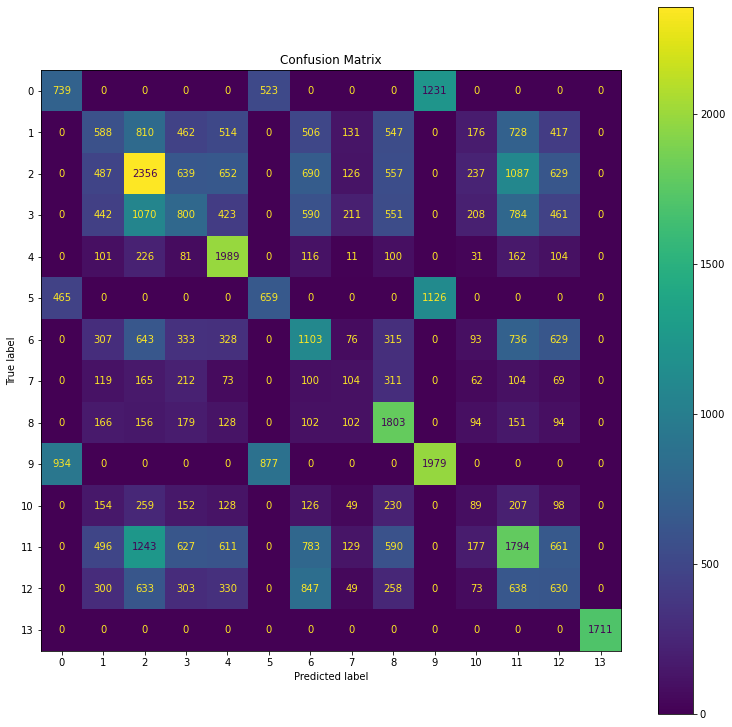

In [36]:
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 739 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,754 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,399 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,673 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 588 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,291 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,572 crimes were wrongly predicted as being "All Other Larceny" crimes
* 45,114 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,356 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 5,104 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,205 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 42,440 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 800 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,740 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,988 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 46,650 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 1,989 crimes were correctly predicted as being "Identity Theft" crimes
* 932 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,187 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,454 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 659 crimes were correctly predicted as being "Intimidation" crimes
* 1,591 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,400 crimes were wrongly predicted as being "Intimidation" crimes
* 49,903 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,103 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,460 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 3,860 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,655 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 104 crimes were correctly predicted as being "Robbery" crimes
* 1,215 crimes were wrongly predicted as not being "Robbery" crimes
* 884 crimes were wrongly predicted as being "Robbery" crimes
* 51,586 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting*** 

* 1,803 crimes were correctly predicted as being "Shoplifting" crimes
* 1,172 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,516 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,366 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,979 crimes were correctly predicted as being "Simple Assault" crimes
* 1,811 crimes were wrongly predicted as not being "Simple Assault" crimes
* 2,357 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,583 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 89 crimes were correctly predicted as being "Theft From Building" crimes
* 1,403 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,151 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,918 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,794 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 5,317 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 4,597 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,469 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 630 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,431 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,162 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,932 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

In [43]:
print ("My program took", time.time() - start_time, "to run")

My program took 15689.663987874985 to run
